# An example of using candex with rotated Latitude and Longitude (every grid has it own lat and lon)
## Remapping of CONUS WRF to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [1]:
from candex import candex

cndx = candex() # initialize candex object
cndx.name_of_case             = 'WRF_Medicine_Hat_resample'
cndx.temporary_candex_folder  = '../temporary/' # temporary path that the candex generated GIS files and rempped file will be saved
cndx.name_of_target_shp       = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
cndx.name_of_nc_files         = '../data/Source_nc_WRF/WRF*.nc'
cndx.name_of_var_name         = ['T2']
cndx.name_of_var_lon          = 'XLONG'
cndx.name_of_var_lat          = 'XLAT'
cndx.name_of_var_time         = 'time'
cndx.name_of_nc_output_folder = '../output/'
cndx.format_list              = ['f4']
cndx.fill_value_list          = ['-9999.00']
#cndx.name_of_remap_file        = '../temporary/WRF_Medicine_Hat_remapping.csv' # if uncommneted candex will use this and skip GIS taskes

# execute candex
# cndx.run_candex()
cndx.get_col_row()


no  author name is provide and the author name is changes to (author name)!
candex detects case 2 - rotated lat/lon


SystemExit: The row and column file is saved here: ../temporary/WRF_Medicine_Hat_resample_row_col.csv

/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
print(cndx.name_of_row_col_file)

../temporary/WRF_Medicine_Hat_resample_row_col.csv


In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

lon = np.arange(-118, -110, 0.0625)
lat = np.arange(  48,   52, 0.0625)
lon, lat = np.meshgrid(lon, lat)
lon_mesh_1D = lon.flatten()
lat_mesh_1D = lat.flatten()
ID_mesh_1D  = np.arange(len(lon_mesh_1D))+1
print(len(ID_mesh_1D))

# load the lat lon from nc file
ds          = xr.open_dataset('../data/Source_nc_WRF/WRF_merged_2000-10-01.nc')
lon_nc      = np.array(ds['XLONG'])
lat_nc      = np.array(ds['XLAT'])
ID_nc       = np.arange(lat_nc.size)+1
ID_nc       = ID_nc.reshape(lat_nc.shape)

## initialize the varibale
lat_source  = np.empty(0)
lon_source  = np.empty(0)
ID_source   = np.empty(0)
W           = np.empty(0)
lat_target  = np.empty(0)
lon_target  = np.empty(0)
ID_target   = np.empty(0)

for i in np.arange(len(lon_mesh_1D)):
    
    print(i)
    
    D = ((lon_mesh_1D[i]-lon_nc)**2 + (lat_mesh_1D[i]-lat_nc)**2)**0.5
    
    D_inv = 1/D
        
    idx, idy = np.where(D_inv>4)
    
    # get the lengh of idx
    # source lat
    lat_source_temp  =  lat_nc [idx, idy]
    lon_source_temp  =  lon_nc [idx, idy]
    W_temp           =  D_inv  [idx, idy] / sum(D_inv  [idx, idy])
    print(len(D_inv  [idx, idy]))
    
    #
    ID_source_temp   = ID_nc  [idx, idy]
    lat_target_temp  = np.repeat(lat_mesh_1D[i], len(W_temp))
    lon_target_temp  = np.repeat(lon_mesh_1D[i], len(W_temp))
    ID_target_temp   = np.repeat(ID_mesh_1D[i], len(W_temp))
    
    # 
    lat_source = np.append(lat_source, lat_source_temp)
    lon_source = np.append(lon_source, lon_source_temp)
    ID_source  = np.append(ID_source, ID_source_temp )
    W          = np.append(W, W_temp)
    lat_target = np.append(lat_target, lat_target_temp)
    lon_target = np.append(lon_target, lon_target_temp)
    ID_target  = np.append(ID_target, ID_target_temp)
    

    
df = pd.DataFrame()
df ['ID_s_int']   = ID_source
df ['lat_s_int']  = lat_source
df ['lon_s_int']  = lon_source
df ['ID_t']   = ID_target
df ['lat_t']  = lat_target
df ['lon_t']  = lon_target
df ['weight'] = W

df ['cols'] = np.nan
df ['rows'] = np.nan


print(df)


df2 = pd.read_csv(cndx.name_of_row_col_file)

for index, row in df2.iterrows():
    
    
    print(row.lat_s, row.lon_s)
    
    idx_lat = np.where(abs(lat_source-row.lat_s) < 0.0001)
    idx_lon = np.where(abs(lon_source-row.lon_s) < 0.0001)
    
    idx = np.intersect1d (idx_lat, idx_lon)
    
    print(idx)
    
    if len(idx) > 0:
    
        df.cols.iloc[idx] = row.cols
        df.rows.iloc[idx] = row.rows
    
#     print(df_temp)
#     df_temp = df_temp [df_temp['lon_s_int'] - row.lon_s < 0.0001]
#     print(df_temp)
#     lll

print(df)

df ['candex_case'] = 2


# df2 = pd.read_csv(cndx.name_of_row_col_file)
# print(df2)

# new_df = pd.merge(df, df2,  how='left', left_on=['lat_s_int','lon_s_int'], right_on = ['lat_s','lon_s'])

# new_df = pd.merge(df, df2,  how='left', left_on=['ID_s_int'], right_on = ['lat_s','lon_s'])

# print(new_df)
    


8192
0
101
1
101
2
103
3
100
4
97
5
99
6
99
7
103
8
101
9
102
10
103
11
100
12
97
13
98
14
99
15
102
16
101
17
101
18
101
19
100
20
98
21
98
22
99
23
104
24
101
25
101
26
99
27
101
28
100
29
99
30
98
31
101
32
101
33
98
34
98
35
100
36
101
37
100
38
101
39
101
40
103
41
99
42
98
43
97
44
100
45
102
46
102
47
102
48
101
49
101
50
101
51
99
52
97
53
101
54
102
55
100
56
98
57
98
58
102
59
101
60
102
61
101
62
101
63
100
64
100
65
100
66
98
67
98
68
102
69
102
70
99
71
98
72
97
73
103
74
100
75
101
76
102
77
99
78
100
79
102
80
99
81
98
82
101
83
100
84
101
85
99
86
100
87
97
88
100
89
100
90
102
91
100
92
99
93
96
94
102
95
101
96
102
97
102
98
102
99
99
100
100
101
103
102
99
103
100
104
101
105
100
106
98
107
99
108
97
109
94
110
94
111
97
112
93
113
91
114
92
115
87
116
87
117
86
118
88
119
86
120
82
121
83
122
79
123
80
124
78
125
78
126
78
127
74
128
99
129
101
130
99
131
99
132
101
133
102
134
102
135
100
136
99
137
102
138
99
139
99
140
101
141
102
142
100
143
99
144
100
145
103
1

1179
100
1180
99
1181
98
1182
100
1183
100
1184
102
1185
100
1186
97
1187
97
1188
99
1189
100
1190
101
1191
100
1192
101
1193
101
1194
100
1195
99
1196
97
1197
99
1198
99
1199
101
1200
102
1201
98
1202
100
1203
101
1204
98
1205
97
1206
99
1207
102
1208
98
1209
99
1210
97
1211
99
1212
100
1213
101
1214
100
1215
100
1216
101
1217
100
1218
101
1219
99
1220
98
1221
99
1222
99
1223
102
1224
99
1225
97
1226
98
1227
102
1228
101
1229
100
1230
102
1231
102
1232
100
1233
101
1234
101
1235
97
1236
97
1237
98
1238
100
1239
99
1240
98
1241
97
1242
98
1243
103
1244
100
1245
99
1246
101
1247
99
1248
101
1249
101
1250
102
1251
98
1252
97
1253
100
1254
101
1255
99
1256
99
1257
101
1258
97
1259
100
1260
98
1261
100
1262
101
1263
99
1264
97
1265
96
1266
102
1267
100
1268
98
1269
101
1270
100
1271
98
1272
100
1273
102
1274
99
1275
100
1276
101
1277
101
1278
99
1279
100
1280
97
1281
100
1282
102
1283
99
1284
98
1285
99
1286
100
1287
99
1288
98
1289
99
1290
101
1291
101
1292
100
1293
99
1294
100
1295
99
12

2202
100
2203
99
2204
97
2205
97
2206
100
2207
101
2208
100
2209
99
2210
101
2211
100
2212
99
2213
97
2214
97
2215
100
2216
100
2217
100
2218
100
2219
100
2220
100
2221
99
2222
97
2223
97
2224
99
2225
99
2226
101
2227
100
2228
99
2229
101
2230
100
2231
100
2232
97
2233
98
2234
96
2235
101
2236
99
2237
97
2238
98
2239
100
2240
100
2241
98
2242
97
2243
98
2244
101
2245
96
2246
99
2247
96
2248
98
2249
100
2250
100
2251
98
2252
100
2253
98
2254
99
2255
101
2256
102
2257
96
2258
96
2259
99
2260
100
2261
100
2262
98
2263
96
2264
98
2265
101
2266
100
2267
100
2268
97
2269
100
2270
98
2271
100
2272
100
2273
98
2274
96
2275
98
2276
98
2277
99
2278
99
2279
99
2280
97
2281
96
2282
102
2283
100
2284
98
2285
100
2286
98
2287
98
2288
99
2289
102
2290
100
2291
99
2292
98
2293
98
2294
98
2295
98
2296
99
2297
101
2298
96
2299
97
2300
98
2301
99
2302
99
2303
99
2304
100
2305
100
2306
99
2307
101
2308
98
2309
96
2310
98
2311
100
2312
100
2313
98
2314
97
2315
101
2316
100
2317
98
2318
96
2319
98
2320
98
2

3209
96
3210
98
3211
97
3212
101
3213
97
3214
96
3215
97
3216
99
3217
97
3218
97
3219
99
3220
99
3221
100
3222
98
3223
96
3224
97
3225
101
3226
98
3227
98
3228
100
3229
99
3230
98
3231
97
3232
97
3233
99
3234
99
3235
97
3236
97
3237
98
3238
99
3239
97
3240
97
3241
98
3242
100
3243
100
3244
98
3245
99
3246
100
3247
98
3248
99
3249
97
3250
97
3251
99
3252
100
3253
98
3254
96
3255
98
3256
99
3257
99
3258
99
3259
97
3260
98
3261
100
3262
99
3263
98
3264
100
3265
97
3266
100
3267
100
3268
99
3269
97
3270
96
3271
98
3272
97
3273
97
3274
97
3275
97
3276
99
3277
101
3278
100
3279
98
3280
97
3281
99
3282
98
3283
99
3284
99
3285
96
3286
97
3287
100
3288
99
3289
99
3290
97
3291
98
3292
97
3293
97
3294
99
3295
100
3296
97
3297
96
3298
99
3299
97
3300
99
3301
97
3302
97
3303
96
3304
99
3305
101
3306
101
3307
98
3308
96
3309
97
3310
97
3311
97
3312
99
3313
100
3314
96
3315
96
3316
99
3317
98
3318
98
3319
96
3320
98
3321
96
3322
97
3323
101
3324
98
3325
97
3326
98
3327
99
3328
97
3329
98
3330
98
3331

4236
97
4237
97
4238
99
4239
98
4240
96
4241
99
4242
98
4243
96
4244
95
4245
97
4246
98
4247
97
4248
97
4249
95
4250
96
4251
97
4252
99
4253
96
4254
97
4255
100
4256
98
4257
99
4258
97
4259
97
4260
98
4261
99
4262
96
4263
98
4264
99
4265
96
4266
97
4267
97
4268
99
4269
98
4270
101
4271
98
4272
96
4273
97
4274
97
4275
96
4276
95
4277
96
4278
99
4279
98
4280
99
4281
96
4282
96
4283
96
4284
97
4285
96
4286
95
4287
96
4288
99
4289
98
4290
99
4291
97
4292
97
4293
95
4294
98
4295
96
4296
98
4297
96
4298
99
4299
98
4300
100
4301
97
4302
96
4303
97
4304
97
4305
97
4306
98
4307
95
4308
96
4309
98
4310
99
4311
100
4312
98
4313
97
4314
97
4315
98
4316
97
4317
99
4318
99
4319
96
4320
98
4321
98
4322
97
4323
96
4324
97
4325
95
4326
97
4327
99
4328
99
4329
99
4330
97
4331
97
4332
96
4333
95
4334
96
4335
97
4336
100
4337
96
4338
97
4339
100
4340
98
4341
97
4342
96
4343
96
4344
96
4345
97
4346
100
4347
101
4348
100
4349
98
4350
97
4351
96
4352
97
4353
98
4354
96
4355
96
4356
100
4357
97
4358
97
4359
9

5261
98
5262
96
5263
94
5264
96
5265
98
5266
98
5267
96
5268
96
5269
97
5270
95
5271
97
5272
99
5273
97
5274
100
5275
97
5276
95
5277
96
5278
95
5279
96
5280
96
5281
97
5282
100
5283
98
5284
98
5285
96
5286
97
5287
98
5288
99
5289
95
5290
95
5291
95
5292
97
5293
96
5294
95
5295
98
5296
96
5297
98
5298
97
5299
95
5300
97
5301
95
5302
96
5303
96
5304
95
5305
97
5306
100
5307
97
5308
98
5309
95
5310
97
5311
96
5312
97
5313
95
5314
97
5315
95
5316
99
5317
100
5318
98
5319
97
5320
95
5321
97
5322
97
5323
99
5324
96
5325
95
5326
96
5327
99
5328
98
5329
98
5330
97
5331
96
5332
98
5333
97
5334
98
5335
95
5336
96
5337
96
5338
99
5339
98
5340
98
5341
96
5342
95
5343
99
5344
97
5345
97
5346
95
5347
96
5348
95
5349
97
5350
100
5351
98
5352
99
5353
95
5354
97
5355
98
5356
96
5357
93
5358
96
5359
96
5360
96
5361
99
5362
100
5363
101
5364
99
5365
96
5366
96
5367
95
5368
96
5369
96
5370
98
5371
100
5372
94
5373
95
5374
97
5375
99
5376
95
5377
96
5378
97
5379
96
5380
93
5381
95
5382
101
5383
98
5384
98

6296
97
6297
97
6298
96
6299
97
6300
98
6301
99
6302
96
6303
94
6304
96
6305
94
6306
95
6307
95
6308
95
6309
100
6310
97
6311
97
6312
97
6313
98
6314
98
6315
100
6316
96
6317
94
6318
95
6319
93
6320
94
6321
95
6322
95
6323
98
6324
97
6325
97
6326
97
6327
94
6328
95
6329
97
6330
96
6331
95
6332
93
6333
96
6334
97
6335
96
6336
95
6337
95
6338
98
6339
98
6340
99
6341
97
6342
93
6343
96
6344
93
6345
95
6346
95
6347
94
6348
97
6349
98
6350
98
6351
98
6352
97
6353
94
6354
98
6355
96
6356
94
6357
92
6358
96
6359
94
6360
97
6361
100
6362
98
6363
98
6364
95
6365
96
6366
97
6367
97
6368
94
6369
92
6370
95
6371
95
6372
98
6373
99
6374
97
6375
98
6376
95
6377
97
6378
97
6379
96
6380
95
6381
92
6382
96
6383
95
6384
97
6385
100
6386
98
6387
99
6388
96
6389
95
6390
97
6391
96
6392
93
6393
93
6394
97
6395
94
6396
95
6397
99
6398
99
6399
100
6400
94
6401
94
6402
96
6403
95
6404
98
6405
98
6406
97
6407
96
6408
97
6409
97
6410
100
6411
95
6412
93
6413
96
6414
97
6415
97
6416
95
6417
96
6418
98
6419
93
64

7325
96
7326
97
7327
96
7328
98
7329
96
7330
94
7331
95
7332
95
7333
93
7334
91
7335
95
7336
96
7337
97
7338
94
7339
94
7340
96
7341
96
7342
97
7343
98
7344
95
7345
95
7346
96
7347
94
7348
92
7349
92
7350
95
7351
98
7352
96
7353
95
7354
95
7355
96
7356
97
7357
97
7358
98
7359
96
7360
95
7361
94
7362
93
7363
92
7364
93
7365
93
7366
95
7367
98
7368
97
7369
96
7370
94
7371
95
7372
95
7373
98
7374
98
7375
94
7376
94
7377
93
7378
92
7379
95
7380
96
7381
94
7382
97
7383
98
7384
98
7385
98
7386
97
7387
94
7388
96
7389
94
7390
92
7391
93
7392
95
7393
93
7394
96
7395
98
7396
99
7397
97
7398
97
7399
95
7400
97
7401
97
7402
95
7403
93
7404
92
7405
93
7406
93
7407
96
7408
96
7409
96
7410
97
7411
95
7412
94
7413
96
7414
97
7415
96
7416
95
7417
92
7418
93
7419
93
7420
95
7421
97
7422
97
7423
97
7424
93
7425
92
7426
95
7427
97
7428
95
7429
94
7430
95
7431
96
7432
96
7433
95
7434
96
7435
94
7436
98
7437
97
7438
94
7439
94
7440
92
7441
93
7442
93
7443
94
7444
98
7445
97
7446
97
7447
95
7448
96
7449
97


[]
46.9154167175293 -118.26605224609376
[]
46.9234733581543 -118.21420288085938
[]
46.9315071105957 -118.162353515625
[]
46.93951416015625 -118.1104736328125
[]
46.9475212097168 -118.05859375
[]
46.95549011230469 -118.00668334960938
[]
46.96344375610352 -117.95477294921876
[]
46.97137832641602 -117.90284729003906
[]
46.97929000854492 -117.85092163085938
[]
46.9871940612793 -117.7989501953125
[]
46.99505996704102 -117.74699401855469
[]
47.00290298461914 -117.69500732421876
[]
47.0107421875 -117.6430206298828
[]
47.01854705810547 -117.5910186767578
[]
47.02633666992188 -117.53900146484376
[]
47.03410720825195 -117.48696899414062
[]
47.04186248779297 -117.43492126464844
[]
47.04958724975586 -117.38287353515624
[]
47.05729675292969 -117.33079528808594
[]
47.06498718261719 -117.27871704101562
[]
47.07266235351562 -117.2266082763672
[]
47.080299377441406 -117.17449951171876
[]
47.08791732788086 -117.12237548828124
[]
47.09552764892578 -117.07025146484376
[]
47.10311889648438 -117.01809692382

[12395 12472 25104 25192 37981]
47.93537139892578 -109.87319946289062
[12473 25193]
47.94010543823242 -109.81961059570312
[]
47.9448127746582 -109.7659912109375
[]
47.94949340820313 -109.71237182617188
[]
47.95415878295898 -109.65875244140624
[]
47.95880126953125 -109.60511779785156
[]
47.96342086791992 -109.55148315429688
[]
47.96802520751953 -109.49783325195312
[]
47.97259902954102 -109.44418334960938
[]
47.9771614074707 -109.3905029296875
[]
47.98169708251953 -109.33683776855469
[]
47.9862174987793 -109.2831573486328
[]
47.99070358276367 -109.22946166992188
[]
47.99517440795898 -109.17576599121094
[]
47.99962997436523 -109.1220703125
[]
48.00406265258789 -109.068359375
[]
48.00847244262695 -109.01463317871094
[]
48.01285171508789 -108.96090698242188
[]
48.01721954345703 -108.90716552734376
[]
48.02156066894531 -108.85342407226562
[]
48.02588653564453 -108.79966735839844
[]
48.030189514160156 -108.74591064453124
[]
48.03446578979492 -108.692138671875
[]
48.03872299194336 -108.6383666

[]
47.98540115356445 -109.7193603515625
[]
47.99007034301758 -109.66571044921876
[]
47.99471664428711 -109.61204528808594
[]
47.99934387207031 -109.55838012695312
[]
48.003944396972656 -109.50469970703124
[]
48.00852966308594 -109.45100402832031
[]
48.01308822631836 -109.39730834960938
[]
48.01762771606445 -109.34359741210938
[]
48.02214050292969 -109.28988647460938
[]
48.026634216308594 -109.23617553710938
[]
48.0311164855957 -109.18243408203124
[]
48.035560607910156 -109.12869262695312
[]
48.03999328613281 -109.074951171875
[]
48.04440689086914 -109.02120971679688
[]
48.04879379272461 -108.96743774414062
[]
48.05316543579102 -108.91368103027344
[]
48.0575065612793 -108.85989379882812
[]
48.06183624267578 -108.80612182617188
[]
48.066139221191406 -108.7523193359375
[]
48.0704231262207 -108.6985321044922
[]
48.074684143066406 -108.64471435546876
[]
48.07892227172852 -108.59091186523438
[]
48.08313751220703 -108.53707885742188
[]
48.08733367919922 -108.48326110839844
[]
48.0915069580078

[]
48.05355834960938 -109.35037231445312
[]
48.058067321777344 -109.296630859375
[]
48.06256484985352 -109.2428741455078
[]
48.06704330444336 -109.18911743164062
[]
48.07149887084961 -109.13534545898438
[]
48.0759391784668 -109.08157348632812
[]
48.080345153808594 -109.0277862548828
[]
48.08473205566406 -108.9739990234375
[]
48.08910751342773 -108.92019653320312
[]
48.09345245361328 -108.86639404296876
[]
48.09778213500977 -108.81257629394531
[]
48.10208511352539 -108.75875854492188
[]
48.10637283325195 -108.70492553710938
[]
48.11063003540039 -108.65109252929688
[]
48.11487579345703 -108.59724426269531
[]
48.11909484863281 -108.54339599609376
[]
48.123291015625 -108.48953247070312
[]
48.1274642944336 -108.4356689453125
[]
48.13162612915039 -108.3817901611328
[]
48.13575744628906 -108.32791137695312
[]
48.13987350463867 -108.27401733398438
[]
48.14396286010742 -108.22012329101562
[]
48.148033142089844 -108.1662139892578
[]
48.152076721191406 -108.1123046875
[]
46.97278213500977 -118.61

[11229 11320 11412 11503 11589 11675 11761 11848 23779 23880 23977 24075
 24173 24270 24368 36593 36692 36792 36893 36992 37092 49482 49583 49682]
47.96439743041992 -110.75238037109376
[11321 11413 11504 11590 11676 11762 11849 23881 23978 24076 24174 24271
 24369 24464 36594 36693 36793 36894 36993 37093 37191 49584 49683 49780]
47.96947860717773 -110.69882202148438
[11322 11414 11505 11591 11677 11763 11850 11933 23979 24077 24175 24272
 24370 24465 24561 36694 36794 36895 36994 37094 37192 49585 49684 49781
 49880]
47.97453308105469 -110.645263671875
[11415 11506 11592 11678 11764 11851 11934 12016 23980 24078 24176 24273
 24371 24466 24562 24655 36795 36896 36995 37095 37193 37293 49685 49782
 49881 49982]
47.97956848144531 -110.59169006347656
[11507 11593 11679 11765 11852 11935 12017 12099 24079 24177 24274 24372
 24467 24563 24656 24749 36897 36996 37096 37194 37294 37394 49783 49882
 49983 50081]
47.98458480834961 -110.53811645507812
[11594 11680 11766 11853 11936 12018 12100 1

[ 9128  9228  9326  9425  9528  9628 21750 21850 21950 22049]
47.86635971069336 -112.09658813476562
[ 9229  9327  9426  9529  9629  9731 21751 21851 21951 22050 22151]
47.87196350097656 -112.04324340820312
[ 9230  9328  9427  9530  9630  9732  9834 21852 21952 22051 22152 22252]
47.8775520324707 -111.98988342285156
[ 9329  9428  9531  9631  9733  9835  9937 21953 22052 22153 22253 22352
 34880]
47.88312149047852 -111.9365234375
[ 9429  9532  9632  9734  9836  9938 10038 22053 22154 22254 22353 22452
 34978 35080]
47.88867568969727 -111.88314819335938
[ 9533  9633  9735  9837  9939 10039 10141 22054 22155 22255 22354 22453
 22556 34979 35081 35181]
47.89419937133789 -111.82974243164062
[ 9634  9736  9838  9940 10040 10142 10244 22156 22256 22355 22454 22557
 22656 35082 35182 35281]
47.89970016479492 -111.77635192871094
[ 9635  9737  9839  9941 10041 10143 10245 10344 22257 22356 22455 22558
 22657 22758 35083 35183 35282 35383]
47.90518569946289 -111.7229461669922
[ 9738  9840  9942 10

[]
48.199378967285156 -108.44815063476562
[]
48.20353317260742 -108.39422607421876
[]
48.2076644897461 -108.34027099609376
[]
48.21178436279297 -108.28631591796876
[]
48.21588516235352 -108.23236083984376
[]
48.21995544433594 -108.17839050292969
[]
48.2239990234375 -108.12442016601562
[]
47.04352188110352 -118.63690185546876
[]
47.05171585083008 -118.58499145507812
[]
47.05989837646485 -118.5330810546875
[]
47.06806182861328 -118.48114013671876
[]
47.07619094848633 -118.42919921875
[]
47.08430480957031 -118.3772430419922
[]
47.0924072265625 -118.32527160644531
[]
47.10048294067383 -118.27328491210938
[]
47.10853576660156 -118.22128295898438
[]
47.11657333374024 -118.16926574707031
[]
47.12458419799805 -118.11724853515624
[]
47.1325798034668 -118.06520080566406
[]
47.14056015014648 -118.01315307617188
[]
47.14851379394531 -117.96107482910156
[]
47.15644073486328 -117.90899658203124
[]
47.16435623168945 -117.85690307617188
[]
47.17224884033203 -117.80479431152344
[]
47.18011856079102 -11

[]
48.12901306152344 -109.74737548828124
[]
48.133689880371094 -109.693603515625
[]
48.13833999633789 -109.63981628417969
[]
48.14297485351562 -109.58601379394531
[]
48.14759063720703 -109.53221130371094
[]
48.15217590332031 -109.4783935546875
[]
48.15674591064453 -109.42457580566406
[]
48.16130447387695 -109.37074279785156
[]
48.16581726074219 -109.31689453125
[]
48.17033004760742 -109.2630615234375
[]
48.17481231689453 -109.20919799804688
[]
48.17926788330078 -109.15533447265624
[]
48.18370819091797 -109.10147094726562
[]
48.18812942504883 -109.04759216308594
[]
48.1925277709961 -108.99371337890624
[]
48.19690322875977 -108.9398193359375
[]
48.201255798339844 -108.88591003417969
[]
48.20558547973633 -108.83200073242188
[]
48.20990371704102 -108.778076171875
[]
48.21419906616211 -108.72415161132812
[]
48.21846008300781 -108.67022705078124
[]
48.22270965576172 -108.61628723144531
[]
48.22693634033203 -108.56234741210938
[]
48.23114013671875 -108.50837707519531
[]
48.235328674316406 -10

[ 9247  9345  9445  9548  9649  9751  9853  9954 21867 21967 22066 22167
 22268 22367 22467 34690 34790 34888 34987 35090 47575 47676 47777]
47.95470428466797 -111.95310974121094
[ 9346  9446  9549  9650  9752  9854  9955 10055 21968 22067 22168 22269
 22368 22468 22571 34691 34791 34889 34988 35091 35191 47677 47778 47878]
47.96026229858398 -111.89967346191406
[ 9447  9550  9651  9753  9855  9956 10056 10159 21969 22068 22169 22270
 22369 22469 22572 22672 34792 34890 34989 35092 35192 35293 47678 47779
 47879 47979]
47.96578979492188 -111.84622192382812
[ 9551  9652  9754  9856  9957 10057 10160 10262 22069 22170 22271 22370
 22470 22573 22673 22773 34891 34990 35093 35193 35294 35395 47780 47880
 47980 48082]
47.97130584716797 -111.79275512695312
[ 9653  9755  9857  9958 10058 10161 10263 10362 22171 22272 22371 22471
 22574 22674 22774 22877 34991 35094 35194 35295 35396 35499 47881 47981
 48083 48183]
47.976783752441406 -111.73928833007812
[ 9756  9858  9959 10059 10162 10264 1036

[]
48.28778457641602 -108.24462890625
[]
48.29186630249024 -108.19059753417969
[]
48.29592895507813 -108.13656616210938
[]
47.1142463684082 -118.6610107421875
[]
47.12245559692383 -118.60906982421876
[]
47.13063430786133 -118.5570831298828
[]
47.13879776000977 -118.50509643554688
[]
47.146949768066406 -118.45309448242188
[]
47.155067443847656 -118.4010772705078
[]
47.16317749023438 -118.34906005859376
[]
47.17126846313477 -118.2969970703125
[]
47.17932891845703 -118.24494934082031
[]
47.18737030029297 -118.19287109375
[]
47.19539260864258 -118.14079284667969
[]
47.20338821411133 -118.08869934082031
[]
47.21137237548828 -118.03659057617188
[]
47.21932983398438 -117.98446655273438
[]
47.22727584838867 -117.9323272705078
[]
47.23519515991211 -117.8801727294922
[]
47.24309539794922 -117.8280029296875
[]
47.25097274780274 -117.7758331298828
[]
47.25882339477539 -117.7236328125
[]
47.26666259765625 -117.6714324951172
[]
47.27448272705078 -117.61921691894531
[]
47.28227996826172 -117.56698608

[11171 11265 11355 11447 11537 11623 11708 23613 23712 23813 23914 24012
 24110 24209 24306 36326 36427 36527 36625 36724 36824 36924 37025 49205
 49305 49406 49507 49610 49709 49807 61975 62075 62177 62276 62373 62473
 74827 74926 75023 75124]
48.10268783569336 -110.83651733398438
[11172 11266 11356 11448 11538 11624 11709 11798 23713 23814 23915 24013
 24111 24210 24307 24403 36428 36528 36626 36725 36825 36925 37026 37126
 49206 49306 49407 49508 49611 49710 49808 49908 62076 62178 62277 62374
 62474 62574 74927 75024 75125 75224]
48.10779190063477 -110.7828369140625
[11267 11357 11449 11539 11625 11710 11799 11885 23815 23916 24014 24112
 24211 24308 24404 24500 36529 36627 36726 36826 36926 37027 37127 37226
 49307 49408 49509 49612 49711 49809 49909 50010 62179 62278 62375 62475
 62575 62673 75025 75126 75225 75324]
48.11288452148438 -110.72917175292969
[11358 11450 11540 11626 11711 11800 11886 23917 24015 24113 24212 24309
 24405 24501 24597 36628 36727 36827 36927 37028 37128 

[]
47.72801208496094 -114.57861328125
[]
47.7346076965332 -114.525634765625
[]
47.741172790527344 -114.47264099121094
[]
47.74772644042969 -114.41964721679688
[]
47.75425720214844 -114.36662292480469
[5808]
47.7607650756836 -114.3135986328125
[5809 5910 6011]
47.76725387573242 -114.26055908203124
[5911 6012 6113]
47.77371597290039 -114.20751953125
[5912 6013 6114 6214]
47.78017044067383 -114.15444946289062
[6014 6115 6215 6317]
47.78659057617188 -114.10137939453124
[6116 6216 6318 6418]
47.79299545288086 -114.04830932617188
[6117 6217 6319 6419 6519]
47.79937362670898 -113.99520874023438
[6218 6320 6420 6520 6619]
47.80574035644531 -113.94210815429688
[6321 6421 6521 6620 6718]
47.81207275390625 -113.88899230957031
[6422 6522 6621 6719 6818]
47.81839370727539 -113.83587646484376
[ 6423  6523  6622  6720  6819  6921 19148 19248]
47.82469940185547 -113.78273010253906
[ 6524  6623  6721  6820  6922  7025 19249 19349]
47.83097839355469 -113.72958374023438
[ 6624  6722  6821  6923  7026  71

[11365 11457 11547 11633 11718 11806 23824 23925 24023 24120 24220 24317
 24413 24509 36538 36636 36735 36836 36935 37036 37136 37235 49316 49417
 49518 49620 49720 49818 49918 50019 62084 62187 62286 62383 62483 62583
 62682 74933 75031 75132 75231 75331 75432 87770 87870 87970]
48.14872360229492 -110.7367706298828
[11366 11458 11548 11634 11719 11807 11893 23926 24024 24121 24221 24318
 24414 24510 36637 36736 36837 36936 37037 37137 37236 37336 49418 49519
 49621 49721 49819 49919 50020 50119 62188 62287 62384 62484 62584 62683
 62783 75032 75133 75232 75332 75433 75531 87871 87971 88069]
48.15378189086914 -110.68304443359376
[11459 11549 11635 11720 11808 11894 11976 24025 24122 24222 24319 24415
 24511 24606 36737 36838 36937 37038 37138 37237 37337 37439 49520 49622
 49722 49820 49920 50021 50120 50221 62288 62385 62485 62585 62684 62784
 62887 75033 75134 75233 75333 75434 75532 75629 87972 88070 88168]
48.1588363647461 -110.62933349609376
[11550 11636 11721 11809 11895 11977 12

[]
47.641319274902344 -115.54060363769531
[]
47.64829635620117 -115.48780822753906
[]
47.65524673461914 -115.43499755859376
[]
47.66218185424805 -115.38217163085938
[]
47.66909408569336 -115.329345703125
[]
47.67598342895508 -115.27650451660156
[]
47.68285751342773 -115.22364807128906
[]
47.68970108032226 -115.1707763671875
[]
47.69651794433594 -115.11788940429688
[]
47.70332717895508 -115.06500244140624
[]
47.71011734008789 -115.01210021972656
[]
47.716880798339844 -114.9591827392578
[]
47.72362899780274 -114.90625
[]
47.7303466796875 -114.85330200195312
[]
47.73704528808594 -114.80035400390624
[]
47.74372482299805 -114.74740600585938
[]
47.750389099121094 -114.69442749023438
[5309]
47.75702285766602 -114.64143371582031
[5310 5410]
47.76363754272461 -114.58843994140624
[5411 5512]
47.77023696899414 -114.53543090820312
[5412 5513 5612 5710]
47.77680969238281 -114.48240661621094
[5514 5613 5711 5810]
47.783363342285156 -114.42938232421876
[5614 5712 5811 5913]
47.78989791870117 -114.376

[10699 10798 10895 10991 11084 11181 23119 23221 23323 23422 23523 23625
 23724 23825 35840 35940 36039 36139 36237 36338 36439 36539 48617 48718
 48818 48918 49019 49119 49217 49317 61389 61489 61590 61690 61786 61885
 61985 74241 74337 74435 74535 74635 74735 87173 87273]
48.143226623535156 -111.174072265625
[10700 10799 10896 10992 11085 11182 11276 23222 23324 23423 23524 23626
 23725 23826 23927 35941 36040 36140 36238 36339 36440 36540 36638 48719
 48819 48919 49020 49120 49218 49318 49419 61490 61591 61691 61787 61886
 61986 62085 74338 74436 74536 74636 74736 74834 87174 87274 87371]
48.14846801757813 -111.12039184570312
[10800 10897 10993 11086 11183 11277 11367 23325 23424 23525 23627 23726
 23827 23928 36041 36141 36239 36340 36441 36541 36639 36739 48820 48920
 49021 49121 49219 49319 49420 49522 61592 61692 61788 61887 61987 62086
 62189 74437 74537 74637 74737 74835 74934 87275 87372 87472]
48.1536865234375 -111.06671142578124
[10898 10994 11087 11184 11278 11368 11460 23

[]
48.31394958496094 -109.29006958007812
[]
48.318443298339844 -109.23609924316406
[]
48.32291030883789 -109.18209838867188
[]
48.32736587524414 -109.12811279296876
[]
48.33179473876953 -109.0740966796875
[]
48.33620071411133 -109.02008056640624
[]
48.34057998657226 -108.966064453125
[]
48.344947814941406 -108.91204833984376
[]
48.34928512573242 -108.85800170898438
[]
48.353599548339844 -108.803955078125
[]
48.3578987121582 -108.74990844726562
[]
48.3621826171875 -108.6958465576172
[]
48.36643600463867 -108.64178466796876
[]
48.37067031860352 -108.58770751953124
[]
48.37488174438477 -108.53363037109376
[]
48.37907409667969 -108.47952270507812
[]
48.38324737548828 -108.42544555664062
[]
48.38739395141602 -108.371337890625
[]
48.39151382446289 -108.31721496582031
[]
48.39562225341797 -108.26309204101562
[]
48.39971542358398 -108.20896911621094
[]
48.40376281738281 -108.1548309326172
[]
47.220298767089844 -118.6973114013672
[]
47.22851943969727 -118.645263671875
[]
47.23670959472656 -118.

[ 9689  9792  9894  9994 10093 10196 10297 22107 22208 22307 22406 22507
 22610 22710 22811 34826 34924 35025 35128 35229 35329 35432 35533 47605
 47707 47809 47909 48011 48112 48213 48316 60483 60585 60686 60784 60885
 60986 61085 73335 73434 73537 73636 73735]
48.11995315551758 -111.7720947265625
[ 9793  9895  9995 10094 10197 10298 10397 22209 22308 22407 22508 22611
 22711 22812 22915 34925 35026 35129 35230 35330 35433 35534 35636 47708
 47810 47910 48012 48113 48214 48317 48418 60586 60687 60785 60886 60987
 61086 61186 73435 73538 73637 73736 73836]
48.12541961669922 -111.718505859375
[ 9896  9996 10095 10198 10299 10398 22309 22408 22509 22612 22712 22813
 22916 23016 35027 35130 35231 35331 35434 35535 35637 35739 47811 47911
 48013 48114 48215 48318 48419 48518 60688 60786 60887 60988 61087 61187
 73436 73539 73638 73737 73837 73938]
48.13088607788086 -111.66488647460938
[ 9897  9997 10096 10199 10300 10399 10500 22409 22510 22613 22713 22814
 22917 23017 23120 35131 35232 35

[ 37966  38063  50754  50855  63413  63515  63613  76160  76258  76357
  88991  89093 101731 101830 114547]
48.29899215698242 -109.89044189453124
[ 38064  50856  63516  63614  76259  76358  88992  89094 101831]
48.3037223815918 -109.83651733398438
[63615 76359 89095]
48.30842971801758 -109.7825927734375
[]
48.3131217956543 -109.72866821289062
[]
48.317787170410156 -109.67471313476562
[]
48.32242202758789 -109.62075805664062
[]
48.32705307006836 -109.56680297851562
[]
48.3316535949707 -109.5128173828125
[]
48.33623504638672 -109.45883178710938
[]
48.34078598022461 -109.40484619140624
[]
48.3453254699707 -109.35086059570312
[]
48.34983825683594 -109.29684448242188
[]
48.35433959960938 -109.24282836914062
[]
48.35881042480469 -109.18881225585938
[]
48.363258361816406 -109.13479614257812
[]
48.36769104003906 -109.08074951171876
[]
48.37210464477539 -109.02670288085938
[]
48.37648391723633 -108.97265625
[]
48.38085556030274 -108.91859436035156
[]
48.38520431518555 -108.86453247070312
[]
48.

[ 7462  7562  7665  7765  7865  7967  8069  8168 19978 20079 20177 20277
 20380 20480 20581 20684 32695 32794 32896 32997 33098 33199 33301 45583
 45683 45785 45886 45987 46088 58572 58671]
48.01179885864258 -113.117919921875
[ 7563  7666  7766  7866  7968  8070  8169  8269 20080 20178 20278 20381
 20481 20582 20685 20789 32795 32897 32998 33099 33200 33302 33405 45684
 45786 45887 45988 46089 58573 58672 58773]
48.01780700683594 -113.06454467773438
[ 7564  7667  7767  7867  7969  8071  8170  8270 20179 20279 20382 20482
 20583 20686 20790 32898 32999 33100 33201 33303 33406 33508 45787 45888
 45989 46090 46191 58673 58774 58872]
48.02379989624024 -113.01113891601562
[ 7668  7768  7868  7970  8072  8171  8271  8373 20180 20280 20383 20483
 20584 20687 20791 20892 33000 33101 33202 33304 33407 33509 33611 45788
 45889 45990 46091 46192 46290 58775 58873 58970]
48.0297737121582 -112.95774841308594
[ 7769  7869  7971  8073  8172  8272  8374  8474 20281 20384 20484 20585
 20688 20792 20893

[ 10910  11005  11098  11195  23341  23440  23541  23643  23741  23843
  36060  36159  36257  36358  36459  36558  36655  48739  48839  48938
  49039  49139  49237  49337  49439  61507  61609  61709  61806  61905
  62005  62105  62206  74353  74452  74553  74652  74752  74851  74950
  87084  87185  87286  87384  87484  87581  99927 100026 100122 100221]
48.22531127929688 -111.08233642578124
[ 11006  11099  11196  11288  23441  23542  23644  23742  23844  23944
  36160  36258  36359  36460  36559  36656  36757  48840  48939  49040
  49140  49238  49338  49440  49541  61610  61710  61807  61906  62006
  62106  62207  62307  74354  74453  74554  74653  74753  74852  74951
  75051  87186  87287  87385  87485  87582  87682 100027 100123 100222
 100322]
48.23051834106445 -111.02857971191406
[ 11100  11197  11289  11379  23543  23645  23743  23845  23945  24042
  36161  36259  36360  36461  36560  36657  36758  36859  48940  49041
  49141  49239  49339  49441  49542  49643  61711  61808  6190

[]
48.40359878540039 -109.08740234375
[]
48.40800094604492 -109.0333251953125
[]
48.412391662597656 -108.979248046875
[]
48.41676330566406 -108.92515563964844
[]
48.42110824584961 -108.87106323242188
[]
48.42543029785156 -108.81695556640624
[]
48.42973327636719 -108.76283264160156
[]
48.43401718139648 -108.70870971679688
[]
48.43827819824219 -108.65457153320312
[]
48.44250869750977 -108.60043334960938
[]
48.44673156738281 -108.54629516601562
[]
48.45092391967773 -108.49212646484376
[]
48.45509338378906 -108.43797302246094
[]
48.45924758911133 -108.38380432128906
[]
48.46338272094727 -108.32962036132812
[]
48.46748733520508 -108.27545166015624
[]
48.47157669067383 -108.22125244140624
[]
48.47564697265625 -108.16705322265624
[]
47.29097366333008 -118.7215576171875
[]
47.29919815063477 -118.66946411132812
[]
47.307395935058594 -118.61735534667969
[]
47.31559371948242 -118.56521606445312
[]
47.32374954223633 -118.51307678222656
[]
47.33190155029297 -118.46092224121094
[]
47.34002685546875 

[ 9911 10010 10109 10212 10311 22327 22425 22526 22628 22728 22830 22932
 35045 35148 35249 35350 35452 35553 35655 35757 47829 47929 48032 48132
 48233 48336 48437 48536 60603 60704 60802 60904 61005 61105 61205 61305
 73349 73450 73553 73652 73752 73851 73953 86188 86286 86384 86483 86584
 86685 99129 99228]
48.20244598388672 -111.68122863769531
[10011 10110 10213 10312 10412 22426 22527 22629 22729 22831 22933 23034
 35149 35250 35351 35453 35554 35656 35758 47930 48033 48133 48234 48337
 48438 48537 48637 60705 60803 60905 61006 61106 61206 61306 61407 73451
 73554 73653 73753 73852 73954 74054 86287 86385 86484 86585 86686 99130
 99229 99329]
48.20788955688477 -111.62753295898438
[10111 10214 10313 10413 10514 22528 22630 22730 22832 22934 23035 23137
 35251 35352 35454 35555 35657 35759 35859 47931 48034 48134 48235 48338
 48439 48538 48638 60804 60906 61007 61107 61207 61307 61408 73555 73654
 73754 73853 73955 74055 74156 86288 86386 86485 86586 86687 86788 99230
 99330 99430]


[]
48.40340805053711 -109.52664184570312
[]
48.40800094604492 -109.47259521484376
[]
48.41256332397461 -109.41854858398438
[]
48.41709899902344 -109.364501953125
[]
48.42161560058594 -109.3104248046875
[]
48.42611694335938 -109.25634765625
[]
48.43059539794922 -109.2022705078125
[]
48.43505477905274 -109.14816284179688
[]
48.43947982788086 -109.09407043457031
[]
48.44389343261719 -109.03996276855469
[]
48.44829559326172 -108.98583984375
[]
48.4526596069336 -108.93173217773438
[]
48.457008361816406 -108.87759399414062
[]
48.46133422851562 -108.82345581054688
[]
48.46563720703125 -108.76930236816406
[]
48.46992492675781 -108.71514892578124
[]
48.47418594360352 -108.66098022460938
[]
48.47842788696289 -108.6068115234375
[]
48.48264694213867 -108.55264282226562
[]
48.4868392944336 -108.49844360351562
[]
48.49101257324219 -108.44424438476562
[]
48.49516677856445 -108.39004516601562
[]
48.49929809570313 -108.33584594726562
[]
48.50341796875 -108.28163146972656
[]
48.50750732421875 -108.22740

[ 9813  9915 10013 10112 22234 22333 22431 22532 22633 22733 34853 34951
 35052 35154 35255 35357 35459 35560 47632 47734 47836 47937 48039 48139
 48240 48343 60408 60508 60610 60710 60809 60911 61012 61112 73155 73256
 73355 73456 73559 73659 73759 73858 85992 86093 86192 86291 86389 86488
 98831 98929 99030 99131]
48.22726821899414 -111.79681396484376
[ 9916 10014 10113 22334 22432 22533 22634 22734 22836 34952 35053 35155
 35256 35358 35460 35561 47735 47837 47938 48040 48140 48241 48344 48445
 60509 60611 60711 60810 60912 61013 61113 61213 73257 73356 73457 73560
 73660 73760 73859 73961 86094 86193 86292 86390 86489 86590 98930 99031
 99132 99231]
48.23274993896485 -111.7431182861328
[10015 10114 10216 22433 22534 22635 22735 22837 22939 35054 35156 35257
 35359 35461 35562 35663 47838 47939 48041 48141 48242 48345 48446 48545
 60612 60712 60811 60913 61014 61114 61214 61315 73357 73458 73561 73661
 73761 73860 73962 86095 86194 86293 86391 86490 86591 86693 98931 99032
 99133 99

[ 50775  50875  63438  63540  63638  76087  76186  76284  76383  88815
  88916  89017  89119 101552 101654 101756 101854 114366 114465 114566
 127090 127190 127290 139998]
48.401817321777344 -109.96588134765624
[ 50876  63541  63639  76187  76285  76384  88917  89018  89120 101655
 101757 101855 114367 114466 114567 127191 127291 139999]
48.40657424926758 -109.911865234375
[ 63640  76286  76385  89019  89121 101758 101856 114467 114568 127292]
48.41130828857422 -109.85784912109376
[ 76386  89122 101857 114569]
48.41602325439453 -109.8038330078125
[]
48.42073059082031 -109.74978637695312
[]
48.42539596557617 -109.69573974609376
[]
48.4300537109375 -109.64169311523438
[]
48.43467712402344 -109.587646484375
[]
48.43928146362305 -109.5335693359375
[]
48.4438705444336 -109.4794921875
[]
48.44843292236328 -109.4254150390625
[]
48.452980041503906 -109.37132263183594
[]
48.45750427246094 -109.31723022460938
[]
48.46200180053711 -109.26312255859376
[]
48.46648406982422 -109.20899963378906
[]
48

[ 8707  8805  8904  9004  9105 21130 21228 21329 21431 21531 21630 21727
 33845 33947 34048 34149 34249 34347 34447 46526 46627 46728 46828 46925
 47026 47127 47227 59402 59502 59602 59702 59801 59901 60001 72152 72252
 72350 72451 72552 72650 72748 84993 85093 85191 85287 85386 97930]
48.19550323486328 -112.4490203857422
[ 8806  8905  9005  9106  9206 21229 21330 21432 21532 21631 21728 21828
 33846 33948 34049 34150 34250 34348 34448 34549 46628 46729 46829 46926
 47027 47128 47228 47330 59403 59503 59603 59703 59802 59902 60002 60101
 72253 72351 72452 72553 72651 72749 72850 85094 85192 85288 85387 85489
 97931 98032]
48.20125198364258 -112.39541625976562
[ 8906  9006  9107  9207  9307 21331 21433 21533 21632 21729 21829 21929
 33949 34050 34151 34251 34349 34449 34550 34650 46730 46830 46927 47028
 47129 47229 47331 47430 59504 59604 59704 59803 59903 60003 60102 60203
 72352 72453 72554 72652 72750 72851 72953 85095 85193 85289 85388 85490
 85589 98033 98131]
48.20698165893555 -1

[ 36483  36581  36678  49068  49167  49265  49364  49467  49568  49668
  61836  61934  62036  62135  62236  62336  62432  74583  74682  74781
  74881  74980  75080  75180  87312  87412  87512  87610  87710  87811
  87911 100049 100145 100245 100345 100444 100545 100646 112765 112865
 112963 113064 113164 113261 113359 125688 125786 125882]
48.34829330444336 -110.94427490234376
[ 36582  36679  36778  49168  49266  49365  49468  49569  49669  61935
  62037  62136  62237  62337  62433  62534  74584  74683  74782  74882
  74981  75081  75181  75281  87313  87413  87513  87611  87711  87812
  87912  88013 100146 100246 100346 100445 100546 100647 100744 112866
 112964 113065 113165 113262 113360 113459 125689 125787 125883 125980]
48.35343933105469 -110.89039611816406
[ 36680  36779  36879  49267  49366  49469  49570  49670  49770  62038
  62137  62238  62338  62434  62535  62634  74684  74783  74883  74982
  75082  75182  75282  75382  87414  87514  87612  87712  87813  87913
  88014  8811

[]
47.57345581054688 -117.60675048828124
[]
47.58123779296875 -117.55426025390624
[]
47.58899307250977 -117.5017547607422
[]
47.59674453735352 -117.44923400878906
[]
47.60446166992188 -117.39671325683594
[]
47.6121711730957 -117.34417724609376
[]
47.61984634399414 -117.29161071777344
[]
47.62751388549805 -117.23904418945312
[]
47.63515090942383 -117.18646240234376
[]
47.64277267456055 -117.13386535644531
[]
47.65036392211914 -117.08126831054688
[]
47.65794372558594 -117.02864074707031
[]
47.66550827026367 -116.97599792480469
[]
47.67303848266602 -116.92335510253906
[]
47.68055725097656 -116.87069702148438
[]
47.68804931640625 -116.81802368164062
[]
47.695518493652344 -116.7653350830078
[]
47.70297622680664 -116.71263122558594
[]
47.71039962768555 -116.659912109375
[]
47.71781539916992 -116.60719299316406
[]
47.72520446777344 -116.55445861816406
[]
47.73257446289063 -116.501708984375
[]
47.73991775512695 -116.44894409179688
[]
47.74726104736328 -116.39616394042969
[]
47.754554748535156 

[ 21642  21739  21839  21939  22038  34263  34360  34460  34561  34661
  34764  34863  47040  47141  47241  47343  47442  47542  47643  59815
  59916  60015  60114  60215  60316  60419  60520  72565  72663  72761
  72863  72965  73065  73166  73266  85299  85399  85501  85599  85701
  85801  85900  98138  98237  98336  98435  98535 111056]
48.25976181030274 -112.18936157226562
[ 21740  21840  21940  22039  22140  34361  34461  34562  34662  34765
  34864  34961  47142  47242  47344  47443  47543  47644  47745  59816
  59917  60016  60115  60216  60317  60420  60521  72664  72762  72864
  72966  73066  73167  73267  85400  85502  85600  85702  85802  85901
  86001  98238  98337  98436  98536  98636 111057 111155 111256]
48.26539993286133 -112.13568115234376
[ 21841  21941  22040  22141  22242  34462  34563  34663  34766  34865
  34962  35063  47243  47345  47444  47544  47645  47746  47848  59918
  60017  60116  60217  60318  60421  60522  60624  72665  72763  72865
  72967  73067  7316

[ 63350  63449  63551  63649  76001  76102  76201  76299  76397  88634
  88733  88831  88932  89033  89134 101367 101467 101568 101670 101772
 101870 114080 114181 114283 114382 114481 114581 126902 127002 127103
 127203 127303 139608 139708 139805 139905 140007 152496 152597 152695]
48.46392440795898 -110.08837890625
[ 63450  63552  63650  76103  76202  76300  76398  88734  88832  88933
  89034  89135 101468 101569 101671 101773 101871 114182 114284 114383
 114482 114582 126903 127003 127104 127204 127304 139709 139806 139906
 140008 152497 152598 152696]
48.46873092651367 -110.03433227539062
[ 63553  63651  76203  76301  76399  88833  88934  89035  89136 101570
 101672 101774 101872 114285 114384 114483 114583 127004 127105 127205
 127305 139807 139907 140009 152599 152697]
48.47351455688477 -109.98025512695312
[ 63652  76302  76400  88935  89036  89137 101673 101775 101873 114385
 114484 114584 127106 127206 127306 139908 140010 152698]
48.47827911376953 -109.92619323730469
[ 76401 

[ 6082  6184  6285  6385  6486  6587  6686 18497 18601 18701 18802 18905
 19005 19105 19206 31214 31313 31415 31516 31615 31717 31820 31922 44097
 44197 44299 44401 44503 44606 44708 56886 56987 57086 57186 57288 57386
 69835 69934 70033]
48.09096145629883 -114.0181121826172
[ 6083  6185  6286  6386  6487  6588  6687  6785 18602 18702 18803 18906
 19006 19106 19207 19308 31314 31416 31517 31616 31718 31821 31923 32025
 44198 44300 44402 44504 44607 44709 44807 56988 57087 57187 57289 57387
 57486 69836 69935 70034 70136]
48.09733200073242 -113.96475219726562
[ 6186  6287  6387  6488  6589  6688  6786  6890 18703 18804 18907 19007
 19107 19208 19309 19408 31417 31518 31617 31719 31822 31924 32026 32126
 44199 44301 44403 44505 44608 44710 44808 44908 57088 57188 57290 57388
 57487 57588 69936 70035 70137 70239]
48.10367965698242 -113.91139221191406
[ 6288  6388  6489  6590  6689  6787  6891  6992 18805 18908 19008 19108
 19209 19310 19409 19510 31519 31618 31720 31823 31925 32027 32127 

[ 34776  34874  34971  35072  35173  47456  47555  47656  47757  47859
  47961  48062  60229  60330  60433  60534  60636  60735  60834  60936
  72979  73079  73181  73280  73379  73481  73584  73684  85715  85814
  85913  86013  86116  86215  86315  86412  98447  98547  98648  98750
  98848  98947  99049 111265 111365 111464 111565 111666 111768 124191
 124292]
48.3234977722168 -111.92916870117188
[ 34875  34972  35073  35174  35275  47556  47657  47758  47860  47962
  48063  48164  60331  60434  60535  60637  60736  60835  60937  73080
  73182  73281  73380  73482  73585  73685  73785  85815  85914  86014
  86117  86216  86316  86413  86513  98548  98649  98751  98849  98948
  99050  99151 111366 111465 111566 111667 111769 124192 124293 124393]
48.32904052734375 -111.87539672851562
[ 34973  35074  35175  35276  35378  47658  47759  47861  47963  48064
  48165  48265  60435  60536  60638  60737  60836  60938  61038  73183
  73282  73381  73483  73586  73686  73786  85915  86015  86118

[ 76210  76307  76405  88842  88942  89043  89144 101579 101681 101783
 101881 114294 114393 114492 114592 127013 127113 127213 127313 139717
 139814 139915 140017 152503 152604 152703 165391]
48.50935745239258 -109.98745727539062
[ 76308  76406  88943  89044  89145 101682 101784 101882 114394 114493
 114593 127114 127214 127314 139815 139916 140018 152605 152704]
48.51412582397461 -109.93336486816406
[ 76407  89045  89146 101785 101883 114494 114594 127215 127315 139917
 140019 152705]
48.51886749267578 -109.87924194335938
[ 89147 101884 114495 114595 127216 127316 140020 152706]
48.52358627319336 -109.82513427734376
[114596 127317]
48.52829360961914 -109.77099609375
[]
48.53297424316406 -109.71685791015624
[]
48.53762435913086 -109.6627197265625
[]
48.54226684570313 -109.60856628417969
[]
48.54688262939453 -109.55441284179688
[]
48.551475524902344 -109.50022888183594
[]
48.55604934692383 -109.446044921875
[]
48.56060028076172 -109.39187622070312
[]
48.56513214111328 -109.337677001953

[ 4659  4762  4864  4965  5068  5169  5267  5368 17182 17281 17383 17486
 17586 17686 17788 17888 29998 30098 30200 30302 30405 30507 30609 42786
 42887 42987 43088 43191 43289 55776 55876 55975]
48.02853775024414 -114.82711791992188
[ 4763  4865  4966  5069  5170  5268  5369  5471 17282 17384 17487 17587
 17687 17789 17889 17990 30099 30201 30303 30406 30508 30610 30708 42888
 42988 43089 43192 43290 43389 55777 55877 55976 56078]
48.03522872924805 -114.77389526367188
[ 4866  4967  5070  5171  5269  5370  5472  5573 17385 17488 17588 17688
 17790 17890 17991 18092 30100 30202 30304 30407 30509 30611 30709 30809
 42989 43090 43193 43291 43390 43490 55878 55977 56079 56182]
48.041893005371094 -114.72067260742188
[ 4968  5071  5172  5270  5371  5473  5574  5674 17489 17589 17689 17791
 17891 17992 18093 18190 30203 30305 30408 30510 30612 30710 30810 30909
 43091 43194 43292 43391 43491 43592 55978 56080 56183 56284]
48.04853820800781 -114.6674346923828
[ 5072  5173  5271  5372  5474  55

[ 48176  48276  48379  48477  48576  60849  60951  61051  61151  61251
  61352  61452  73600  73700  73800  73899  74001  74100  74202  86331
  86428  86528  86628  86731  86832  86930  87028  99065  99165  99266
  99367  99467  99565  99663  99764 111782 111883 111983 112082 112180
 112281 112382 124602 124700 124801 124901 125001 125099 137418 137515
 137612]
48.3975830078125 -111.56069946289062
[ 48277  48380  48478  48577  48677  60952  61052  61152  61252  61353
  61453  61552  73701  73801  73900  74002  74101  74203  74302  86429
  86529  86629  86732  86833  86931  87029  87130  99166  99267  99368
  99468  99566  99664  99765 111884 111984 112083 112181 112282 112383
 112483 124701 124802 124902 125002 125100 125200 137516 137613 137713]
48.4029655456543 -111.50682067871094
[ 48381  48479  48578  48678  61053  61153  61253  61354  61454  61553
  61655  73802  73901  74003  74102  74204  74303  74400  86430  86530
  86630  86733  86834  86932  87030  87131  99167  99268  99369 

[]
48.58733367919922 -109.50715637207031
[]
48.5919075012207 -109.45294189453124
[]
48.59646224975586 -109.3987274169922
[]
48.60098648071289 -109.34449768066406
[]
48.60550308227539 -109.29026794433594
[]
48.60998916625977 -109.23602294921876
[]
48.61445617675781 -109.1817626953125
[]
48.618896484375 -109.12750244140624
[]
48.623329162597656 -109.0732421875
[]
48.62772750854492 -109.01896667480469
[]
48.63211059570313 -108.96469116210938
[]
48.63646697998047 -108.91038513183594
[]
48.64080047607422 -108.8560791015625
[]
48.64512252807617 -108.80178833007812
[]
48.64941024780274 -108.74746704101562
[]
48.6536865234375 -108.69314575195312
[]
48.657936096191406 -108.63880920410156
[]
48.66216659545898 -108.58447265625
[]
48.66636657714844 -108.53012084960938
[]
48.67056274414063 -108.47576904296876
[]
48.67472839355469 -108.42141723632812
[]
48.67885971069336 -108.36703491210938
[]
48.68299102783203 -108.31265258789062
[]
48.68708801269531 -108.25827026367188
[]
48.691162109375 -108.2038

[ 6707  6805  6907  7008  7107 19128 19230 19331 19429 19530 19626 19727
 31742 31844 31946 32048 32148 32246 32345 32446 44526 44630 44732 44830
 44930 45031 45131 45230 57310 57409 57508 57610 57710 57810 57911 58008
 70154 70256 70359 70459 70556 70656 70756 82897 82997 83097 83194 83293
 83393 95841 95940]
48.20014572143555 -113.716552734375
[ 6806  6908  7009  7108 19231 19332 19430 19531 19627 19728 31845 31947
 32049 32149 32247 32346 32447 32548 44631 44733 44831 44931 45032 45132
 45231 45329 57410 57509 57611 57711 57811 57912 58009 58110 70155 70257
 70360 70460 70557 70657 70757 70855 82998 83098 83195 83294 83394 83496
 95941 96042]
48.20638656616211 -113.66305541992188
[ 6909  7010  7109  7208 19333 19431 19532 19628 19729 19828 31948 32050
 32150 32248 32347 32448 32549 32649 44734 44832 44932 45033 45133 45232
 45330 45430 57510 57612 57712 57812 57913 58010 58111 58213 70258 70361
 70461 70558 70658 70758 70856 70959 83099 83196 83295 83395 83497 83597
 95942 96043 961

[ 47370  47469  47567  47668  47769  60045  60144  60244  60344  60447
  60549  60650  72791  72893  72995  73095  73197  73296  73395  73497
  85530  85629  85731  85829  85929  86029  86132  86231  98263  98362
  98461  98561  98663  98765  98864  98963 110976 111075 111175 111277
 111377 111476 111578 123800 123900 123999 124099 124199 136721]
48.38384628295898 -112.05349731445312
[ 47470  47568  47669  47770  47871  60145  60245  60345  60448  60550
  60651  60751  72894  72996  73096  73198  73297  73396  73498  85630
  85732  85830  85930  86030  86133  86232  86332  98363  98462  98562
  98664  98766  98865  98964  99066 111076 111176 111278 111378 111477
 111579 111680 123901 124000 124100 124200 124301 136820 136920]
48.38942337036133 -111.99969482421876
[ 47569  47670  47771  47872  47974  60246  60346  60449  60551  60652
  60752  60850  72997  73097  73199  73298  73397  73499  73601  85733
  85831  85931  86031  86134  86233  86333  98463  98563  98665  98767
  98866  9896

[ 75618  75713  75814  88253  88353  88452  88551  88652  88750 100889
 100988 101089 101190 101290 101388 101488 113604 113703 113803 113901
 114001 114101 114202 114304 126320 126421 126520 126620 126721 126823
 126923 127023 139023 139122 139222 139324 139425 139525 139625 151709
 151811 151911 152011 152110 152210 152307 164599 164699 164799 164899]
48.54208755493164 -110.43492126464844
[ 75714  75815  75914  88354  88453  88552  88653  88751  88850 100989
 101090 101191 101291 101389 101489 101589 113704 113804 113902 114002
 114102 114203 114305 126422 126521 126621 126722 126824 126924 127024
 127125 139123 139223 139325 139426 139526 139626 139726 151812 151912
 152012 152111 152211 152308 152409 164600 164700 164800 164900 165000]
48.54703140258789 -110.38082885742188
[ 75816  75915  76014  88454  88553  88654  88752  88851 101091 101192
 101292 101390 101490 101590 101692 113705 113805 113903 114003 114103
 114204 114306 114404 126423 126522 126622 126723 126825 126925 127025

[ 5393  5495  5595  5695  5792  5893 17814 17913 18014 18115 18212 18312
 18414 18517 30532 30634 30732 30832 30932 31033 31134 31233 43313 43412
 43513 43613 43713 43813 43912 44014 56097 56200 56302 56402 56498 56598
 56698 56798 68950 69049 69146 69246 69345 69447 81888 81989]
48.1460952758789 -114.47398376464844
[ 5496  5596  5696  5793  5894  5995 17914 18015 18116 18213 18313 18415
 18518 18621 30635 30733 30833 30933 31034 31135 31234 31333 43413 43514
 43614 43714 43814 43913 44015 44116 56201 56303 56403 56499 56599 56699
 56799 56902 69050 69147 69247 69346 69448 69548 81889 81990 82088 82186]
48.15264129638672 -114.42062377929688
[ 5597  5697  5794  5895  5996  6100 18016 18117 18214 18314 18416 18519
 18622 18722 30734 30834 30934 31035 31136 31235 31334 31436 43515 43615
 43715 43815 43914 44016 44117 44218 56304 56404 56500 56600 56700 56800
 56903 69148 69248 69347 69449 69549 69646 81991 82089 82187 82286]
48.1591682434082 -114.36724853515624
[ 5698  5795  5896  5997  6

[ 33274  33375  33476  33579  33678  45960  46060  46163  46263  46362
  46461  46563  58739  58841  58940  59040  59140  59240  59339  59440
  71485  71586  71689  71790  71890  71992  72092  72189  84222  84323
  84424  84527  84628  84726  84825  84925  96960  97061  97162  97260
  97359  97459  97559 109777 109875 109974 110074 110174 110273 122605
 122704 122804]
48.33319473266602 -112.8683624267578
[ 33376  33477  33580  33679  33776  46061  46164  46264  46363  46462
  46564  46664  58842  58941  59041  59141  59241  59340  59441  71587
  71690  71791  71891  71993  72093  72190  72290  84324  84425  84528
  84629  84727  84826  84926  85026  97062  97163  97261  97360  97460
  97560  97661 109876 109975 110075 110175 110274 110374 122705 122805
 122905]
48.339111328125 -112.81466674804688
[ 33478  33581  33680  33777  33876  46165  46265  46364  46463  46565
  46665  46765  58942  59042  59142  59242  59341  59442  59541  71588
  71691  71792  71892  71994  72094  72191  72291 

[ 74821  74921  75018  75118  87457  87556  87654  87753  87854  87955
 100094 100191 100290 100390 100491 100592 100691 100789 112808 112908
 113008 113108 113207 113305 113403 113503 125525 125624 125725 125824
 125920 126020 126122 126221 138232 138330 138426 138525 138627 138726
 138824 151013 151114 151213 151311 151412 151510 163804 163904 164003
 164102]
48.53243637084961 -110.92916870117188
[ 74922  75019  75119  75217  87557  87655  87754  87855  87956  88056
 100192 100291 100391 100492 100593 100692 100790 112909 113009 113109
 113208 113306 113404 113504 113605 125625 125726 125825 125921 126021
 126123 126222 126321 138331 138427 138526 138628 138727 138825 138925
 151014 151115 151214 151312 151413 151511 151609 163905 164004 164103
 164201]
48.53757095336914 -110.8751220703125
[ 75020  75120  75218  87558  87656  87755  87856  87957  88057  88156
 100292 100392 100493 100594 100693 100791 100890 113010 113110 113209
 113307 113405 113505 113606 125727 125826 125922 12602

[]
47.71110153198242 -117.92765808105469
[]
47.7190055847168 -117.87509155273438
[]
47.72690200805664 -117.822509765625
[]
47.73476791381836 -117.76991271972656
[]
47.74260711669922 -117.71731567382812
[]
47.75043106079102 -117.66468811035156
[]
47.75823593139648 -117.612060546875
[601 700]
47.766014099121094 -117.55940246582031
[602 701 803]
47.773780822753906 -117.50674438476562
[702 804 904]
47.78152084350586 -117.45407104492188
[ 703  805  905 1009]
47.78924560546875 -117.40138244628906
[ 806  906 1010 1112]
47.79694366455078 -117.3486785888672
[ 907 1011 1113 1213]
47.80462265014648 -117.29595947265624
[ 908 1012 1114 1214 1310]
47.812278747558594 -117.24324035644531
[1013 1115 1215 1311 1412]
47.81991577148438 -117.19049072265624
[ 1116  1216  1312  1413  1513 13742 13843]
47.82752990722656 -117.1377410888672
[ 1117  1217  1313  1414  1514  1615 13844 13945 14045]
47.83512878417969 -117.08497619628906
[ 1218  1314  1415  1515  1616  1718 13845 13946 14046 14145]
47.84270477294922

[ 6213  6313  6412 18636 18736 18836 18937 19037 19137 31250 31349 31450
 31551 31652 31754 31856 44031 44132 44234 44336 44437 44538 44642 44744
 56815 56918 57018 57118 57220 57322 57421 57520 69563 69660 69760 69862
 69962 70063 70165 70267 82400 82500 82599 82700 82803 82905 95247 95348
 95448 95550]
48.233482360839844 -114.056396484375
[ 6314  6413  6513 18737 18837 18938 19038 19138 19239 31350 31451 31552
 31653 31755 31857 31958 44133 44235 44337 44438 44539 44643 44745 44843
 56919 57019 57119 57221 57323 57422 57521 57624 69661 69761 69863 69963
 70064 70166 70268 82401 82501 82600 82701 82804 82906 83007 95248 95349
 95449 95551 95650]
48.2398567199707 -114.00289916992188
[ 6414  6514  6613 18838 18939 19039 19139 19240 31452 31553 31654 31756
 31858 31959 32061 44236 44338 44439 44540 44644 44746 44844 56920 57020
 57120 57222 57324 57423 57522 57625 69762 69864 69964 70065 70167 70269
 70371 82502 82601 82702 82805 82907 83008 83108 95350 95450 95552 95651
 95748]
48.24621

[ 46876  46972  47073  59456  59555  59655  59753  59854  59954  60053
  72206  72305  72406  72506  72605  72704  72801  84943  85042  85142
  85242  85338  85439  85541  97676  97776  97873  97974  98075  98174
  98274 110389 110488 110588 110687 110787 110887 110985 123112 123210
 123309 123409 123506 123604 123704 135927 136025 136121 136219 136322]
48.41558074951172 -112.4472198486328
[ 46973  47074  47172  59556  59656  59754  59855  59955  60054  72306
  72407  72507  72606  72705  72802  72903  84944  85043  85143  85243
  85339  85440  85542  85641  97677  97777  97874  97975  98076  98175
  98275  98373 110489 110589 110688 110788 110888 110986 111085 123211
 123310 123410 123507 123605 123705 123808 136026 136122 136220 136323
 136423]
48.42131805419922 -112.39340209960938
[ 47075  47173  47273  59657  59755  59856  59956  60055  60153  72408
  72508  72607  72706  72803  72904  73006  85044  85144  85244  85340
  85441  85543  85642  85744  97778  97875  97976  98077  98176

[ 87663  87762  87863  87963  88063 100300 100400 100501 100602 100701
 100799 100898 113019 113119 113218 113316 113414 113514 113614 125635
 125736 125835 125931 126031 126133 126232 126332 138340 138436 138536
 138638 138737 138835 138935 139033 151124 151222 151320 151421 151520
 151618 151718 163911 164010 164109 164208 164308 176698 176797 176898]
48.57847213745117 -110.82876586914062
[ 87763  87864  87964  88064  88163 100401 100502 100603 100702 100800
 100899 100998 113020 113120 113219 113317 113415 113515 113615 113714
 125737 125836 125932 126032 126134 126233 126333 126433 138437 138537
 138639 138738 138836 138936 139034 139133 151223 151321 151422 151521
 151619 151719 151821 163912 164011 164110 164209 164309 164410 176798
 176899 176997]
48.58357238769531 -110.77467346191406
[ 87865  87965  88065  88164 100503 100604 100703 100801 100900 100999
 113121 113220 113318 113416 113516 113616 113715 113816 125837 125933
 126033 126135 126234 126334 126434 126533 138538 13864

[]
47.7385368347168 -117.99200439453124
[]
47.74646377563477 -117.93942260742188
[]
47.75437545776367 -117.8868408203125
[202]
47.76226425170898 -117.834228515625
[203 305]
47.77013778686523 -117.78160095214844
[204 306 405 502]
47.77798461914063 -117.72897338867188
[307 406 503 603]
47.78581619262695 -117.6763153076172
[407 504 604 704]
47.79362106323242 -117.6236572265625
[408 505 605 705 807]
47.80140686035156 -117.57098388671876
[506 606 706 808 909]
47.80917739868164 -117.51828002929688
[ 607  707  809  910 1014]
47.8169174194336 -117.465576171875
[  608   708   810   911  1015  1118 13343 13442]
47.82464599609375 -117.41287231445312
[  709   811   912  1016  1119  1219 13443 13544]
47.83235168457031 -117.36013793945312
[  812   913  1017  1120  1220  1316 13444 13545 13643]
47.84003448486328 -117.30738830566406
[  914  1018  1121  1221  1317  1419 13546 13644 13743]
47.84769821166992 -117.254638671875
[  915  1019  1122  1222  1318  1420  1520 13547 13645 13744 13846]
47.85532760

[ 5406  5507  5607  5706 17831 17929 18030 18130 18227 18326 30446 30549
 30651 30749 30848 30949 31050 31151 43231 43330 43429 43531 43631 43730
 43830 43929 56011 56114 56216 56317 56418 56514 56615 56715 68762 68863
 68964 69063 69161 69260 69360 81601 81697 81797 81897 81999 82098 94448
 94548 94646]
48.210716247558594 -114.54705810546876
[ 5508  5608  5707  5804 17930 18031 18131 18228 18327 18429 30550 30652
 30750 30849 30950 31051 31152 31251 43331 43430 43532 43632 43731 43831
 43930 44032 56115 56217 56318 56419 56515 56616 56716 56816 68864 68965
 69064 69162 69261 69361 69462 81698 81798 81898 82000 82099 82197 94549
 94647 94747]
48.21728515625 -114.49365234375
[ 5609  5708  5805  5906 17931 18032 18132 18229 18328 18430 18533 30653
 30751 30850 30951 31052 31153 31252 43431 43533 43633 43732 43832 43931
 44033 44134 56218 56319 56420 56516 56617 56717 56817 56921 68966 69065
 69163 69262 69362 69463 69564 81699 81799 81899 82001 82100 82198 82298
 94648 94748 94845]
48.22

[ 45872  45972  46072  46175  46273  58554  58652  58754  58855  58954
  59053  59154  71297  71400  71501  71603  71705  71806  71906  72008
  84036  84137  84239  84338  84440  84543  84644  84742  96773  96875
  96974  97076  97177  97276  97375  97475 109488 109589 109691 109789
 109888 109987 110087 122308 122408 122510 122613 122713 122814 135228
 135328]
48.3926773071289 -112.99365234375
[ 45973  46073  46176  46274  46373  58653  58755  58856  58955  59054
  59155  59255  71401  71502  71604  71706  71807  71907  72009  84138
  84240  84339  84441  84544  84645  84743  84842  96876  96975  97077
  97178  97277  97376  97476  97576 109590 109692 109790 109889 109988
 110088 110188 122409 122511 122614 122714 122815 122915 135229 135329
 135431]
48.39863204956055 -112.93994140625
[ 46074  46177  46275  46374  46473  58756  58857  58956  59055  59156
  59256  59355  71503  71605  71707  71808  71908  72010  72109  84139
  84241  84340  84442  84545  84646  84744  84843  96976  970

[ 74231  86769  86868  86966  87063  87164  99407  99506  99603  99703
  99805  99903 100003 112122 112221 112322 112421 112521 112621 112718
 124838 124937 125037 125137 125237 125336 125436 125535 137545 137644
 137744 137842 137942 138042 138140 150232 150327 150427 150526 150625
 150726 150825 163017 163116 163215 163313 163410]
48.56207275390625 -111.37725830078124
[ 74328  86869  86967  87064  87165  87265  99507  99604  99704  99806
  99904 100004 100103 112222 112323 112422 112522 112622 112719 112818
 124839 124938 125038 125138 125238 125337 125437 125536 137645 137745
 137843 137943 138043 138141 138241 150328 150428 150527 150626 150727
 150826 150923 163117 163216 163314 163411 163509]
48.56739044189453 -111.3232421875
[ 86968  87065  87166  87266  87364  99605  99705  99807  99905 100005
 100104 100201 112223 112324 112423 112523 112623 112720 112819 112919
 124939 125039 125139 125239 125338 125438 125537 125636 137646 137746
 137844 137944 138044 138142 138242 138341 15

[]
48.74893569946289 -109.31753540039062
[]
48.75342559814453 -109.26318359375
[]
48.75790786743164 -109.20880126953124
[]
48.76236343383789 -109.15440368652344
[]
48.76678848266602 -109.10000610351562
[]
48.77119445800781 -109.04559326171876
[]
48.77558517456055 -108.99118041992188
[]
48.77995681762695 -108.936767578125
[]
48.78430938720703 -108.88233947753906
[]
48.78861999511719 -108.82791137695312
[]
48.79292678833008 -108.77346801757812
[]
48.79721450805664 -108.71900939941406
[]
48.80147171020508 -108.66455078125
[]
48.805702209472656 -108.61007690429688
[]
48.80991744995117 -108.55560302734376
[]
48.81411743164063 -108.50112915039062
[]
48.81828689575195 -108.44662475585938
[]
48.82242965698242 -108.39212036132812
[]
48.82656860351562 -108.33761596679688
[]
48.83067321777344 -108.28311157226562
[]
48.83476257324219 -108.22859191894531
[]
47.64409255981445 -118.84371948242188
[]
47.6523666381836 -118.79132080078124
[]
47.660606384277344 -118.73892211914062
[]
47.66884231567383 -1

[ 3477  3576  3678  3780  3882  3984  4086 16001 16103 16207 16307 16407
 16509 16611 16711 28718 28821 28922 29022 29124 29223 29321 29422 41503
 41601 41702 41803 41903 42005 42108 54286 54386 54488 54591 54693 54794
 54897 67149 67247 67346 67445 67546]
48.11038208007813 -115.62319946289062
[ 3577  3679  3781  3883  3985  4087  4187 16104 16208 16308 16408 16510
 16612 16712 28822 28923 29023 29125 29224 29322 29423 29525 41602 41703
 41804 41904 42006 42109 42211 54387 54489 54592 54694 54795 54898 54999
 67248 67347 67446 67547 67645]
48.11737442016602 -115.57000732421876
[ 3680  3782  3884  3986  4088  4188  4289 16105 16209 16309 16409 16511
 16613 16713 16812 28823 28924 29024 29126 29225 29323 29424 29526 41704
 41805 41905 42007 42110 42212 42314 54490 54593 54695 54796 54899 55000
 55097 67348 67447 67548 67646 67746]
48.12434387207031 -115.51678466796876
[ 3783  3885  3987  4089  4189  4290  4386 16210 16310 16410 16512 16614
 16714 16813 16914 28925 29025 29127 29226 29324

[ 32476  32576  45070  45169  45268  45366  45465  45565  57752  57851
  57952  58048  58148  58250  58352  70499  70596  70697  70797  70896
  70999  71098  71196  83232  83331  83432  83534  83633  83731  83831
  83934  95971  96072  96172  96269  96368  96470  96571  96671 108694
 108794 108890 108991 109089 109186 109288 121508 121607 121705 121807
 121906]
48.3737678527832 -113.48602294921876
[ 32577  45170  45269  45367  45466  45566  57852  57953  58049  58149
  58251  58353  58455  70597  70698  70798  70897  71000  71099  71197
  71298  83332  83433  83535  83634  83732  83832  83935  84037  96073
  96173  96270  96369  96471  96572  96672  96774 108795 108891 108992
 109090 109187 109289 109390 121608 121706 121808 121907 122004]
48.37991333007813 -113.43235778808594
[ 45270  45368  45467  45567  45667  57954  58050  58150  58252  58354
  58456  58555  70699  70799  70898  71001  71100  71198  71299  83434
  83536  83635  83733  83833  83936  84038  84140  96174  96271  96370

[ 86972  87069  87169  99515  99612  99711  99813  99911 100011 112231
 112332 112431 112531 112631 112727 112826 124849 124947 125047 125147
 125247 125346 125446 125545 137554 137654 137754 137852 137952 138052
 138150 138250 150336 150436 150536 150634 150735 150834 150931 163024
 163123 163223 163321 163418 163516 163617 175812 175911 176007 176106]
48.60314559936523 -111.3312530517578
[ 87070  87170  87270  99613  99712  99814  99912 100012 100111 112333
 112432 112532 112632 112728 112827 112927 124948 125048 125148 125248
 125347 125447 125546 125645 137655 137755 137853 137953 138053 138151
 138251 138350 150337 150437 150537 150635 150736 150835 150932 151032
 163124 163224 163322 163419 163517 163618 175912 176008 176107 176207]
48.60844421386719 -111.27717590332031
[ 87171  87271  99713  99815  99913 100013 100112 100209 112334 112433
 112533 112633 112729 112828 112928 113029 125049 125149 125249 125348
 125448 125547 125646 125747 137756 137854 137954 138054 138152 138252


[]
48.7982063293457 -109.16114807128906
[]
48.80264282226562 -109.10671997070312
[]
48.80705642700195 -109.05227661132812
[]
48.811439514160156 -108.99783325195312
[]
48.81581115722656 -108.94338989257812
[]
48.82016372680664 -108.888916015625
[]
48.82447814941406 -108.83445739746094
[]
48.82878875732422 -108.77996826171876
[]
48.83307647705078 -108.72549438476562
[]
48.83732986450195 -108.67098999023438
[]
48.84158325195313 -108.6165008544922
[]
48.84579849243164 -108.56198120117188
[]
48.849998474121094 -108.50747680664062
[]
48.85417175292969 -108.45294189453124
[]
48.85831832885742 -108.39842224121094
[]
48.8624496459961 -108.3438720703125
[]
48.86656188964844 -108.28933715820312
[]
48.870643615722656 -108.23477172851562
[]
47.67938232421875 -118.8560028076172
[]
47.68765640258789 -118.8035888671875
[]
47.6958999633789 -118.75115966796876
[]
47.70413589477539 -118.69871520996094
[]
47.71234130859375 -118.64625549316406
[]
47.72052764892578 -118.59378051757812
[]
47.72870254516602 -

[ 3585  3687  3789  3890  3992  4095  4195 16114 16217 16317 16417 16519
 16621 16720 28728 28832 28932 29032 29134 29233 29331 29433 41512 41610
 41712 41813 41913 42015 42118 42220 54395 54496 54599 54702 54803 54906
 55007 67155 67253 67352 67452 67553 67651 80093 80193 80293]
48.15289306640625 -115.58047485351562
[ 3688  3790  3891  3993  4096  4196 16115 16218 16318 16418 16520 16622
 16721 16820 28833 28933 29033 29135 29234 29332 29434 29535 41611 41713
 41814 41914 42016 42119 42221 42323 54497 54600 54703 54804 54907 55008
 55106 67254 67353 67453 67554 67652 67753 80094 80194 80294 80394]
48.15987014770508 -115.5272216796875
[ 3791  3892  3994  4097  4197  4297 16219 16319 16419 16521 16623 16722
 16821 16922 28934 29034 29136 29235 29333 29435 29536 29636 41714 41815
 41915 42017 42120 42222 42324 42422 54498 54601 54704 54805 54908 55009
 55107 55206 67354 67454 67555 67653 67754 67857 80195 80295 80395 80497]
48.16682434082031 -115.47396850585938
[ 3893  3995  4098  4198  

[ 45275  45372  45471  57860  57961  58057  58157  58258  58360  58462
  70606  70706  70806  70906  71009  71108  71205  83341  83443  83544
  83643  83741  83841  83944  84046  96082  96181  96279  96378  96480
  96581  96681  96784 108803 108899 109000 109098 109196 109298 109398
 121515 121614 121712 121815 121914 122011 122111 134433 134528 134627
 134729]
48.41555786132813 -113.4416046142578
[ 45373  45472  45571  57962  58058  58158  58259  58361  58463  70707
  70807  70907  71010  71109  71206  71307  83342  83444  83545  83644
  83742  83842  83945  84047  96083  96182  96280  96379  96481  96582
  96682  96785 108900 109001 109099 109197 109299 109399 109497 121615
 121713 121816 121915 122012 122112 122215 134434 134529 134628 134730
 134831]
48.42168807983398 -113.38790893554688
[ 45473  45572  45672  58059  58159  58260  58362  58464  58562  70808
  70908  71011  71110  71207  71308  71410  83445  83546  83645  83743
  83843  83946  84048  84150  96183  96281  96380  9648

[ 99821  99919 100019 100117 112441 112541 112641 112737 112836 112935
 125058 125158 125258 125357 125456 125556 125655 125756 137765 137863
 137963 138063 138161 138261 138360 138456 150447 150547 150645 150745
 150845 150942 151042 151143 163132 163232 163331 163428 163526 163627
 163727 163825 175918 176014 176114 176214 176311 176412 188702 188800
 188899]
48.64947891235352 -111.23106384277344
[ 99920 100020 100118 100215 112542 112642 112738 112837 112936 113037
 125159 125259 125358 125457 125557 125656 125757 125856 137864 137964
 138064 138162 138262 138361 138457 138557 150548 150646 150746 150846
 150943 151043 151144 151243 163233 163332 163429 163527 163628 163728
 163826 176015 176115 176215 176312 176413 176511 188801 188900 188997
 189095]
48.65472793579102 -111.17694091796876
[100021 100119 100216 100315 112643 112739 112838 112937 113038 113138
 125260 125359 125458 125558 125657 125758 125857 137965 138065 138163
 138263 138362 138458 138558 138660 150647 150747 1508

[]
48.8516731262207 -108.95001220703124
[]
48.85601806640625 -108.8955078125
[]
48.8603515625 -108.84100341796876
[]
48.86465454101562 -108.7864990234375
[]
48.86893844604492 -108.73199462890624
[]
48.87320327758789 -108.67745971679688
[]
48.87744522094727 -108.6229248046875
[]
48.88166427612305 -108.56838989257812
[]
48.88586807250977 -108.51383972167969
[]
48.89004135131836 -108.45928955078124
[]
48.89419555664063 -108.40472412109376
[]
48.89833068847656 -108.35015869140624
[]
48.90244674682617 -108.29556274414062
[]
48.90653610229492 -108.24098205566406
[]
47.71466445922852 -118.86831665039062
[]
47.72294616699219 -118.8158721923828
[]
47.73119735717773 -118.76341247558594
[]
47.73942184448242 -118.7109375
[]
47.74764633178711 -118.658447265625
[]
47.75583267211914 -118.60595703125
[]
47.76400756835938 -118.55343627929688
[]
47.77215576171875 -118.50090026855469
[]
47.78028869628906 -118.4483642578125
[]
47.78839111328125 -118.3957977294922
[]
47.7964859008789 -118.34323120117188
[]

[ 4503  4604 16835 16935 17036 17138 17236 17334 29450 29551 29651 29752
 29849 29951 30053 30155 42237 42339 42437 42537 42639 42739 42841 42941
 55024 55122 55221 55321 55424 55524 55622 55722 67768 67872 67972 68073
 68169 68270 68372 68473 80610 80711 80807 80908 81007 81108 93458 93557
 93658 93757]
48.24366760253906 -115.16444396972656
[ 4605  4707 16936 17037 17139 17237 17335 17438 29552 29652 29753 29850
 29952 30054 30156 42340 42438 42538 42640 42740 42842 42942 43042 55123
 55222 55322 55425 55525 55623 55723 55826 67873 67973 68074 68170 68271
 68373 68474 68574 80611 80712 80808 80909 81008 81109 81212 93459 93558
 93659 93758 93855]
48.25048446655274 -115.111083984375
[ 17038  17140  17238  17336  17439  29653  29754  29851  29953  30055
  30157  30259  42439  42539  42641  42741  42843  42943  43043  43146
  55223  55323  55426  55526  55624  55724  55827  55928  67974  68075
  68171  68272  68374  68475  68575  68676  80713  80809  80910  81009
  81110  81213  81312  9

[ 58772  58871  71423  71524  71626  71728  71828  84062  84165  84266
  84365  84466  84569  84669  96699  96801  96901  97001  97103  97204
  97303  97402 109414 109513 109615 109717 109816 109915 110015 110114
 122127 122230 122331 122432 122534 122636 122736 122839 134944 135044
 135145 135246 135348 135449 135546 147737 147836 147937 148035 148133]
48.49968338012695 -113.02066040039062
[ 71525  71627  71729  71829  71929  84166  84267  84366  84467  84570
  84670  84768  96802  96902  97002  97104  97205  97304  97403  97504
 109514 109616 109718 109817 109916 110016 110115 110214 122231 122332
 122433 122535 122637 122737 122840 122940 135045 135146 135247 135349
 135450 135547 135646 147837 147938 148036 148134 148233]
48.50564956665039 -112.9668426513672
[ 71526  71628  71730  71830  71930  72031  84268  84367  84468  84571
  84671  84769  96903  97003  97105  97206  97305  97404  97505  97604
 109617 109719 109818 109917 110017 110116 110215 110316 122333 122434
 122536 122638

[113249 113345 113442 113543 125871 125966 126066 126166 126264 126366
 138473 138573 138674 138772 138873 138972 139070 151160 151259 151358
 151458 151555 151654 151755 151857 163842 163943 164042 164142 164241
 164343 164444 164542 176526 176625 176724 176825 176926 177024 177123
 189306 189408 189508 189608 189707 189807 202065 202166 202266 202363]
48.72669982910156 -110.80551147460938
[113346 113443 113544 125967 126067 126167 126265 126367 126467 138574
 138675 138773 138874 138973 139071 139169 151260 151359 151459 151556
 151655 151756 151858 151959 163944 164043 164143 164242 164344 164445
 164543 164641 176626 176725 176826 176927 177025 177124 177223 189307
 189409 189509 189609 189708 189808 189906 202066 202167 202267 202364
 202464]
48.73178100585938 -110.75128173828124
[113444 113545 113643 126068 126168 126266 126368 126468 138676 138774
 138875 138974 139072 139170 139271 151360 151460 151557 151656 151757
 151859 151960 163945 164044 164144 164243 164345 164446 16454

[ 1158  1260  1357  1459  1560  1662  1764  1865 13678 13779 13881 13982
 14085 14184 14287 14391 26398 26502 26605 26702 26801 26903 27004 27105
 39287 39384 39485 39586 39690 39791 52279 52378 52475]
48.02736282348633 -117.0357666015625
[ 1261  1358  1460  1561  1663  1765  1866  1967 13780 13882 13983 14086
 14185 14288 14392 14492 26503 26606 26703 26802 26904 27005 27106 27208
 39385 39486 39587 39691 39792 39892 52280 52379 52476 52575]
48.03491592407226 -116.98281860351562
[ 1359  1461  1562  1664  1766  1867  1968  2070 13883 13984 14087 14186
 14289 14393 14493 14593 26607 26704 26803 26905 27006 27107 27209 27312
 39487 39588 39692 39793 39893 39994 52380 52477 52576 52678]
48.04244995117188 -116.92984008789062
[ 1462  1563  1665  1767  1868  1969  2071  2169 13985 14088 14187 14290
 14394 14494 14594 14698 26705 26804 26906 27007 27108 27210 27313 39488
 39589 39693 39794 39894 39995 40098 52381 52478 52577 52679 52779]
48.049964904785156 -116.87686157226562
[ 1564  1666  17

[ 17446  17546  29964  30065  30167  30269  30371  30471  42753  42855
  42955  43054  43157  43259  43358  55438  55538  55636  55736  55839
  55940  56042  56145  68183  68284  68386  68487  68587  68689  68790
  68891  80921  81021  81122  81224  81323  81424  81527  81626  93769
  93866  93964  94066  94167  94265  94365 106589 106690 106790 106892
 106994]
48.31307983398438 -114.9075927734375
[ 30066  30168  30270  30372  30472  30575  42856  42956  43055  43158
  43260  43359  55539  55637  55737  55840  55941  56043  56146  56248
  68285  68387  68488  68588  68690  68791  68892  68994  81022  81123
  81225  81324  81425  81528  81627  81725  93867  93965  94067  94168
  94266  94366 106590 106691 106791 106893 106995 107096]
48.31978225708008 -114.8541259765625
[ 30169  30271  30373  30473  30576  42857  42957  43056  43159  43261
  43360  43459  55638  55738  55841  55942  56044  56147  56249  56349
  68388  68489  68589  68691  68792  68893  68995  69094  81124  81226
  81325

[ 72037  84582  84681  84779  84876  84978  97217  97316  97415  97517
  97616  97715  97815 109929 110029 110128 110227 110328 110428 110528
 122548 122649 122750 122853 122953 123049 123149 123248 135361 135462
 135560 135659 135759 135857 135957 148046 148145 148244 148344 148444
 148543 148640 160837 160934 161033 161133 161230]
48.56496810913086 -112.76031494140624
[ 84682  84780  84877  84979  85078  97317  97416  97518  97617  97716
  97816  97912 109930 110030 110129 110228 110329 110429 110529 110628
 122650 122751 122854 122954 123050 123150 123249 123347 135362 135463
 135561 135660 135760 135858 135958 136058 148146 148245 148345 148445
 148544 148641 148741 160935 161034 161134 161231 161331 173821]
48.57083129882813 -112.70640563964844
[ 84781  84878  84980  85079  85178  97417  97519  97618  97717  97817
  97913  98014 110031 110130 110229 110330 110430 110530 110629 110729
 122752 122855 122955 123051 123151 123250 123348 123447 135464 135562
 135661 135761 135859 13595

[126377 126477 126574 126673 138984 139083 139181 139282 139382 139483
 151569 151668 151769 151870 151971 152069 152170 152269 164255 164357
 164458 164556 164654 164754 164853 164954 176940 177038 177137 177236
 177336 177437 177539 177640 189620 189720 189820 189918 190020 190121
 190221 190321 202374 202474 202575 202674 202774 202873 215120 215217
 215316 215415]
48.78769302368164 -110.54182434082031
[126478 126575 126674 126775 139084 139182 139283 139383 139484 139584
 151669 151770 151871 151972 152070 152171 152270 164358 164459 164557
 164655 164755 164854 164955 165057 177039 177138 177237 177337 177438
 177540 177641 177740 189721 189821 189919 190021 190122 190222 190322
 190420 202475 202576 202675 202775 202874 202973 215218 215317 215416
 215514]
48.79267501831055 -110.48751831054688
[126576 126675 126776 139183 139284 139384 139485 139585 139686 151771
 151872 151973 152071 152172 152271 152368 164460 164558 164656 164756
 164855 164956 165058 165159 177139 177238 1773

[ 1780  1881  1982  2083  2181  2281  2385 14303 14407 14507 14608 14711
 14812 14910 15008 27020 27121 27223 27326 27426 27527 27624 27726 39806
 39906 40007 40110 40209 40310 40411 40512 52689 52789 52889 52991 53094
 53196 65557 65659 65759 65858]
48.11523056030274 -116.67591857910156
[ 1882  1983  2084  2182  2282  2386  2488 14408 14508 14609 14712 14813
 14911 15009 15109 27122 27224 27327 27427 27528 27625 27727 27829 39907
 40008 40111 40210 40311 40412 40513 40615 52690 52790 52890 52992 53095
 53197 53295 65558 65660 65760 65859 65956]
48.12263107299805 -116.62283325195312
[ 1984  2085  2183  2283  2387  2489  2592 14509 14610 14713 14814 14912
 15010 15110 27225 27328 27428 27529 27626 27728 27830 27933 40009 40112
 40211 40312 40413 40514 40616 52791 52891 52993 53096 53198 53296 53394
 65661 65761 65860 65957 66057]
48.1300163269043 -116.56974792480469
[ 2086  2184  2284  2388  2490  2593  2691 14611 14714 14815 14913 15011
 15111 15213 27226 27329 27429 27530 27627 27729 

[ 43471  43572  43671  43770  56161  56262  56362  56462  56558  56657
  68806  68907  69009  69108  69206  69307  69407  69508  81543  81642
  81740  81840  81942  82042  82142  82240  94281  94381  94483  94583
  94684  94784  94882  94983 107008 107109 107212 107313 107410 107510
 107609 107708 119822 119919 120017 120117 120218 120317 132749 132848]
48.395179748535156 -114.54302978515624
[ 43573  43672  43771  43870  56263  56363  56463  56559  56658  56758
  68908  69010  69109  69207  69308  69408  69509  69608  81643  81741
  81841  81943  82043  82143  82241  82342  94382  94484  94584  94685
  94785  94883  94984  95084 107110 107213 107314 107411 107511 107610
 107709 119920 120018 120118 120219 120318 120416 132750 132849 132947]
48.40174102783203 -114.4894561767578
[ 43673  43772  43871  43969  56264  56364  56464  56560  56659  56759
  56861  69011  69110  69208  69309  69409  69510  69609  81742  81842
  81944  82044  82144  82242  82343  82446  94485  94585  94686  94786

[ 97925  98026  98125  98224  98323 110543 110642 110742 110842 110941
 111040 111138 123264 123362 123461 123560 123658 123759 123861 135873
 135973 136073 136169 136270 136373 136473 136574 148558 148655 148756
 148857 148956 149056 149155 149255 161344 161442 161541 161642 161740
 161839 161939 174127 174224 174322 174421 174523 186909 187010 187111]
48.64123916625977 -112.39138793945312
[ 98027  98126  98225  98324  98423 110643 110743 110843 110942 111041
 111139 111240 123265 123363 123462 123561 123659 123760 123862 123962
 135974 136074 136170 136271 136374 136474 136575 136675 148656 148757
 148858 148957 149057 149156 149256 149355 161443 161542 161643 161741
 161840 161940 162043 174128 174225 174323 174422 174524 174625 187011
 187112 187211]
48.64694213867188 -112.33737182617188
[ 98127  98226  98325  98424 110744 110844 110943 111042 111140 111241
 123364 123463 123562 123660 123761 123863 123963 124065 136075 136171
 136272 136375 136475 136576 136676 136776 148758 14885

[139697 139793 139891 139993 152283 152381 152482 152584 152683 152783
 164869 164970 165072 165172 165270 165367 165468 177555 177656 177755
 177854 177953 178051 178150 190237 190337 190435 190534 190633 190733
 190833 202887 202987 203086 203186 203284 203383 203481 215624 215721
 215820 215916 216015 216114 228371 228468 228567 228665]
48.8578987121582 -110.1688232421875
[139794 139892 139994 152382 152483 152585 152684 152784 164971 165073
 165173 165271 165368 165469 177657 177756 177855 177954 178052 178151
 190338 190436 190535 190634 190734 190834 202988 203087 203187 203285
 203384 203482 215722 215821 215917 216016 216115 228469 228568 228666
 228764]
48.86273193359375 -110.11441040039062
[139893 139995 140094 152484 152586 152685 152785 165074 165174 165272
 165369 165470 177757 177856 177955 178053 178152 190437 190536 190635
 190735 190835 203088 203188 203286 203385 203483 215723 215822 215918
 216017 216116 228470 228569 228667 228765]
48.86754608154297 -110.05999755859

[ 2398  2500  2602  2700  2801 14827 14925 15022 15122 15224 15325 15426
 27542 27639 27741 27843 27946 28048 28147 28248 40325 40426 40528 40629
 40727 40827 40930 41030 53108 53210 53308 53407 53509 53610 53711 53811
 65871 65968 66069 66169 66271 66372 66472 78707 78808 78907 79003 79102]
48.19481658935547 -116.36819458007812
[ 2501  2603  2701  2802  2902 14926 15023 15123 15225 15326 15427 15530
 27640 27742 27844 27947 28049 28148 28249 40427 40529 40630 40728 40828
 40931 41031 41132 53211 53309 53408 53510 53611 53712 53812 53916 65969
 66070 66170 66272 66373 66473 66574 78809 78908 79004 79103 79204 91756
 91855]
48.20209503173828 -116.31501770019531
[ 2604  2702  2803  2903  3003 15024 15124 15226 15327 15428 15531 15633
 27743 27845 27948 28050 28149 28250 28351 40428 40530 40631 40729 40829
 40932 41032 41133 53310 53409 53511 53612 53713 53813 53917 66071 66171
 66273 66374 66474 66575 66677 78909 79005 79104 79205 79305 91757 91856
 91958]
48.20936584472656 -116.26182556

[ 56769  56871  56974  57071  69422  69522  69621  69718  69819  69919
  82057  82157  82255  82356  82458  82558  82660  82761  94799  94897
  94998  95098  95201  95302  95402  95503 107525 107624 107723 107822
 107921 108019 108121 108221 120231 120330 120429 120527 120628 120729
 120830 120930 133053 133152 133252 133352 133455 133555 145848 145949
 146048 146145]
48.46984100341797 -114.2311553955078
[ 56872  56975  57072  57171  69523  69622  69719  69820  69920  70020
  82158  82256  82357  82459  82559  82661  82762  82863  94898  94999
  95099  95202  95303  95403  95504  95607 107625 107724 107823 107922
 108020 108122 108222 108322 120331 120430 120528 120629 120730 120831
 120931 121032 133153 133253 133353 133456 133556 133655 145950 146049
 146146 146244]
48.47627639770508 -114.177490234375
[ 56976  57073  57172  69623  69720  69821  69921  70021  70123  82257
  82358  82460  82560  82662  82763  82864  95000  95100  95203  95304
  95404  95505  95608  95707 107725 107824 

[111150 111251 111351 111451 111552 123773 123875 123975 124076 124175
 124276 124376 136487 136589 136689 136789 136889 136992 137092 149071
 149170 149270 149369 149471 149573 149672 149771 161754 161853 161954
 162057 162156 162254 162354 162454 174537 174638 174738 174838 174940
 175040 175141 187221 187323 187424 187522 187622 187723 200082 200183
 200282]
48.71089553833008 -112.07565307617188
[111252 111352 111452 111553 123876 123976 124077 124176 124277 124377
 124480 136590 136690 136790 136890 136993 137093 137191 149171 149271
 149370 149472 149574 149673 149772 149872 161854 161955 162058 162157
 162255 162355 162455 162556 174639 174739 174839 174941 175041 175142
 175243 187324 187425 187523 187623 187724 187822 200184 200283 200381]
48.71648406982422 -112.02154541015624
[111353 111453 111554 111654 123977 124078 124177 124278 124378 124481
 136591 136691 136791 136891 136994 137094 137192 137291 149272 149371
 149473 149575 149674 149773 149873 149972 161956 162059 16215

[165481 178066 178165 190748 190848 203398 203496 216029 216128 228776]
48.92237091064453 -109.84942626953124
[178166 190849 203497 216129]
48.92707443237305 -109.79493713378906
[]
48.93176651000977 -109.74044799804688
[]
48.93642807006836 -109.68594360351562
[]
48.9410629272461 -109.63140869140624
[]
48.9456901550293 -109.576904296875
[]
48.950279235839844 -109.52236938476562
[]
48.954856872558594 -109.4678192138672
[]
48.95941162109375 -109.41326904296876
[]
48.96394348144531 -109.35870361328124
[]
48.96844863891602 -109.30413818359376
[]
48.97294235229492 -109.24957275390624
[]
48.97740173339844 -109.19499206542969
[]
48.981849670410156 -109.14041137695312
[]
48.98627471923828 -109.08580017089844
[]
48.99067306518555 -109.03118896484376
[]
48.99505615234375 -108.97657775878906
[]
48.99941635131836 -108.92196655273438
[]
49.00374984741211 -108.86732482910156
[]
49.00806427001953 -108.81268310546876
[]
49.01235961914063 -108.75804138183594
[]
49.01663208007813 -108.70338439941406
[]
4

[ 15645  15745  15843  15940  28264  28365  28464  28564  28665  28765
  28868  41047  41148  41252  41352  41449  41550  41648  53728  53829
  53932  54033  54135  54231  54333  54434  66488  66589  66692  66791
  66890  66988  67088  67189  79319  79418  79520  79622  79723  79823
  79920  92070  92171  92272  92372  92470  92570  92668 104895 104993
 105089 105187]
48.28799438476562 -115.95309448242188
[ 15844  15941  16040  28366  28465  28565  28666  28766  28869  41149
  41253  41353  41450  41551  41649  41750  53830  53933  54034  54136
  54232  54334  54435  54537  66590  66693  66792  66891  66989  67089
  67190  67289  79419  79521  79623  79724  79824  79921  80023  92172
  92273  92373  92471  92571  92669 104994 105090 105188 105287]
48.29510498046875 -115.8997802734375
[ 15942  16041  16144  28466  28566  28667  28767  28870  28969  41150
  41254  41354  41451  41552  41650  41751  41852  53934  54035  54137
  54233  54335  54436  54538  54641  66694  66793  66892  66990

[ 70437  82980  83081  83180  83277  83377  95623  95722  95819  95920
  96022  96121  96220 108339 108439 108542 108640 108741 108842 108939
 121049 121150 121251 121353 121452 121552 121651 121751 133772 133872
 133971 134070 134168 134266 134365 146456 146556 146655 146755 146855
 146954 147053 159248 159348 159448 159549 159645]
48.562660217285156 -113.75715637207031
[ 83082  83181  83278  83378  83479  95723  95820  95921  96023  96122
  96221  96318 108440 108543 108641 108742 108843 108940 109040 121050
 121151 121252 121354 121453 121553 121652 121752 133873 133972 134071
 134169 134267 134366 134465 146557 146656 146756 146856 146955 147054
 147153 159349 159449 159550 159646 159746 172227]
48.56891632080078 -113.70335388183594
[ 83182  83279  83379  83480  83580  95821  95922  96024  96123  96222
  96319  96418 108441 108544 108642 108743 108844 108941 109041 109139
 121152 121253 121355 121454 121554 121653 121753 121854 133874 133973
 134072 134170 134268 134367 134466 1345

[124689 124789 124889 124987 137305 137406 137503 137601 137701 137800
 149889 149988 150087 150189 150289 150385 150484 150585 162573 162676
 162776 162873 162972 163072 163170 163269 175260 175359 175457 175556
 175655 175754 175853 175953 187937 188036 188135 188235 188335 188434
 188530 188630 200692 200791 200890 200986 201085 201185 213434 213530
 213629 213727]
48.79614639282226 -111.59654235839844
[124890 124988 137407 137504 137602 137702 137801 137899 149989 150088
 150190 150290 150386 150485 150586 150685 162677 162777 162874 162973
 163073 163171 163270 163369 175360 175458 175557 175656 175755 175854
 175954 176051 188037 188136 188236 188336 188435 188531 188631 188731
 200792 200891 200987 201086 201186 201284 213531 213630 213728 213827]
48.80154037475586 -111.54231262207031
[124989 125087 137505 137603 137703 137802 137900 137998 150089 150191
 150291 150387 150486 150587 150686 162778 162875 162974 163074 163172
 163271 163370 163468 175459 175558 175657 175756 17585

[]
49.00427627563477 -109.31100463867188
[]
49.00876235961914 -109.25640869140624
[]
49.01323699951172 -109.2017822265625
[]
49.01768112182617 -109.14715576171876
[]
49.0221061706543 -109.092529296875
[]
49.02650833129883 -109.0378875732422
[]
49.0308952331543 -108.98324584960938
[]
49.03525161743164 -108.9285888671875
[]
49.03958511352539 -108.87393188476562
[]
49.043907165527344 -108.81924438476562
[]
49.04820251464844 -108.76457214355469
[]
49.0524787902832 -108.70988464355469
[]
49.05672836303711 -108.65518188476562
[]
49.06096267700195 -108.60049438476562
[]
49.0651741027832 -108.5457763671875
[]
49.06935501098633 -108.49105834960938
[]
49.07351303100586 -108.43634033203124
[]
49.0776596069336 -108.381591796875
[]
49.08177947998047 -108.3268585205078
[]
49.08587646484375 -108.2720947265625
[]
47.89102172851562 -118.9300537109375
[]
47.899314880371094 -118.87747192382812
[]
47.9075927734375 -118.82487487792969
[]
47.91584014892578 -118.77224731445312
[]
47.924072265625 -118.7196197

[ 41969  42070  42172  42273  42373  54658  54759  54859  54963  55063
  55160  55260  67406  67508  67609  67708  67810  67914  68013  68113
  80142  80243  80344  80445  80546  80649  80750  80847  92891  92992
  93091  93194  93295  93393  93493  93593 105603 105704 105806 105905
 106004 106108 106210 118423 118524 118624 118726 118827 118927 131356
 131455]
48.39375686645508 -115.42977905273438
[ 42071  42173  42274  42374  42471  54760  54860  54964  55064  55161
  55261  55362  67509  67610  67709  67811  67915  68014  68114  80244
  80345  80446  80547  80650  80751  80848  80949  92993  93092  93195
  93296  93394  93494  93594  93695 105705 105807 105906 106005 106109
 106211 106312 118525 118625 118727 118828 118928 119026 131357 131456
 131554]
48.400672912597656 -115.37631225585938
[ 42174  42275  42375  42472  42572  54861  54965  55065  55162  55262
  55363  55464  67611  67710  67812  67916  68015  68115  68211  80346
  80447  80548  80651  80752  80849  80950  93093  93

[ 96532  96632  96734  96836 109154 109254 109356 109454 109552 109654
 121769 121870 121969 122067 122168 122270 122371 122474 134482 134578
 134679 134782 134884 134984 135084 135183 147170 147271 147371 147470
 147570 147671 147770 147872 159859 159958 160059 160158 160257 160358
 160460 160559 172632 172730 172829 172933 173033 173133 185427 185527
 185626 185724]
48.6537971496582 -113.28170776367188
[ 96633  96735  96837  96935 109255 109357 109455 109553 109655 109755
 121871 121970 122068 122169 122271 122372 122475 122577 134579 134680
 134783 134885 134985 135085 135184 135286 147272 147372 147471 147571
 147672 147771 147873 147974 159959 160060 160159 160258 160359 160461
 160560 160659 172731 172830 172934 173034 173134 173235 185528 185627
 185725 185823]
48.659873962402344 -113.22776794433594
[ 96736  96838  96936  97035 109358 109456 109554 109656 109756 109855
 121971 122069 122170 122272 122373 122476 122578 122678 134681 134784
 134886 134986 135086 135185 135287 1353

[150799 150898 150994 151095 151194 163386 163483 163582 163682 163782
 163882 163982 176068 176168 176268 176366 176466 176564 176664 176763
 188748 188847 188947 189044 189143 189243 189344 189446 201400 201499
 201596 201695 201796 201898 201998 202098 214039 214137 214237 214339
 214439 214538 214638 226793 226892 226990 227090 227188]
48.87968063354492 -111.1160888671875
[150899 150995 151096 151195 151293 163484 163583 163683 163783 163883
 163983 164082 176169 176269 176367 176467 176565 176665 176764 188848
 188948 189045 189144 189244 189345 189447 189547 201500 201597 201696
 201797 201899 201999 202099 202200 214138 214238 214340 214440 214539
 214639 214739 226893 226991 227091 227189 227287 239699]
48.8848876953125 -111.06173706054688
[150996 151097 151196 151294 151394 163584 163684 163784 163884 163984
 164083 164182 176270 176368 176468 176566 176666 176765 176866 188949
 189046 189145 189245 189346 189448 189548 189649 201598 201697 201798
 201900 202000 202100 202201 

[]
49.08403778076172 -108.7711181640625
[]
49.08831787109375 -108.71640014648438
[]
49.092567443847656 -108.6616668701172
[]
49.0968017578125 -108.60693359375
[]
49.10101318359375 -108.55218505859376
[]
49.105201721191406 -108.4974365234375
[]
49.10936737060547 -108.4426727294922
[]
49.1135139465332 -108.38790893554688
[]
49.117637634277344 -108.3331298828125
[]
49.121742248535156 -108.27835083007812
[]
47.92627334594727 -118.94244384765624
[]
47.93457794189453 -118.88983154296876
[]
47.94285202026367 -118.8372039794922
[]
47.95111083984375 -118.78456115722656
[]
47.9593391418457 -118.73190307617188
[]
47.96756362915039 -118.67922973632812
[]
47.97575378417969 -118.62652587890624
[]
47.98392868041992 -118.57382202148438
[]
47.992088317871094 -118.5211181640625
[]
48.000221252441406 -118.4683837890625
[]
48.00833129882813 -118.41563415527344
[]
48.01641845703125 -118.36286926269531
[]
48.02449035644531 -118.31008911132812
[]
48.03253555297852 -118.25730895996094
[]
48.04056930541992 -11

[ 55475  55573  55670  68028  68128  68224  68325  68425  68526  68627
  80766  80863  80963  81064  81166  81267  81365  93509  93610  93710
  93808  93907  94005  94108  94209 106226 106326 106427 106525 106627
 106728 106829 106932 118942 119040 119140 119238 119337 119441 119542
 131663 131763 131862 131962 132061 132159 132260 144559 144655 144754
 144854]
48.47724533081055 -115.06546020507812
[ 55574  55671  55771  68129  68225  68326  68426  68527  68628  80864
  80964  81065  81167  81268  81366  81467  93611  93711  93809  93908
  94006  94109  94210 106227 106327 106428 106526 106628 106729 106830
 106933 119041 119141 119239 119338 119442 119543 119642 131764 131863
 131963 132062 132160 132261 132362 144560 144656 144755 144855 144955]
48.48402404785156 -115.01187133789062
[ 55672  55772  55872  68226  68327  68427  68528  68629  68730  80965
  81066  81168  81269  81367  81468  81570  93612  93712  93810  93909
  94007  94110  94211  94310 106328 106429 106527 106629 10673

[109365 109462 109560 109662 109761 121980 122077 122178 122280 122381
 122483 122585 134690 134793 134894 134995 135095 135194 135296 135399
 147382 147481 147582 147682 147781 147883 147984 148083 160069 160168
 160267 160369 160471 160570 160669 160768 172739 172839 172943 173043
 173142 173244 173346 185534 185633 185732 185830 185931 198403 198502]
48.70154571533203 -113.18295288085938
[109463 109561 109663 109762 109861 122078 122179 122281 122382 122484
 122586 122686 134794 134895 134996 135096 135195 135297 135400 147482
 147583 147683 147782 147884 147985 148084 148183 160169 160268 160370
 160472 160571 160670 160769 172840 172944 173044 173143 173245 173347
 173448 185634 185733 185831 185932 186033 198404 198503 198603]
48.70757293701172 -113.12896728515624
[109562 109664 109763 109862 109960 122180 122282 122383 122485 122587
 122687 122788 134896 134997 135097 135196 135298 135401 135501 147483
 147584 147684 147783 147885 147986 148085 148184 160170 160269 160371
 16047

[151201 151299 163692 163792 163892 163992 164091 164189 176378 176478
 176576 176675 176774 176875 176976 188959 189056 189155 189255 189356
 189458 189557 189659 201608 201707 201808 201910 202010 202110 202211
 202309 214248 214350 214451 214550 214649 214749 214847 214948 227000
 227100 227198 227296 227397 227499 227598 239705 239803 239904 240003
 240101]
48.93098449707031 -110.96086120605469
[151300 151399 163793 163893 163993 164092 164190 164289 176479 176577
 176676 176775 176876 176977 177074 189057 189156 189256 189357 189459
 189558 189660 189758 201708 201809 201911 202011 202111 202212 202310
 202409 214351 214452 214551 214650 214750 214848 214949 215051 227101
 227199 227297 227398 227500 227599 227698 239804 239905 240004 240102
 240199]
48.936119079589844 -110.90646362304688
[163894 163994 164093 164191 164290 164391 176578 176677 176776 176877
 176978 177075 189157 189257 189358 189460 189559 189661 189759 189858
 201810 201912 202012 202112 202213 202311 202410 202

[]
49.13264465332031 -108.61337280273438
[]
49.13685989379883 -108.55859375
[]
49.14104843139648 -108.50381469726562
[]
49.14521789550781 -108.44903564453124
[]
49.14936065673828 -108.39422607421876
[]
49.15348815917969 -108.33941650390624
[]
49.1575927734375 -108.28460693359376
[]
47.96152877807617 -118.95486450195312
[]
47.96981811523438 -118.9022216796875
[]
47.97811508178711 -118.84954833984376
[]
47.986366271972656 -118.796875
[]
47.99460983276367 -118.7441864013672
[]
48.002830505371094 -118.69148254394531
[]
48.01102828979492 -118.63876342773438
[]
48.01919937133789 -118.58602905273438
[]
48.02736282348633 -118.53329467773438
[]
48.03550338745117 -118.48052978515624
[]
48.04362106323242 -118.42774963378906
[]
48.05170440673828 -118.37496948242188
[]
48.05978393554688 -118.32215881347656
[]
48.06784057617188 -118.26934814453124
[]
48.07588195800781 -118.2165069580078
[   73 12596 25315 38101]
48.08387756347656 -118.16366577148438
[   74   176 12597 12698 25316 25417 38102 38204 5

[ 68434  68535  68636  68736  81075  81177  81278  81376  81477  81578
  93722  93820  93919  94017  94119  94220  94319  94420 106439 106537
 106639 106740 106842 106944 107045 107146 119152 119250 119349 119453
 119553 119653 119755 119856 131872 131972 132072 132170 132271 132372
 132473 132573 144663 144763 144863 144963 145065 145164 157457 157559
 157659 157756]
48.53301239013672 -114.914794921875
[ 68536  68637  68737  68837  81178  81279  81377  81478  81579  81678
  93821  93920  94018  94120  94221  94320  94421  94523 106538 106640
 106741 106843 106945 107046 107147 107251 119251 119350 119454 119554
 119654 119756 119857 119955 131973 132073 132171 132272 132373 132474
 132574 132676 144764 144864 144964 145066 145165 145267 157560 157660
 157757 157856]
48.53972244262695 -114.86114501953124
[ 68638  68738  68838  81280  81378  81479  81580  81679  81776  93921
  94019  94121  94222  94321  94422  94524 106641 106742 106844 106946
 107047 107148 107252 107353 119351 119455

[122800 122902 123000 123096 135415 135515 135613 135710 135811 135910
 136009 148100 148198 148299 148398 148497 148597 148693 160786 160884
 160983 161084 161184 161282 161382 173463 173566 173667 173763 173863
 173962 174060 186148 186245 186343 186443 186541 186642 186741 198810
 198909 199008 199107 199205 199302 199401 211652 211752 211848]
48.78477478027344 -112.7596435546875
[123001 123097 123194 135516 135614 135711 135812 135911 136010 148199
 148300 148399 148498 148598 148694 148795 160787 160885 160984 161085
 161185 161283 161383 161482 173464 173567 173668 173764 173864 173963
 174061 174161 186246 186344 186444 186542 186643 186742 186838 198910
 199009 199108 199206 199303 199402 199503 211653 211753 211849 211949]
48.79064178466797 -112.70553588867188
[123098 123195 123294 135615 135712 135813 135912 136011 136110 148301
 148400 148499 148599 148695 148796 148896 160886 160985 161086 161186
 161284 161384 161483 161582 173568 173669 173765 173865 173964 174062
 174162

[177088 177188 177287 177387 177487 177589 189774 189873 189971 190074
 190174 190274 190373 202326 202425 202527 202628 202728 202827 202926
 203025 214965 215067 215166 215266 215364 215463 215561 215659 227614
 227714 227811 227910 228008 228106 228206 228306 240310 240410 240508
 240607 240707 240803 240902 252922 253021 253121 253218 253316 253415
 265832]
49.007286071777344 -110.53294372558594
[177189 177288 177388 177488 177590 189874 189972 190075 190175 190275
 190374 202426 202528 202629 202729 202828 202927 203026 203125 215068
 215167 215267 215365 215464 215562 215660 215759 227715 227812 227911
 228009 228107 228207 228307 228403 240311 240411 240509 240608 240708
 240804 240903 241003 253022 253122 253219 253317 253416 253513 265833
 265928]
49.01226043701172 -110.47842407226562
[177289 177389 177489 177591 177689 189973 190076 190176 190276 190375
 190473 202529 202630 202730 202829 202928 203027 203126 203226 215168
 215268 215366 215465 215563 215661 215760 215859 227

[ 27276  27377  27476  27575  27672  39960  40062  40164  40263  40364
  40466  40566  52743  52844  52945  53048  53150  53250  53348  65403
  65506  65607  65708  65809  65910  66008  66109  78237  78339  78441
  78541  78640  78743  78844  90982  91082  91184  91286  91388  91487
  91587 103709 103810 103909 104010 104111 104209 116626 116726 116824]
48.342567443847656 -116.63630676269531
[ 27378  27477  27576  27673  40063  40165  40264  40365  40467  40567
  52845  52946  53049  53151  53251  53349  53448  65507  65608  65709
  65810  65911  66009  66110  66211  78238  78340  78442  78542  78641
  78744  78845  78943  91083  91185  91287  91389  91488  91588  91685
 103811 103910 104011 104112 104210 104310 116627 116727 116825 116927]
48.34996032714844 -116.58302307128906
[ 27478  27577  27674  27773  40166  40265  40366  40468  40568  40668
  52947  53050  53152  53252  53350  53449  53550  65609  65710  65811
  65912  66010  66111  66212  66314  78341  78443  78543  78642  7874

[ 81988  82086  94537  94637  94737  94836  94934  95033 107163 107267
 107367 107465 107564 107664 107763 119873 119971 120071 120172 120271
 120369 120469 120567 132590 132692 132793 132893 132994 133090 133191
 133291 145282 145383 145484 145582 145681 145779 145879 145980 157969
 158067 158165 158264 158363 158463 158562 170738 170838 170938 171037
 171136]
48.62165069580078 -114.49514770507812
[ 82087  94638  94738  94837  94935  95034 107268 107368 107466 107565
 107665 107764 107863 119972 120072 120173 120272 120370 120470 120568
 132693 132794 132894 132995 133091 133192 133292 133393 145384 145485
 145583 145682 145780 145880 145981 158068 158166 158265 158364 158464
 158563 158659 170839 170939 171038 171137 171235]
48.62818908691406 -114.44137573242188
[ 94739  94838  94936  95035  95135 107369 107467 107566 107666 107765
 107864 107962 120073 120174 120273 120371 120471 120569 120670 132694
 132795 132895 132996 133092 133193 133293 133394 145486 145584 145683
 145781 1458

[136419 136517 148910 149009 149110 149209 149308 149406 161598 161697
 161796 161894 161995 162097 162195 174178 174277 174375 174476 174578
 174679 174781 174881 186855 186955 187058 187159 187259 187362 187461
 187560 199519 199618 199716 199816 199914 200012 200114 200216 212259
 212356 212454 212553 212656 212755 212854 225014 225115 225215 225314
 225411]
48.87239074707031 -112.28092956542969
[136518 136619 149010 149111 149210 149309 149407 149509 161698 161797
 161895 161996 162098 162196 174278 174376 174477 174579 174680 174782
 174882 174981 186956 187059 187160 187260 187363 187462 187561 187663
 199619 199717 199817 199915 200013 200115 200217 200317 212357 212455
 212554 212657 212756 212855 225015 225116 225216 225315 225412 225512]
48.87806701660156 -112.22669982910156
[149112 149211 149310 149408 149510 161699 161798 161896 161997 162099
 162197 162295 174377 174478 174580 174681 174783 174883 174982 175083
 187060 187161 187261 187364 187463 187562 187664 187765 19971

[190684 190785 190883 203241 203340 203438 203535 215776 215875 215972
 216070 216170 228420 228519 228618 228716 228814 241020 241117 241215
 241315 241415 253627 253726 253825 253921 254019 266332 266430 266530
 266629 279010 279106 279204]
49.0870475769043 -110.04931640625
[190786 190884 203341 203439 203536 215876 215973 216071 216171 228520
 228619 228717 228815 241118 241216 241316 241416 253727 253826 253922
 254020 266431 266531 266630 279107 279205]
49.09183120727539 -109.99468994140624
[190885 203342 203440 203537 215974 216072 216172 228620 228718 228816
 241217 241317 241417 253827 253923 254021 266432 266532 266631 279206]
49.09658813476562 -109.9400634765625
[203441 203538 216073 216173 228621 228719 228817 241218 241318 241418
 253924 254022 266533 266632 279207]
49.10132598876953 -109.88542175292969
[203539 216174 228720 228818 241319 241419 254023 266633]
49.10604858398438 -109.83078002929688
[228819 241420 254024]
49.11073303222656 -109.77610778808594
[]
49.1154136657

[ 53564  53666  53767  53867  53969  54070  66228  66330  66431  66529
  66630  66732  66831  78960  79058  79157  79260  79360  79461  79563
  79664  91702  91804  91905  92007  92109  92209  92310  92412 104426
 104527 104627 104726 104826 104928 105026 105123 117241 117340 117441
 117541 117638 117739 129970 130070 130171 130271 130370 130470]
48.44374465942383 -116.16717529296876
[ 53667  53768  53868  53970  54071  66331  66432  66530  66631  66733
  66832  66929  79059  79158  79261  79361  79462  79564  79665  79765
  91805  91906  92008  92110  92210  92311  92413  92511 104528 104628
 104727 104827 104929 105027 105124 105224 117242 117341 117442 117542
 117639 117740 117842 130071 130172 130272 130371 130471 130572 142965
 143065]
48.450950622558594 -116.11373901367188
[ 53769  53869  53971  54072  54171  66433  66531  66632  66734  66833
  66930  67030  79159  79262  79362  79463  79565  79666  79766  91907
  92009  92111  92211  92312  92414  92512  92613 104629 104728 1048

[108174 108274 108373 108474 120787 120888 120988 121090 121190 121291
 133411 133513 133612 133712 133813 133913 134012 134110 146099 146197
 146296 146398 146497 146597 146696 146796 158777 158880 158982 159081
 159181 159282 159384 159486 171452 171551 171652 171755 171855 171958
 172058 172156 184251 184349 184449 184549 184647 184745 197018 197118
 197216 197316]
48.72168731689453 -113.9664306640625
[108275 108374 108475 108575 120889 120989 121091 121191 121292 121392
 133514 133613 133713 133814 133914 134013 134111 134210 146198 146297
 146399 146498 146598 146697 146797 146896 158881 158983 159082 159182
 159283 159385 159487 159588 171552 171653 171756 171856 171959 172059
 172157 172257 184350 184450 184550 184648 184746 184846 197119 197217
 197317 197418]
48.72801971435547 -113.91250610351562
[108375 108476 108576 108674 120990 121092 121192 121293 121393 121492
 133614 133714 133815 133915 134014 134112 134211 134310 146298 146400
 146499 146599 146698 146798 146897 14699

[162411 162509 162610 162713 162810 175098 175200 175300 175399 175496
 175595 187680 187781 187880 187978 188078 188177 188276 188376 200334
 200434 200532 200631 200730 200830 200930 201026 212970 213071 213169
 213269 213370 213467 213566 213665 225626 225726 225826 225923 226020
 226119 226217 238335 238432 238531 238630 238728 238826 251044 251143
 251239]
48.95830917358398 -111.80081176757812
[162510 162611 162714 162811 162908 175099 175201 175301 175400 175497
 175596 175696 187782 187881 187979 188079 188178 188277 188377 200435
 200533 200632 200731 200831 200931 201027 201127 213072 213170 213270
 213371 213468 213567 213666 213765 225727 225827 225924 226021 226120
 226218 226316 238433 238532 238631 238729 238827 238925 251144 251240
 251338]
48.963783264160156 -111.7464599609375
[162612 162715 162812 162909 163006 175202 175302 175401 175498 175597
 175697 175795 187882 187980 188080 188179 188278 188378 188477 200534
 200633 200732 200832 200932 201028 201128 201228 2131

[]
49.16047668457031 -109.619140625
[]
49.16508483886719 -109.56442260742188
[]
49.169677734375 -109.50967407226562
[]
49.17424011230469 -109.45492553710938
[]
49.17879104614258 -109.40017700195312
[]
49.18330764770508 -109.34542846679688
[]
49.18781280517578 -109.2906494140625
[]
49.19229507446289 -109.23587036132812
[]
49.19675064086914 -109.18109130859376
[]
49.20118713378906 -109.12628173828124
[]
49.205604553222656 -109.0714874267578
[]
49.20999526977539 -109.01667785644531
[]
49.2143669128418 -108.96185302734376
[]
49.21871566772461 -108.90704345703124
[]
49.22303771972656 -108.85220336914062
[]
49.22734832763672 -108.79736328125
[]
49.23163223266602 -108.74250793457031
[]
49.23590087890625 -108.68765258789062
[]
49.24013900756836 -108.63278198242188
[]
49.24435424804688 -108.57791137695312
[]
49.24855041503906 -108.52302551269531
[]
49.252723693847656 -108.4681396484375
[]
49.25687789916992 -108.41323852539062
[]
49.26101303100586 -108.35833740234376
[]
49.26512145996094 -108.30

[ 67041  67141  67241  67338  79679  79779  79879  79976  80076  80177
  92326  92428  92526  92626  92726  92827  92931  93030 105042 105139
 105239 105340 105440 105541 105640 105742 117755 117857 117958 118060
 118156 118257 118357 118458 130484 130586 130685 130782 130880 130980
 131083 143273 143372 143473 143573 143671 143768 156071 156169 156268]
48.5291748046875 -115.80355834960938
[ 67142  67242  67339  67437  79680  79780  79880  79977  80077  80178
  80280  92429  92527  92627  92727  92828  92932  93031 105140 105240
 105341 105441 105542 105641 105743 105845 117858 117959 118061 118157
 118258 118358 118459 118560 130587 130686 130783 130881 130981 131084
 131186 143373 143474 143574 143672 143769 143869 156170 156269 156366
 156465]
48.5362434387207 -115.75001525878906
[ 67243  67340  67438  79781  79881  79978  80078  80179  80281  80381
  92528  92628  92728  92829  92933  93032  93131 105241 105342 105442
 105543 105642 105744 105846 117960 118062 118158 118259 118359 

[121402 121501 121599 121697 134026 134123 134222 134321 134419 134517
 146711 146811 146910 147010 147108 147208 147308 159297 159399 159501
 159602 159699 159799 159898 159997 171973 172073 172171 172271 172371
 172469 172568 172667 184661 184759 184859 184959 185058 185157 185254
 185355 197429 197528 197628 197726 197825 197924 210178 210274 210371
 210469]
48.79494857788086 -113.6521453857422
[121600 121698 121799 134124 134223 134322 134420 134518 134614 146712
 146812 146911 147011 147109 147209 147309 147408 159400 159502 159603
 159700 159800 159899 159998 160098 172074 172172 172272 172372 172470
 172569 172668 172766 184760 184860 184960 185059 185158 185255 185356
 185458 197529 197629 197727 197826 197925 198023 210275 210372 210470
 210569]
48.80116653442383 -113.59811401367188
[121699 121800 134224 134323 134421 134519 134615 134716 146813 146912
 147012 147110 147210 147310 147409 159503 159604 159701 159801 159900
 159999 160099 160198 172173 172273 172373 172471 17257

[175707 175805 175904 176002 188290 188390 188489 188585 188684 188783
 200845 200945 201041 201140 201240 201340 201439 201537 213482 213581
 213680 213779 213878 213977 214076 214174 226134 226232 226330 226429
 226529 226625 226725 226827 238741 238839 238938 239034 239133 239234
 239333 239430 251444 251543 251643 251741 251838 251939 264161 264257
 264355 264451]
49.02653884887695 -111.48269653320312
[175806 175905 176003 176100 188391 188490 188586 188685 188784 188884
 200946 201042 201141 201241 201341 201440 201538 201636 213582 213681
 213780 213879 213978 214077 214175 214276 226233 226331 226430 226530
 226626 226726 226828 226927 238840 238939 239035 239134 239235 239334
 239431 251544 251644 251742 251839 251940 252037 264258 264356 264452
 264549]
49.0318832397461 -111.42825317382812
[175906 176004 176101 176200 188491 188587 188686 188785 188885 188984
 201043 201142 201242 201342 201441 201539 201637 213682 213781 213880
 213979 214078 214176 214277 214379 226332 22643

[]
49.21003341674805 -109.4619140625
[]
49.2145881652832 -109.40711975097656
[]
49.21910858154297 -109.35232543945312
[]
49.22360610961914 -109.29751586914062
[]
49.22808456420898 -109.24270629882812
[]
49.23255920410156 -109.18789672851562
[]
49.23698806762695 -109.13307189941406
[]
49.24140930175781 -109.07823181152344
[]
49.24580383300781 -109.0233917236328
[]
49.25017547607422 -108.96853637695312
[]
49.25452423095703 -108.91368103027344
[]
49.25885772705078 -108.85881042480469
[]
49.263160705566406 -108.80393981933594
[]
49.26745223999024 -108.74905395507812
[]
49.27172088623047 -108.69415283203124
[]
49.27595901489258 -108.63925170898438
[]
49.28018188476562 -108.5843505859375
[]
49.28437805175781 -108.52944946289062
[]
49.28855514526367 -108.47451782226562
[]
49.2927131652832 -108.41958618164062
[]
49.29684066772461 -108.36465454101562
[]
49.30095672607422 -108.3096923828125
[]
48.10248184204102 -119.004638671875
[]
48.11080551147461 -118.95187377929688
[]
48.11909866333008 -118.

[ 79986  80086  80186  80288  80388  92637  92737  92839  92942  93041
  93140 105251 105352 105452 105553 105652 105754 105855 105954 117970
 118072 118168 118269 118369 118470 118571 118672 130696 130794 130892
 130992 131095 131196 131295 131395 143483 143583 143682 143779 143879
 143982 144083 156177 156276 156373 156473 156573 156675 169057 169158
 169256]
48.58575820922852 -115.65347290039062
[ 80087  80187  80289  80389  92738  92840  92943  93042  93141  93243
 105353 105453 105554 105653 105755 105856 105955 106057 118073 118169
 118270 118370 118471 118572 118673 118774 130795 130893 130993 131096
 131197 131296 131396 131498 143484 143584 143683 143780 143880 143983
 144084 144183 156277 156374 156474 156574 156676 156776 169058 169159
 169257 169353]
48.59275817871094 -115.599853515625
[ 80188  80290  80390  80490  92841  92944  93043  93142  93244  93344
 105454 105555 105654 105756 105857 105956 106058 106162 118170 118271
 118371 118472 118573 118674 118775 118876 130894

[134428 134525 134621 134722 147021 147119 147219 147318 147417 147518
 159614 159711 159810 159910 160009 160109 160208 172283 172383 172481
 172580 172679 172777 172878 172982 184971 185069 185169 185266 185367
 185469 185569 185669 197639 197737 197836 197935 198034 198135 198233
 210380 210478 210577 210676 210773 210871 223136 223234 223330 223429]
48.849098205566406 -113.4993896484375
[134526 134622 134723 147022 147120 147220 147319 147418 147519 147620
 159712 159811 159911 160010 160110 160209 160307 172384 172482 172581
 172680 172778 172879 172983 185070 185170 185267 185368 185470 185570
 185670 197738 197837 197936 198035 198136 198234 198333 210381 210479
 210578 210677 210774 210872 210972 223137 223235 223331 223430 223530]
48.85525131225586 -113.44529724121094
[134623 134724 134824 147121 147221 147320 147419 147520 147621 159812
 159912 160011 160111 160210 160308 160410 172385 172483 172582 172681
 172779 172880 172984 173084 185071 185171 185268 185369 185471 185571

[188595 188694 188793 188892 188991 201151 201251 201351 201449 201548
 201646 201744 213791 213890 213989 214088 214186 214287 214388 226342
 226441 226541 226637 226737 226839 226938 227037 238949 239045 239145
 239246 239345 239442 239541 239637 251653 251751 251848 251949 252047
 252145 252244 264363 264459 264556 264655 264755 277036 277135 277234]
49.07823181152344 -111.32740783691406
[188695 188794 188893 188992 189090 201252 201352 201450 201549 201647
 201745 201846 213792 213891 213990 214089 214187 214288 214389 214489
 226442 226542 226638 226738 226840 226939 227038 227137 239046 239146
 239247 239346 239443 239542 239638 239737 251752 251849 251950 252048
 252146 252245 252347 264364 264460 264557 264656 264756 264856 277136
 277235 277334]
49.0835075378418 -111.2729034423828
[188795 188894 188993 189091 201353 201451 201550 201648 201746 201847
 213892 213991 214090 214188 214289 214390 214490 214591 226543 226639
 226739 226841 226940 227039 227138 227236 239147 239248 

[]
49.28160095214844 -109.03012084960938
[]
49.28598403930664 -108.9752197265625
[]
49.29034042358398 -108.92033386230469
[]
49.29467010498047 -108.8654327392578
[]
49.2989730834961 -108.81051635742188
[]
49.30326843261719 -108.755615234375
[]
49.307533264160156 -108.70068359375
[]
49.3117790222168 -108.645751953125
[]
49.316001892089844 -108.5908203125
[]
49.32020568847656 -108.53585815429688
[]
49.32438278198242 -108.4809112548828
[]
49.32853698730469 -108.42593383789062
[]
49.33267211914063 -108.3709716796875
[]
49.33678817749024 -108.31599426269531
[]
48.13771057128906 -119.01712036132812
[]
48.14603805541992 -118.96432495117188
[]
48.15433883666992 -118.91151428222656
[]
48.16261672973633 -118.85870361328124
[]
48.170875549316406 -118.8058624267578
[]
48.17912292480469 -118.75300598144531
[]
48.18733978271485 -118.7001495361328
[]
48.19553756713867 -118.64727783203124
[]
48.2037124633789 -118.59437561035156
[]
48.21186828613281 -118.54147338867188
[]
48.21999740600586 -118.4885559

[ 93452  93551  93652 106071 106175 106276 106376 106475 106573 118689
 118790 118891 118992 119090 119190 119289 119390 131412 131514 131613
 131712 131812 131912 132010 132111 144100 144199 144300 144402 144502
 144603 144699 144801 156790 156890 156991 157092 157191 157290 157388
 157487 169564 169663 169760 169859 169958 170059 182358 182458 182560
 182659]
48.6766357421875 -115.23455810546876
[ 93653  93751 106176 106277 106377 106476 106574 106674 118791 118892
 118993 119091 119191 119290 119391 131515 131614 131713 131813 131913
 132011 132112 132210 144200 144301 144403 144503 144604 144700 144802
 144902 156891 156992 157093 157192 157291 157389 157488 157591 169565
 169664 169761 169860 169959 170060 170159 182359 182459 182561 182660
 182758]
48.6834602355957 -115.18080139160156
[ 93752 106278 106378 106477 106575 106675 118893 118994 119092 119192
 119291 119392 119495 131615 131714 131814 131914 132012 132113 132211
 144302 144404 144504 144605 144701 144803 144903 145004

[147730 147828 147929 160321 160423 160523 160621 160720 172894 172997
 173097 173199 173301 173400 173501 185585 185685 185783 185881 185983
 186086 186186 198248 198348 198446 198548 198649 198748 198846 198945
 210886 210986 211086 211185 211284 211384 211485 223542 223642 223741
 223840 223939 224039 224141 236252 236350 236449 236550 236649]
48.92728805541992 -113.12966918945312
[147829 147930 148028 160424 160524 160622 160721 160821 172998 173098
 173200 173302 173401 173502 173605 185686 185784 185882 185984 186087
 186187 186284 198249 198349 198447 198549 198650 198749 198847 198946
 210987 211087 211186 211285 211385 211486 211583 223643 223742 223841
 223940 224040 224142 224242 236351 236450 236551 236650 236747]
48.93328857421875 -113.07546997070312
[148029 160525 160623 160722 160822 160920 173099 173201 173303 173402
 173503 173606 173706 185687 185785 185883 185985 186088 186188 186285
 186383 198350 198448 198550 198651 198750 198848 198947 199045 210988
 211088 21118

[201858 201958 202057 202159 202259 214403 214503 214604 214703 214802
 214900 215001 227053 227152 227250 227349 227450 227552 227651 239556
 239653 239752 239851 239954 240053 240152 240248 252160 252259 252362
 252462 252561 252659 252756 252855 264870 264967 265065 265163 265263
 265363 265464 277443 277540 277641 277740 277840 277940 290237 290337
 290435]
49.15049362182617 -110.95352172851562
[201959 202058 202160 202260 214504 214605 214704 214803 214901 215002
 227054 227153 227251 227350 227451 227553 227652 227751 239654 239753
 239852 239955 240054 240153 240249 240348 252260 252363 252463 252562
 252660 252757 252856 252955 264968 265066 265164 265264 265364 265465
 265565 277541 277642 277741 277841 277941 278039 290238 290338 290436
 290533]
49.15563201904297 -110.89889526367188
[202059 202161 202261 202357 214606 214705 214804 214902 215003 215103
 227154 227252 227351 227452 227554 227653 227752 227850 239754 239853
 239956 240055 240154 240250 240349 240447 252364 2524

[]
49.35601806640625 -108.54229736328124
[]
49.360206604003906 -108.4873046875
[]
49.3643569946289 -108.43231201171876
[]
49.36849975585938 -108.37730407714844
[]
49.37261199951172 -108.32229614257812
[]
48.17293167114258 -119.02960205078124
[]
48.18125915527344 -118.97679138183594
[]
48.18956756591797 -118.9239501953125
[]
48.1978530883789 -118.87109375
[]
48.20611572265625 -118.8182373046875
[]
48.21436309814453 -118.76535034179688
[]
48.22258377075195 -118.71246337890624
[]
48.23078155517578 -118.65956115722656
[]
48.23896408081055 -118.60662841796876
[]
48.24711990356445 -118.55369567871094
[]
48.2552604675293 -118.50074768066406
[]
48.26338577270508 -118.44778442382812
[]
48.27147674560547 -118.39480590820312
[]
48.27956008911133 -118.34181213378906
[]
48.28761291503906 -118.28880310058594
[]
48.29564666748047 -118.23577880859376
[50943 63703 76445]
48.30365753173828 -118.1827392578125
[38157 50944 63704 63808 76446 89183]
48.3116569519043 -118.12969970703124
[ 25365  38158  38259

[119404 119507 119605 119704 119805 132026 132127 132224 132325 132426
 132526 132628 144715 144817 144917 145018 145119 145219 145320 145421
 157404 157503 157607 157706 157804 157904 158006 158104 170074 170173
 170269 170369 170473 170573 170671 170770 182771 182868 182970 183071
 183170 183271 183372 195542 195641 195741 195837 195935 208383]
48.75951385498047 -114.86822509765624
[119508 119606 119705 119806 119905 132128 132225 132326 132427 132527
 132629 132731 144818 144918 145019 145120 145220 145321 145422 157504
 157608 157707 157805 157905 158007 158105 158204 170174 170270 170370
 170474 170574 170672 170771 170872 182869 182971 183072 183171 183272
 183373 183472 195642 195742 195838 195936 196036 208482 208582]
48.76620483398438 -114.81436157226562
[119607 119706 119807 119906 120003 132226 132327 132428 132528 132630
 132732 132832 144919 145020 145121 145221 145322 145423 145524 157505
 157609 157708 157806 157906 158008 158106 158205 170271 170371 170475
 170575 17067

[173719 173815 173913 174012 174111 186299 186397 186498 186597 186696
 186796 186891 198962 199060 199159 199259 199356 199456 199556 211501
 211599 211700 211800 211898 211998 212097 212194 224157 224257 224353
 224452 224552 224650 224750 224848 236859 236958 237057 237157 237256
 237351 237450 249574 249672 249769 249868 249968 262389]
49.01031112670898 -112.70465087890624
[173816 173914 174013 174112 174211 186398 186499 186598 186697 186797
 186892 186992 198963 199061 199160 199260 199357 199457 199557 199655
 211600 211701 211801 211899 211999 212098 212195 212294 224258 224354
 224453 224553 224651 224751 224849 224947 236959 237058 237158 237257
 237352 237451 237553 249575 249673 249770 249869 249969 250068 262390
 262487]
49.01614379882813 -112.6503448486328
[173915 174014 174113 174212 186500 186599 186698 186798 186893 186993
 199062 199161 199261 199358 199458 199558 199656 199757 211702 211802
 211900 212000 212099 212196 212295 212393 224355 224454 224554 224652
 22475

[215313 215411 215509 215606 227864 227964 228061 228159 228260 228358
 240365 240463 240562 240662 240761 240858 240956 241055 252972 253072
 253172 253270 253369 253467 253565 253662 265582 265679 265777 265875
 265972 266069 266169 266269 278152 278250 278348 278445 278543 278642
 278740 278838 290839 290937 291035 291134 291231 291331 303493 303589
 303688 303787]
49.23168182373047 -110.4692840576172
[215412 215510 215607 227965 228062 228160 228261 228359 228455 240464
 240563 240663 240762 240859 240957 241056 241155 253073 253173 253271
 253370 253468 253566 253663 253763 265680 265778 265876 265973 266070
 266170 266270 266367 278251 278349 278446 278544 278643 278741 278839
 278939 290938 291036 291135 291232 291332 291431 303590 303689 303788
 303885]
49.23662948608398 -110.41455078125
[215608 215705 228063 228161 228262 228360 228456 228553 240564 240664
 240763 240860 240958 241057 241156 253174 253272 253371 253469 253567
 253664 253764 253864 265779 265877 265974 266071 2

[ 65754  65853  78290  78391  78492  78591  78692  78794  91035  91137
  91239  91341  91441  91540  91640 103658 103761 103860 103960 104062
 104164 104262 104363 116373 116470 116571 116672 116773 116873 116977
 117078 129096 129195 129296 129399 129500 129601 129702 129803 141895
 141995 142092 142193 142294 142392 142491 154684 154783 154883 154984
 155083]
48.56236267089844 -116.64987182617188
[ 78392  78493  78592  78693  78795  78894  91138  91240  91342  91442
  91541  91641  91738 103762 103861 103961 104063 104165 104263 104364
 104465 116471 116572 116673 116774 116874 116978 117079 117179 129196
 129297 129400 129501 129602 129703 129804 129902 141996 142093 142194
 142295 142393 142492 142595 154685 154784 154884 154985 155084 155186]
48.56975173950195 -116.5963897705078
[ 78494  78593  78694  78796  78895  91241  91343  91443  91542  91642
  91739 103862 103962 104064 104166 104264 104365 104466 104566 116573
 116674 116775 116875 116979 117080 117180 117278 129298 129401

[132743 132843 132943 133041 133137 145335 145436 145537 145635 145732
 145832 145933 158022 158120 158218 158318 158417 158516 158615 170687
 170786 170887 170987 171088 171187 171286 171388 183387 183486 183590
 183691 183788 183887 183986 184085 196050 196150 196247 196346 196447
 196547 196646 208792 208892 208993 209093 209192 209288 221560 221659
 221758]
48.84139633178711 -114.50088500976562
[132844 132944 133042 133138 145437 145538 145636 145733 145833 145934
 146034 158121 158219 158319 158418 158517 158616 158712 170787 170888
 170988 171089 171188 171287 171389 183487 183591 183692 183789 183888
 183987 184086 196151 196248 196347 196448 196548 196647 196746 208793
 208893 208994 209094 209193 209289 209389 221660 221759 221856]
48.84794235229492 -114.4468994140625
[133043 133139 133237 145539 145637 145734 145834 145935 146035 158220
 158320 158419 158518 158617 158713 158814 170788 170889 170989 171090
 171189 171288 171390 171489 183488 183592 183693 183790 183889 183988

[187107 187206 187309 187410 199670 199771 199869 199967 200065 200167
 212211 212310 212408 212507 212607 212709 212808 212907 224865 224963
 225063 225165 225265 225364 225462 225561 237467 237569 237670 237769
 237869 237968 238067 238167 250179 250279 250376 250474 250574 250676
 250775 262792 262890 262989 263090 263190 263288 275465 275565 275663
 275760]
49.09200668334961 -112.27847290039062
[187207 187310 187411 187509 199772 199870 199968 200066 200168 200268
 212311 212409 212508 212608 212710 212809 212908 213008 224964 225064
 225166 225266 225365 225463 225562 225662 237570 237671 237770 237870
 237969 238068 238168 238269 250180 250280 250377 250475 250575 250677
 250776 250874 262891 262990 263091 263191 263289 263387 275566 275664
 275761 275860]
49.0976676940918 -112.22404479980469
[187311 187412 187510 187608 199871 199969 200067 200169 200269 200369
 212410 212509 212609 212711 212810 212909 213009 213110 225065 225167
 225267 225366 225464 225563 225663 225763 23767

[228661 228759 228857 241069 241168 241266 241366 241464 253678 253778
 253878 253973 254072 266185 266285 266382 266481 266581 266680 278756
 278854 278954 279053 279149 279247 291346 291445 291541 291641 291738
 291835 303996 304092 304190 304288 304387 316633 316730 316831 316929]
49.30159759521485 -110.0933837890625
[228760 228858 241169 241267 241367 241465 253679 253779 253879 253974
 254073 266286 266383 266482 266582 266681 278855 278955 279054 279150
 279248 291446 291542 291642 291739 291836 304093 304191 304289 304388
 316731 316832 316930]
49.30639266967773 -110.03857421875
[228859 241268 241368 241466 253780 253880 253975 254074 266384 266483
 266583 266682 278956 279055 279151 279249 291543 291643 291740 291837
 304094 304192 304290 304389 316732 316833 316931]
49.31116104125977 -109.98373413085938
[241369 241467 253881 253976 254075 266484 266584 266683 279056 279152
 279250 291644 291741 291838 304193 304291 304390 316834 316932]
49.31591415405274 -109.92889404296876
[2

[ 91851  91953  92056  92155 104481 104580 104680 104778 104878 104978
 117095 117195 117293 117392 117493 117592 117693 117794 129820 129918
 130019 130119 130220 130321 130420 130520 142508 142611 142711 142809
 142906 143005 143108 143208 155200 155299 155399 155495 155596 155697
 155797 155897 167981 168081 168179 168278 168380 168477 180775 180874
 180972 181070]
48.656288146972656 -116.23263549804688
[ 91954  92057  92156  92255 104581 104681 104779 104879 104979 105077
 117196 117294 117393 117494 117593 117694 117795 129919 130020 130120
 130221 130322 130421 130521 130624 142612 142712 142810 142907 143006
 143109 143209 143308 155300 155400 155496 155597 155698 155798 155898
 168082 168180 168279 168381 168478 168578 180875 180973 181071 181170]
48.66350936889648 -116.17903137207031
[ 92058  92157  92256 104682 104780 104880 104980 105078 105174 117295
 117394 117495 117594 117695 117796 117896 130021 130121 130222 130323
 130422 130522 130625 130724 142713 142811 142908 1430

[146241 146339 146438 158727 158828 158929 159030 159131 159231 171404
 171503 171605 171706 171806 171906 172010 184003 184102 184201 184300
 184398 184500 184600 184698 196662 196762 196859 196961 197062 197163
 197262 197363 209404 209505 209605 209707 209806 209906 210007 222063
 222165 222264 222361 222460 222562 222661 234766 234864 234963 235064
 235163]
48.92866897583008 -114.07844543457031
[146340 146439 158829 158930 159031 159132 159232 159332 171504 171606
 171707 171807 171907 172011 172110 184103 184202 184301 184399 184501
 184601 184699 184798 196763 196860 196962 197063 197164 197263 197364
 197463 209405 209506 209606 209708 209807 209907 210008 210110 222166
 222265 222362 222461 222563 222662 222759 234865 234964 235065 235164
 235262]
48.93503952026367 -114.02433776855469
[146538 158931 159032 159133 159233 159333 159434 171607 171708 171808
 171908 172012 172111 172208 184203 184302 184400 184502 184602 184700
 184799 184900 196861 196963 197064 197165 197264 1973

[200479 200576 200675 200773 213022 213123 213220 213321 213420 213517
 225578 225678 225778 225878 225975 226072 226171 226270 238184 238285
 238384 238483 238582 238681 238777 238876 250792 250890 250989 251087
 251184 251283 251383 251479 263401 263500 263599 263696 263795 263895
 263992 264091 276071 276170 276268 276363 276462 276561 288762 288859
 288958 289056]
49.1723518371582 -111.85113525390624
[200676 200774 213124 213221 213322 213421 213518 213616 225679 225779
 225879 225976 226073 226172 226271 238286 238385 238484 238583 238682
 238778 238877 238977 250891 250990 251088 251185 251284 251384 251480
 251580 263501 263600 263697 263796 263896 263993 264092 264190 276171
 276269 276364 276463 276562 276658 288860 288959 289057 289155]
49.17784118652344 -111.7965850830078
[200775 200874 213222 213323 213422 213519 213617 213715 225780 225880
 225977 226074 226173 226272 226370 238386 238485 238584 238683 238779
 238878 238978 239074 250991 251089 251186 251285 251385 251481 

[]
49.37973022460938 -109.60678100585938
[]
49.38433456420898 -109.55183410644531
[]
49.388916015625 -109.49690246582031
[]
49.393470764160156 -109.44195556640624
[]
49.39800643920898 -109.38699340820312
[]
49.40253067016602 -109.33203125
[]
49.40700912475586 -109.2770538330078
[]
49.41149139404297 -109.22207641601562
[]
49.41593551635742 -109.16708374023438
[]
49.42036437988281 -109.11207580566406
[]
49.42477035522461 -109.05706787109376
[]
49.42915344238281 -109.00205993652344
[]
49.43352508544922 -108.947021484375
[]
49.43786239624024 -108.89199829101562
[]
49.442176818847656 -108.8369598388672
[]
49.44647598266602 -108.78192138671876
[]
49.45074844360352 -108.7268524169922
[]
49.45500564575195 -108.67178344726562
[]
49.459228515625 -108.61672973632812
[]
49.46343994140625 -108.5616455078125
[]
49.467628479003906 -108.50656127929688
[]
49.4717903137207 -108.45144653320312
[]
49.47593688964844 -108.3963623046875
[]
49.48005676269531 -108.34124755859376
[]
48.27856826782226 -119.06716

[118113 118209 118308 118407 118509 130740 130837 130937 131038 131140
 131240 131338 143326 143426 143527 143626 143725 143823 143924 144026
 156016 156116 156218 156317 156415 156516 156617 156718 168697 168795
 168893 168992 169092 169192 169291 169389 181483 181583 181684 181784
 181881 181980 182081 194260 194359 194456 194555 194654 207003 207102]
48.76301574707031 -115.70660400390624
[118210 118309 118408 118510 118610 130838 130938 131039 131141 131241
 131339 131439 143427 143528 143627 143726 143824 143925 144027 144127
 156117 156219 156318 156416 156517 156618 156719 156819 168796 168894
 168993 169093 169193 169292 169390 169488 181584 181685 181785 181882
 181981 182082 182182 194261 194360 194457 194556 194655 194755 207103
 207204]
48.7700309753418 -115.65283203125
[118310 118409 118511 118611 130939 131040 131142 131242 131340 131440
 143529 143628 143727 143825 143926 144028 144128 144230 156220 156319
 156417 156518 156619 156720 156820 156919 168895 168994 169094 16

[172422 172520 172619 172716 185015 185113 185213 185309 185409 185510
 197581 197683 197781 197880 197979 198079 198180 198277 210226 210323
 210422 210521 210619 210717 210816 210914 222876 222975 223074 223171
 223271 223367 223469 223569 235480 235579 235679 235775 235875 235974
 236072 236174 248202 248299 248397 248493 248593 248693 260912 261011
 261107]
49.0270004272461 -113.54631042480469
[172521 172620 172717 172814 185114 185214 185310 185410 185511 185610
 197684 197782 197881 197980 198080 198181 198278 210324 210423 210522
 210620 210718 210817 210915 211016 222976 223075 223172 223272 223368
 223470 223570 223670 235580 235680 235776 235876 235975 236073 236175
 248300 248398 248494 248594 248694 248791 261012 261108 261204 261302]
49.03316116333008 -113.4920654296875
[172621 172718 172815 172917 185215 185311 185411 185512 185611 185712
 197783 197882 197981 198081 198182 198279 198378 210424 210523 210621
 210719 210818 210916 211017 211117 223076 223173 223273 223369 

[226483 226582 226677 226778 226878 238994 239089 239189 239289 239387
 239486 239583 251597 251697 251795 251893 251992 252090 252189 252288
 264207 264303 264401 264499 264597 264696 264798 264898 276774 276873
 276970 277069 277170 277270 277369 277468 289364 289462 289562 289661
 289760 289860 289958 302020 302117 302216 302315 302412 314760]
49.25667190551758 -111.3679656982422
[226583 226678 226779 226879 226976 239090 239190 239290 239388 239487
 239584 239682 251698 251796 251894 251993 252091 252190 252289 264304
 264402 264500 264598 264697 264799 264899 264997 276874 276971 277070
 277171 277271 277370 277469 277566 289463 289563 289662 289761 289861
 289959 290057 302118 302217 302316 302413 302511 314858 314957]
49.2619743347168 -111.31329345703124
[226679 226780 226880 226977 227078 239191 239291 239389 239488 239585
 239683 239781 251797 251895 251994 252092 252191 252290 252392 264305
 264403 264501 264599 264698 264800 264900 264998 276972 277071 277172
 277272 277371 

[]
49.46055603027344 -109.06382751464844
[]
49.46493148803711 -109.0087890625
[]
49.46929931640625 -108.9537353515625
[]
49.47364044189453 -108.89865112304688
[]
49.47796630859375 -108.84359741210938
[]
49.48226547241211 -108.78851318359376
[]
49.48654556274414 -108.73341369628906
[]
49.49079895019531 -108.67831420898438
[]
49.49502563476562 -108.62321472167969
[]
49.49924087524414 -108.56809997558594
[]
49.50343322753906 -108.5129852294922
[]
49.50759506225586 -108.45785522460938
[]
49.5117416381836 -108.4027099609375
[]
49.51586532592773 -108.34756469726562
[]
48.31378173828125 -119.07972717285156
[]
48.32211685180664 -119.02679443359376
[]
48.33044052124024 -118.97384643554688
[]
48.3387451171875 -118.92086791992188
[]
48.34701919555664 -118.86788940429688
[]
48.35527420043945 -118.8148956298828
[]
48.36352157592773 -118.76188659667969
[]
48.37173843383789 -118.7088623046875
[]
48.37992858886719 -118.65582275390624
[]
48.38811111450195 -118.60276794433594
[]
48.396263122558594 -118.

[131651 131749 131848 131947 144244 144345 144446 144546 144645 144741
 156836 156935 157036 157137 157236 157334 157433 157534 169505 169608
 169707 169805 169904 170004 170103 170202 182199 182298 182397 182498
 182599 182700 182799 182897 194871 194970 195069 195172 195272 195369
 195468 195567 207609 207710 207808 207907 208007 208107 220369 220469
 220570 220669]
48.86084747314453 -115.23260498046876
[131750 131849 131948 144346 144447 144547 144646 144742 144842 156936
 157037 157138 157237 157335 157434 157535 169609 169708 169806 169905
 170005 170104 170203 170300 182299 182398 182499 182600 182701 182800
 182898 183000 194971 195070 195173 195273 195370 195469 195568 195667
 207610 207711 207809 207908 208008 208108 208205 220370 220470 220571
 220670 220769]
48.86767578125 -115.1787109375
[131949 132046 144448 144548 144647 144743 144843 157038 157139 157238
 157336 157435 157536 157638 169709 169807 169906 170006 170105 170204
 170301 170401 182399 182500 182601 182702 1828

[186022 186123 198593 198693 198791 198888 198988 211133 211231 211331
 211433 211531 211629 211730 223787 223886 223984 224085 224188 224288
 224383 236292 236390 236490 236593 236692 236790 236889 236989 249007
 249107 249206 249304 249404 249502 249599 261616 261716 261816 261917
 262015 262115 262214 274286 274385 274486 274585 274682]
49.12324142456055 -113.01242065429688
[186221 198694 198792 198889 198989 199087 211232 211332 211434 211532
 211630 211731 211830 223788 223887 223985 224086 224189 224289 224384
 224483 236391 236491 236594 236693 236791 236890 236990 237088 249008
 249108 249207 249305 249405 249503 249600 249699 261717 261817 261918
 262016 262116 262215 262310 274386 274487 274586 274683 274781]
49.12919616699219 -112.95803833007812
[198793 198890 198990 199088 199186 211333 211435 211533 211631 211732
 211831 211929 223888 223986 224087 224190 224290 224385 224484 224585
 236492 236595 236694 236792 236891 236991 237089 237188 249109 249208
 249306 249406 24950

[240290 240388 240486 240584 252805 252904 253002 253103 253201 253299
 265312 265413 265515 265614 265711 265808 265905 266004 277888 277989
 278087 278185 278282 278380 278476 278575 290477 290577 290674 290772
 290867 290966 291066 291165 303027 303125 303222 303320 303419 303518
 303615 303715 315665 315763 315861 315956 316056 316155 328314 328411
 328510 328607]
49.35958480834961 -110.66421508789062
[240389 240487 240585 252905 253003 253104 253202 253300 253398 265414
 265516 265615 265712 265809 265906 266005 277990 278088 278186 278283
 278381 278477 278576 278676 290578 290675 290773 290868 290967 291067
 291166 291264 303126 303223 303321 303420 303519 303616 303716 303815
 315764 315862 315957 316057 316156 316253 328412 328511 328608 328705]
49.36460494995117 -110.60940551757812
[240586 240686 253004 253105 253203 253301 253399 253496 265517 265616
 265713 265810 265907 266006 266103 278089 278187 278284 278382 278478
 278577 278677 278775 290676 290774 290869 290968 29106

[103893 103992 104093 104193 104291 116506 116606 116707 116808 116909
 117012 117113 129232 129334 129437 129537 129638 129739 129839 141830
 141929 142029 142127 142229 142330 142429 142529 154517 154614 154715
 154815 154916 155017 155117 155218 167295 167393 167495 167597 167696
 167797 167899 179987 180086 180183 180283 180383 180483 192862 192961
 193061]
48.71126556396485 -116.64109802246094
[103993 104094 104194 104292 116607 116708 116809 116910 117013 117114
 129233 129335 129438 129538 129639 129740 129840 129938 141930 142030
 142128 142230 142331 142430 142530 142633 154615 154716 154816 154917
 155018 155118 155219 155318 167394 167496 167598 167697 167798 167900
 167999 180087 180184 180284 180384 180484 180583 192962 193062 193161]
48.718650817871094 -116.58749389648438
[104095 104195 104293 104392 116709 116810 116911 117014 117115 117214
 129336 129439 129539 129640 129741 129841 129939 130039 142031 142129
 142231 142332 142431 142531 142634 142733 154717 154817 1549

[157848 157948 158047 158145 158242 170417 170520 170619 170717 170817
 170918 171018 183119 183220 183321 183419 183519 183623 183723 195685
 195784 195882 195980 196082 196182 196280 196379 208320 208418 208520
 208621 208722 208821 208922 209022 221081 221179 221281 221382 221482
 221583 221684 233693 233791 233888 233988 234088 234186 246511 246611
 246708]
48.96365356445313 -114.70303344726562
[157949 158048 158146 158243 170521 170620 170718 170818 170919 171019
 183221 183322 183420 183520 183624 183724 183820 195785 195883 195981
 196083 196183 196281 196380 196482 208419 208521 208622 208723 208822
 208923 209023 209123 221180 221282 221383 221483 221584 221685 221784
 233792 233889 233989 234089 234187 234284 246512 246612 246709 246807]
48.97027206420898 -114.64895629882812
[158049 158147 158244 158343 170621 170719 170819 170920 171020 171120
 183222 183323 183421 183521 183625 183725 183821 183920 195884 195982
 196084 196184 196282 196381 196483 196582 208522 208623 20872

[212139 212238 212337 212433 224700 224799 224897 224994 225094 225194
 237205 237304 237400 237500 237601 237701 237801 237902 249815 249915
 250016 250114 250212 250310 250407 250506 262427 262525 262622 262721
 262820 262919 263018 263121 274994 275093 275192 275289 275388 275489
 275589 275687 287679 287777 287877 287978 288076 288175 300345 300442
 300541 300637]
49.2173843383789 -112.47683715820312
[212239 212338 212434 212532 224800 224898 224995 225095 225195 225295
 237305 237401 237501 237602 237702 237802 237903 238002 249916 250017
 250115 250213 250311 250408 250507 250607 262526 262623 262722 262821
 262920 263019 263122 263222 275094 275193 275290 275389 275490 275590
 275688 275787 287778 287878 287979 288077 288176 288276 300443 300542
 300638 300736]
49.22311401367188 -112.42230224609376
[212339 212435 212533 212633 224899 224996 225096 225196 225296 225394
 237402 237502 237603 237703 237803 237904 238003 250018 250116 250214
 250312 250409 250508 250608 250711 26262

[253801 266217 266316 266412 266512 266610 278693 278790 278888 278987
 279085 279183 279280 291281 291381 291479 291576 291674 291772 291870
 303832 303929 304026 304124 304223 304321 304421 316367 316464 316562
 316660 316760 316861 316958 328913 329009 329108 329208 329305 329402
 329501 341546 341643 341739 341837 341935]
49.43970489501953 -110.17788696289062
[266317 266413 266513 266611 266709 278791 278889 278988 279086 279184
 279281 291382 291480 291577 291675 291773 291871 303930 304027 304125
 304224 304322 304422 316465 316563 316661 316761 316862 316959 329010
 329109 329209 329306 329403 329502 341644 341740 341838 341936 342034
 354357]
49.44453430175781 -110.12295532226562
[266414 266514 266612 266710 278890 278989 279087 279185 279282 291481
 291578 291676 291774 291872 304028 304126 304225 304323 304423 316564
 316662 316762 316863 316960 329110 329210 329307 329404 329503 341741
 341839 341937 342035 354455]
49.4493408203125 -110.0679931640625
[266515 266613 266711 27

[117520 117618 130053 130154 130255 130355 130453 130553 142650 142749
 142847 142943 143042 143144 143244 155335 155436 155532 155634 155734
 155836 155936 156035 168016 168116 168214 168314 168415 168513 168613
 168716 180700 180802 180902 181002 181100 181202 181303 181402 193475
 193572 193672 193772 193872 193973 206122 206221 206320 206419 206515]
48.81234359741211 -116.1690673828125
[130155 130256 130356 130454 130554 142750 142848 142944 143043 143145
 143245 143343 155437 155533 155635 155735 155837 155937 156036 156136
 168117 168215 168315 168416 168514 168614 168717 168815 180803 180903
 181003 181101 181203 181304 181403 181502 193476 193573 193673 193773
 193873 193974 194075 206222 206321 206420 206516 206614]
48.81953811645508 -116.11531066894531
[130257 130357 130455 130555 130655 142849 142945 143044 143146 143246
 143344 143445 155534 155636 155736 155838 155938 156037 156137 168216
 168316 168417 168515 168615 168718 168816 168914 180904 181004 181102
 181204 181305

[170727 170826 170927 171027 171126 183333 183430 183530 183634 183734
 183830 183928 195992 196094 196194 196291 196391 196493 196592 196690
 208633 208734 208833 208934 209034 209134 209235 209331 221293 221393
 221493 221594 221696 221795 221894 221992 233898 233998 234099 234197
 234294 234393 234491 246619 246716 246815 246915 247013 247112 259435
 259535]
49.018943786621094 -114.55079650878906
[170827 170928 171028 171127 171225 183431 183531 183635 183735 183831
 183929 184029 196095 196195 196292 196392 196494 196593 196691 208735
 208834 208935 209035 209135 209236 209332 209433 221394 221494 221595
 221697 221796 221895 221993 222090 233999 234100 234198 234295 234394
 234492 234592 246717 246816 246916 247014 247113 247211 259436 259536
 259636]
49.02549743652344 -114.49667358398438
[170929 171029 171128 171226 171325 183532 183636 183736 183832 183930
 184030 184129 196196 196293 196393 196495 196594 196692 196791 208835
 208936 209036 209136 209237 209333 209434 209535 221

[211247 211346 211447 211545 211644 211744 223905 224002 224103 224206
 224305 224400 236409 236509 236612 236711 236808 236907 237008 237106
 249026 249126 249225 249323 249423 249520 249618 249717 261634 261733
 261834 261934 262032 262133 262232 262328 274202 274300 274400 274501
 274600 274697 274796 274895 286898 286997 287094 287192 287290 287387
 299659 299757]
49.20037460327149 -112.97621154785156
[211347 211448 211546 211645 211745 224003 224104 224207 224306 224401
 224499 236510 236613 236712 236809 236908 237009 237107 237206 249127
 249226 249324 249424 249521 249619 249718 249816 261734 261835 261935
 262033 262134 262233 262329 262428 274301 274401 274502 274601 274698
 274797 274896 286998 287095 287193 287291 287388 287485 299758 299854]
49.20630264282226 -112.9217529296875
[211449 211547 211646 211746 211844 224004 224105 224208 224307 224402
 224500 224601 236614 236713 236810 236909 237010 237108 237207 237306
 249227 249325 249425 249522 249620 249719 249817 249917

[239209 239307 239404 251622 251720 251818 251917 252015 252113 264232
 264330 264428 264526 264623 264722 264823 276701 276800 276899 276997
 277096 277197 277297 277395 289292 289389 289487 289588 289687 289787
 289887 289983 301942 302041 302139 302239 302337 302435 302533 314482
 314580 314678 314775 314873 314974 315076 327138 327235 327333 327435
 327535]
49.36368179321289 -111.39242553710938
[239308 239405 251721 251819 251918 252016 252114 252212 264331 264429
 264527 264624 264723 264824 264924 276801 276900 276998 277097 277198
 277298 277396 277495 289390 289488 289589 289688 289788 289888 289984
 290082 301943 302042 302140 302240 302338 302436 302534 302635 314581
 314679 314776 314874 314975 315077 315176 327236 327334 327436 327536
 327633]
49.368995666503906 -111.337646484375
[239406 239504 251820 251919 252017 252115 252213 252312 264430 264528
 264625 264724 264825 264925 265022 276901 276999 277098 277199 277299
 277397 277496 277594 289489 289590 289689 289789 28988

[]
49.513450622558594 -109.74526977539062
[]
49.51810073852539 -109.6902313232422
[]
49.52273559570313 -109.63517761230469
[]
49.52734375 -109.58010864257812
[]
49.53194046020508 -109.52505493164062
[]
49.53650283813477 -109.469970703125
[]
49.54104995727539 -109.41487121582031
[]
49.545570373535156 -109.35977172851562
[]
49.55007553100586 -109.30467224121094
[]
49.5545539855957 -109.2495574951172
[]
49.55900955200195 -109.19442749023438
[]
49.56344985961914 -109.13931274414062
[]
49.56785583496094 -109.08416748046876
[]
49.5722541809082 -109.02902221679688
[]
49.57663345336914 -108.97386169433594
[]
49.580970764160156 -108.918701171875
[]
49.585304260253906 -108.863525390625
[]
49.58960342407226 -108.808349609375
[]
49.59388732910156 -108.75315856933594
[]
49.59814834594727 -108.69796752929688
[]
49.60238647460938 -108.64276123046876
[]
49.606605529785156 -108.58753967285156
[]
49.610801696777344 -108.53231811523438
[]
49.61497497558594 -108.47708129882812
[]
49.61913299560547 -108.42

[103201 103300 103399 103495 115816 115916 116015 116116 116217 116317
 128439 128541 128643 128742 128842 128944 129042 129141 141141 141239
 141338 141440 141540 141639 141740 141840 153820 153922 154022 154123
 154223 154324 154425 154527 166506 166607 166709 166807 166907 167009
 167108 167205 179292 179391 179491 179591 179688 179790 192068 192170
 192269 192367]
48.722129821777344 -117.0924072265625
[103301 103400 103496 103595 115917 116016 116117 116218 116318 116417
 128542 128644 128743 128843 128945 129043 129142 129242 141240 141339
 141441 141541 141640 141741 141841 141940 153923 154023 154124 154224
 154325 154426 154528 154625 166608 166710 166808 166908 167010 167109
 167206 167305 179392 179492 179592 179689 179791 179893 192171 192270
 192368 192468]
48.72968673706055 -117.03884887695312
[103401 103497 103596 116017 116118 116219 116319 116418 116515 128645
 128744 128844 128946 129044 129143 129243 129346 141340 141442 141542
 141641 141742 141842 141941 142041 1540

[143854 143954 144054 156354 156451 156551 156653 156754 156853 169032
 169132 169231 169330 169427 169525 169627 181621 181721 181821 181919
 182018 182120 182219 182319 194294 194394 194492 194592 194690 194791
 194891 194989 206931 207030 207131 207231 207330 207427 207525 207628
 219687 219787 219886 219982 220083 220184 220283 232409 232507 232605
 232703]
48.92575073242188 -115.58761596679688
[143955 144055 156452 156552 156654 156755 156854 156952 169133 169232
 169331 169428 169526 169628 169727 181722 181822 181920 182019 182121
 182220 182320 182419 194395 194493 194593 194691 194792 194892 194990
 195090 207031 207132 207232 207331 207428 207526 207629 207730 219788
 219887 219983 220084 220185 220284 232508 232606 232704 232804 232903]
48.9327163696289 -115.53369140625
[144056 144155 156553 156655 156756 156855 156953 157054 169134 169233
 169332 169429 169527 169629 169728 181823 181921 182020 182122 182221
 182321 182420 182521 194494 194594 194692 194793 194893 194991 19

[184337 184435 184534 196903 197003 197104 197204 197304 209449 209550
 209651 209753 209852 209951 210052 222108 222208 222307 222405 222504
 222607 222706 234608 234707 234804 234902 235004 235105 235205 235303
 247324 247425 247524 247623 247723 247823 247923 259942 260040 260140
 260237 260335 260435 260536 272612 272708 272806 272907 273007]
49.11270141601562 -114.07290649414062
[184436 184535 184634 196904 197004 197105 197205 197305 197405 209551
 209652 209754 209853 209952 210053 210154 222109 222209 222308 222406
 222505 222608 222707 222804 234708 234805 234903 235005 235106 235206
 235304 235406 247426 247525 247624 247724 247824 247924 248025 260041
 260141 260238 260336 260436 260537 260635 272709 272807 272908 273008
 273105]
49.11907196044922 -114.01864624023438
[184536 184635 197005 197106 197206 197306 197406 197505 209653 209755
 209854 209953 210054 210155 210253 222210 222309 222407 222506 222609
 222708 222805 222905 234806 234904 235006 235107 235207 235305 23540

[238323 238421 238519 238617 250835 250932 251029 251130 251226 251325
 263445 263545 263642 263740 263840 263939 264035 275914 276013 276112
 276213 276311 276407 276506 276604 288501 288603 288702 288799 288898
 288997 289095 289193 301156 301255 301352 301450 301548 301647 301744
 313699 313796 313893 313991 314089 314185 326355 326454 326550 326647]
49.35058212280274 -111.89334106445312
[238422 238520 238618 238716 250933 251030 251131 251227 251326 251425
 263546 263643 263741 263841 263940 264036 264135 276014 276113 276214
 276312 276408 276507 276605 276702 288604 288703 288800 288899 288998
 289096 289194 289293 301157 301256 301353 301451 301549 301648 301745
 301842 313797 313894 313992 314090 314186 314285 326455 326551 326648
 326747]
49.35609436035156 -111.838623046875
[238619 238717 238813 251031 251132 251228 251327 251426 251522 263547
 263644 263742 263842 263941 264037 264136 264233 276114 276215 276313
 276409 276508 276606 276703 276802 288704 288801 288900 288999 

[]
49.5538444519043 -109.6973876953125
[]
49.5584716796875 -109.64230346679688
[]
49.5630874633789 -109.5872039794922
[]
49.56768798828125 -109.5321044921875
[]
49.5722541809082 -109.47698974609376
[]
49.57679748535156 -109.421875
[]
49.581321716308594 -109.36672973632812
[]
49.58582305908203 -109.31159973144531
[]
49.590309143066406 -109.25645446777344
[]
49.59476852416992 -109.2012939453125
[]
49.59920883178711 -109.14613342285156
[]
49.60361862182617 -109.09095764160156
[]
49.6080207824707 -109.0357666015625
[]
49.612388610839844 -108.9805908203125
[]
49.61674118041992 -108.92538452148438
[]
49.62106323242188 -108.87017822265624
[]
49.6253776550293 -108.81497192382812
[]
49.629661560058594 -108.75975036621094
[]
49.6339225769043 -108.70452880859376
[]
49.63816833496094 -108.64927673339844
[]
49.64238739013672 -108.59402465820312
[]
49.64658737182617 -108.53878784179688
[]
49.6507568359375 -108.4835205078125
[]
49.6549072265625 -108.42825317382812
[]
49.65903854370117 -108.3729705810

[143361 143460 143560 155959 156057 156157 156257 156356 156453 168537
 168637 168739 168837 168934 169035 169136 181226 181327 181426 181525
 181625 181725 181825 181923 193896 193997 194096 194196 194298 194398
 194496 194596 206536 206634 206735 206836 206935 207034 207135 207235
 219186 219287 219387 219488 219587 219689 219789 231915 232014 232112
 232212 232311]
48.92601776123047 -115.86785888671876
[143461 143561 143658 156058 156158 156258 156357 156454 168638 168740
 168838 168935 169036 169137 169235 181328 181427 181526 181626 181726
 181826 181924 182023 193998 194097 194197 194299 194399 194497 194597
 194695 206635 206736 206837 206936 207035 207136 207236 219288 219388
 219489 219588 219690 219790 219890 232015 232113 232213 232312 232410]
48.93309020996094 -115.81396484375
[143659 156159 156259 156358 156455 156554 168741 168839 168936 169037
 169138 169236 169335 181428 181527 181627 181727 181827 181925 182024
 193999 194098 194198 194300 194400 194498 194598 194696 2

[197712 210167 210265 210361 210459 210558 222721 222818 222918 223019
 223115 223213 223312 235319 235421 235521 235620 235721 235817 235917
 247838 247939 248040 248142 248240 248339 248437 248534 260551 260649
 260747 260846 260944 261043 261141 273118 273217 273317 273414 273513
 273612 273708 285815 285915 286015 286111 286208]
49.19235229492188 -113.70230102539062
[210266 210362 210460 210559 210657 222819 222919 223020 223116 223214
 223313 223409 235320 235422 235522 235621 235722 235818 235918 236017
 247940 248041 248143 248241 248340 248438 248535 248634 260552 260650
 260748 260847 260945 261044 261142 261239 273218 273318 273415 273514
 273613 273709 273809 285916 286016 286112 286209 286308 298581 298679]
49.19857788085938 -113.64791870117188
[210363 210461 210560 210658 210756 222920 223021 223117 223215 223314
 223410 235423 235523 235622 235723 235819 235919 236018 236117 248042
 248144 248242 248341 248439 248536 248635 248735 260651 260749 260848
 260946 261045 26114

[251632 251729 251826 264050 264148 264245 264343 264440 264538 276619
 276717 276816 276915 277012 277111 277211 289111 289209 289308 289405
 289503 289604 289703 289802 301662 301760 301857 301958 302057 302155
 302255 302352 314299 314398 314496 314593 314691 314789 314887 326855
 326954 327051 327148 327245 327345 327447 339485 339582 339680 339781
 339881]
49.42431259155274 -111.51840209960938
[251730 251827 264149 264246 264344 264441 264539 264636 276718 276817
 276916 277013 277112 277212 277312 289210 289309 289406 289504 289605
 289704 289803 289904 301761 301858 301959 302058 302156 302256 302353
 302451 314300 314399 314497 314594 314692 314790 314888 314989 326955
 327052 327149 327246 327346 327448 327548 339583 339681 339782 339882
 339978]
49.42967224121094 -111.46359252929688
[251828 251926 264247 264345 264442 264540 264637 264736 276818 276917
 277014 277113 277213 277313 277411 289310 289407 289505 289606 289705
 289804 289905 290001 301859 301960 302059 302157 3022

[]
49.62605667114258 -109.26335144042969
[]
49.6305160522461 -109.20816040039062
[]
49.63496780395508 -109.1529541015625
[]
49.639381408691406 -109.09776306152344
[]
49.643775939941406 -109.04254150390624
[]
49.64815139770508 -108.98731994628906
[]
49.65250778198242 -108.93209838867188
[]
49.65682983398438 -108.87686157226562
[]
49.6611442565918 -108.82160949707031
[]
49.66543197631836 -108.766357421875
[]
49.669700622558594 -108.71109008789062
[]
49.6739387512207 -108.65582275390624
[]
49.67816543579102 -108.6005401611328
[]
49.68235778808594 -108.54525756835938
[]
49.68653869628906 -108.48995971679688
[]
49.690696716308594 -108.43466186523438
[]
49.69482803344727 -108.37933349609376
[]
48.489723205566406 -119.14271545410156
[]
48.498085021972656 -119.08963012695312
[]
48.50642776489258 -119.03652954101562
[]
48.5147476196289 -118.98342895507812
[]
48.52304458618164 -118.9302978515625
[]
48.53133010864258 -118.8771514892578
[]
48.53959274291992 -118.82398986816406
[]
48.54782485961914

[169248 169346 169443 169541 169641 181841 181938 182037 182138 182237
 182337 182436 194512 194612 194710 194811 194911 195009 195109 207151
 207251 207349 207447 207545 207648 207749 207848 219804 219904 220000
 220102 220203 220303 220403 220503 232423 232522 232620 232718 232819
 232919 233017 245134 245231 245330 245427 245527 257948]
49.01052474975586 -115.50088500976562
[169347 169444 169542 169642 169741 181939 182038 182139 182238 182338
 182437 182539 194613 194711 194812 194912 195010 195110 195213 207152
 207252 207350 207448 207546 207649 207750 207849 219905 220001 220103
 220204 220304 220404 220504 232523 232621 232719 232820 232920 233018
 233119 245232 245331 245428 245528 245628 257949 258046 258146]
49.01745223999024 -115.44686889648438
[169445 169543 169643 169742 169838 182039 182140 182239 182339 182438
 182540 182640 194712 194813 194913 195011 195111 195214 195314 207253
 207351 207449 207547 207650 207751 207850 207949 219906 220002 220104
 220205 220305 22040

[223422 223522 223621 223720 223820 235932 236031 236130 236231 236331
 236428 236528 248550 248649 248749 248847 248945 249046 249146 261058
 261157 261254 261352 261453 261554 261655 261754 273627 273723 273824
 273923 274022 274122 274220 274318 286321 286417 286517 286616 286713
 286812 286914 298884 298982 299078 299176 299276 299376 311620 311720
 311819]
49.27099609375 -113.3306884765625
[223523 223622 223721 223821 236032 236131 236232 236332 236429 236529
 248551 248650 248750 248848 248946 249047 249147 249245 261158 261255
 261353 261454 261555 261656 261755 261856 273724 273825 273924 274023
 274123 274221 274319 274420 286418 286518 286617 286714 286813 286915
 287014 298983 299079 299177 299277 299377 299475 311721 311820 311917]
49.27706909179688 -113.27618408203124
[223623 223722 223822 223919 236132 236233 236333 236430 236530 236631
 248651 248751 248849 248947 249048 249148 249246 249345 261256 261354
 261455 261556 261657 261756 261857 261956 273826 273925 274024 27

[264845 264944 277325 277423 277521 277620 277719 289817 289918 290015
 290113 290212 290314 290414 302271 302368 302466 302565 302666 302767
 302866 302965 314804 314903 315004 315107 315206 315306 315404 315503
 327462 327562 327659 327756 327853 327951 328048 339990 340088 340187
 340286 340384 340484 340582 352603 352700 352800 352899 352996]
49.49701690673828 -111.14254760742188
[265041 277424 277522 277621 277720 277820 289919 290016 290114 290213
 290315 290415 290513 302369 302467 302566 302667 302768 302867 302966
 303063 314904 315005 315108 315207 315307 315405 315504 315601 327463
 327563 327660 327757 327854 327952 328049 328149 340089 340188 340287
 340385 340485 340583 340679 352701 352801 352900 352997 353094]
49.50222778320313 -111.08763122558594
[277425 277523 277622 277721 277821 277922 290017 290115 290214 290316
 290416 290514 290613 302468 302567 302668 302769 302868 302967 303064
 303163 315006 315109 315208 315308 315406 315505 315602 315700 327564
 327661 32775

[]
49.70119094848633 -108.77296447753906
[]
49.705467224121094 -108.71766662597656
[]
49.7097053527832 -108.662353515625
[]
49.71393585205078 -108.6070556640625
[]
49.71814346313477 -108.55172729492188
[]
49.7223129272461 -108.49639892578124
[]
49.72647094726562 -108.44107055664062
[]
49.73060607910156 -108.38571166992188
[]
48.52489471435547 -119.15536499023438
[]
48.53326034545898 -119.10223388671876
[]
48.54160690307617 -119.0491180419922
[]
48.54993057250977 -118.9959716796875
[]
48.55823135375977 -118.94281005859376
[]
48.56652069091797 -118.8896484375
[]
48.57478713989258 -118.83645629882812
[]
48.58302688598633 -118.7832489013672
[]
48.59124755859375 -118.73004150390624
[]
48.59944152832031 -118.6768035888672
[]
48.607627868652344 -118.62356567382812
[]
48.61578369140625 -118.57029724121094
[]
48.62391662597656 -118.51702880859376
[]
48.63203430175781 -118.4637451171875
[]
48.64013290405274 -118.41043090820312
[]
48.6482048034668 -118.35711669921876
[]
48.65625381469727 -118.303

[182850 182948 183047 195329 195425 195523 195623 195722 195820 207965
 208066 208163 208261 208359 208457 208558 220521 220622 220722 220823
 220919 221020 221119 221219 233135 233236 233333 233432 233530 233629
 233727 233826 245744 245844 245944 246045 246143 246242 246338 246439
 258458 258558 258658 258757 258856 258955 271144 271240 271337 271434]
49.10757064819336 -115.02458190917969
[182949 183048 183148 195426 195524 195624 195723 195821 195918 207966
 208067 208164 208262 208360 208458 208559 208660 220623 220723 220824
 220920 221021 221120 221220 221322 233237 233334 233433 233531 233630
 233728 233827 233925 245845 245945 246046 246144 246243 246339 246440
 246543 258559 258659 258758 258857 258956 259054 271241 271338 271435
 271535]
49.11430358886719 -114.9704132080078
[183049 183149 195525 195625 195724 195822 195919 196017 208068 208165
 208263 208361 208459 208560 208661 208761 220724 220825 220921 221022
 221121 221221 221323 221422 233335 233434 233532 233631 233729

[237037 237135 249461 249557 249655 249754 249851 249951 261973 262072
 262172 262271 262366 262465 262562 262661 274540 274639 274737 274836
 274935 275033 275131 275230 287130 287229 287326 287422 287520 287619
 287715 287813 299687 299786 299883 299982 300079 300177 300276 300374
 312331 312430 312525 312624 312722 312818 324983 325082 325179 325278]
49.36632537841797 -112.79425048828124
[237136 237234 249558 249656 249755 249852 249952 250051 262073 262173
 262272 262367 262466 262563 262662 274640 274738 274837 274936 275034
 275132 275231 275329 287230 287327 287423 287521 287620 287716 287814
 287916 299787 299884 299983 300080 300178 300277 300375 300473 312332
 312431 312526 312625 312723 312819 312918 324984 325083 325180 325279
 325377]
49.37218475341797 -112.7396240234375
[237235 249657 249756 249853 249953 250052 262174 262273 262368 262467
 262564 262663 262762 274739 274838 274937 275035 275133 275232 275330
 275429 287328 287424 287522 287621 287717 287815 287917 288017

[290821 290917 291016 291115 303275 303374 303474 303572 303669 303767
 315717 315817 315915 316011 316110 316208 316306 316403 328266 328361
 328461 328560 328656 328753 328850 328948 340794 340893 340990 341087
 341184 341283 341379 341478 353304 353402 353500 353599 353693 353791
 353890 353988 365931 366026 366124 366222 366321 366417 378632 378728]
49.58378219604492 -110.60067749023438
[290918 291017 291116 291214 303375 303475 303573 303670 303768 303866
 315818 315916 316012 316111 316209 316307 316404 316502 328362 328462
 328561 328657 328754 328851 328949 329046 340894 340991 341088 341185
 341284 341380 341479 341579 353403 353501 353600 353694 353792 353891
 353989 354086 366027 366125 366223 366322 366418 366517 378633 378729
 378824 378920]
49.588783264160156 -110.54563903808594
[291018 291117 291215 291313 303476 303574 303671 303769 303867 303966
 315917 316013 316112 316210 316308 316405 316503 316602 328463 328562
 328658 328755 328852 328950 329047 329147 340992 3410

[141976 142074 142172 154467 154568 154665 154764 154864 154966 155066
 167151 167247 167347 167447 167549 167648 167747 179730 179833 179934
 180034 180135 180232 180333 180434 192403 192504 192607 192705 192806
 192905 193005 193106 205155 205252 205353 205454 205552 205652 205749
 217795 217896 217996 218096 218193 218293 218393 230541 230639 230734
 230830]
48.91598129272461 -116.7623291015625
[142075 142173 142272 154569 154666 154765 154865 154967 155067 167248
 167348 167448 167550 167649 167748 167850 179834 179935 180035 180136
 180233 180334 180435 180535 192505 192608 192706 192807 192906 193006
 193107 193206 205253 205354 205455 205553 205653 205750 205852 217897
 217997 218097 218194 218294 218394 218494 230640 230735 230831 230929]
48.92340850830078 -116.70855712890624
[142174 142273 154667 154766 154866 154968 155068 155168 167349 167449
 167551 167650 167749 167851 167952 179936 180036 180137 180234 180335
 180436 180536 180636 192609 192707 192808 192907 193007 193108

[208775 208875 208975 209075 209175 221438 221538 221639 221740 221839
 221936 233942 234042 234144 234241 234339 234439 234537 234636 246560
 246660 246758 246857 246956 247055 247155 247254 259172 259271 259370
 259469 259573 259673 259770 259869 271743 271841 271942 272042 272139
 272238 272335 284436 284535 284633 284733 284834 284932 297206 297306]
49.20294189453125 -114.54672241210938
[208876 208976 209076 209176 209274 221439 221539 221640 221741 221840
 221937 222034 234043 234145 234242 234340 234440 234538 234637 234736
 246661 246759 246858 246957 247056 247156 247255 247352 259272 259371
 259470 259574 259674 259771 259870 259968 271842 271943 272043 272140
 272239 272336 272435 284536 284634 284734 284835 284933 285032 297207
 297307 297406]
49.20949172973633 -114.492431640625
[208977 209077 209177 209275 209371 221540 221641 221742 221841 221938
 222035 222135 234146 234243 234341 234441 234539 234638 234737 246760
 246859 246958 247057 247157 247256 247353 247455 259372 

[262775 262873 262971 263070 263171 275247 275344 275443 275544 275644
 275741 275840 287830 287932 288031 288130 288230 288329 288428 288529
 300391 300489 300588 300685 300784 300884 300987 301086 312933 313031
 313128 313227 313330 313430 313529 313626 325487 325586 325686 325786
 325883 325981 326079 338120 338218 338316 338416 338514 338613 350830
 350928]
49.44819259643555 -112.36561584472656
[262874 262972 263071 263172 263271 275345 275444 275545 275645 275742
 275841 275941 287933 288032 288131 288231 288330 288429 288530 300490
 300589 300686 300785 300885 300988 301087 301185 313032 313129 313228
 313331 313431 313530 313627 313724 325587 325687 325787 325884 325982
 326080 326179 338219 338317 338417 338515 338614 350831 350929 351029]
49.453880310058594 -112.31086730957031
[262973 263072 263173 263272 263370 275445 275546 275646 275743 275842
 275942 276040 288033 288132 288232 288331 288430 288531 288632 300590
 300687 300786 300886 300989 301088 301186 301285 313130 3132

[304074 304173 304270 304367 316517 316616 316713 316813 316912 317008
 328965 329062 329162 329261 329357 329455 329555 341495 341595 341692
 341789 341887 341985 342083 354005 354102 354201 354298 354396 354495
 354595 366531 366629 366727 366825 366925 367027 367126 379127 379226
 379328 379428 379526 379624 391731 391827 391923 392019]
49.6588020324707 -110.16754150390624
[304174 304271 304368 304468 316617 316714 316814 316913 317009 329063
 329163 329262 329358 329456 329556 341596 341693 341790 341888 341986
 342084 354103 354202 354299 354397 354496 354596 366630 366728 366826
 366926 367028 367127 379227 379329 379429 379527 379625 391828 391924
 392020 392117]
49.66361999511719 -110.11239624023438
[304272 304369 304469 316715 316815 316914 317010 329164 329263 329359
 329457 329557 341694 341791 341889 341987 342085 354203 354300 354398
 354497 354597 366729 366827 366927 367029 367128 379228 379330 379430
 379528 379626 391925 392021 392118]
49.66842651367188 -110.0572509765

[167965 168063 168162 168261 168360 180550 180651 180753 180853 180952
 181052 181150 193123 193222 193323 193424 193525 193622 193722 193823
 205766 205868 205969 206069 206168 206267 206366 206465 218409 218510
 218611 218712 218813 218913 219014 219110 231141 231239 231340 231441
 231539 231638 231735 243743 243843 243943 244042 244143 244245 256659]
49.01015090942383 -116.34280395507812
[168064 168163 168262 168361 180652 180754 180854 180953 181053 181151
 193223 193324 193425 193526 193623 193723 193824 193926 205869 205970
 206070 206169 206268 206367 206466 206564 218511 218612 218713 218814
 218914 219015 219111 219213 231142 231240 231341 231442 231540 231639
 231736 231835 243844 243944 244043 244144 244246 244344 256660 256760]
49.01741027832031 -116.28887939453124
[168164 168263 168362 168461 180755 180855 180954 181054 181152 181252
 193325 193426 193527 193624 193724 193825 193927 194028 205971 206071
 206170 206269 206368 206467 206565 206663 218613 218714 218815 218915

[222146 222246 222343 222440 234651 234750 234846 234944 235044 235145
 247171 247270 247367 247468 247566 247667 247767 247866 259786 259885
 259983 260082 260180 260278 260377 260477 272351 272450 272548 272647
 272744 272844 272946 273046 284946 285046 285142 285241 285342 285442
 285541 297613 297710 297806 297906 298006 298102 310251 310346 310442
 310540]
49.28384399414063 -114.17617797851562
[222247 222344 222441 222540 234751 234847 234945 235045 235146 235245
 247271 247368 247469 247567 247668 247768 247867 259886 259984 260083
 260181 260279 260378 260478 260580 272451 272549 272648 272745 272845
 272947 273047 273146 285047 285143 285242 285343 285443 285542 285640
 297711 297807 297907 298007 298103 298200 310347 310443 310541 310639]
49.29024124145508 -114.12176513671876
[222345 222442 222541 234848 234946 235046 235147 235246 235345 247369
 247470 247568 247669 247769 247868 247968 259985 260084 260182 260280
 260379 260479 260581 272550 272649 272746 272846 272948 27304

[275953 276051 276151 276250 276347 288443 288544 288645 288744 288840
 288938 289038 301003 301102 301199 301298 301396 301492 301591 301690
 313545 313642 313739 313835 313933 314032 314131 314227 326094 326193
 326290 326390 326490 326585 326685 326784 338627 338728 338826 338922
 339019 339117 339213 351237 351333 351431 351526 351624 351721 363867
 363964 364061]
49.52316665649414 -111.99066162109376
[276052 276152 276251 276348 276443 288545 288646 288745 288841 288939
 289039 289137 301103 301200 301299 301397 301493 301592 301691 313643
 313740 313836 313934 314033 314132 314228 314328 326194 326291 326391
 326491 326586 326686 326785 326882 338729 338827 338923 339020 339118
 339214 339312 351334 351432 351527 351625 351722 351820 363965 364062
 364160]
49.52870559692383 -111.935791015625
[276252 276349 276444 276542 288647 288746 288842 288940 289040 289138
 289236 301201 301300 301398 301494 301593 301692 301789 313741 313837
 313935 314034 314133 314229 314329 314428 326292

[]
49.73245239257813 -109.73330688476562
[]
49.73710250854492 -109.67805480957031
[]
49.74171829223633 -109.622802734375
[]
49.7463264465332 -109.56752014160156
[]
49.75090789794922 -109.51223754882812
[]
49.75546646118164 -109.45695495605469
[]
49.76000595092773 -109.4016571044922
[]
49.76451110839844 -109.34635925292969
[]
49.769004821777344 -109.29104614257812
[]
49.77347183227539 -109.2357177734375
[]
49.77793502807617 -109.18038940429688
[]
49.7823600769043 -109.12506103515624
[]
49.78676223754883 -109.0697021484375
[]
49.79114532470703 -109.01434326171876
[]
49.7955093383789 -108.958984375
[]
49.79985046386719 -108.9036102294922
[]
49.80416488647461 -108.84823608398438
[]
49.80845260620117 -108.7928466796875
[]
49.8127326965332 -108.73745727539062
[]
49.8169937133789 -108.68203735351562
[]
49.82121658325195 -108.62663269042969
[]
49.82542037963867 -108.57121276855469
[]
49.82960891723633 -108.51577758789062
[]
49.833778381347656 -108.46034240722656
[]
49.8379135131836 -108.404907

[181365 181463 181561 181661 193940 194042 194139 194239 194339 194439
 206482 206580 206678 206779 206880 206978 207078 207181 219127 219229
 219330 219431 219531 219631 219732 219832 231752 231851 231952 232051
 232150 232251 232352 232450 244358 244459 244557 244657 244758 244859
 244958 245057 257067 257166 257265 257365 257465 257566 269770 269867
 269963 270062]
49.10299682617188 -115.92193603515624
[181464 181562 181662 194043 194140 194240 194340 194440 194537 206581
 206679 206780 206881 206979 207079 207182 219230 219331 219432 219532
 219632 219733 219833 219934 231852 231953 232052 232151 232252 232353
 232451 232551 244460 244558 244658 244759 244860 244959 245058 245158
 257167 257266 257366 257466 257567 257668 269868 269964 270063 270162]
49.11008834838867 -115.86788940429688
[181563 181663 181761 194141 194241 194341 194441 194538 194637 206680
 206781 206882 206980 207080 207183 207281 219332 219433 219533 219633
 219734 219834 219935 220031 231954 232053 232152 23225

[235457 235555 235654 247982 248083 248183 248281 248378 260494 260595
 260692 260790 260890 260989 261086 273063 273162 273260 273359 273457
 273556 273656 273752 285656 285753 285853 285955 286056 286151 286250
 286349 298215 298316 298416 298514 298613 298711 298809 310752 310851
 310951 311050 311148 311245 311344 323413 323511 323610 323710 323808]
49.36997985839844 -113.75010681152344
[235655 248084 248184 248282 248379 248475 260596 260693 260791 260891
 260990 261087 261186 273163 273261 273360 273458 273557 273657 273753
 285657 285754 285854 285956 286057 286152 286251 286350 298317 298417
 298515 298614 298712 298810 298908 310852 310952 311051 311149 311246
 311345 311441 323512 323611 323711 323809 323905]
49.37621307373047 -113.695556640625
[248185 248283 248380 248476 248575 260694 260792 260892 260991 261088
 261187 261283 273262 273361 273459 273558 273658 273754 273854 285755
 285855 285957 286058 286153 286252 286351 286447 298318 298418 298516
 298615 298713 298811 

[289346 289441 289539 289638 301803 301900 301999 302098 302195 302296
 314244 314343 314442 314539 314638 314735 314833 326801 326898 326995
 327092 327190 327288 327388 327491 339327 339423 339521 339619 339720
 339821 339920 340017 351835 351931 352030 352131 352231 352330 352428
 364366 364467 364565 364662 364759 364855 364952 377064 377160 377258
 377356]
49.60250854492188 -111.55978393554688
[289442 289540 289639 301901 302000 302099 302196 302297 302394 314344
 314443 314540 314639 314736 314834 314932 326899 326996 327093 327191
 327289 327389 327492 339424 339522 339620 339721 339822 339921 340018
 340116 351932 352031 352132 352232 352331 352429 352528 364468 364566
 364663 364760 364856 364953 365053 377065 377161 377259 377357 377458]
49.607872009277344 -111.50480651855469
[289541 289640 289738 301902 302001 302100 302197 302298 302395 314444
 314541 314640 314737 314835 314933 315034 326900 326997 327094 327192
 327290 327390 327493 327592 339425 339523 339621 339722 3398

[]
49.80473327636719 -109.29798889160156
[]
49.80920791625977 -109.2426300048828
[]
49.81365585327149 -109.18727111816406
[]
49.81808471679688 -109.13189697265624
[]
49.82249450683594 -109.07650756835938
[]
49.82687759399414 -109.0211181640625
[]
49.83124542236328 -108.96572875976562
[]
49.83558654785156 -108.91032409667969
[]
49.83990478515625 -108.85491943359376
[]
49.844200134277344 -108.79948425292969
[]
49.84846878051758 -108.74404907226562
[]
49.85273361206055 -108.68862915039062
[]
49.85696029663086 -108.6331787109375
[]
49.86116790771485 -108.57772827148438
[]
49.86536026000977 -108.52224731445312
[]
49.86952209472656 -108.466796875
[]
49.8736686706543 -108.41131591796876
[]
48.6655502319336 -119.20606994628906
[]
48.67392349243164 -119.15283203125
[]
48.68228149414063 -119.09959411621094
[]
48.69062423706055 -119.04632568359376
[]
48.69894790649414 -118.99305725097656
[]
48.70724487304688 -118.93975830078124
[]
48.71553039550781 -118.88645935058594
[]
48.72378158569336 -118.83

[194744 194844 207195 207293 207390 207487 207586 207687 219748 219848
 219948 220044 220145 220245 220346 232368 232466 232566 232664 232763
 232863 232962 233061 244974 245073 245172 245270 245370 245468 245569
 245670 257581 257682 257783 257881 257981 258081 258181 258282 270174
 270272 270368 270467 270565 270666 270766 282856 282956 283053 283152
 283248]
49.1875991821289 -115.55393981933594
[207294 207391 207488 207587 207688 219849 219949 220045 220146 220246
 220347 220447 232467 232567 232665 232764 232864 232963 233062 233163
 245074 245173 245271 245371 245469 245570 245671 245772 257683 257784
 257882 257982 258082 258182 258283 258381 270273 270369 270468 270566
 270667 270767 270864 282957 283054 283153 283249 283348]
49.19454574584961 -115.499755859375
[207392 207489 207588 207689 207789 219950 220046 220147 220247 220348
 220448 220549 232568 232666 232765 232865 232964 233063 233164 245174
 245272 245372 245470 245571 245672 245773 245873 257785 257883 257983
 258083 

[261198 261294 261392 261492 261592 273671 273767 273867 273965 274065
 274165 274263 286266 286364 286461 286560 286659 286757 286856 298825
 298923 299022 299119 299217 299319 299419 299518 311359 311455 311553
 311655 311756 311855 311954 323918 324016 324114 324210 324309 324406
 324504 336552 336650 336749 336846 336945 349262]
49.44869613647461 -113.37744140625
[261295 261393 261493 261593 261693 273768 273868 273966 274066 274166
 274264 274362 286365 286462 286561 286660 286758 286857 286959 298826
 298924 299023 299120 299218 299320 299420 299519 311456 311554 311656
 311757 311856 311955 312054 324017 324115 324211 324310 324407 324505
 324605 336651 336750 336847 336946 337047 349263 349362 349462]
49.45478439331055 -113.32278442382812
[261394 261494 261594 261694 261794 273869 273967 274067 274167 274265
 274363 274464 286463 286562 286661 286759 286858 286960 287059 298925
 299024 299121 299219 299321 299421 299520 299616 311457 311555 311657
 311758 311857 311956 312055 3

[302602 302702 302801 315048 315149 315248 315347 315444 327507 327606
 327703 327800 327898 327995 328093 340034 340132 340230 340329 340428
 340529 340627 352543 352640 352739 352841 352940 353038 353136 353233
 365068 365170 365269 365368 365466 365563 365659 377571 377669 377768
 377865 377962 378059 378157 390166 390263 390360 390457 390555]
49.68048858642578 -111.12774658203124
[302802 315150 315249 315348 315445 315545 327607 327704 327801 327899
 327996 328094 328194 340133 340231 340330 340429 340530 340628 340723
 352544 352641 352740 352842 352941 353039 353137 353234 365171 365270
 365369 365467 365564 365660 365757 377670 377769 377866 377963 378060
 378158 378257 390264 390361 390458 390556 390654]
49.68568801879883 -111.07266235351562
[302900 315250 315349 315446 315546 315642 327705 327802 327900 327997
 328095 328195 328293 340134 340232 340331 340430 340531 340629 340724
 340822 352642 352741 352843 352942 353040 353138 353235 353331 365172
 365271 365370 365468 36556

[]
49.88422012329102 -108.75067138671876
[]
49.88847351074219 -108.69520568847656
[]
49.89271545410156 -108.63972473144531
[]
49.89692687988281 -108.584228515625
[]
49.9011116027832 -108.52874755859376
[]
49.90527725219727 -108.47323608398438
[]
49.90942764282226 -108.417724609375
[]
48.70068740844727 -119.21878051757812
[]
48.70907211303711 -119.16552734375
[]
48.71744155883789 -119.11224365234376
[]
48.725791931152344 -119.0589599609375
[]
48.734107971191406 -119.00564575195312
[]
48.7424201965332 -118.95233154296876
[]
48.75070190429688 -118.89900207519531
[]
48.75896072387695 -118.84564208984376
[]
48.7672004699707 -118.7922821044922
[]
48.77541732788086 -118.73890686035156
[]
48.78361511230469 -118.68551635742188
[]
48.79179382324219 -118.63211059570312
[]
48.79995727539063 -118.57867431640624
[]
48.80808639526367 -118.52523803710938
[]
48.816200256347656 -118.47178649902344
[]
48.82429504394531 -118.41831970214844
[]
48.83237075805664 -118.36483764648438
[]
48.84042358398438 -118

[220662 220761 220860 220956 233179 233279 233375 233473 233572 233671
 233769 245788 245889 245989 246089 246187 246285 246382 258300 258398
 258498 258599 258701 258800 258900 258999 270880 270980 271082 271180
 271277 271376 271474 271572 283564 283661 283760 283861 283960 284058
 284156 296133 296231 296330 296432 296531 296628 308883 308980 309077]
49.28477096557617 -115.0762939453125
[220762 220861 220957 221055 233280 233376 233474 233573 233672 233770
 245890 245990 246090 246188 246286 246383 246483 258399 258499 258600
 258702 258801 258901 259000 259099 270981 271083 271181 271278 271377
 271475 271573 271672 283662 283761 283862 283961 284059 284157 284256
 296232 296331 296433 296532 296629 296727 308884 308981 309078 309175]
49.2915267944336 -115.02197265625
[220958 221056 221154 233377 233475 233574 233673 233771 233869 245991
 246091 246189 246287 246384 246484 246587 258500 258601 258703 258802
 258902 259001 259100 259201 271084 271182 271279 271378 271476 271574
 271

[274676 274773 274871 274969 287172 287270 287368 287464 287562 287660
 299731 299829 299927 300025 300123 300220 300319 312171 312272 312374
 312473 312569 312668 312765 312862 324725 324824 324922 325022 325120
 325218 325317 325416 337262 337359 337456 337554 337651 337750 337844
 337941 349871 349969 350068 350165 350260 350358 362502 362598 362695
 362793]
49.544151306152344 -112.83946228027344
[274872 274970 275067 287271 287369 287465 287563 287661 287756 299732
 299830 299928 300026 300124 300221 300320 300417 312273 312375 312474
 312570 312669 312766 312863 312960 324825 324923 325023 325121 325219
 325318 325417 325514 337360 337457 337555 337652 337751 337845 337942
 338044 349970 350069 350166 350261 350359 350457 362599 362696 362794
 362890]
49.55001831054688 -112.78466796875
[274971 275068 287370 287466 287564 287662 287757 287856 299831 299929
 300027 300125 300222 300321 300418 300518 312376 312475 312571 312670
 312767 312864 312961 313060 324924 325024 325122 325220

[328402 328500 328598 328695 328791 340837 340935 341033 341129 341228
 341327 341422 353347 353444 353543 353642 353737 353836 353934 365773
 365872 365972 366067 366165 366264 366363 366460 378273 378369 378468
 378567 378666 378762 378858 378955 390864 390963 391059 391157 391254
 391352 391449 403455 403551 403648 403744 403843 416006 416103]
49.76213073730469 -110.63937377929688
[328501 328599 328696 328792 328890 340936 341034 341130 341229 341328
 341423 341522 353348 353445 353544 353643 353738 353837 353935 354032
 365873 365973 366068 366166 366265 366364 366461 366558 378370 378469
 378568 378667 378763 378859 378956 379054 390964 391060 391158 391255
 391353 391450 391550 403456 403552 403649 403745 403844 403944 416104
 416202 416300]
49.76713562011719 -110.58416748046876
[328600 328697 328793 328891 341035 341131 341230 341329 341424 341523
 353446 353545 353644 353739 353838 353936 354033 354130 365974 366069
 366167 366266 366365 366462 366559 366657 378470 378569 37866

[179873 179974 180074 180172 180269 192447 192548 192650 192748 192847
 192946 193047 205099 205198 205297 205398 205499 205596 205695 217736
 217836 217936 218037 218139 218236 218337 218437 230377 230476 230577
 230675 230771 230869 230968 242970 243070 243167 243267 243369 243468
 243568 255682 255779 255880 255980 256078 256178 268393 268493 268590]
49.09260177612305 -116.81907653808594
[179975 180075 180173 180270 192549 192651 192749 192848 192947 193048
 193149 205199 205298 205399 205500 205597 205696 205794 217737 217837
 217937 218038 218140 218237 218338 218438 230378 230477 230578 230676
 230772 230870 230969 231068 243071 243168 243268 243370 243469 243569
 243665 255683 255780 255881 255981 256079 256179 256278 268394 268494
 268591 268690]
49.10004425048828 -116.76513671875
[180174 180271 180369 192652 192750 192849 192948 193049 193150 205299
 205400 205501 205598 205697 205795 205896 217838 217938 218039 218141
 218238 218339 218439 218540 230478 230579 230677 230773 2

[234076 234175 246498 246600 246699 246797 246896 246994 259115 259216
 259315 259412 259512 259615 259715 271589 271688 271785 271883 271985
 272085 272182 272280 284173 284272 284374 284475 284575 284673 284774
 284873 296742 296840 296939 297038 297138 297238 297339 297441 309384
 309483 309579 309679 309778 309876 309972 322034 322133 322233 322330
 322427]
49.37366485595703 -114.65153503417969
[246601 246700 246798 246897 246995 247095 259217 259316 259413 259513
 259616 259716 259812 271689 271786 271884 271986 272086 272183 272281
 272380 284273 284375 284476 284576 284674 284775 284874 284973 296841
 296940 297039 297139 297239 297340 297442 297540 309484 309580 309680
 309779 309877 309973 310072 322035 322134 322234 322331 322428 322527]
49.38026428222656 -114.59707641601562
[246701 246799 246898 246996 247096 259317 259414 259514 259617 259717
 259813 271787 271885 271987 272087 272184 272282 272381 272479 284376
 284477 284577 284675 284776 284875 284974 285075 296941 29704

[288064 288162 300431 300531 300629 300726 300824 300924 312976 313075
 313172 313271 313373 313473 313571 325433 325530 325629 325730 325830
 325927 326025 326122 337958 338060 338159 338258 338357 338456 338554
 338654 350472 350569 350667 350765 350862 350961 351064 351163 363098
 363195 363294 363395 363495 363593 375698 375798 375897 375995 376092]
49.62610244750977 -112.40957641601562
[300532 300630 300727 300825 300925 301026 312977 313076 313173 313272
 313374 313474 313572 325531 325630 325731 325831 325928 326026 326123
 326222 338061 338160 338259 338358 338457 338555 338655 338756 350570
 350668 350766 350863 350962 351065 351164 351262 363099 363196 363295
 363396 363496 363594 363692 375699 375799 375898 375996 376093 376190]
49.631797790527344 -112.35467529296876
[300631 300728 300826 300926 301027 313077 313174 313273 313375 313475
 313573 313668 325631 325732 325832 325929 326027 326124 326223 326321
 338161 338260 338359 338458 338556 338656 338757 338856 350669 35076

[341928 342026 342122 354344 354443 354541 354641 366773 366872 366972
 367074 367173 379271 379374 379474 379572 379669 391769 391866 391964
 392059 392156 404255 404351 404448 404546 404645 416798 416898 416998
 417096 429358 429455 429552]
49.851646423339844 -110.03900146484376
[342027 342123 354444 354542 354642 366873 366973 367075 367174 379375
 379475 379573 379670 391867 391965 392060 392157 404352 404449 404547
 404646 416899 416999 417097 429456 429553]
49.85641860961914 -109.98365783691406
[342124 354543 354643 366974 367076 367175 379476 379574 379671 391966
 392061 392158 404450 404548 404647 416900 417000 417098 429457 429554]
49.86115646362305 -109.92831420898438
[354644 367077 367176 379575 379672 392062 392159 404549 404648 417001
 417099 429555]
49.86587905883789 -109.87295532226562
[367177 379673 392160 404649 417100]
49.87057113647461 -109.8175811767578
[392161]
49.8752555847168 -109.76220703125
[]
49.87991333007813 -109.70681762695312
[]
49.884544372558594 -109.651

[206311 206409 206507 206603 218761 218861 218961 219061 219157 219257
 219358 231387 231489 231586 231686 231784 231883 231984 243988 244088
 244190 244290 244388 244490 244588 244689 256596 256696 256797 256898
 256996 257096 257196 257295 269202 269302 269400 269496 269594 269693
 269792 281873 281972 282072 282172 282272 282368 294549 294648 294747]
49.21586990356445 -116.1820068359375
[206410 206508 206604 206702 218862 218962 219062 219158 219258 219359
 219460 231490 231587 231687 231785 231884 231985 232083 244089 244191
 244291 244389 244491 244589 244690 244791 256697 256798 256899 256997
 257097 257197 257296 257396 269303 269401 269497 269595 269694 269793
 269892 281973 282073 282173 282273 282369 282469 294649 294748 294846]
49.223060607910156 -116.1278839111328
[206509 206605 206703 218963 219063 219159 219259 219360 219461 219561
 231588 231688 231786 231885 231986 232084 232183 244090 244192 244292
 244390 244492 244590 244691 244792 256698 256799 256900 256998 257098


[260319 260417 260516 272791 272890 272991 273090 273188 285289 285390
 285489 285590 285688 285784 285884 297853 297952 298051 298148 298246
 298348 298448 310385 310483 310581 310682 310782 310882 310982 322939
 323040 323140 323239 323338 323437 323536 335479 335575 335673 335771
 335868 335968 336070 348097 348193 348291 348392 348492]
49.48679733276367 -114.0071258544922
[260418 260517 260616 272891 272992 273091 273189 273288 285391 285490
 285591 285689 285785 285885 285987 297854 297953 298052 298149 298247
 298349 298449 298546 310386 310484 310582 310683 310783 310883 310983
 311080 323041 323141 323240 323339 323438 323537 323637 335576 335674
 335772 335869 335969 336071 336170 348194 348292 348393 348493 348590]
49.493125915527344 -113.95249938964844
[260518 260617 272892 272993 273092 273190 273289 273388 285491 285592
 285690 285786 285886 285988 286088 297954 298053 298150 298248 298350
 298450 298547 298646 310485 310583 310684 310784 310884 310984 311081
 311179 32304

[314074 314172 314268 314366 326438 326537 326632 326730 326828 326926
 327023 338969 339067 339164 339261 339358 339455 339552 351476 351571
 351668 351766 351866 351962 352062 352163 364002 364100 364200 364295
 364396 364496 364594 364692 376501 376597 376696 376795 376893 376989
 377087 389000 389098 389195 389291 389388 389485 389582 401690 401788
 401883 401981]
49.723228454589844 -111.81338500976562
[314173 314269 314367 326538 326633 326731 326829 326927 327024 327122
 339068 339165 339262 339359 339456 339553 339651 351572 351669 351767
 351867 351963 352063 352164 364101 364201 364296 364397 364497 364595
 364693 376598 376697 376796 376894 376990 377088 377185 389099 389196
 389292 389389 389486 389583 389682 401691 401789 401884 401982 402081]
49.72869873046875 -111.75833129882812
[314270 314368 314465 326634 326732 326830 326928 327025 327123 339166
 339263 339360 339457 339554 339652 339752 351573 351670 351768 351868
 351964 352064 352165 352264 364102 364202 364297 3643

[]
49.92943572998047 -109.54771423339844
[]
49.93401336669922 -109.49226379394531
[]
49.938560485839844 -109.43679809570312
[]
49.943077087402344 -109.38131713867188
[]
49.94758605957031 -109.32583618164062
[]
49.95206832885742 -109.27035522460938
[]
49.95652770996094 -109.21485900878906
[]
49.96096420288086 -109.15936279296876
[]
49.96538543701172 -109.10383605957031
[]
49.96977996826172 -109.04830932617188
[]
49.97415161132813 -108.99278259277344
[]
49.97850036621094 -108.937255859375
[]
49.982826232910156 -108.88169860839844
[]
49.98713302612305 -108.82614135742188
[]
49.99140930175781 -108.77056884765624
[]
49.99568176269531 -108.71499633789062
[]
49.999916076660156 -108.659423828125
[]
50.00413513183594 -108.60383605957031
[]
50.00833511352539 -108.54824829101562
[]
50.01250839233398 -108.49264526367188
[]
50.01666641235352 -108.43702697753906
[]
48.80611038208008 -119.25701904296876
[]
48.81450271606445 -119.20367431640624
[]
48.82288360595703 -119.15029907226562
[]
48.8312454223

[219672 219772 219870 232197 232297 232397 232494 232593 244705 244806
 244906 245005 245106 245204 245302 257312 257412 257512 257613 257714
 257816 257914 269808 269907 270004 270104 270205 270303 270400 270499
 282484 282585 282685 282783 282882 282982 283080 295053 295153 295253
 295350 295449 295551 295650 307712 307810 307909 308008 308104]
49.30817031860352 -115.75942993164062
[219871 232298 232398 232495 232594 232692 244807 244907 245006 245107
 245205 245303 245402 257313 257413 257513 257614 257715 257817 257915
 258014 269908 270005 270105 270206 270304 270401 270500 270599 282485
 282586 282686 282784 282883 282983 283081 283181 295154 295254 295351
 295450 295552 295651 295748 307811 307910 308009 308105 308203]
49.31518936157226 -115.70516967773438
[232399 232496 232595 232693 232792 244908 245007 245108 245206 245304
 245403 245501 257414 257514 257615 257716 257818 257916 258015 258115
 270006 270106 270207 270305 270402 270501 270600 270699 282587 282687
 282785 28288

[286101 286195 286293 286390 286488 298561 298660 298759 298857 298955
 299054 299150 310998 311096 311194 311292 311391 311488 311586 311687
 323552 323653 323754 323853 323949 324048 324146 324242 336086 336185
 336283 336383 336481 336579 336677 336777 348700 348798 348895 348992
 349091 349185 349284 361326 361426 361524 361622 361720 374033]
49.57235336303711 -113.57931518554688
[286196 286294 286391 286489 286588 298661 298760 298858 298956 299055
 299151 299249 311097 311195 311293 311392 311489 311587 311688 311788
 323654 323755 323854 323950 324049 324147 324243 324341 336186 336284
 336384 336482 336580 336678 336778 336876 348799 348896 348993 349092
 349186 349285 349385 361327 361427 361525 361623 361721 361819 374034
 374130]
49.578514099121094 -113.52458190917969
[286295 286392 286490 286589 298761 298859 298957 299056 299152 299250
 311196 311294 311393 311490 311588 311689 311789 311888 323756 323855
 323951 324050 324148 324244 324342 324439 336285 336385 336483 3365

[327429 327529 327627 339867 339965 340062 340160 340258 352279 352378
 352477 352576 352672 352771 352872 364709 364804 364902 365000 365100
 365203 365302 365400 377201 377300 377399 377502 377602 377701 377799
 377896 389800 389900 389998 390096 390191 390289 390386 402292 402390
 402487 402584 402683 402781 402880 414840 414937 415037 415136 415234]
49.80726623535156 -111.32562255859376
[327530 327628 339966 340063 340161 340259 340357 352379 352478 352577
 352673 352772 352873 352972 364805 364903 365001 365101 365204 365303
 365401 365499 377301 377400 377503 377603 377702 377800 377897 377993
 389801 389901 389999 390097 390192 390290 390387 390485 402391 402488
 402585 402684 402782 402881 402978 414938 415038 415137 415235 415331]
49.81252670288086 -111.27043151855469
[340064 340162 340260 340358 340458 352479 352578 352674 352773 352874
 352973 353070 364904 365002 365102 365205 365304 365402 365500 365596
 377401 377504 377604 377703 377801 377898 377994 378091 389902 390000

[]
50.01421356201172 -108.94400024414062
[]
50.0185432434082 -108.88841247558594
[]
50.022850036621094 -108.83282470703124
[]
50.02713394165039 -108.7772216796875
[]
50.03140640258789 -108.72161865234376
[]
50.03564834594727 -108.666015625
[]
50.03986358642578 -108.61038208007812
[]
50.0440673828125 -108.55474853515624
[]
50.04823684692383 -108.49911499023438
[]
50.0523910522461 -108.4434814453125
[]
48.84123611450195 -119.26980590820312
[]
48.849647521972656 -119.2164306640625
[]
48.85802841186523 -119.16302490234376
[]
48.86637878417969 -119.109619140625
[]
48.87472152709961 -119.05618286132812
[]
48.88303756713867 -119.00274658203124
[]
48.8913459777832 -118.94929504394531
[]
48.899620056152344 -118.89582824707031
[]
48.907875061035156 -118.84234619140624
[]
48.91611099243164 -118.78884887695312
[]
48.92432403564453 -118.73533630371094
[]
48.932518005371094 -118.68180847167969
[]
48.94068908691406 -118.62826538085938
[]
48.9488410949707 -118.57470703125
[]
48.95697021484375 -118.521

[245614 245714 245814 245914 258130 258231 258331 258430 258529 258630
 270616 270715 270815 270913 271013 271114 271212 271308 283198 283295
 283394 283496 283596 283694 283793 283894 295765 295863 295961 296062
 296161 296259 296359 296462 308315 308414 308512 308608 308706 308807
 308907 309005 320954 321052 321151 321252 321351 321450 333598 333695
 333793 333892]
49.40600967407226 -115.28114318847656
[245715 245815 245915 246014 258232 258332 258431 258530 258631 258731
 270716 270816 270914 271014 271115 271213 271309 271408 283296 283395
 283497 283597 283695 283794 283895 283993 295864 295962 296063 296162
 296260 296360 296463 296563 308415 308513 308609 308707 308808 308908
 309006 309105 321053 321152 321253 321352 321451 321551 333696 333794
 333893 333992]
49.41283416748047 -115.22674560546876
[245816 245916 246015 246113 258333 258432 258531 258632 258732 258831
 270817 270915 271015 271116 271214 271310 271409 271509 283396 283498
 283598 283696 283795 283896 283994 2840

[299561 299657 299754 299851 312004 312103 312202 312303 312403 312502
 324456 324555 324655 324757 324856 324953 325053 325152 336993 337096
 337196 337295 337391 337488 337585 337683 349504 349603 349701 349800
 349899 349998 350098 350196 362031 362130 362228 362328 362428 362526
 362623 362722 374631 374732 374830 374927 375026 375124 387234 387328
 387426 387523]
49.66853332519531 -113.04052734375
[299658 299755 299852 312104 312203 312304 312404 312503 312598 324556
 324656 324758 324857 324954 325054 325153 337097 337197 337296 337392
 337489 337586 337684 337783 349604 349702 349801 349900 349999 350099
 350197 350292 362131 362229 362329 362429 362527 362624 362723 362821
 374733 374831 374928 375027 375125 375221 387329 387427 387524 387620]
49.67448425292969 -112.9856414794922
[299756 299853 299950 312204 312305 312405 312504 312599 312697 324657
 324759 324858 324955 325055 325154 325252 337198 337297 337393 337490
 337587 337685 337784 337879 349703 349802 349901 350000 35

[353278 353375 353472 353571 365709 365806 365905 366004 366099 366196
 378108 378207 378307 378403 378501 378600 378698 378793 390603 390700
 390798 390897 390996 391091 391188 391286 403092 403191 403289 403385
 403483 403580 403677 403774 415638 415734 415832 415930 416027 416126
 416224 428090 428189 428285 428383 428483 428580 440762 440860]
49.8946418762207 -110.78115844726562
[353376 353473 353572 353668 365807 365906 366005 366100 366197 366295
 378208 378308 378404 378502 378601 378699 378794 378892 390701 390799
 390898 390997 391092 391189 391287 391385 403192 403290 403386 403484
 403581 403678 403775 403875 415639 415735 415833 415931 416028 416127
 416225 416323 428190 428286 428384 428484 428581 428678 440763 440861
 440957 441052]
49.899696350097656 -110.725830078125
[353474 353573 353669 353764 365907 366006 366101 366198 366296 366394
 378309 378405 378503 378602 378700 378795 378893 378991 390800 390899
 390998 391093 391190 391288 391386 391484 403291 403387 403485 

[205027 205126 205225 205323 217567 217669 217769 217869 217968 218069
 230116 230214 230313 230411 230510 230610 230707 230803 242706 242804
 242904 243003 243103 243201 243302 243401 255313 255412 255510 255611
 255710 255809 255910 256012 267922 268022 268123 268219 268318 268418
 268518 268616 280592 280690 280788 280887 280986 281086 293283 293381
 293478 293573]
49.21883773803711 -116.9727783203125
[205127 205226 205324 205424 217670 217770 217870 217969 218070 218170
 230215 230314 230412 230511 230611 230708 230804 230903 242805 242905
 243004 243104 243202 243303 243402 243502 255413 255511 255612 255711
 255810 255911 256013 256111 268023 268124 268220 268319 268419 268519
 268617 268718 280691 280789 280888 280987 281087 281187 293382 293479
 293574 293673]
49.22634506225586 -116.9187469482422
[205227 205325 205425 217771 217871 217970 218071 218171 218268 230315
 230413 230512 230612 230709 230805 230904 242906 243005 243105 243203
 243304 243403 243503 243603 255512 255613

[259138 259237 271523 271620 271718 271814 271912 272012 284010 284108
 284206 284305 284406 284506 284605 296580 296677 296776 296873 296972
 297071 297171 297272 309122 309219 309317 309414 309514 309611 309711
 309811 321667 321765 321865 321961 322062 322162 322262 322359 334206
 334304 334402 334500 334596 334697 334797 346829 346927 347025 347122
 347217]
49.502159118652344 -114.80128479003906
[271621 271719 271815 271913 272013 284109 284207 284306 284407 284507
 284606 284706 296678 296777 296874 296973 297072 297172 297273 297374
 309220 309318 309415 309515 309612 309712 309812 309910 321766 321866
 321962 322063 322163 322263 322360 322458 334305 334403 334501 334597
 334698 334798 334896 346928 347026 347123 347218 347316 359645]
49.50880813598633 -114.74673461914062
[271720 271816 271914 272014 272113 284208 284307 284408 284508 284607
 284707 284808 296778 296875 296974 297073 297173 297274 297375 309319
 309416 309516 309613 309713 309813 309911 310008 321867 321963 3220

[325365 325463 325559 325658 325757 337799 337894 337991 338092 338190
 338289 338389 350309 350408 350505 350602 350700 350798 350895 350995
 362838 362934 363030 363129 363227 363326 363428 363528 375334 375433
 375528 375626 375727 375827 375926 376025 387829 387927 388026 388124
 388222 388321 388419 400432 400528 400626 400722 400817 413084]
49.75685501098633 -112.55502319335938
[325464 325560 325659 325758 325857 337895 337992 338093 338191 338290
 338390 338489 350409 350506 350603 350701 350799 350896 350996 362935
 363031 363130 363228 363327 363429 363529 363628 375434 375529 375627
 375728 375828 375927 376026 376122 387928 388027 388125 388223 388322
 388420 388517 400529 400627 400723 400818 400915 413182 413281]
49.762611389160156 -112.49998474121094
[325561 325660 325759 325858 325955 337993 338094 338192 338291 338391
 338490 338587 350507 350604 350702 350800 350897 350997 351099 363032
 363131 363229 363328 363430 363530 363629 375530 375628 375729 375829
 375928 3760

[366602 366700 366797 366895 379005 379103 379201 379301 379402 379502
 391402 391500 391600 391701 391799 391896 391993 392089 403892 403993
 404092 404189 404285 404380 404478 404577 416340 416437 416533 416629
 416727 416826 416927 417028 428790 428886 428983 429080 429182 429282
 429381 429480 441356 441456 441557 441656 441753 441851 453881 453978
 454074 454170]
49.97501754760742 -110.29049682617188
[366701 366798 366896 366996 379104 379202 379302 379403 379503 379600
 391501 391601 391702 391800 391897 391994 392090 392189 403994 404093
 404190 404286 404381 404479 404578 404677 416438 416534 416630 416728
 416827 416928 417029 417127 428887 428984 429081 429183 429283 429382
 429481 429578 441457 441558 441657 441754 441852 441948 453979 454075
 454171 454265]
49.97987365722656 -110.2350616455078
[366799 366897 366997 379203 379303 379404 379504 379601 379697 391602
 391703 391801 391898 391995 392091 392190 404094 404191 404287 404382
 404480 404579 404678 416535 416631 41672

[231017 231116 231213 231312 231412 243519 243618 243715 243815 243916
 244016 244117 256128 256229 256327 256427 256527 256626 256727 256828
 268735 268836 268934 269034 269131 269231 269332 269430 281303 281403
 281501 281602 281701 281802 281899 281999 293882 293977 294076 294173
 294272 294371 294469 306538 306636 306734 306830 306929 319278]
49.32088851928711 -116.49725341796876
[231117 231214 231313 231413 231513 243619 243716 243816 243917 244017
 244118 244220 256230 256328 256428 256528 256627 256728 256829 268837
 268935 269035 269132 269232 269333 269431 269528 281404 281502 281603
 281702 281803 281900 282000 293978 294077 294174 294273 294372 294470
 294571 306637 306735 306831 306930 307029 319374 319471]
49.32818984985352 -116.4430694580078
[231215 231314 231414 231514 231611 243717 243817 243918 244018 244119
 244221 244320 256329 256429 256529 256628 256729 256830 256930 268838
 268936 269036 269133 269233 269334 269432 269529 281405 281503 281604
 281703 281804 281901

[284919 285019 285117 285213 285311 297390 297491 297589 297685 297782
 297881 297980 309926 310023 310123 310221 310318 310416 310513 322474
 322573 322672 322772 322872 322969 323071 335011 335114 335213 335310
 335409 335507 335604 347532 347630 347728 347825 347923 348021 348120
 360051 360151 360250 360348 360447 360543 360641 372769 372868 372964]
49.59662628173828 -114.31985473632812
[285118 285214 285312 297492 297590 297686 297783 297882 297981 310024
 310124 310222 310319 310417 310514 310612 322475 322574 322673 322773
 322873 322970 323072 323171 335012 335115 335214 335311 335410 335508
 335605 335701 347631 347729 347826 347924 348022 348121 348217 360152
 360251 360349 360448 360544 360642 360742 372770 372869 372965 373061]
49.60308074951172 -114.26516723632812
[285215 285313 285412 297591 297687 297784 297883 297982 298080 310125
 310223 310320 310418 310515 310613 310713 322575 322674 322774 322874
 322971 323073 323172 323271 335116 335215 335312 335411 335509 335606

[338599 338700 338799 338897 338992 351011 351113 351212 351309 351406
 351502 351599 363545 363643 363740 363838 363934 364032 364131 376042
 376137 376235 376332 376431 376531 376627 376727 388532 388630 388732
 388832 388929 389028 389126 389223 401030 401128 401226 401323 401420
 401517 401614 413587 413683 413780 413876 413974 414072 426139 426235
 426333]
49.83786010742188 -112.12318420410156
[338701 338800 338898 338993 339090 351114 351213 351310 351407 351503
 351600 351697 363644 363741 363839 363935 364033 364132 364231 376138
 376236 376333 376432 376532 376628 376728 376827 388631 388733 388833
 388930 389029 389127 389224 401129 401227 401324 401421 401518 401615
 401713 413588 413684 413781 413877 413975 414073 414167 426236 426334
 426432]
49.84344482421875 -112.06803894042969
[338801 338899 338994 339091 351214 351311 351408 351504 351601 351698
 351796 363742 363840 363936 364034 364133 364232 364327 376139 376237
 376334 376433 376533 376629 376729 376828 388632 3887

[379707 392103 392202 404494 404593 404692 416943 417044 417142 429397
 429496 429593 441865 441961 442055 454375 454473 466891]
50.04425048828125 -109.90959167480469
[392203 404594 404693 417045 417143 429497 429594 441962 442056 454474]
50.0489616394043 -109.85406494140624
[404694 417144 429595 442057]
50.05364608764648 -109.79852294921876
[]
50.058311462402344 -109.7429656982422
[]
50.062965393066406 -109.68740844726562
[]
50.06758499145508 -109.6318359375
[]
50.07218551635742 -109.57624816894531
[]
50.07676315307617 -109.52066040039062
[]
50.08131790161133 -109.46505737304688
[]
50.08584976196289 -109.40945434570312
[]
50.09036254882813 -109.35385131835938
[]
50.0948600769043 -109.2982177734375
[]
50.09931945800781 -109.24258422851562
[]
50.10377502441406 -109.18695068359376
[]
50.10820388793945 -109.1313018798828
[]
50.11259460449219 -109.0756378173828
[]
50.11697387695313 -109.0199737548828
[]
50.121337890625 -108.96429443359376
[]
50.12567138671875 -108.90861511230469
[]
50.1299

[244232 244331 244430 244529 244627 256742 256843 256943 257041 257139
 257238 257338 269348 269445 269542 269641 269740 269838 269936 281915
 282015 282114 282215 282316 282413 282514 282615 294484 294585 294687
 294786 294885 294983 295081 295181 307043 307143 307240 307340 307441
 307539 307638 319680 319780 319879 319979 320076 320174 332326 332424
 332520]
49.40694808959961 -116.12872314453124
[244431 244530 244628 256844 256944 257042 257140 257239 257339 257439
 269446 269543 269642 269741 269839 269937 270034 281916 282016 282115
 282216 282317 282414 282515 282616 294485 294586 294688 294787 294886
 294984 295082 295182 307144 307241 307341 307442 307540 307639 307735
 319681 319781 319880 319980 320077 320175 320274 332327 332425 332521
 332618]
49.41410827636719 -116.0744171142578
[244531 244629 244727 256945 257043 257141 257240 257340 257440 269544
 269643 269742 269840 269938 270035 270135 282017 282116 282217 282318
 282415 282516 282617 282716 294587 294689 294788 29488

[298186 298284 298383 310626 310725 310825 310924 311023 323086 323185
 323284 323385 323483 323581 323682 335619 335716 335815 335913 336013
 336116 336215 348036 348135 348232 348331 348434 348534 348632 348728
 360656 360756 360856 360955 361052 361152 361251 373169 373265 373364
 373461 373558 373658 373759 385771 385867 385965 386063 386162]
49.67681121826172 -113.94651794433594
[298285 298384 298483 310726 310826 310925 311024 311122 323186 323285
 323386 323484 323582 323683 323783 335620 335717 335816 335914 336014
 336117 336216 336313 348136 348233 348332 348435 348535 348633 348729
 348826 360757 360857 360956 361053 361153 361252 361351 373266 373365
 373462 373559 373659 373760 373858 385868 385966 386064 386163 386259]
49.6831169128418 -113.89170837402344
[298385 298484 310827 310926 311025 311123 311220 323286 323387 323485
 323583 323684 323784 323883 335718 335817 335915 336015 336118 336217
 336314 336414 348234 348333 348436 348536 348634 348730 348827 348924
 360758

[352002 352101 352201 364342 364442 364541 364638 364735 364831 376843
 376940 377037 377134 377232 377330 377429 389335 389432 389531 389629
 389728 389831 389931 401729 401828 401924 402023 402124 402223 402321
 402419 414281 414379 414477 414575 414672 414767 414863 426738 426834
 426932 427028 427123 427220 427320 439302 439400 439497 439596 439695]
49.92293167114258 -111.6348876953125
[352102 352202 352300 364443 364542 364639 364736 364832 364929 376941
 377038 377135 377233 377331 377430 377532 389336 389433 389532 389630
 389729 389832 389932 390029 401829 401925 402024 402125 402224 402322
 402420 402514 414380 414478 414576 414673 414768 414864 414961 426835
 426933 427029 427124 427221 427321 427421 439401 439498 439597 439696
 439794]
49.92832946777344 -111.57962036132812
[352203 352301 364543 364640 364737 364833 364930 365028 377039 377136
 377234 377332 377431 377533 377633 389434 389533 389631 389730 389833
 389933 390030 390127 401926 402025 402126 402225 402323 402421

[]
50.12604141235352 -109.36087036132812
[]
50.13053894042969 -109.30520629882812
[]
50.135009765625 -109.24954223632812
[]
50.13945388793945 -109.19386291503906
[]
50.14388656616211 -109.13818359375
[]
50.14829635620117 -109.08248901367188
[]
50.15267944335938 -109.02679443359376
[]
50.15703582763672 -108.97108459472656
[]
50.16137313842773 -108.91537475585938
[]
50.16569137573242 -108.85964965820312
[]
50.16998672485352 -108.8039093017578
[]
50.17425537109375 -108.7481689453125
[]
50.17850875854492 -108.69241333007812
[]
50.1827392578125 -108.63665771484376
[]
50.18694305419922 -108.58090209960938
[]
50.19112014770508 -108.52511596679688
[]
50.19529342651367 -108.46934509277344
[]
48.98169708251953 -119.321044921875
[]
48.9901237487793 -119.26754760742188
[]
48.99851608276367 -119.21405029296876
[]
49.00689315795898 -119.1605224609375
[]
49.01525497436523 -119.10696411132812
[]
49.0235824584961 -119.05340576171876
[]
49.031898498535156 -118.99984741210938
[]
49.04019546508789 -118.94

[270444 270543 270642 270741 282932 283030 283129 283228 283325 283423
 295397 295497 295600 295699 295796 295894 295993 296094 307954 308053
 308150 308249 308346 308443 308542 308639 320490 320588 320686 320784
 320884 320982 321080 321181 333027 333126 333228 333326 333423 333521
 333619 333717 345665 345762 345859 345957 346054 346150 358369 358469]
49.51994323730469 -115.54132080078124
[270544 270643 270742 270840 283031 283130 283229 283326 283424 283525
 295498 295601 295700 295797 295895 295994 296095 296194 308054 308151
 308250 308347 308444 308543 308640 308738 320589 320687 320785 320885
 320983 321081 321182 321283 333127 333229 333327 333424 333522 333620
 333718 345763 345860 345958 346055 346151 346249 358370 358470 358568]
49.52687454223633 -115.48684692382812
[270644 270743 270841 270938 283131 283230 283327 283425 283526 283625
 295602 295701 295798 295896 295995 296096 296195 308152 308251 308348
 308445 308544 308641 308739 308841 320688 320786 320886 320984 321082

[324188 324285 324383 324479 336627 336726 336826 336923 337022 337123
 349040 349139 349234 349332 349433 349533 349632 349732 361570 361668
 361767 361865 361963 362060 362159 362258 374071 374168 374264 374362
 374460 374558 374658 374761 386567 386665 386764 386860 386959 387060
 387159 387256 399164 399263 399361 399460 399558 399655 411727 411823
 411919 412014]
49.78046417236328 -113.3524169921875
[324286 324384 324480 324578 336727 336827 336924 337023 337124 337224
 349140 349235 349333 349434 349534 349633 349733 349832 361669 361768
 361866 361964 362061 362160 362259 362359 374169 374265 374363 374461
 374559 374659 374762 374860 386666 386765 386861 386960 387061 387160
 387257 387353 399264 399362 399461 399559 399656 399754 411824 411920
 412015 412112]
49.78652954101562 -113.29743957519531
[324385 324481 324579 324679 336828 336925 337024 337125 337225 337323
 349236 349334 349435 349535 349634 349734 349833 361769 361867 361965
 362062 362161 362260 362360 362461 37426

[377745 377842 377939 378036 378132 390142 390238 390337 390433 390532
 390631 390728 402531 402630 402730 402828 402928 403025 403121 403220
 414978 415079 415180 415278 415375 415474 415571 415664 427437 427535
 427633 427730 427827 427921 428017 428115 440001 440099 440194 440291
 440390 440488 440583 452515 452614 452711 452806 452904 465135]
50.00627136230469 -111.14520263671876
[377843 377940 378037 378133 378232 390239 390338 390434 390533 390632
 390729 390826 402631 402731 402829 402929 403026 403122 403221 403318
 415080 415181 415279 415376 415475 415572 415665 415762 427536 427634
 427731 427828 427922 428018 428116 428216 440100 440195 440292 440391
 440489 440584 440682 452516 452615 452712 452807 452905 453004 465136
 465234]
50.01146697998047 -111.08981323242188
[377941 378038 378134 378233 390339 390435 390534 390633 390730 390827
 402732 402830 402930 403027 403123 403222 403319 403416 415182 415280
 415377 415476 415573 415666 415763 415862 427635 427732 427829 42792

[]
50.20568084716797 -108.81060791015624
[]
50.20996475219727 -108.75482177734376
[]
50.214210510253906 -108.69903564453124
[]
50.21843719482422 -108.64324951171876
[]
50.22264862060547 -108.58746337890624
[]
50.226829528808594 -108.53164672851562
[]
50.230995178222656 -108.475830078125
[]
49.016807556152344 -119.33390808105469
[]
49.02522659301758 -119.28038024902344
[]
49.03363037109375 -119.22683715820312
[]
49.0420150756836 -119.17327880859376
[]
49.05036926269531 -119.11970520019531
[]
49.0587158203125 -119.0661163330078
[]
49.06703186035156 -119.01251220703124
[]
49.07532501220703 -118.95889282226562
[]
49.08360290527344 -118.90525817871094
[]
49.09185409545898 -118.8516082763672
[]
49.10009002685547 -118.79794311523438
[]
49.10830688476562 -118.7442626953125
[]
49.116493225097656 -118.69058227539062
[]
49.12466812133789 -118.63687133789062
[]
49.13281631469727 -118.58314514160156
[]
49.14094161987305 -118.52940368652344
[]
49.14905166625977 -118.47564697265624
[]
49.157138824462

[283636 283734 283832 283932 296108 296208 296305 296405 296506 296606
 308558 308655 308753 308854 308954 309051 309149 309248 321096 321197
 321298 321398 321496 321596 321695 321794 333635 333733 333833 333932
 334032 334133 334234 334332 346164 346263 346359 346459 346558 346657
 346754 346853 358775 358874 358973 359070 359169 359268 371399 371495
 371591 371690]
49.603416442871094 -115.170166015625
[283735 283833 283933 296209 296306 296406 296507 296607 296703 308656
 308754 308855 308955 309052 309150 309249 321198 321299 321399 321497
 321597 321696 321795 321896 333734 333834 333933 334033 334134 334235
 334333 334432 346264 346360 346460 346559 346658 346755 346854 346952
 358875 358974 359071 359170 359269 359367 371496 371592 371691 371791]
49.61020278930664 -115.11557006835938
[283834 283934 284030 296307 296407 296508 296608 296704 296802 308755
 308856 308956 309053 309151 309250 309348 321300 321400 321498 321598
 321697 321796 321897 321993 333835 333934 334034 334135

[337333 337428 337525 337621 349746 349845 349943 350043 350141 350239
 362175 362274 362374 362474 362572 362668 362767 362864 374674 374777
 374875 374973 375071 375168 375264 375362 387175 387272 387368 387465
 387562 387660 387759 387856 399669 399768 399867 399966 400067 400163
 400258 400357 412223 412323 412421 412518 412617 412714 424777 424873
 424971 425067]
49.85800170898438 -112.97659301757812
[337429 337526 337622 349846 349944 350044 350142 350240 350334 362275
 362375 362475 362573 362669 362768 362865 374778 374876 374974 375072
 375169 375265 375363 375462 387273 387369 387466 387563 387661 387760
 387857 387955 399769 399868 399967 400068 400164 400259 400358 400456
 412324 412422 412519 412618 412715 412810 424874 424972 425068 425164]
49.86391830444336 -112.9215087890625
[337623 337720 349945 350045 350143 350241 350335 350433 362376 362476
 362574 362670 362769 362866 362962 374877 374975 375073 375170 375266
 375364 375463 375559 387370 387467 387564 387662 387761

[390938 391035 391131 391228 391327 403333 403430 403527 403626 403722
 403819 403918 415681 415778 415877 415976 416073 416171 416270 416367
 428132 428232 428328 428428 428527 428624 428721 428817 440599 440698
 440798 440896 440992 441088 441185 441283 453115 453211 453308 453405
 453502 453600 453701 465531 465626 465723 465821 465920 466021 478157
 478257 478355]
50.08285522460938 -110.70962524414062
[391036 391132 391229 391328 403431 403528 403627 403723 403820 403919
 415779 415878 415977 416074 416172 416271 416368 416465 428233 428329
 428429 428528 428625 428722 428818 428913 440699 440799 440897 440993
 441089 441186 441284 441382 453212 453309 453406 453503 453601 453702
 453803 465627 465724 465822 465921 466022 466122 478258 478356 478452]
50.08787536621094 -110.65411376953124
[391133 391230 391329 391424 403529 403628 403724 403821 403920 404020
 415879 415978 416075 416173 416272 416369 416466 416562 428330 428430
 428529 428626 428723 428819 428914 429012 440800 44089

[243143 243242 243341 243440 255658 255757 255855 255955 256056 256154
 268169 268266 268364 268465 268564 268663 268765 280735 280834 280933
 281032 281131 281231 281332 281433 293320 293417 293516 293613 293712
 293812 293910 294006 305869 305966 306065 306164 306264 306362 306462
 318504 318601 318700 318799 318896 318996 331154 331250 331349 331446]
49.41769027709961 -116.86784362792969
[243243 243342 243441 255758 255856 255956 256057 256155 256254 268267
 268365 268466 268565 268664 268766 268866 280835 280934 281033 281132
 281232 281333 281434 281532 293418 293517 293614 293713 293813 293911
 294007 294106 305967 306066 306165 306265 306363 306463 306562 318505
 318602 318701 318800 318897 318997 319098 331155 331251 331350 331447
 331547]
49.42514038085938 -116.81362915039062
[243343 243442 243540 255857 255957 256058 256156 256255 268366 268467
 268566 268665 268767 268867 268965 280935 281034 281133 281233 281334
 281435 281533 293419 293518 293615 293714 293814 293912 29400

[309459 309557 309654 309752 309851 321912 322008 322108 322208 322307
 322403 322502 334449 334546 334644 334745 334843 334941 335041 346969
 347065 347164 347261 347359 347461 347561 347660 359483 359580 359678
 359779 359880 359979 360077 360176 372000 372098 372196 372292 372391
 372489 372588 384607 384702 384801 384897 384996 397295]
49.69911575317383 -114.68850708007812
[309558 309655 309753 309852 309949 322009 322109 322209 322308 322404
 322503 322601 334547 334645 334746 334844 334942 335042 335144 346970
 347066 347165 347262 347360 347462 347562 347661 359581 359679 359780
 359881 359980 360078 360177 372099 372197 372293 372392 372490 372589
 372690 384703 384802 384898 384997 385095 397296 397394 397494]
49.7057113647461 -114.63375854492188
[309656 309754 309853 309950 310046 322110 322210 322309 322405 322504
 322602 322702 334646 334747 334845 334943 335043 335145 335244 347067
 347166 347263 347361 347463 347563 347662 347759 359582 359680 359781
 359882 359981 360079

[363074 363172 363269 363368 363468 375479 375574 375672 375772 375872
 375970 376067 387972 388072 388169 388268 388367 388463 388561 388660
 400473 400570 400666 400763 400859 400957 401058 401157 412922 413020
 413117 413215 413317 413417 413515 413613 425371 425468 425568 425668
 425766 425865 425962 437945 438042 438140 438236 438330 450568]
49.946022033691406 -112.48941040039062
[363173 363270 363369 363469 363568 375575 375673 375773 375873 375971
 376068 376166 388073 388170 388269 388368 388464 388562 388661 388763
 400571 400667 400764 400860 400958 401059 401158 401256 413021 413118
 413216 413318 413418 413516 413614 413710 425469 425569 425669 425767
 425866 425963 426062 438043 438141 438237 438331 438428 450665 450764]
49.95175552368164 -112.43418884277344
[363271 363370 363470 363569 363667 375674 375774 375874 375972 376069
 376167 376264 388171 388270 388369 388465 388563 388662 388764 400668
 400765 400861 400959 401060 401159 401257 401355 413119 413217 413319
 4134

[404227 404322 404419 404515 416576 416673 416771 416870 416972 417071
 428930 429028 429126 429228 429328 429427 429525 429621 441399 441500
 441602 441701 441798 441895 441989 442084 453820 453919 454016 454114
 454208 454303 454401 454500 466233 466331 466427 466523 466620 466719
 466817 466913 478750 478846 478944 479042 479139 479235 491246 491343
 491438 491536]
50.16292953491211 -110.21728515625
[404323 404420 404516 404614 416674 416772 416871 416973 417072 417170
 429029 429127 429229 429329 429428 429526 429622 441501 441603 441702
 441799 441896 441990 442085 453920 454017 454115 454209 454304 454402
 454501 466332 466428 466524 466621 466720 466818 466914 478847 478945
 479043 479140 479236 479335 491344 491439 491537 491634]
50.16775131225586 -110.16165161132812
[404421 404517 404615 416773 416872 416974 417073 417171 429128 429230
 429330 429429 429527 429623 441604 441703 441800 441897 441991 442086
 454018 454116 454210 454305 454403 454502 466429 466525 466622 466721
 

[268978 269076 269173 269272 269371 281449 281547 281647 281746 281846
 281944 282044 294023 294121 294220 294317 294416 294515 294616 306577
 306676 306776 306873 306972 307073 307173 307271 319113 319212 319311
 319409 319508 319608 319706 331657 331757 331857 331955 332053 332149
 332248 344288 344387 344484 344583 344680 357001]
49.51201629638672 -116.44490051269531
[269077 269174 269273 269372 269469 281548 281648 281747 281847 281945
 282045 282144 294122 294221 294318 294417 294516 294617 294718 306578
 306677 306777 306874 306973 307074 307174 307272 319114 319213 319312
 319410 319509 319609 319707 319807 331758 331858 331956 332054 332150
 332249 332349 344388 344485 344584 344681 344781 357002 357097 357194]
49.5192985534668 -116.39053344726562
[269175 269274 269373 269470 281649 281748 281848 281946 282046 282145
 282246 294123 294222 294319 294418 294517 294618 294719 294818 306678
 306778 306875 306974 307075 307175 307273 307373 319214 319313 319411
 319510 319610 319708

[322714 322813 322911 323008 335159 335258 335354 335452 335549 335646
 335744 347676 347773 347872 347969 348067 348165 348262 360094 360193
 360292 360391 360491 360588 360686 360787 372604 372705 372808 372906
 373003 373101 373197 373293 385209 385305 385404 385501 385598 385695
 385794 397698 397796 397894 397993 398091 398187 398287 410372 410469
 410565]
49.786705017089844 -114.26016235351562
[322912 323009 323108 335259 335355 335453 335550 335647 335745 347774
 347873 347970 348068 348166 348263 348362 360194 360293 360392 360492
 360589 360687 360788 360887 372706 372809 372907 373004 373102 373198
 373294 373391 385306 385405 385502 385599 385696 385795 385891 397797
 397895 397994 398092 398188 398288 398389 410373 410470 410566 410663]
49.793128967285156 -114.2052764892578
[323010 323109 323207 335356 335454 335551 335648 335746 335844 347874
 347971 348069 348167 348264 348363 348465 360294 360393 360493 360590
 360688 360789 360888 360986 372810 372908 373005 373103 3731

[376275 376372 376471 376569 388675 388777 388876 388973 389070 389167
 401074 401173 401270 401368 401464 401562 401658 401757 413531 413629
 413725 413820 413917 414016 414115 414210 425977 426076 426173 426271
 426371 426468 426566 426665 438441 438541 438641 438739 438835 438934
 439030 450970 451067 451165 451261 451355 451452 463485 463580 463676]
50.02120590209961 -112.11138916015624
[376373 376472 376570 376666 388676 388778 388877 388974 389071 389168
 389265 401174 401271 401369 401465 401563 401659 401758 413630 413726
 413821 413918 414017 414116 414211 414309 426077 426174 426272 426372
 426469 426567 426666 426764 438542 438642 438740 438836 438935 439031
 439127 451068 451166 451262 451356 451453 451550 463581 463677 463774]
50.02678298950195 -112.05607604980469
[376473 376571 376667 376766 388779 388878 388975 389072 389169 389266
 389361 401272 401370 401466 401564 401660 401759 401857 413727 413822
 413919 414018 414117 414212 414310 414409 426175 426273 426373 426470

[429539 429634 442003 442099 454318 454416 454515 466733 466832 466928
 479249 479348 491645 491740 504141]
50.22721481323242 -109.89076232910156
[429635 442100 454417 454516 466833 466929 479250 479349 491741]
50.23191452026367 -109.83505249023438
[454517 466930 479350]
50.236595153808594 -109.77932739257812
[]
50.241249084472656 -109.72360229492188
[]
50.24588012695313 -109.66786193847656
[]
50.25049591064453 -109.61212158203124
[]
50.25508117675781 -109.55636596679688
[]
50.2596549987793 -109.50059509277344
[]
50.26419448852539 -109.44482421875
[]
50.268714904785156 -109.3890380859375
[]
50.273216247558594 -109.333251953125
[]
50.2776985168457 -109.27743530273438
[]
50.28215789794922 -109.2216339111328
[]
50.28658676147461 -109.1658172607422
[]
50.29100799560547 -109.1099853515625
[]
50.2953987121582 -109.0541534423828
[]
50.29976272583008 -108.99830627441406
[]
50.30411911010742 -108.94245910644531
[]
50.30843734741211 -108.8865966796875
[]
50.31274795532226 -108.83071899414062
[]


[282156 282257 282355 282452 294631 294732 294831 294928 295025 295125
 295225 307188 307286 307387 307488 307585 307683 307780 319624 319722
 319822 319922 320023 320121 320219 320319 332164 332263 332364 332462
 332559 332658 332755 332854 344795 344893 344991 345092 345190 345288
 345385 357304 357401 357500 357601 357698 357795 357893 370036 370133
 370230]
49.59788131713867 -116.07508850097656
[282258 282356 282453 282551 294733 294832 294929 295026 295126 295226
 307287 307388 307489 307586 307684 307781 307879 319723 319823 319923
 320024 320122 320220 320320 320419 332264 332365 332463 332560 332659
 332756 332855 332954 344894 344992 345093 345191 345289 345386 345485
 357402 357501 357602 357699 357796 357894 370037 370134 370231 370329]
49.605018615722656 -116.02059936523438
[282454 282552 282652 294833 294930 295027 295127 295227 295324 307389
 307490 307587 307685 307782 307880 307981 319824 319924 320025 320123
 320221 320321 320420 320518 332366 332464 332561 332660 3327

[335951 336051 336151 348376 348477 348576 348673 348769 360802 360901
 360999 361099 361198 361296 361396 373309 373406 373505 373603 373703
 373805 373903 385710 385809 385906 386005 386105 386204 386301 386398
 398302 398403 398502 398601 398697 398795 398893 410771 410868 410965
 411059 411157 411257 411355 423315 423412 423511 423609 423707]
49.866676330566406 -113.88552856445312
[336052 336152 348478 348577 348674 348770 348868 360902 361000 361100
 361199 361297 361397 361498 373310 373407 373506 373604 373704 373806
 373904 374000 385810 385907 386006 386106 386205 386302 386399 386495
 398303 398404 398503 398602 398698 398796 398894 398992 410869 410966
 411060 411158 411258 411356 411454 423413 423512 423610 423708 423805]
49.87294387817383 -113.83053588867188
[336250 348578 348675 348771 348869 348965 361001 361101 361200 361298
 361398 361499 361597 373408 373507 373605 373705 373807 373905 374001
 374098 385908 386007 386107 386206 386303 386400 386496 386593 398405
 3985

[389471 389568 389665 389764 401871 401967 402066 402165 402263 402361
 414227 414324 414423 414520 414618 414715 414810 426682 426780 426875
 426972 427069 427165 427263 427363 439143 439240 439338 439436 439534
 439635 439735 439833 451565 451660 451758 451858 451958 452056 452153
 464076 464175 464273 464371 464468 464564 476605 476699 476795 476891]
50.10077667236328 -111.67698669433594
[389569 389666 389765 401968 402067 402166 402264 402362 402458 414325
 414424 414521 414619 414716 414811 414907 426781 426876 426973 427070
 427166 427264 427364 427465 439241 439339 439437 439535 439636 439736
 439834 439930 451661 451759 451859 451959 452057 452154 452248 464077
 464176 464274 464372 464469 464565 464663 476700 476796 476892 476990]
50.10618209838867 -111.62155151367188
[389667 389766 389866 402068 402167 402265 402363 402459 402556 414425
 414522 414620 414717 414812 414908 415006 426877 426974 427071 427167
 427265 427365 427466 439340 439438 439536 439637 439737 439835 439931

[]
50.3133659362793 -109.28443908691406
[]
50.31781768798828 -109.22859191894531
[]
50.32225799560547 -109.17274475097656
[]
50.32667541503906 -109.11688232421876
[]
50.33106994628906 -109.06100463867188
[]
50.33543395996094 -109.005126953125
[]
50.33979034423828 -108.94924926757812
[]
50.3441162109375 -108.8933563232422
[]
50.34842300415039 -108.83746337890624
[]
50.35270309448242 -108.7815399169922
[]
50.35696029663086 -108.72561645507812
[]
50.36120223999024 -108.66969299316406
[]
50.36541748046875 -108.61376953125
[]
50.369606018066406 -108.5578155517578
[]
50.3737907409668 -108.50186157226562
[]
49.15716934204102 -119.38546752929688
[]
49.16559982299805 -119.33181762695312
[]
49.17402648925781 -119.27815246582031
[]
49.18242263793945 -119.22447204589844
[]
49.1907958984375 -119.1707763671875
[]
49.19915771484375 -119.1170654296875
[]
49.20748901367188 -119.0633544921875
[]
49.21580505371094 -119.00961303710938
[]
49.22409439086914 -118.9558563232422
[]
49.23236083984375 -118.90208

[295135 295235 295331 295428 307597 307695 307792 307890 307990 308088
 320036 320134 320231 320331 320430 320529 320627 332572 332671 332768
 332867 332966 333064 333164 333266 345104 345202 345300 345398 345497
 345600 345700 345798 357612 357710 357807 357905 358003 358102 358201
 370240 370338 370436 370535 370630 370727 382843 382939 383037 383136]
49.6616325378418 -115.8679656982422
[295236 295332 295429 307696 307793 307891 307991 308089 308185 320135
 320232 320332 320431 320530 320628 320725 332672 332769 332868 332967
 333065 333165 333267 333366 345203 345301 345399 345498 345601 345701
 345799 345897 357711 357808 357906 358004 358103 358202 358299 370241
 370339 370437 370536 370631 370728 370828 382940 383038 383137 383237]
49.66869354248047 -115.81338500976562
[295333 295430 295529 307794 307892 307992 308090 308186 320233 320333
 320432 320531 320629 320726 320825 332770 332869 332968 333066 333166
 333268 333367 345204 345302 345400 345499 345602 345702 345800 345898
 

[348778 348875 348971 361209 361307 361408 361508 361606 361703 373616
 373716 373817 373915 374011 374108 374205 386118 386217 386314 386410
 386507 386604 386703 386802 398614 398710 398807 398905 399004 399104
 399200 399300 411071 411169 411269 411367 411465 411562 411660 411756
 423619 423717 423814 423913 424008 424105 436182 436280 436378 436475]
49.92709732055664 -113.67510986328124
[348972 349069 361308 361409 361509 361607 361704 361802 373717 373818
 373916 374012 374109 374206 374303 386218 386315 386411 386508 386605
 386704 386803 386900 398711 398808 398906 399005 399105 399201 399301
 399399 411170 411270 411368 411466 411563 411661 411757 411853 423620
 423718 423815 423914 424009 424106 424203 436183 436281 436379 436476
 436573]
49.93329238891602 -113.62004089355469
[349070 361410 361510 361608 361705 361803 373819 373917 374013 374110
 374207 374304 374402 386316 386412 386509 386606 386705 386804 386901
 398809 398907 399006 399106 399202 399302 399400 399499 41127

[402272 402370 402467 402563 414630 414726 414821 414917 415016 415117
 426985 427082 427178 427276 427375 427476 427573 427671 439449 439547
 439648 439748 439846 439942 440038 440135 451871 451971 452069 452166
 452260 452354 452451 452549 464382 464479 464576 464674 464772 464871
 464968 476804 476900 476999 477100 477198 477296 489312 489411 489509
 489604]
50.15782165527344 -111.4635009765625
[402371 402468 402564 402662 414727 414822 414918 415017 415118 415217
 427083 427179 427277 427376 427477 427574 427672 427768 439548 439649
 439749 439847 439943 440039 440136 440232 451972 452070 452167 452261
 452355 452452 452550 452650 464383 464480 464577 464675 464773 464872
 464969 465065 476901 477000 477101 477199 477297 477394 489412 489510
 489605 489701]
50.16314697265625 -111.40798950195312
[402469 402565 402663 402761 414823 414919 415018 415119 415218 415316
 427180 427278 427377 427478 427575 427673 427769 427865 439650 439750
 439848 439944 440040 440137 440233 440331 45207

[]
50.36673355102539 -109.06788635253906
[]
50.3711051940918 -109.011962890625
[]
50.37545776367188 -108.9560546875
[]
50.379783630371094 -108.90011596679688
[]
50.38409423828125 -108.84417724609376
[]
50.38837432861328 -108.78823852539062
[]
50.39263916015625 -108.73228454589844
[]
50.39688110351562 -108.67633056640624
[]
50.40110397338867 -108.620361328125
[]
50.40530014038086 -108.56437683105469
[]
50.40946960449219 -108.50839233398438
[]
49.19224166870117 -119.3983917236328
[]
49.20068359375 -119.34471130371094
[]
49.20911026000977 -119.291015625
[]
49.217506408691406 -119.2373046875
[]
49.22588729858398 -119.18359375
[]
49.2342529296875 -119.12985229492188
[]
49.24258804321289 -119.07609558105469
[]
49.25090789794922 -119.02232360839844
[]
49.25920486450195 -118.96853637695312
[]
49.26748275756836 -118.91473388671876
[]
49.27572631835938 -118.86093139648438
[]
49.283958435058594 -118.80709838867188
[]
49.29217147827149 -118.75325012207031
[]
49.30036163330078 -118.69940185546876
[

[308488 320839 320937 321035 321132 321232 333282 333381 333477 333576
 333673 333772 333872 345815 345912 346009 346106 346203 346302 346399
 358314 358414 358515 358616 358712 358813 358913 359011 370843 370942
 371040 371138 371235 371332 371429 383349 383447 383546 383645 383742
 383840 383935 395928 396027 396127 396225 396323]
49.75283813476562 -115.44168090820312
[320938 321036 321133 321233 321332 333382 333478 333577 333674 333773
 333873 333972 345913 346010 346107 346204 346303 346400 346499 358315
 358415 358516 358617 358713 358814 358914 359012 370943 371041 371139
 371236 371333 371430 371527 383448 383547 383646 383743 383841 383936
 384034 396028 396128 396226 396324 396422 408714]
49.75971984863281 -115.386962890625
[321037 321134 321234 321333 321432 333479 333578 333675 333774 333874
 333973 334073 345914 346011 346108 346205 346304 346401 346500 346600
 358416 358517 358618 358714 358815 358915 359013 359110 370944 371042
 371140 371237 371334 371431 371528 371626 

[374415 374512 374610 374710 374810 386818 386915 387013 387115 387213
 387309 387405 399317 399415 399513 399611 399708 399807 399906 400006
 411773 411868 411965 412062 412160 412260 412362 412460 424218 424317
 424414 424513 424614 424713 424810 424907 436683 436782 436882 436981
 437079 437176 437275 449220 449316 449412 449507 449605 461835 461934]
50.01150131225586 -113.24359130859376
[374513 374611 374711 374811 374909 386916 387014 387116 387214 387310
 387406 387504 399416 399514 399612 399709 399808 399907 400007 411869
 411966 412063 412161 412261 412363 412461 412559 424318 424415 424514
 424615 424714 424811 424908 425006 436783 436883 436982 437080 437177
 437276 437375 449317 449413 449508 449606 449706 461836 461935 462032]
50.01752090454102 -113.18840026855469
[374612 374712 374812 374910 375007 387015 387117 387215 387311 387407
 387505 387602 399515 399613 399710 399809 399908 400008 400108 411870
 411967 412064 412162 412262 412364 412462 412560 424416 424515 424616

[415520 415615 415710 427782 427878 427973 428070 428169 428267 440248
 440346 440445 440543 440638 440736 440836 452566 452666 452763 452858
 452958 453056 453153 453249 464985 465081 465180 465278 465375 465468
 465564 465661 477409 477506 477603 477698 477795 477893 477988 478086
 489903 490001 490099 490193 490291 490388 502393 502490 502586 502685]
50.23535537719727 -111.02719116210938
[415616 415711 427879 427974 428071 428170 428268 428364 440249 440347
 440446 440544 440639 440737 440837 440934 452667 452764 452859 452959
 453057 453154 453250 453346 465082 465181 465279 465376 465469 465565
 465662 465759 477507 477604 477699 477796 477894 477989 478087 478188
 490002 490100 490194 490292 490389 490487 502491 502587 502686 502782]
50.240501403808594 -110.97157287597656
[415712 415808 427975 428072 428171 428269 428365 428464 440348 440447
 440545 440640 440738 440838 440935 441030 452765 452860 452960 453058
 453155 453251 453347 453445 465182 465280 465377 465470 465566 46566

[]
50.44096755981445 -108.57095336914062
[]
50.44514846801758 -108.51492309570312
[]
49.227317810058594 -119.4113311767578
[]
49.23577499389648 -119.35763549804688
[]
49.24419021606445 -119.30389404296876
[]
49.25259780883789 -119.25016784667969
[]
49.26097869873047 -119.1964111328125
[]
49.26934432983398 -119.14263916015624
[]
49.27768325805664 -119.0888671875
[]
49.28600311279297 -119.03506469726562
[]
49.29430389404297 -118.9812469482422
[]
49.30258560180664 -118.92741394042969
[]
49.31083679199219 -118.87356567382812
[]
49.3190803527832 -118.8197021484375
[]
49.32728958129883 -118.76583862304688
[]
49.335487365722656 -118.71194458007812
[]
49.34366226196289 -118.65805053710938
[]
49.351806640625 -118.6041259765625
[]
49.35993957519531 -118.55018615722656
[]
49.3680534362793 -118.49624633789062
[]
49.376136779785156 -118.44227600097656
[]
49.38420867919922 -118.38829040527344
[]
49.39225387573242 -118.33430480957031
[]
49.40027618408203 -118.28028869628906
[]
49.40827941894531 -118.

[334186 334285 334383 334480 346615 346713 346809 346909 347007 347103
 359126 359225 359324 359423 359522 359620 359717 371544 371642 371742
 371844 371942 372039 372138 372235 384050 384152 384252 384350 384448
 384544 384640 384737 396635 396733 396831 396929 397028 397128 397224
 409111 409208 409308 409406 409504 409601 421666 421766 421863 421960]
49.84943008422852 -114.959228515625
[334286 334384 334481 334576 346714 346810 346910 347008 347104 347202
 359127 359226 359325 359424 359523 359621 359718 359819 371643 371743
 371845 371943 372040 372139 372236 372333 384153 384253 384351 384449
 384545 384641 384738 384838 396636 396734 396832 396930 397029 397129
 397225 397325 409209 409309 409407 409505 409602 409700 421767 421864
 421961 422058]
49.85611343383789 -114.90437316894531
[334482 334577 334676 346811 346911 347009 347105 347203 347299 359227
 359326 359425 359524 359622 359719 359820 359920 371744 371846 371944
 372041 372140 372237 372334 372431 384254 384352 384450 

[387809 387907 388004 400123 400220 400314 400412 400509 400605 400703
 412575 412673 412769 412865 412961 413060 413157 425022 425118 425216
 425315 425410 425507 425608 437489 437588 437686 437783 437882 437980
 438078 449919 450014 450112 450209 450305 450402 450498 462336 462432
 462527 462623 462720 462815 462912 474953 475049 475146]
50.10040664672852 -112.75552368164062
[387908 388005 388103 400221 400315 400413 400510 400606 400704 412674
 412770 412866 412962 413061 413158 413256 425023 425119 425217 425316
 425411 425508 425609 425708 437490 437589 437687 437784 437883 437981
 438079 438176 450015 450113 450210 450306 450403 450499 450596 462433
 462528 462624 462721 462816 462913 463013 474954 475050 475147 475244
 475344]
50.10623550415039 -112.70018005371094
[388006 388104 388200 400316 400414 400511 400607 400705 400801 412771
 412867 412963 413062 413159 413257 413358 425120 425218 425317 425412
 425509 425610 425709 425808 437590 437688 437785 437884 437982 438080
 4381

[441044 441141 441238 441335 441434 441534 453461 453557 453656 453756
 453858 453956 454053 465776 465875 465975 466077 466175 466272 466369
 466464 478205 478305 478403 478500 478594 478688 478785 478882 490599
 490695 490790 490885 490981 491079 491178 491277 503085 503182 503280
 503382 503480 503578 503674 515475 515576 515674 515772 515869 515964]
50.31647491455078 -110.53399658203124
[441142 441239 441336 441435 441535 441636 453558 453657 453757 453859
 453957 454054 465876 465976 466078 466176 466273 466370 466465 466562
 478306 478404 478501 478595 478689 478786 478883 478982 490696 490791
 490886 490982 491080 491179 491278 491375 503086 503183 503281 503383
 503481 503579 503675 515577 515675 515773 515870 515965 516062 528154
 528249]
50.32142639160156 -110.47825622558594
[441240 441337 441436 441536 441637 453559 453658 453758 453860 453958
 454055 454151 465977 466079 466177 466274 466371 466466 466563 466661
 478405 478502 478596 478690 478787 478884 478983 479082 49079

[293469 293566 293663 293760 293859 305921 306019 306118 306217 306316
 306415 306514 318457 318555 318654 318751 318850 318949 319049 330999
 331099 331200 331297 331396 331496 331596 331694 343531 343630 343728
 343825 343923 344022 344119 356042 356142 356243 356341 356439 356535
 356634 368669 368767 368864 368963 369060 381370]
49.63670349121094 -116.8825225830078
[293567 293664 293761 293860 293957 306020 306119 306218 306317 306416
 306515 306614 318556 318655 318752 318851 318950 319050 319151 331000
 331100 331201 331298 331397 331497 331597 331695 343532 343631 343729
 343826 343924 344023 344120 344220 356143 356244 356342 356440 356536
 356635 356734 368768 368865 368964 369061 369161 381371 381467 381566]
49.64415740966797 -116.82809448242188
[293665 293762 293861 293958 294053 306120 306219 306318 306417 306516
 306615 306714 318557 318656 318753 318852 318951 319051 319152 319251
 331101 331202 331299 331398 331498 331598 331696 331796 343632 343730
 343827 343925 344024

[347407 347506 347605 359732 359832 359932 360030 360130 360228 372250
 372348 372445 372544 372643 372744 372846 384656 384753 384853 384950
 385049 385149 385247 385344 397144 397240 397340 397441 397540 397638
 397733 397831 409616 409714 409811 409909 410007 410105 410204 410304
 422166 422263 422358 422455 422555 422654 422752 434716 434814 434915
 435013 435110]
49.93124008178711 -114.58514404296876
[347507 347606 359833 359933 360031 360131 360229 360327 372349 372446
 372545 372644 372745 372847 372945 384754 384854 384951 385050 385150
 385248 385345 385443 397241 397341 397442 397541 397639 397734 397832
 397930 409715 409812 409910 410008 410106 410205 410305 410404 422264
 422359 422456 422556 422655 422753 422849 434815 434916 435014 435111
 435209]
49.93778991699219 -114.53018188476562
[359934 360032 360132 360230 360328 360428 372447 372546 372645 372746
 372848 372946 384855 384952 385051 385151 385249 385346 385444 385542
 397342 397443 397542 397640 397735 397833 3979

[400907 401005 401103 413270 413370 413470 413567 413663 413759 425623
 425722 425821 425919 426017 426115 426212 438093 438190 438286 438382
 438480 438580 438681 438779 450513 450610 450708 450808 450908 451006
 451104 451202 462927 463027 463126 463225 463321 463417 463514 475356
 475454 475551 475647 475742 475841 475938 487855 487949 488046 488145
 488244]
50.1762580871582 -112.37684631347656
[401006 401104 401202 413371 413471 413568 413664 413760 425723 425822
 425920 426018 426116 426213 426312 438191 438287 438383 438481 438581
 438682 438780 450514 450611 450709 450809 450909 451007 451105 451203
 463028 463127 463226 463322 463418 463515 463610 475455 475552 475648
 475743 475842 475939 476038 487950 488047 488146 488245 488343]
50.18193054199219 -112.3214111328125
[401203 413472 413569 413665 413761 413858 425823 425921 426019 426117
 426214 426313 426412 438192 438288 438384 438482 438582 438683 438781
 438877 450612 450710 450810 450910 451008 451106 451204 451299 463128


[454163 454257 454354 454451 454550 466479 466576 466674 466773 466871
 466967 478801 478898 478997 479096 479193 479289 479388 491194 491293
 491390 491487 491585 491682 491775 503593 503690 503788 503885 503979
 504075 504172 516075 516167 516262 516360 516459 516553 528449 528547
 528646 528739 528836 528932 541011 541108]
50.38628387451172 -110.151123046875
[454258 454355 454452 454551 466577 466675 466774 466872 466968 478899
 478998 479097 479194 479290 479389 491294 491391 491488 491586 491683
 491776 503691 503789 503886 503980 504076 504173 516168 516263 516361
 516460 516554 528548 528647 528740 528837 528933 541109 541206]
50.391075134277344 -110.09527587890624
[454356 454453 454552 466676 466775 466873 466969 478999 479098 479195
 479291 479390 491392 491489 491587 491684 491777 503790 503887 503981
 504077 504174 516169 516264 516362 516461 516555 528648 528741 528838
 528934 541207 541302]
50.3958625793457 -110.0394287109375
[454454 454553 466776 466874 466970 479099 4791

[307018 307118 319364 319461 319562 319661 319759 319858 331813 331913
 332009 332107 332204 332303 332403 332500 344338 344439 344537 344636
 344735 344834 344933 345032 356851 356947 357046 357142 357239 357339
 357437 357537 369375 369475 369573 369671 369767 369866 369968 370068
 381975 382073 382170 382269 382368 382466 394565 394663 394759 394856]
49.74553680419922 -116.348876953125
[307119 307217 319462 319563 319662 319760 319859 319959 331914 332010
 332108 332205 332304 332404 332501 344440 344538 344637 344736 344835
 344934 345033 345132 356948 357047 357143 357240 357340 357438 357538
 357639 369476 369574 369672 369768 369867 369969 370069 370167 381976
 382074 382171 382270 382369 382467 382566 394566 394664 394760 394857
 394952]
49.752784729003906 -116.29428100585938
[319564 319663 319761 319860 319960 332011 332109 332206 332305 332405
 332502 332598 344539 344638 344737 344836 344935 345034 345133 345232
 357048 357144 357241 357341 357439 357539 357640 357739 369575

[373151 373247 373344 373442 385557 385653 385751 385849 385946 386043
 397947 398047 398147 398243 398343 398444 398542 398640 410421 410518
 410616 410714 410810 410906 411002 411098 422866 422963 423060 423155
 423252 423348 423446 423546 435321 435419 435517 435614 435711 435811
 435912 436010 447863 447960 448057 448155 448251 448347 460480 460576
 460673]
50.02481079101562 -114.09982299804688
[373248 373345 373443 373539 385654 385752 385850 385947 386044 386144
 398048 398148 398244 398344 398445 398543 398641 398739 410519 410617
 410715 410811 410907 411003 411099 411198 422964 423061 423156 423253
 423349 423447 423547 423647 435420 435518 435615 435712 435812 435913
 436011 436108 447961 448058 448156 448252 448348 448446 460481 460577
 460674 460769]
50.03116989135742 -114.04470825195312
[373346 373444 373540 373638 385753 385851 385948 386045 386145 386243
 398149 398245 398345 398446 398544 398642 398740 410618 410716 410812
 410908 411004 411100 411199 411299 423062 4231

[426523 426620 426718 426814 426909 438892 438990 439086 439182 439279
 439379 439476 451314 451409 451506 451605 451701 451799 451899 463626
 463724 463823 463920 464017 464115 464214 464312 476150 476245 476344
 476443 476540 476637 476731 488551 488649 488745 488841 488938 489034
 489131 501036 501133 501229 501326 501425 513627]
50.2620964050293 -111.88607788085938
[426621 426719 426815 426910 427008 438991 439087 439183 439280 439380
 439477 439575 451410 451507 451606 451702 451800 451900 452000 463725
 463824 463921 464018 464116 464215 464313 464411 476151 476246 476345
 476444 476541 476638 476732 476829 488650 488746 488842 488939 489035
 489132 489232 501037 501134 501230 501327 501426 501526 513628 513724
 513822]
50.267578125 -111.83050537109376
[426720 426816 426911 427009 439088 439184 439281 439381 439478 439576
 451411 451508 451607 451703 451801 451901 452001 452098 463825 463922
 464019 464117 464216 464314 464412 464507 476247 476346 476445 476542
 476639 476733 476

[]
50.46430206298828 -109.65544128417969
[]
50.46890258789063 -109.5994873046875
[]
50.47348022460938 -109.54351806640624
[]
50.47804641723633 -109.48753356933594
[]
50.48257827758789 -109.43154907226562
[]
50.48709106445313 -109.37554931640624
[]
50.49158477783203 -109.31954956054688
[]
50.496055603027344 -109.26353454589844
[]
50.5005111694336 -109.20751953125
[]
50.50493240356445 -109.1514892578125
[]
50.50933837890625 -109.09544372558594
[]
50.51371383666992 -109.03939819335938
[]
50.51808166503906 -108.98333740234376
[]
50.52241516113281 -108.92727661132812
[]
50.52672576904297 -108.87120056152344
[]
50.53102493286133 -108.81512451171876
[]
50.53529739379883 -108.759033203125
[]
50.53954696655274 -108.70294189453124
[]
50.54376983642578 -108.64682006835938
[]
50.54797744750977 -108.59071350097656
[]
50.55215072631836 -108.53457641601562
[]
49.33250427246094 -119.45025634765624
[]
49.34095764160156 -119.39645385742188
[]
49.34939956665039 -119.3426513671875
[]
49.35781478881836 -11

[332808 332907 333004 333101 345247 345344 345442 345541 345642 345741
 357656 357755 357851 357950 358047 358147 358246 370184 370283 370380
 370478 370577 370673 370771 370871 382681 382780 382878 382977 383075
 383176 383277 383376 395165 395263 395360 395459 395557 395656 395754
 407750 407848 407947 408043 408141 408237 420297 420394 420492 420591]
49.84524917602539 -115.86798095703124
[332908 333005 333102 333202 345345 345443 345542 345643 345742 345839
 357756 357852 357951 358048 358148 358247 358343 370284 370381 370479
 370578 370674 370772 370872 370972 382781 382879 382978 383076 383177
 383278 383377 383475 395264 395361 395460 395558 395657 395755 395852
 407751 407849 407948 408044 408142 408238 408338 420395 420493 420592
 420688]
49.85231018066406 -115.81324768066406
[333006 333103 333203 345346 345444 345543 345644 345743 345840 357853
 357952 358049 358149 358248 358344 358444 370382 370480 370579 370675
 370773 370873 370973 382880 382979 383077 383178 383279 38337

[386350 386444 386543 386639 398753 398850 398948 399047 399146 399242
 411115 411214 411313 411412 411509 411606 411703 411799 423563 423663
 423761 423859 423956 424052 424148 424246 436027 436124 436220 436318
 436416 436515 436614 436710 448460 448556 448655 448756 448854 448951
 449049 449147 460978 461077 461175 461272 461370 461465 473499 473596
 473694 473790]
50.11048889160156 -113.668212890625
[386445 386544 386640 398851 398949 399048 399147 399243 399341 411215
 411314 411413 411510 411607 411704 411800 423664 423762 423860 423957
 424053 424149 424247 424346 436125 436221 436319 436417 436516 436615
 436711 436810 448557 448656 448757 448855 448952 449050 449148 449244
 460979 461078 461176 461273 461371 461466 461562 473500 473597 473695
 473791 473887]
50.11666870117188 -113.61296081542969
[386641 386739 398950 399049 399148 399244 399342 411315 411414 411511
 411608 411705 411801 411897 423763 423861 423958 424054 424150 424248
 424347 424445 436222 436320 436418 436517

[439687 439786 439883 439978 440074 452015 452112 452207 452300 452397
 452494 452592 464426 464522 464620 464718 464817 464915 465013 476747
 476845 476941 477041 477143 477242 477340 477438 489147 489247 489349
 489448 489546 489643 489739 489832 501641 501737 501835 501931 502026
 502121 502219 514028 514123 514220 514317 514414 514511 526601 526698
 526796]
50.34089660644531 -111.44955444335938
[439787 439884 439979 440075 452113 452208 452301 452398 452495 452593
 464523 464621 464719 464818 464916 465014 465109 476846 476942 477042
 477144 477243 477341 477439 477535 489248 489350 489449 489547 489644
 489740 489833 489928 501738 501836 501932 502027 502122 502220 502319
 514124 514221 514318 514415 514512 514609 526602 526699 526797 526891]
50.3462028503418 -111.39385986328124
[439885 439980 440076 440172 452209 452302 452399 452496 452594 452692
 464622 464720 464819 464917 465015 465110 465209 476943 477043 477145
 477244 477342 477440 477536 477632 489351 489450 489548 489645

[]
50.54497146606445 -109.10235595703124
[]
50.54936218261719 -109.0462646484375
[]
50.55371856689453 -108.99017333984376
[]
50.55805969238281 -108.93408203125
[]
50.5623779296875 -108.8779754638672
[]
50.566673278808594 -108.82186889648438
[]
50.5709457397461 -108.76573181152344
[]
50.57519912719727 -108.7095947265625
[]
50.57942581176758 -108.65347290039062
[]
50.5836296081543 -108.59732055664062
[]
50.58781814575195 -108.54115295410156
[]
49.36754989624024 -119.4632568359375
[]
49.37601089477539 -119.409423828125
[]
49.38445663452149 -119.3555908203125
[]
49.39288330078125 -119.30172729492188
[]
49.40127944946289 -119.24786376953124
[]
49.40965270996094 -119.1939697265625
[]
49.41801452636719 -119.14006042480469
[]
49.42634963989258 -119.0861358642578
[]
49.43467330932617 -119.03219604492188
[]
49.44296264648438 -118.97825622558594
[]
49.45123291015625 -118.92428588867188
[]
49.45948791503906 -118.87030029296876
[]
49.46772003173828 -118.81631469726562
[]
49.47592544555664 -118.7622

[346237 358559 358659 358755 358854 358952 370988 371085 371183 371279
 371376 371474 371572 383491 383590 383689 383787 383885 383981 384078
 395868 395967 396068 396169 396268 396366 396466 396565 408453 408552
 408649 408748 408844 408941 409039 420899 420997 421096 421194 421291
 421388 421486 433448 433547 433644 433742 433840]
49.94327163696289 -115.38548278808594
[358660 358756 358855 358953 359051 371086 371184 371280 371377 371475
 371573 371670 383492 383591 383690 383788 383886 383982 384079 384181
 395968 396069 396170 396269 396367 396467 396566 396664 408454 408553
 408650 408749 408845 408942 409040 409136 420998 421097 421195 421292
 421389 421487 421587 433548 433645 433743 433841 433939 446112 446208]
49.95013809204102 -115.33058166503906
[358757 358856 358954 359052 359150 371185 371281 371378 371476 371574
 371671 371771 383592 383691 383789 383887 383983 384080 384182 384281
 396070 396171 396270 396368 396468 396567 396665 396763 408554 408651
 408750 408846 40894

[412008 412104 412202 412302 412401 424362 424460 424558 424659 424757
 424853 424949 436827 436928 437026 437124 437221 437320 437419 437518
 449261 449356 449452 449549 449648 449748 449849 449947 461675 461772
 461869 461969 462069 462167 462264 462361 474093 474192 474292 474391
 474488 474584 474681 486600 486696 486792 486888 486986 487085 499190
 499289]
50.20082473754883 -113.17994689941406
[412105 412203 412303 412402 412500 424461 424559 424660 424758 424854
 424950 425049 436929 437027 437125 437222 437321 437420 437519 449357
 449453 449550 449649 449749 449850 449948 450043 461773 461870 461970
 462070 462168 462265 462362 462458 474193 474293 474392 474489 474585
 474682 474779 486697 486793 486889 486987 487086 499191 499290 499387]
50.20681762695313 -113.1245574951172
[412204 412304 412403 412501 412598 424560 424661 424759 424855 424951
 425050 425146 437028 437126 437223 437322 437421 437520 437618 449454
 449551 449650 449750 449851 449949 450044 461871 461971 462071

[452995 453092 453188 465223 465320 465416 465510 465607 465704 477647
 477743 477840 477939 478034 478132 478232 489945 490044 490143 490238
 490336 490434 490531 490627 502335 502432 502529 502627 502726 502823
 502920 503013 514820 514919 515015 515111 515206 515303 515399 527196
 527289 527385 527481 527578 527677 527779 539655 539751 539849 539948
 540048]
50.42345428466797 -110.9560546875
[453093 453189 453284 465321 465417 465511 465608 465705 465801 477744
 477841 477940 478035 478133 478233 478333 490045 490144 490239 490337
 490435 490532 490628 490723 502433 502530 502628 502727 502824 502921
 503014 503112 514821 514920 515016 515112 515207 515304 515400 515498
 527290 527386 527482 527579 527678 527780 527880 539752 539850 539949
 540049 540146]
50.42857360839844 -110.90023803710938
[453190 453285 465418 465512 465609 465706 465802 465901 477842 477941
 478036 478134 478234 478334 478431 490145 490240 490338 490436 490533
 490629 490724 490818 502531 502629 502728 502825 5

[305646 305744 305842 317992 318089 318186 318287 318386 318482 330536
 330634 330733 330832 330931 331029 331129 342966 343067 343164 343263
 343361 343461 343562 343660 355477 355577 355675 355774 355874 355974
 356072 356172 368104 368202 368299 368397 368495 368594 368693 380602
 380701 380799 380894 380993 381093 381193 393194 393292 393389 393488
 393584]
49.73997116088867 -117.20127868652344
[305745 305843 318090 318187 318288 318387 318483 318581 330635 330734
 330833 330932 331030 331130 331230 343068 343165 343264 343362 343462
 343563 343661 343759 355578 355676 355775 355875 355975 356073 356173
 356274 368105 368203 368300 368398 368496 368595 368694 368794 380702
 380800 380895 380994 381094 381194 381291 393293 393390 393489 393585
 393684]
49.7475471496582 -117.14678955078124
[305941 318188 318289 318388 318484 318582 318681 330735 330834 330933
 331031 331131 331231 331328 343166 343265 343363 343463 343564 343662
 343760 343856 355677 355776 355876 355976 356074 35617

[371682 371782 371881 371979 372075 384093 384195 384294 384391 384488
 384586 384682 396580 396679 396777 396874 396972 397072 397172 408956
 409055 409151 409249 409349 409449 409547 409645 421403 421501 421601
 421702 421802 421900 421998 422094 433952 434050 434147 434246 434344
 434443 434543 446408 446506 446601 446699 446798 446896 459023 459122
 459220]
50.02619552612305 -115.01139831542969
[371783 371882 371980 372076 384196 384295 384392 384489 384587 384683
 384780 396680 396778 396875 396973 397073 397173 397269 409056 409152
 409250 409350 409450 409548 409646 409743 421502 421602 421703 421803
 421901 421999 422095 422191 434051 434148 434247 434345 434444 434544
 434641 446507 446602 446700 446799 446897 446993 459123 459221 459316]
50.03290939331055 -114.95639038085938
[371883 371981 372077 372174 384296 384393 384490 384588 384684 384781
 396779 396876 396974 397074 397174 397270 397369 409153 409251 409351
 409451 409549 409647 409744 409841 421603 421704 421804 42190

[425157 425255 425351 425446 437533 437631 437729 437825 437923 438020
 449865 449963 450057 450155 450252 450349 450445 450542 462280 462377
 462472 462567 462663 462761 462857 462955 474696 474793 474890 474989
 475086 475183 475283 475382 487099 487199 487295 487390 487488 487586
 487683 499592 499689 499786 499880 499975 500072 512084 512180 512276]
50.27778244018555 -112.80117797851562
[425256 425352 425447 425544 437632 437730 437826 437924 438021 438118
 449964 450058 450156 450253 450350 450446 450543 462378 462473 462568
 462664 462762 462858 462956 463056 474794 474891 474990 475087 475184
 475284 475383 475481 487200 487296 487391 487489 487587 487684 487781
 499690 499787 499881 499976 500073 500169 512181 512277 512371 512468]
50.28362655639648 -112.74566650390624
[425353 425448 425545 437633 437731 437827 437925 438022 438119 438217
 450059 450157 450254 450351 450447 450544 450640 462474 462569 462665
 462763 462859 462957 463057 463157 474892 474991 475088 475185 475285

[466010 466110 466207 478346 478443 478538 478632 478727 490642 490737
 490831 490928 491024 491123 491221 503029 503127 503224 503323 503425
 503524 503621 515318 515414 515513 515615 515714 515812 515909 516005
 527794 527894 527991 528089 528184 528281 528376 540158 540255 540351
 540446 540542 540639 540738 552607 552702 552797 552895 552991]
50.49436950683594 -110.57298278808594
[466111 466208 478444 478539 478633 478728 478825 490738 490832 490929
 491025 491124 491222 491321 503030 503128 503225 503324 503426 503525
 503622 503719 515415 515514 515616 515715 515813 515910 516006 516100
 527795 527895 527992 528090 528185 528282 528377 528473 540256 540352
 540447 540543 540640 540739 540835 552703 552798 552896 552992 553089]
50.49933624267578 -110.51705932617188
[466305 478540 478634 478729 478826 478923 490833 490930 491026 491125
 491223 491322 491419 503129 503226 503325 503427 503526 503623 503720
 503817 515515 515617 515716 515814 515911 516007 516101 516194 527896
 52799

[331243 331340 331437 331536 331635 343675 343773 343869 343968 344067
 344165 344264 356087 356188 356289 356385 356484 356581 356679 356779
 368609 368709 368809 368907 369006 369105 369205 369303 381108 381208
 381306 381405 381503 381601 381700 381798 393697 393796 393895 393995
 394091 394190 394289 406283 406382 406478 406574 406672 418839 418937]
49.8277702331543 -116.83114624023438
[331341 331438 331537 331636 331733 343774 343870 343969 344068 344166
 344265 344365 356189 356290 356386 356485 356582 356680 356780 356878
 368710 368810 368908 369007 369106 369206 369304 369403 381209 381307
 381406 381504 381602 381701 381799 381899 393797 393896 393996 394092
 394191 394290 394390 406284 406383 406479 406575 406673 406769 418938
 419035 419131]
49.83519744873047 -116.77653503417969
[331439 331538 331637 331734 343871 343970 344069 344167 344266 344366
 356291 356387 356486 356583 356681 356781 356879 356975 368811 368909
 369008 369107 369207 369305 369404 369503 381308 381407

[384889 384986 385082 397187 397283 397381 397482 397580 397676 409660
 409757 409855 409953 410051 410148 410248 422013 422110 422206 422304
 422400 422498 422598 422698 434458 434558 434656 434753 434854 434954
 435053 435151 447007 447105 447202 447298 447395 447491 447588 459425
 459523 459620 459717 459813 459911 460011 471937 472033 472131 472228
 472326]
50.10809707641602 -114.63626098632812
[384987 385083 385182 397284 397382 397483 397581 397677 397774 409758
 409856 409954 410052 410149 410249 410348 422111 422207 422305 422401
 422499 422599 422699 422796 434559 434657 434754 434855 434955 435054
 435152 435247 447106 447203 447299 447396 447492 447589 447687 459524
 459621 459718 459814 459912 460012 460111 472034 472132 472229 472327
 472425]
50.11465454101562 -114.58111572265624
[385084 385183 397383 397484 397582 397678 397775 397872 409857 409955
 410053 410150 410250 410349 410448 422208 422306 422402 422500 422600
 422700 422797 422893 434658 434755 434856 434956 4350

[438228 438322 438417 438516 450557 450653 450751 450849 450949 451046
 462873 462971 463070 463170 463268 463363 463459 463556 475299 475398
 475496 475593 475687 475784 475883 475981 487699 487795 487890 487985
 488083 488183 488284 488382 500086 500183 500280 500380 500479 500577
 500674 500771 512578 512676 512775 512871 512967 513063 525053 525147
 525243 525340]
50.35370635986328 -112.42140197753906
[438323 438418 438517 450654 450752 450850 450950 451047 451144 462972
 463071 463171 463269 463364 463460 463557 475399 475497 475594 475688
 475785 475884 475982 476081 487796 487891 487986 488084 488184 488285
 488383 488479 500184 500281 500381 500480 500578 500675 500772 500869
 512677 512776 512872 512968 513064 513158 525148 525244 525341 525439]
50.35939025878906 -112.36578369140624
[438419 438518 438617 450753 450851 450951 451048 451145 451242 463072
 463172 463270 463365 463461 463558 463654 475498 475595 475689 475786
 475885 475983 476082 476179 487892 487987 488085 48818

[479127 491334 491431 491527 491623 491719 503636 503733 503830 503926
 504021 504117 504216 516020 516114 516208 516304 516403 516502 516597
 528391 528487 528587 528685 528779 528876 528974 540753 540849 540945
 541042 541141 541238 541334 553101 553198 553296 553394 553488 553582
 553677 565545 565639 565732 565828 565924]
50.56422805786133 -110.18896484375
[491432 491528 491624 491720 491814 503734 503831 503927 504022 504118
 504217 516115 516209 516305 516404 516503 516598 528392 528488 528588
 528686 528780 528877 528975 540850 540946 541043 541142 541239 541335
 553199 553297 553395 553489 553583 553678 565640 565733 565829 565925
 566021 578159]
50.56904983520508 -110.13296508789062
[491529 491625 491721 491815 503832 503928 504023 504119 504218 516210
 516306 516405 516504 516599 528489 528589 528687 528781 528878 528976
 540851 540947 541044 541143 541240 541336 553298 553396 553490 553584
 553679 565734 565830 565926 566022 578160 578257]
50.57383346557617 -110.076934814453

[344476 344574 344670 344768 356893 356988 357086 357182 357281 357380
 369320 369419 369518 369617 369714 369811 369909 370011 381815 381915
 382017 382116 382213 382313 382411 382510 394306 394406 394504 394604
 394701 394796 394895 394991 406783 406883 406981 407080 407180 407278
 407376 407476 419336 419434 419531 419627 419725 419821 431893 431988
 432087 432184]
49.92184066772461 -116.40516662597656
[344671 344769 356989 357087 357183 357282 357381 357478 369420 369519
 369618 369715 369812 369910 370012 370111 381916 382018 382117 382214
 382314 382412 382511 382610 394407 394505 394605 394702 394797 394896
 394992 395091 406884 406982 407081 407181 407279 407377 407477 407577
 419435 419532 419628 419726 419822 419920 431989 432088 432185 432280]
49.92910766601562 -116.35040283203124
[344770 344868 357088 357184 357283 357382 357479 357579 369520 369619
 369716 369813 369911 370013 370112 382019 382118 382215 382315 382413
 382512 382611 382709 394506 394606 394703 394798 39489

[410461 410557 410654 410750 410846 422811 422907 423005 423101 423197
 423295 423390 435167 435263 435362 435461 435559 435657 435753 435854
 447604 447703 447804 447902 447999 448098 448196 448292 460027 460126
 460223 460321 460417 460512 460609 460707 472535 472633 472729 472827
 472926 473022 473121 485044 485142 485240 485335 485431 497643]
50.19538497924805 -114.20480346679688
[410558 410655 410751 410847 410944 422908 423006 423102 423198 423296
 423391 423489 435264 435363 435462 435560 435658 435754 435855 435955
 447704 447805 447903 448000 448099 448197 448293 448388 460127 460224
 460322 460418 460513 460610 460708 460804 472634 472730 472828 472927
 473023 473122 473222 485045 485143 485241 485336 485432 485528 497644
 497738]
50.20177841186523 -114.1495361328125
[410656 410752 410848 410945 423007 423103 423199 423297 423392 423490
 435364 435463 435561 435659 435755 435856 435956 436054 447806 447904
 448001 448100 448198 448294 448389 448486 460225 460323 460419 460514

[451441 451538 463667 463765 463862 463959 464055 464153 475998 476096
 476193 476287 476386 476484 476580 488399 488495 488593 488691 488786
 488882 488979 489076 500788 500885 500978 501073 501171 501268 501366
 501465 513173 513270 513367 513464 513560 513658 513756 513855 525550
 525647 525742 525840 525939 526035 526132 538013 538111 538206 538301
 538395]
50.43412399291992 -111.98492431640624
[451539 463766 463863 463960 464056 464154 476097 476194 476288 476387
 476485 476581 476677 488496 488594 488692 488787 488883 488980 489077
 489175 500886 500979 501074 501172 501269 501367 501466 501568 513271
 513368 513465 513561 513659 513757 513856 513955 525648 525743 525841
 525940 526036 526133 526229 538112 538207 538302 538396 538492]
50.43964385986328 -111.92919921875
[463864 463961 464057 464155 464252 476195 476289 476388 476486 476582
 476678 476774 488595 488693 488788 488884 488981 489078 489176 500980
 501075 501173 501270 501368 501467 501569 501669 513369 513466 513562
 

[]
50.6376953125 -109.7479248046875
[]
50.64232635498047 -109.69180297851562
[]
50.64694213867188 -109.63566589355469
[]
50.65153503417969 -109.57952880859376
[]
50.6561164855957 -109.52337646484376
[]
50.66065979003906 -109.46722412109376
[]
50.66518020629883 -109.41105651855469
[]
50.66968536376953 -109.35488891601562
[]
50.67416381835938 -109.29869079589844
[]
50.678627014160156 -109.24249267578124
[]
50.68305969238281 -109.18629455566406
[]
50.687477111816406 -109.13009643554688
[]
50.69186782836914 -109.07386779785156
[]
50.69624710083008 -109.01763916015624
[]
50.70059204101562 -108.96139526367188
[]
50.70491409301758 -108.9051513671875
[]
50.70922470092773 -108.84890747070312
[]
50.71349716186523 -108.79264831542969
[]
50.71775817871094 -108.7363739013672
[]
50.72200012207031 -108.68008422851562
[]
50.72621154785156 -108.62380981445312
[]
50.73039627075195 -108.5675048828125
[]
49.50770568847656 -119.51544189453124
[]
49.51618194580078 -119.46148681640624
[]
49.5246467590332 -11

[370321 370420 370517 370614 382724 382823 382921 383020 383118 383217
 395108 395208 395307 395403 395503 395600 395700 395798 407594 407694
 407792 407888 407987 408084 408183 408280 420036 420132 420231 420331
 420431 420529 420628 420727 432488 432588 432687 432785 432880 432979
 433076 445051 445146 445244 445343 445440 445538 457657 457754]
50.02168273925781 -115.92291259765624
[370421 370518 370615 370710 382725 382824 382922 383021 383119 383218
 383318 395209 395308 395404 395504 395601 395701 395799 407695 407793
 407889 407988 408085 408184 408281 408381 420133 420232 420332 420432
 420530 420629 420728 420827 432589 432688 432786 432881 432980 433077
 433174 445147 445245 445344 445441 445539 445634 457658 457755 457853]
50.02874755859375 -115.86801147460938
[370519 370616 370711 370809 382825 382923 383022 383120 383219 383319
 383417 395309 395405 395505 395602 395702 395800 395896 407794 407890
 407989 408086 408185 408282 408382 408482 420233 420333 420433 420531
 42063

[423700 423797 423894 423989 436069 436164 436262 436360 436458 436556
 448405 448502 448599 448699 448799 448898 448994 449092 460821 460919
 461020 461120 461218 461315 461412 461508 473239 473340 473439 473537
 473633 473731 473827 473925 485640 485738 485835 485934 486033 486134
 486232 486328 498136 498235 498335 498433 498529 498627 510636 510735
 510830 510927]
50.28755569458008 -113.7166748046875
[423798 423895 423990 424087 436165 436263 436361 436459 436557 436656
 448503 448600 448700 448800 448899 448995 449093 449190 460920 461021
 461121 461219 461316 461413 461509 461604 473341 473440 473538 473634
 473732 473828 473926 474023 485739 485836 485935 486034 486135 486233
 486329 486427 498236 498336 498434 498530 498628 498725 510736 510831
 510928 511023]
50.29375457763672 -113.6612548828125
[423896 423991 424088 436264 436362 436460 436558 436657 436753 448601
 448701 448801 448900 448996 449094 449191 449286 461022 461122 461220
 461317 461414 461510 461605 461703 473441

[476884 476981 477081 477181 477279 489191 489290 489392 489491 489588
 489683 489778 501585 501684 501781 501878 501972 502068 502164 502263
 513972 514067 514161 514260 514357 514455 514554 514651 526341 526437
 526534 526635 526734 526832 526928 527027 538702 538804 538903 539001
 539098 539195 539292 551170 551266 551361 551457 551551 551648 563602
 563698 563794]
50.51851272583008 -111.49137878417969
[476982 477082 477182 477280 477377 489291 489393 489492 489589 489684
 489779 489874 501685 501782 501879 501973 502069 502165 502264 514068
 514162 514261 514358 514456 514555 514652 514749 526438 526535 526636
 526735 526833 526929 527028 527125 538805 538904 539002 539099 539196
 539293 539387 551267 551362 551458 551552 551649 551746 563699 563795
 563892]
50.52383804321289 -111.43551635742188
[477083 477183 477281 477378 477475 489394 489493 489590 489685 489780
 489875 489971 501783 501880 501974 502070 502166 502265 502363 514163
 514262 514359 514457 514556 514653 514750 5148

[]
50.72748184204102 -109.08078002929688
[]
50.73185348510742 -109.0245361328125
[]
50.73620986938477 -108.96826171875
[]
50.74053573608398 -108.91197204589844
[]
50.74483871459961 -108.85568237304688
[]
50.7491226196289 -108.79939270019531
[]
50.75338745117188 -108.74308776855469
[]
50.75762557983398 -108.686767578125
[]
50.7618408203125 -108.63046264648438
[]
50.76603698730469 -108.57412719726562
[]
49.542724609375 -119.5285186767578
[]
49.55120849609375 -119.47454833984376
[]
49.5596694946289 -119.42054748535156
[]
49.56811141967773 -119.36653137207031
[]
49.57653427124024 -119.3125
[]
49.58493041992188 -119.25846862792969
[]
49.59331512451172 -119.20440673828124
[]
49.6016616821289 -119.15032958984376
[]
49.61000061035156 -119.09625244140624
[]
49.61832046508789 -119.04214477539062
[]
49.62660598754883 -118.988037109375
[]
49.63487243652344 -118.93389892578124
[]
49.64313125610352 -118.87974548339844
[]
49.65135955810547 -118.82557678222656
[]
49.65957260131836 -118.77139282226562


[383626 383723 383820 396010 396111 396210 396309 396405 408397 408497
 408595 408692 408790 408887 408984 420844 420941 421039 421138 421236
 421334 421432 421530 433288 433386 433486 433586 433685 433783 433882
 433980 445749 445849 445949 446046 446144 446239 446335 458159 458257
 458355 458452 458549 458648 458748 470673 470770 470869 470967 471065]
50.11981964111328 -115.43902587890624
[383821 396112 396211 396310 396406 396505 408498 408596 408693 408791
 408888 408985 409084 420942 421040 421139 421237 421335 421433 421531
 433289 433387 433487 433587 433686 433784 433883 433981 445850 445950
 446047 446145 446240 446336 446432 458258 458356 458453 458550 458649
 458749 458844 470771 470870 470968 471066 471162]
50.12670516967773 -115.38397216796876
[396212 396311 396407 396506 396604 408597 408694 408792 408889 408986
 409085 409180 420943 421041 421140 421238 421336 421434 421532 421631
 433388 433488 433588 433687 433785 433884 433982 434080 445851 445951
 446048 446146 44624

[437059 437155 449300 449396 449492 449589 449688 449788 461621 461719
 461815 461913 462012 462112 462209 474040 474136 474235 474336 474434
 474531 474627 474723 486444 486543 486639 486735 486830 486928 487026
 487126 498836 498932 499029 499125 499222 499322 499422 499520 511325
 511422 511521 511620 511719 511814 523695 523792 523890 523988 524084
 524179]
50.37800598144531 -113.22698974609376
[449397 449493 449590 449689 449789 461720 461816 461914 462013 462113
 462210 462306 474137 474236 474337 474435 474532 474628 474724 474822
 486544 486640 486736 486831 486929 487027 487127 487227 498933 499030
 499126 499223 499323 499423 499521 499617 511326 511423 511522 511621
 511720 511815 511911 523793 523891 523989 524085 524180 524277 536362]
50.38400650024414 -113.17144775390624
[449494 449591 449690 449790 449888 461817 461915 462014 462114 462211
 462307 462403 474237 474338 474436 474533 474629 474725 474823 474921
 486641 486737 486832 486930 487028 487128 487228 487325 49903

[490179 490274 490371 490468 502475 502571 502668 502766 502863 502958
 514765 514864 514962 515057 515152 515249 515346 527142 527235 527329
 527425 527523 527621 527720 527823 539498 539594 539691 539788 539887
 539988 540087 540184 551858 551953 552050 552148 552245 552342 552437
 564290 564387 564483 564580 564674 564769 576713 576809 576903 576999]
50.60116958618164 -110.99639892578124
[490275 490372 490469 502572 502669 502767 502864 502959 503055 514865
 514963 515058 515153 515250 515347 515443 527236 527330 527426 527524
 527622 527721 527824 527924 539595 539692 539789 539888 539989 540088
 540185 540283 551954 552051 552149 552246 552343 552438 552533 564291
 564388 564484 564581 564675 564770 564867 576714 576810 576904 577000
 577099]
50.60628890991211 -110.9404296875
[490373 490470 490565 502670 502768 502865 502960 503056 514964 515059
 515154 515251 515348 515444 515543 527331 527427 527525 527623 527722
 527825 527925 539596 539693 539790 539889 539990 540089 540186 54

[]
50.80166244506836 -108.58074951171876
[]
49.57774353027344 -119.5416259765625
[]
49.58623504638672 -119.48760986328124
[]
49.59469985961914 -119.43357849121094
[]
49.6031379699707 -119.37954711914062
[]
49.61156845092773 -119.3254852294922
[]
49.61997985839844 -119.27140808105469
[]
49.62834930419922 -119.21731567382812
[]
49.63671875 -119.16322326660156
[]
49.64505386352539 -119.10910034179688
[]
49.65336608886719 -119.05496215820312
[]
49.66167068481445 -119.00082397460938
[]
49.66994094848633 -118.9466552734375
[]
49.678199768066406 -118.89248657226562
[]
49.68643188476562 -118.83828735351562
[]
49.69464111328125 -118.78407287597656
[]
49.70283508300781 -118.72984313964844
[]
49.71100616455078 -118.67559814453124
[]
49.71915054321289 -118.62135314941406
[]
49.727272033691406 -118.56707763671876
[]
49.73538208007813 -118.51278686523438
[]
49.74347686767578 -118.45849609375
[]
49.75153732299805 -118.4041748046875
[]
49.75956726074219 -118.349853515625
[]
49.76759338378906 -118.2955

[409192 409290 409388 409487 409584 421546 421645 421746 421845 421941
 422040 422137 433996 434094 434192 434289 434388 434488 434587 446351
 446447 446546 446642 446741 446842 446940 447036 458859 458958 459059
 459159 459258 459354 459451 471273 471369 471466 471565 471661 471760
 471860 483789 483884 483981 484081 484179 496283 496382 496481]
50.20956039428711 -115.00871276855469
[409291 409389 409488 409585 409682 421646 421747 421846 421942 422041
 422138 422234 434095 434193 434290 434389 434489 434588 434686 446448
 446547 446643 446742 446843 446941 447037 447135 458860 458959 459060
 459160 459259 459355 459452 459549 471370 471467 471566 471662 471761
 471861 471960 483790 483885 483982 484082 484180 484278 496383 496482
 496577]
50.21626663208008 -114.95352172851562
[409390 409489 409586 409683 421748 421847 421943 422042 422139 422235
 434194 434291 434390 434490 434589 434687 434783 446548 446644 446743
 446844 446942 447038 447136 447233 458960 459061 459161 459260 45935

[462511 462606 462703 462799 474837 474935 475033 475130 475226 475325
 487143 487243 487340 487434 487533 487630 487726 487823 499537 499633
 499732 499827 499920 500016 500114 500211 511927 512023 512118 512215
 512312 512407 512505 512604 524291 524390 524489 524586 524682 524780
 524878 524975 536763 536859 536955 537052 537148 537242 549224 549318
 549412]
50.46089172363281 -112.79144287109376
[462607 462704 462800 462895 474936 475034 475131 475227 475326 475424
 487244 487341 487435 487534 487631 487727 487824 487920 499634 499733
 499828 499921 500017 500115 500212 500310 512024 512119 512216 512313
 512408 512506 512605 512705 524391 524490 524587 524683 524781 524879
 524976 536860 536956 537053 537149 537243 537339 549319 549413 549509
 549604]
50.46671676635742 -112.73577880859376
[462705 462801 462896 462994 475035 475132 475228 475327 475425 475523
 487342 487436 487535 487632 487728 487825 487921 499734 499829 499922
 500018 500116 500213 500311 500411 512120 512217 5123

[503260 503360 503459 515557 515657 515756 515853 515949 516044 527839
 527939 528035 528132 528226 528324 528419 540201 540298 540391 540488
 540585 540683 540782 540879 552548 552644 552739 552836 552935 553032
 553129 553227 564882 564980 565081 565179 565276 565374 565471 565568
 577212 577311 577408 577506 577602 577697 577789 589631 589727 589819
 589914 590010]
50.6771125793457 -110.55612182617188
[503361 503460 503558 515658 515757 515854 515950 516045 527940 528036
 528133 528227 528325 528420 528517 540299 540392 540489 540586 540684
 540783 540880 540976 552645 552740 552837 552936 553033 553130 553228
 553326 564981 565082 565180 565277 565375 565472 565569 577312 577409
 577507 577603 577698 577790 577886 589728 589820 589915 590011 590108]
50.68206787109375 -110.50003051757812
[503559 515758 515855 515951 516046 516139 528037 528134 528228 528326
 528421 528518 528618 540393 540490 540587 540685 540784 540881 540977
 552741 552838 552937 553034 553131 553229 553327 565083

[369048 369146 369245 369344 381451 381549 381647 381747 381844 381944
 393841 393941 394041 394138 394236 394336 394435 394533 406327 406426
 406521 406619 406717 406814 406912 407010 418776 418874 418974 419070
 419168 419264 419363 419461 431223 431322 431422 431520 431618 431717
 431817 431916 443782 443879 443977 444073 444170 444270 456400 456497
 456593]
50.02609634399414 -116.72462463378906
[369147 369246 369345 369442 381550 381648 381748 381845 381945 382045
 393942 394042 394139 394237 394337 394436 394534 394634 406427 406522
 406620 406718 406815 406913 407011 407111 418875 418975 419071 419169
 419265 419364 419462 419561 431323 431423 431521 431619 431718 431818
 431917 432013 443880 443978 444074 444171 444271 444367 456401 456498
 456594 456693]
50.03347396850586 -116.66983032226562
[369247 369346 369443 369541 381649 381749 381846 381946 382046 382145
 394043 394140 394238 394338 394437 394535 394635 406523 406621 406719
 406816 406914 407012 407112 407212 418976 4190

[422438 422536 422633 434701 434797 434897 434996 435094 435192 447150
 447247 447344 447440 447536 447633 447732 459467 459565 459663 459761
 459858 459956 460057 460155 471876 471975 472072 472170 472269 472367
 472466 472562 484388 484487 484582 484676 484773 484869 484967 496783
 496879 496976 497072 497169 497269 497368 509277 509373 509470 509568
 509666]
50.29795837402344 -114.57707214355469
[422537 422634 422733 434798 434898 434997 435095 435193 435289 447248
 447345 447441 447537 447634 447733 447833 459566 459664 459762 459859
 459957 460058 460156 460253 471976 472073 472171 472270 472368 472467
 472563 472659 484389 484488 484583 484677 484774 484870 484968 485068
 496880 496977 497073 497170 497270 497369 497468 509374 509471 509569
 509667 509763]
50.30450820922852 -114.52174377441406
[422635 422734 434899 434998 435096 435194 435290 435388 447346 447442
 447538 447635 447734 447834 447932 459665 459763 459860 459958 460059
 460157 460254 460351 472074 472172 472271 4723

[475534 475630 475724 475821 487837 487933 488028 488127 488227 488326
 500130 500227 500325 500424 500524 500621 500718 500814 512521 512620
 512720 512818 512914 513009 513104 513200 524894 524991 525089 525184
 525281 525378 525478 525576 537256 537352 537448 537544 537643 537743
 537840 537937 549712 549811 549910 550009 550106 550203 562163 562260
 562354 562448]
50.5367202758789 -112.41046142578124
[475631 475725 475822 475919 487934 488029 488128 488228 488327 488425
 500228 500326 500425 500525 500622 500719 500815 500911 512621 512721
 512819 512915 513010 513105 513201 513298 524992 525090 525185 525282
 525379 525479 525577 525675 537353 537449 537545 537644 537744 537841
 537938 538037 549812 549911 550010 550107 550204 550301 562261 562355
 562449 562544]
50.54240417480469 -112.35467529296876
[475726 475823 475920 488030 488129 488229 488328 488426 488521 500327
 500426 500526 500623 500720 500816 500912 512722 512820 512916 513011
 513106 513202 513299 513397 525091 52518

[516241 516338 528432 528529 528629 528725 528819 528915 540698 540796
 540893 540989 541085 541183 541280 541375 553047 553144 553242 553339
 553435 553528 553623 553719 565389 565486 565583 565676 565770 565867
 565964 566061 577710 577803 577899 577995 578093 578189 578287 578386
 590120 590217 590312 590409 590507 590604 602512 602608 602705 602801]
50.7420539855957 -110.22705078125
[516339 516437 528530 528630 528726 528820 528916 529014 540797 540894
 540990 541086 541184 541281 541376 553145 553243 553340 553436 553529
 553624 553720 565487 565584 565677 565771 565868 565965 566062 577804
 577900 577996 578094 578190 578288 578387 590121 590218 590313 590410
 590508 590605 590701 602513 602609 602706 602802 602899]
50.74687957763672 -110.17086791992188
[516438 528631 528727 528821 528917 529015 540895 540991 541087 541185
 541282 541377 553244 553341 553437 553530 553625 553721 565585 565678
 565772 565869 565966 566063 577901 577997 578095 578191 578289 578388
 590219 590314 59

[381656 381755 381852 381952 382051 394051 394148 394246 394346 394445
 394542 394642 406532 406629 406727 406825 406923 407021 407121 418984
 419080 419179 419275 419374 419472 419571 419667 431432 431530 431628
 431728 431828 431927 432023 443887 443986 444082 444179 444279 444376
 444475 456406 456504 456600 456699 456798 469014]
50.07604217529297 -116.62644958496094
[381756 381853 381953 382052 382151 394149 394247 394347 394446 394543
 394643 394740 406630 406728 406826 406924 407022 407122 407221 418985
 419081 419180 419276 419375 419473 419572 419668 431531 431629 431729
 431829 431928 432024 432122 443987 444083 444180 444280 444377 444476
 444576 456505 456601 456700 456799 456897 469015 469110 469208]
50.08338165283203 -116.5715789794922
[381854 381954 382053 382152 382247 394248 394348 394447 394544 394644
 394741 394837 406729 406827 406925 407023 407123 407222 407321 419082
 419181 419277 419376 419474 419573 419669 419767 431532 431630 431730
 431830 431929 432025 432123

[435004 435102 435200 435295 447353 447449 447546 447643 447742 447841
 459674 459772 459869 459966 460067 460165 460262 460359 472083 472181
 472280 472378 472476 472573 472669 472767 484498 484593 484686 484783
 484879 484978 485078 485178 496888 496985 497082 497179 497279 497378
 497477 497574 509380 509478 509576 509674 509770 509867 521851 521947
 522042 522137]
50.34635543823242 -114.47659301757812
[435103 435201 435296 435394 447450 447547 447644 447743 447842 447940
 459773 459870 459967 460068 460166 460263 460360 460456 472182 472281
 472379 472477 472574 472670 472768 472867 484594 484687 484784 484880
 484979 485079 485179 485277 496986 497083 497180 497280 497379 497478
 497575 497672 509479 509577 509675 509771 509868 509965 521948 522043
 522138 522236]
50.35285186767578 -114.42121887207031
[435202 435297 435395 447548 447645 447744 447843 447941 448037 459871
 459968 460069 460167 460264 460361 460457 472282 472380 472478 472575
 472671 472769 472868 472967 484688 4847

[488136 488236 488334 488432 488527 500435 500535 500632 500728 500824
 500920 501014 512829 512925 513020 513116 513212 513309 513406 525195
 525292 525390 525490 525588 525686 525781 525880 537555 537654 537754
 537852 537949 538048 538145 538241 549921 550020 550117 550213 550310
 550405 550499 562363 562457 562552 562648 562746 562842 574784 574882
 574978]
50.58915710449219 -112.25192260742188
[488237 488335 488433 488528 488625 500536 500633 500729 500825 500921
 501015 501112 512926 513021 513117 513213 513310 513407 513505 525196
 525293 525391 525491 525589 525687 525782 525881 537655 537755 537853
 537950 538049 538146 538242 550021 550118 550214 550311 550406 550500
 550596 562364 562458 562553 562649 562747 562843 562937 574883 574979
 575075]
50.59478759765625 -112.19607543945312
[488336 488434 488529 488626 500634 500730 500826 500922 501016 501113
 513022 513118 513214 513311 513408 513506 513602 525294 525392 525492
 525590 525688 525783 525882 525980 537656 537756 5378

[528827 528923 529021 541096 541193 541290 541385 553350 553446 553539
 553635 553731 565687 565782 565879 565976 566073 578006 578104 578201
 578299 578398 590323 590420 590518 590615 590711 602617 602714 602810
 602908 603001 615025 615119 615215 615311]
50.79201889038086 -110.06600952148438
[528924 529022 541097 541194 541291 541386 553447 553540 553636 553732
 565783 565880 565977 566074 578007 578105 578202 578300 578399 590421
 590519 590616 590712 602715 602811 602909 603002 615120 615216 615312]
50.79676818847656 -110.009765625
[529023 541195 541292 541387 553541 553637 553733 565784 565881 565978
 566075 578106 578203 578301 578400 590520 590617 590713 602812 602910
 603003 615217 615313]
50.80150604248047 -109.9534912109375
[541293 541388 553638 553734 565882 565979 566076 578204 578302 578401
 590521 590618 590714 602911 603004 615314]
50.80622482299805 -109.89723205566406
[541389 553735 565980 566077 578303 578402 590619 590715 603005]
50.81090927124024 -109.84095764160156


[394554 394653 394750 394846 394943 407034 407134 407233 407332 407429
 407528 419388 419486 419584 419680 419778 419874 419974 420072 431842
 431941 432037 432134 432232 432329 432427 432524 444292 444389 444488
 444588 444687 444784 444884 444985 456711 456810 456909 457006 457103
 457199 457295 469217 469315 469412 469509 469609 469708 481745 481844
 481940]
50.14776229858398 -116.36326599121094
[394751 394847 394944 395039 407035 407135 407234 407333 407430 407529
 407628 419487 419585 419681 419779 419875 419975 420073 431942 432038
 432135 432233 432330 432428 432525 432625 444390 444489 444589 444688
 444785 444885 444986 445084 456811 456910 457007 457104 457200 457296
 457393 469316 469413 469510 469610 469709 469806 481845 481941 482038]
50.15500259399414 -116.30828857421876
[394848 394945 395040 395139 407136 407235 407334 407431 407530 407629
 407728 419586 419682 419780 419876 419976 420074 420170 432039 432136
 432234 432331 432429 432526 432626 432726 444490 444590 44468

[447950 448046 448143 448239 460275 460372 460468 460564 460661 460758
 472588 472684 472782 472881 472979 473076 473174 473275 484993 485093
 485193 485291 485386 485483 485579 485676 497393 497492 497589 497686
 497781 497876 497973 498073 509783 509880 509978 510076 510173 510271
 510365 510465 522246 522346 522443 522540 522637 522734 534732 534828
 534925 535019]
50.42036056518555 -114.15411376953124
[448144 448240 460373 460469 460565 460662 460759 460855 472685 472783
 472882 472980 473077 473175 473276 473376 485094 485194 485292 485387
 485484 485580 485677 485774 497493 497590 497687 497782 497877 497974
 498074 498171 509881 509979 510077 510174 510272 510366 510466 510566
 522347 522444 522541 522638 522735 522831 534829 534926 535020 535113]
50.426734924316406 -114.0986328125
[448241 448335 460470 460566 460663 460760 460856 460954 472784 472883
 472981 473078 473176 473277 473377 485195 485293 485388 485485 485581
 485678 485775 485873 497591 497688 497783 497878 497975 4

[501123 501220 501315 501413 513420 513518 513614 513710 513808 513906
 525701 525795 525894 525992 526088 526184 526281 526377 538063 538160
 538255 538348 538444 538542 538639 538738 550419 550513 550609 550708
 550805 550904 551006 551106 562759 562856 562950 563047 563144 563243
 563341 575182 575278 575375 575471 575568 575662 587600 587693 587790
 587884]
50.65803146362305 -111.92532348632812
[501221 501316 501414 501512 513519 513615 513711 513809 513907 514004
 525796 525895 525993 526089 526185 526282 526378 538161 538256 538349
 538445 538543 538640 538739 538841 550514 550610 550709 550806 550905
 551007 551107 551203 562857 562951 563048 563145 563244 563342 563439
 575279 575376 575472 575569 575663 575757 587694 587791 587885 587982]
50.66351699829102 -111.869384765625
[501317 501415 501513 513616 513712 513810 513908 514005 514100 525896
 525994 526090 526186 526283 526379 526475 538257 538350 538446 538544
 538641 538740 538842 538942 550611 550710 550807 550906 551008 

[]
50.86042785644531 -109.67938232421876
[]
50.865028381347656 -109.623046875
[]
50.86961364746094 -109.56668090820312
[]
50.87417602539063 -109.51031494140624
[]
50.87871551513672 -109.45394897460938
[]
50.88322830200195 -109.39756774902344
[]
50.88772201538086 -109.34117126464844
[]
50.89219665527344 -109.28477478027344
[]
50.896644592285156 -109.22836303710938
[]
50.90107345581055 -109.17195129394531
[]
50.905479431152344 -109.1155242919922
[]
50.90985488891602 -109.05908203125
[]
50.91421890258789 -109.0026397705078
[]
50.91856002807617 -108.94619750976562
[]
50.9228744506836 -108.88972473144531
[]
50.92716598510742 -108.833251953125
[]
50.93143844604492 -108.77677917480469
[]
50.93568801879883 -108.72029113769531
[]
50.93991470336914 -108.66380310058594
[]
50.94412231445313 -108.6072998046875
[]
49.71776580810547 -119.59416198730469
[]
49.72626495361328 -119.5400390625
[]
49.73474884033203 -119.4858856201172
[]
49.74321746826172 -119.43173217773438
[]
49.75164794921875 -119.377548

[407639 407738 407834 407932 419987 420086 420182 420281 420380 420480
 432344 432442 432539 432638 432738 432835 432931 433029 444799 444899
 445000 445098 445193 445292 445391 445489 457214 457310 457406 457501
 457598 457698 457798 457897 469622 469722 469819 469918 470018 470118
 470216 470314 482145 482241 482339 482434 482532 482628 494639 494735
 494830 494928]
50.22610473632813 -116.04437255859376
[407739 407835 407933 420087 420183 420282 420381 420481 420579 432443
 432540 432639 432739 432836 432932 433030 444900 445001 445099 445194
 445293 445392 445490 445588 457311 457407 457502 457599 457699 457799
 457898 457996 469723 469820 469919 470019 470119 470217 470315 470411
 482242 482340 482435 482533 482629 482727 494736 494831 494929 495025]
50.23321533203125 -115.98928833007812
[407836 407934 408030 420184 420283 420382 420482 420580 420677 432541
 432640 432740 432837 432933 433031 433128 445002 445100 445195 445294
 445393 445491 445589 445686 457408 457503 457600 45770

[473390 473488 473585 473682 473780 473876 485790 485888 485986 486086
 486186 486285 486380 498090 498187 498286 498387 498485 498581 498679
 498775 510482 510582 510682 510781 510878 510972 511069 511165 522846
 522943 523040 523137 523234 523333 523434 523532 535318 535415 535515
 535614 535711 535807 535905 547684 547782 547881 547978 548073 548169]
50.50607299804688 -113.7196044921875
[473489 473586 473683 473781 473877 473973 485889 485987 486087 486187
 486286 486381 498188 498287 498388 498486 498582 498680 498776 498873
 510583 510683 510782 510879 510973 511070 511166 511264 522944 523041
 523138 523235 523334 523435 523533 523628 535319 535416 535516 535615
 535712 535808 535906 536003 547783 547882 547979 548074 548170 548263
 560321 560416]
50.51227188110352 -113.66400146484376
[473587 473684 473782 473878 473974 485988 486088 486188 486287 486382
 486479 498288 498389 498487 498583 498681 498777 498874 498969 510684
 510783 510880 510974 511071 511167 511265 511361 523042

[513719 513817 513915 514012 514107 526003 526099 526194 526291 526387
 526483 526582 538360 538456 538554 538651 538750 538851 538951 550621
 550720 550817 550916 551018 551118 551214 551310 562961 563058 563156
 563255 563353 563450 563544 563639 575385 575481 575578 575672 575767
 575864 575962 587701 587798 587892 587989 588089 588187 600205 600302
 600401]
50.70991134643555 -111.76603698730469
[513818 513916 514013 514108 526100 526195 526292 526388 526484 526583
 538361 538457 538555 538652 538751 538852 538952 539049 550721 550818
 550917 551019 551119 551215 551311 551405 563059 563157 563256 563354
 563451 563545 563640 563736 575482 575579 575673 575768 575865 575963
 576062 587799 587893 587990 588090 588188 588286 600303 600402 600498]
50.71532821655274 -111.71002197265624
[513917 514014 514109 514204 526196 526293 526389 526485 526584 526683
 538458 538556 538653 538752 538853 538953 539050 539148 550819 550918
 551020 551120 551216 551312 551406 551502 563158 563257 56335

[]
50.90517807006836 -109.57394409179688
[]
50.90974044799805 -109.5175323486328
[]
50.914283752441406 -109.46112060546876
[]
50.918800354003906 -109.40470886230469
[]
50.92329788208008 -109.34828186035156
[]
50.927772521972656 -109.29183959960938
[]
50.93222045898438 -109.23541259765624
[]
50.93664932250977 -109.178955078125
[]
50.94105529785156 -109.12249755859376
[]
50.9454460144043 -109.06602478027344
[]
50.94981002807617 -109.00955200195312
[]
50.95415496826172 -108.95306396484376
[]
50.95846176147461 -108.89656066894531
[]
50.96276473999024 -108.84005737304688
[]
50.96703720092773 -108.78353881835938
[]
50.97127914428711 -108.72702026367188
[]
50.97551727294922 -108.67050170898438
[]
50.97972106933594 -108.61395263671876
[]
49.75275802612305 -119.60734558105469
[]
49.76126098632813 -119.5531768798828
[]
49.76974487304688 -119.49899291992188
[]
49.77821350097656 -119.44480895996094
[]
49.786659240722656 -119.39059448242188
[]
49.79508590698242 -119.33636474609376
[]
49.80348205566

50.20363998413086 -116.49594116210938
[406949 407047 407147 407244 407343 419305 419404 419501 419599 419694
 419792 419888 431759 431858 431956 432054 432151 432249 432346 444208
 444307 444405 444505 444605 444704 444801 444901 456627 456726 456825
 456925 457022 457120 457216 469034 469131 469229 469328 469425 469523
 469623 481561 481656 481753 481853 481950 494054 494152 494251]
50.2109260559082 -116.44093322753906
[407048 407148 407245 407344 407441 419405 419502 419600 419695 419793
 419889 419988 431859 431957 432055 432152 432250 432347 432444 444209
 444308 444406 444506 444606 444705 444802 444902 456628 456727 456826
 456926 457023 457121 457217 457312 469132 469230 469329 469426 469524
 469624 469724 481562 481657 481754 481854 481951 482048 494153 494252
 494348]
50.21818923950195 -116.38592529296876
[407149 407246 407345 407442 419503 419601 419696 419794 419890 419989
 431958 432056 432153 432251 432348 432445 432542 444309 444407 444507
 444607 444706 444803 444903 445

[434124 446392 446488 446585 446681 446779 458707 458806 458902 459000
 459101 459200 459297 471121 471218 471315 471410 471509 471606 471703
 471802 483538 483633 483728 483827 483923 484021 484121 484221 495921
 496021 496119 496216 496316 496417 496515 496611 508321 508417 508515
 508611 508707 508804 508900 520796 520891 520987 521084 521179]
50.37934112548828 -115.11669921875
[446489 446586 446682 446780 446879 458807 458903 459001 459102 459201
 459298 459395 471219 471316 471411 471510 471607 471704 471803 483634
 483729 483828 483924 484022 484122 484222 484320 496022 496120 496217
 496317 496418 496516 496612 496709 508418 508516 508612 508708 508805
 508901 508999 520892 520988 521085 521180 521278 533470]
50.386085510253906 -115.06137084960938
[446587 446683 446781 446880 446977 458904 459002 459103 459202 459299
 459396 459494 471317 471412 471511 471608 471705 471804 471904 483730
 483829 483925 484023 484123 484223 484321 484417 496121 496218 496318
 496419 496517 496613 

[486491 486588 486683 486779 486875 498790 498886 498981 499079 499175
 499273 511085 511181 511279 511375 511473 511571 511671 511769 523450
 523548 523643 523741 523839 523937 524035 524130 535822 535921 536018
 536114 536207 536304 536399 536497 548276 548372 548469 548564 548661
 548760 548859 560623 560719 560816 560914 561012 561110 573150 573246
 573340]
50.58437728881836 -113.3395538330078
[486589 486684 486780 486876 498887 498982 499080 499176 499274 499372
 511182 511280 511376 511474 511572 511672 511770 511865 523549 523644
 523742 523840 523938 524036 524131 524227 535922 536019 536115 536208
 536305 536400 536498 536598 548277 548373 548470 548565 548662 548761
 548860 548959 560720 560817 560915 561013 561111 561209 573151 573247
 573341 573434]
50.59042358398438 -113.2838134765625
[486685 486781 486877 486973 498983 499081 499177 499275 499373 499473
 511281 511377 511475 511573 511673 511771 511866 511962 523645 523743
 523841 523939 524037 524132 524228 524326 536020

[526987 527084 527179 539162 539258 539353 539447 539543 539640 551518
 551614 551711 551808 551905 552001 552097 563753 563851 563949 564046
 564140 564238 564336 564433 576078 576176 576272 576371 576470 576565
 576658 576752 588494 588590 588685 588778 588874 588971 589067 600795
 600889 600986 601083 601177 601274 613202 613297 613393 613489]
50.7934455871582 -111.26980590820312
[527085 527180 527272 539259 539354 539448 539544 539641 539737 551615
 551712 551809 551906 552002 552098 552197 563852 563950 564047 564141
 564239 564337 564434 564529 576177 576273 576372 576471 576566 576659
 576753 576849 588495 588591 588686 588779 588875 588972 589068 589165
 600890 600987 601084 601178 601275 601372 613298 613394 613490 613589]
50.798683166503906 -111.21365356445312
[527181 527273 539355 539449 539545 539642 539738 539835 551616 551713
 551810 551907 552003 552099 552198 552294 563951 564048 564142 564240
 564338 564435 564530 564626 576274 576373 576472 576567 576660 576754
 57685

[]
50.99405288696289 -108.90341186523438
[]
50.99834823608398 -108.84686279296876
[]
51.00262832641602 -108.79031372070312
[]
51.00687789916992 -108.7337646484375
[]
51.01110458374024 -108.6772003173828
[]
51.01531600952149 -108.62062072753906
[]
49.7877311706543 -119.62054443359376
[]
49.79624938964844 -119.56634521484376
[]
49.80473709106445 -119.51213073730469
[]
49.81321334838867 -119.45791625976562
[]
49.8216552734375 -119.40367126464844
[]
49.8300895690918 -119.3494110107422
[]
49.8385009765625 -119.29513549804688
[]
49.84688186645508 -119.24085998535156
[]
49.85524368286133 -119.18655395507812
[]
49.86357879638672 -119.13223266601562
[]
49.87190246582031 -119.07791137695312
[]
49.88020324707031 -119.0235595703125
[]
49.88847351074219 -118.9691925048828
[]
49.89673614501953 -118.91481018066406
[]
49.90497589111328 -118.86041259765624
[]
49.91318130493164 -118.80599975585938
[]
49.92138290405274 -118.7515869140625
[]
49.929542541503906 -118.6971435546875
[]
49.93769454956055 -118.

[433342 433439 433538 445612 445709 445806 445907 446006 446102 458021
 458118 458216 458315 458414 458509 458607 470436 470531 470630 470726
 470824 470924 471024 482850 482947 483045 483144 483245 483344 483441
 495240 495337 495433 495532 495627 495724 495822 507641 507738 507834
 507931 508026 508124 508223 520115 520212 520310 520406 520505]
50.35984420776367 -115.56982421875
[433440 433539 433636 445710 445807 445908 446007 446103 446199 458119
 458217 458316 458415 458510 458608 458708 470437 470532 470631 470727
 470825 470925 471025 471122 482851 482948 483046 483145 483246 483345
 483442 483539 495338 495434 495533 495628 495725 495823 495922 507739
 507835 507932 508027 508125 508224 508322 520213 520311 520407 520506
 520604]
50.36677932739258 -115.51455688476562
[433540 433637 445808 445909 446008 446104 446200 446296 458218 458317
 458416 458511 458609 458709 458808 470533 470632 470728 470826 470926
 471026 471123 471220 482949 483047 483146 483247 483346 483443 483540
 

[486495 486591 486686 498700 498796 498892 498987 499084 499180 511093
 511189 511286 511382 511480 511578 511678 523357 523458 523556 523651
 523749 523846 523944 524042 535734 535830 535929 536026 536122 536214
 536311 536407 548093 548189 548283 548379 548476 548571 548668 548767
 560530 560629 560725 560822 560919 561018 572961 573056 573153 573249]
50.61369705200195 -113.40486145019531
[486592 486687 498797 498893 498988 499085 499181 499279 511094 511190
 511287 511383 511481 511579 511679 511777 523459 523557 523652 523750
 523847 523945 524043 524139 535831 535930 536027 536123 536215 536312
 536408 536506 548190 548284 548380 548477 548572 548669 548768 548868
 560630 560726 560823 560920 561019 561117 573057 573154 573250 573344]
50.6197624206543 -113.34909057617188
[486688 486783 498894 498989 499086 499182 499280 499378 511191 511288
 511384 511482 511580 511680 511778 523558 523653 523751 523848 523946
 524044 524140 524236 535931 536028 536124 536216 536313 536409 536507


[539070 539167 539263 539357 539451 551333 551427 551524 551620 551717
 551814 551911 563567 563663 563760 563858 563956 564053 564146 564244
 575887 575986 576085 576183 576279 576378 576477 576571 588210 588308
 588404 588501 588597 588691 588784 588880 600611 600708 600800 600894
 600991 601089 601183 613012 613109 613205 613300 613397 625501]
50.81839370727539 -111.3904266357422
[539168 539264 539358 539452 539548 551428 551525 551621 551718 551815
 551912 552008 563664 563761 563859 563957 564054 564147 564245 564343
 575987 576086 576184 576280 576379 576478 576572 576665 588309 588405
 588502 588598 588692 588785 588881 588978 600709 600801 600895 600992
 601090 601184 601281 613110 613206 613301 613398 613494 625502 625598]
50.82367324829102 -111.33425903320312
[539265 539359 539453 539549 539646 551526 551622 551719 551816 551913
 552009 552105 563762 563860 563958 564055 564148 564246 564344 564441
 576087 576185 576281 576380 576479 576573 576666 576761 588406 588503
 588599

[]
51.01220703125 -109.136474609375
[]
51.01659774780274 -109.07992553710938
[]
51.02096557617188 -109.02337646484376
[]
51.02531051635742 -108.96682739257812
[]
51.02962875366211 -108.91024780273438
[]
51.03393173217773 -108.85368347167969
[]
51.03820419311523 -108.79708862304688
[]
51.0424690246582 -108.74050903320312
[]
51.04669570922852 -108.68389892578124
[]
51.05091094970703 -108.62730407714844
[]
49.82272720336914 -119.6337432861328
[]
49.83123779296875 -119.57952880859376
[]
49.83972549438477 -119.52528381347656
[]
49.84821319580078 -119.47102355957031
[]
49.856651306152344 -119.416748046875
[]
49.865089416503906 -119.36247253417969
[]
49.873497009277344 -119.30816650390624
[]
49.88188171386719 -119.25384521484376
[]
49.89025497436523 -119.19952392578124
[]
49.898597717285156 -119.14517211914062
[]
49.90691757202149 -119.09080505371094
[]
49.91522216796875 -119.0364227294922
[]
49.92350769042969 -118.98202514648438
[]
49.93176651000977 -118.9276123046875
[]
49.94001007080078 -1

[433246 445520 445617 445714 445811 445911 457831 457930 458027 458124
 458222 458320 458419 470249 470347 470443 470538 470637 470733 470831
 482659 482757 482857 482954 483052 483151 483252 483351 495052 495150
 495246 495344 495440 495539 495634 507453 507550 507646 507743 507839
 507936 508032 519921 520020 520118 520215 520313]
50.38118362426758 -115.6912841796875
[445618 445715 445812 445912 446011 457931 458028 458125 458223 458321
 458420 458515 470348 470444 470539 470638 470734 470832 470931 482660
 482758 482858 482955 483053 483152 483253 483352 495151 495247 495345
 495441 495540 495635 495731 507551 507647 507744 507840 507937 508033
 508131 520021 520119 520216 520314 520411 532599]
50.38815307617188 -115.63600158691406
[445716 445813 445913 446012 446107 458029 458126 458224 458322 458421
 458516 458614 470445 470540 470639 470735 470833 470932 471032 482759
 482859 482956 483054 483153 483254 483353 483449 495152 495248 495346
 495442 495541 495636 495732 495830 507648

[498706 498801 498897 498992 511003 511100 511196 511293 511389 511487
 523265 523365 523466 523564 523658 523756 523853 523951 535644 535742
 535838 535937 536034 536129 536222 536319 548005 548101 548196 548290
 548386 548483 548578 548676 560437 560536 560635 560732 560829 560926
 561025 572772 572869 572965 573061 573158 573254 585286 585378]
50.64297485351562 -113.47023010253906
[498802 498898 498993 499089 511101 511197 511294 511390 511488 511585
 523366 523467 523565 523659 523757 523854 523952 524050 535743 535839
 535938 536035 536130 536223 536320 536416 548102 548197 548291 548387
 548484 548579 548677 548776 560438 560537 560636 560733 560830 560927
 561026 561124 572870 572966 573062 573159 573255 573349 585287 585379
 585473]
50.64907455444336 -113.41445922851562
[498899 498994 499090 499186 511198 511295 511391 511489 511586 511686
 523468 523566 523660 523758 523855 523953 524051 524148 535840 535939
 536036 536131 536224 536321 536417 536515 548198 548292 548388 54848

[539363 539457 551533 551629 551726 551822 551919 552015 563771 563869
 563966 564063 564156 564254 564352 564449 576096 576194 576290 576389
 576487 576581 576674 576770 588415 588512 588608 588701 588794 588890
 588988 589084 600717 600810 600904 601001 601099 601193 601290 601387
 613118 613213 613308 613405 613502 613601 625506 625602 625699 625794]
50.86440658569336 -111.28640747070312
[539458 539553 551630 551727 551823 551920 552016 552112 563870 563967
 564064 564157 564255 564353 564450 576195 576291 576390 576488 576582
 576675 576771 576867 588513 588609 588702 588795 588891 588989 589085
 589183 600811 600905 601002 601100 601194 601291 601388 601487 613214
 613309 613406 613503 613602 613698 625507 625603 625700 625795 625889]
50.86964416503906 -111.23019409179688
[539554 539651 551728 551824 551921 552017 552113 552211 563968 564065
 564158 564256 564354 564451 564545 576292 576391 576489 576583 576676
 576772 576868 576964 588610 588703 588796 588892 588990 589086 589184

[]
51.06520462036133 -108.9171142578125
[]
51.06950759887695 -108.86050415039062
[]
51.07379150390625 -108.80389404296876
[]
51.078041076660156 -108.74725341796876
[]
51.08228302001953 -108.6906280517578
[]
51.08649444580078 -108.6339874267578
[]
49.85769653320313 -119.64697265625
[]
49.86621475219727 -119.59271240234376
[]
49.87470626831055 -119.5384521484375
[]
49.88318634033203 -119.48416137695312
[]
49.89164733886719 -119.42985534667969
[]
49.90007781982422 -119.37554931640624
[]
49.90849304199219 -119.32121276855469
[]
49.91688537597656 -119.26686096191406
[]
49.92525863647461 -119.21249389648438
[]
49.9336051940918 -119.15811157226562
[]
49.94194030761719 -119.10372924804688
[]
49.95024490356445 -119.04931640625
[]
49.95852661132813 -118.99488830566406
[]
49.966796875 -118.94044494628906
[]
49.97503662109375 -118.885986328125
[]
49.98325729370117 -118.83151245117188
[]
49.99146270751953 -118.77703857421876
[]
49.9996337890625 -118.7225341796875
[]
50.00779724121094 -118.668014526

[458431 458526 458624 458724 458822 470747 470845 470944 471044 471141
 471237 471334 483166 483266 483365 483461 483559 483655 483751 483850
 495554 495648 495744 495843 495943 496043 496142 496239 507950 508046
 508144 508243 508342 508438 508537 508633 520326 520424 520523 520620
 520716 520812 520908 532798 532894 532989 533088 533188 533286 545264
 545362 545458]
50.45793914794922 -115.37017822265624
[458527 458625 458725 458823 458919 470846 470945 471045 471142 471238
 471335 471430 483267 483366 483462 483560 483656 483752 483851 495649
 495745 495844 495944 496044 496143 496240 496340 508047 508145 508244
 508343 508439 508538 508634 508730 520425 520524 520621 520717 520813
 520909 521006 532895 532990 533089 533189 533287 533384 545363 545459
 545556]
50.46478271484375 -115.31478881835938
[458626 458726 458824 458920 459017 470946 471046 471143 471239 471336
 471431 471530 483367 483463 483561 483657 483753 483852 483947 495650
 495746 495845 495945 496045 496144 496241 4963

[511596 511695 511793 511887 523867 523965 524062 524159 524254 524352
 524452 536237 536334 536430 536528 536627 536726 536823 548498 548593
 548691 548790 548890 548989 549085 549181 560843 560941 561040 561138
 561237 561332 561426 561522 573267 573361 573456 573551 573648 573747
 573845 585579 585674 585771 585871 585969 586067 598088 598185 598280]
50.714599609375 -113.14480590820312
[511696 511794 511888 511983 523966 524063 524160 524255 524353 524453
 536238 536335 536431 536529 536628 536727 536824 536920 548594 548692
 548791 548891 548990 549086 549182 549278 560942 561041 561139 561238
 561333 561427 561523 561620 573362 573457 573552 573649 573748 573846
 573943 585675 585772 585872 585970 586068 586164 598089 598186 598281
 598375]
50.7205696105957 -113.08892822265624
[511795 511889 511984 512079 524064 524161 524256 524354 524454 524552
 536336 536432 536530 536629 536728 536825 536921 537018 548693 548792
 548892 548991 549087 549183 549279 549373 561042 561140 561239 5

[552315 552410 564463 564557 564653 564748 564844 564941 576786 576882
 576977 577074 577173 577275 577373 589004 589100 589198 589297 589398
 589496 589592 589689 601306 601403 601502 601599 601696 601790 601883
 601977 613616 613712 613808 613902 613995 614091 614187 614284 625995
 626091 626186 626284 626384 626482 626580 638389 638489 638588 638686
 638782]
50.93608474731445 -110.90078735351562
[552505 564558 564654 564749 564845 564942 565042 576883 576978 577075
 577174 577276 577374 577471 589101 589199 589298 589399 589497 589593
 589690 589783 601404 601503 601600 601697 601791 601884 601978 602073
 613713 613809 613903 613996 614092 614188 614285 614382 626092 626187
 626285 626385 626483 626581 626676 638390 638490 638589 638687 638783
 638878]
50.9411735534668 -110.84446716308594
[564655 564750 564846 564943 565043 565142 576979 577076 577175 577277
 577375 577472 589200 589299 589400 589498 589594 589691 589784 589879
 601504 601601 601698 601792 601885 601979 602074 60217

[405983 418244 418343 418441 418538 418636 430601 430700 430796 430893
 430989 431087 431185 443054 443149 443247 443347 443446 443543 443641
 455373 455470 455570 455671 455770 455867 455965 456063 467886 467985
 468082 468179 468278 468374 468471 480307 480402 480499 480598 480697
 480794 480892 492794 492892 492992 493088 493184]
50.25509643554688 -117.20217895507812
[418344 418442 418539 418637 418736 430701 430797 430894 430990 431088
 431186 431284 443055 443150 443248 443348 443447 443544 443642 443742
 455471 455571 455672 455771 455868 455966 456064 456160 467887 467986
 468083 468180 468279 468375 468472 468568 480403 480500 480599 480698
 480795 480893 480992 492893 492993 493089 493185 493281 505396 505491]
50.26266479492188 -117.147216796875
[418443 418540 418638 418737 418833 430798 430895 430991 431089 431187
 431285 443151 443249 443349 443448 443545 443643 443743 443842 455572
 455673 455772 455869 455967 456065 456161 456258 467987 468084 468181
 468280 468376 468473 

[471441 471540 471635 471732 483765 483864 483959 484057 484155 484255
 496058 496157 496253 496353 496453 496551 496646 496744 508453 508552
 508648 508743 508839 508935 509034 509134 520826 520922 521019 521116
 521213 521311 521409 521508 533201 533300 533397 533494 533593 533691
 533790 533887 545660 545757 545853 545947 546043 546138 558104 558199
 558295 558392]
50.53394317626953 -115.04823303222656
[471541 471636 471733 471832 483865 483960 484058 484156 484256 484353
 496158 496254 496354 496454 496552 496647 496745 508553 508649 508744
 508840 508936 509035 509135 509236 520923 521020 521117 521214 521312
 521410 521509 521605 533301 533398 533495 533594 533692 533791 533888
 545758 545854 545948 546044 546139 546238 558200 558296 558393 558491]
50.5406494140625 -114.99273681640624
[471637 471734 471833 483961 484059 484157 484257 484354 484449 496255
 496355 496455 496553 496648 496746 496844 508650 508745 508841 508937
 509036 509136 509237 509336 521021 521118 521215 521313

[524660 524755 524852 536838 536933 537030 537127 537221 537315 549196
 549292 549387 549483 549581 549676 549774 561441 561538 561635 561733
 561830 561927 562024 562122 573762 573860 573958 574053 574152 574251
 574347 574442 586178 586275 586372 586467 586559 586656 586752 598481
 598575 598671 598768 598864 598961 599060 610891 610986 611082 611178]
50.79130554199219 -112.76260375976562
[524756 524853 524949 536934 537031 537128 537222 537316 537412 549293
 549388 549484 549582 549677 549775 549873 561539 561636 561734 561831
 561928 562025 562123 562220 573861 573959 574054 574153 574252 574348
 574443 574536 586276 586373 586468 586560 586657 586753 586850 598576
 598672 598769 598865 598962 599061 599161 610987 611083 611179 611276
 611374]
50.79712295532226 -112.70660400390624
[524854 524950 525047 537032 537129 537223 537317 537413 537509 549389
 549485 549583 549678 549776 549874 549975 561637 561735 561832 561929
 562026 562124 562221 562318 573960 574055 574154 574253 57434

[577484 577580 577675 577767 577861 589704 589797 589892 589987 590085
 590183 590280 601993 602088 602187 602285 602382 602475 602571 614202
 614300 614397 614494 614589 614688 614787 614882 626497 626595 626690
 626788 626885 626979 627072 627166 638891 638988 639080 639172 639268
 639365 639461 651245 651341 651438 651534 651631 663691]
51.00670623779297 -110.5142059326172
[577581 577676 577768 577862 577959 589798 589893 589988 590086 590184
 590281 590377 601994 602089 602188 602286 602383 602476 602572 602669
 614301 614398 614495 614590 614689 614788 614883 614976 626596 626691
 626789 626886 626980 627073 627167 627263 638989 639081 639173 639269
 639366 639462 639558 651342 651439 651535 651632 651728 663692 663787]
51.01163864135742 -110.45779418945312
[577677 577769 577863 577960 578057 589894 589989 590087 590185 590282
 590378 590474 602090 602189 602287 602384 602477 602573 602670 602767
 614399 614496 614591 614690 614789 614884 614977 615071 626692 626790
 626887 626981

[431296 431395 431493 431592 431688 443656 443756 443855 443952 444050
 444146 444244 456078 456175 456272 456370 456468 456567 456665 468389
 468487 468583 468682 468780 468879 468974 469071 480809 480907 481007
 481106 481205 481302 481400 481495 493294 493392 493492 493588 493687
 493787 493885 505697 505793 505892 505990 506088 506184 518271 518368
 518465]
50.34274291992188 -116.82876586914062
[431396 431494 431593 431689 443757 443856 443953 444051 444147 444245
 456176 456273 456371 456469 456568 456666 456764 468488 468584 468683
 468781 468880 468975 469072 469169 480908 481008 481107 481206 481303
 481401 481496 481595 493393 493493 493589 493688 493788 493886 493984
 505794 505893 505991 506089 506185 506283 518272 518369 518466 518563]
50.35015106201172 -116.77365112304688
[431495 431594 431690 431788 443857 443954 444052 444148 444246 444344
 456177 456274 456372 456470 456569 456667 456765 456864 468585 468684
 468782 468881 468976 469073 469170 469269 481009 481108 48120

[484363 484458 484554 484647 496659 496757 496855 496951 497047 497144
 508950 509049 509149 509249 509348 509443 509541 509639 521326 521424
 521523 521619 521717 521812 521907 522003 533706 533805 533902 533996
 534093 534190 534288 534383 546056 546152 546251 546351 546450 546548
 546644 546742 558502 558600 558699 558795 558893 558989 570937 571032
 571127 571223]
50.60919570922852 -114.72543334960938
[484459 484555 484648 496758 496856 496952 497048 497145 497243 509050
 509150 509250 509349 509444 509542 509640 521425 521524 521620 521718
 521813 521908 522004 522101 533806 533903 533997 534094 534191 534289
 534384 534482 546153 546252 546352 546451 546549 546645 546743 546841
 558601 558700 558796 558894 558990 559084 571033 571128 571224 571319]
50.61577987670898 -114.66983032226562
[484649 484743 496857 496953 497049 497146 497244 497342 509151 509251
 509350 509445 509543 509641 509738 521525 521621 521719 521814 521909
 522005 522102 522199 533904 533998 534095 534192 53429

[537325 537421 537516 537613 549593 549688 549786 549883 549984 550082
 561843 561939 562036 562134 562231 562328 562422 562517 574165 574264
 574359 574454 574548 574644 574741 574840 586479 586571 586668 586764
 586861 586961 587062 587161 598779 598876 598973 599072 599172 599271
 599367 599464 611188 611285 611383 611481 611578 611672 623580 623672
 623768 623862]
50.84984588623047 -112.54762268066406
[537422 537517 537614 549689 549787 549884 549985 550083 550179 561940
 562037 562135 562232 562329 562423 562518 574265 574360 574455 574549
 574645 574742 574841 574940 586572 586669 586765 586862 586962 587063
 587162 587259 598877 598974 599073 599173 599272 599368 599465 611286
 611384 611482 611579 611673 611769 623673 623769 623863 623960]
50.85557556152344 -112.49154663085938
[537518 537615 537713 549788 549885 549986 550084 550180 550276 562038
 562136 562233 562330 562424 562519 562616 574361 574456 574550 574646
 574743 574842 574941 575039 586670 586766 586863 586963 58706

[577965 578062 590096 590193 590290 590386 590482 590580 602297 602394
 602487 602583 602680 602777 602872 614602 614701 614799 614894 614987
 615082 615177 615275 626898 626991 627084 627178 627274 627370 627467
 627566 639184 639280 639377 639473 639569 639667 639767 639866 651449
 651545 651641 651737 651834 651930 652026 663793 663891 663987 664082
 664177]
51.061805725097656 -110.29617309570312
[578063 590194 590291 590387 590483 590581 602395 602488 602584 602681
 602778 602873 602968 614702 614800 614895 614988 615083 615178 615276
 615372 626992 627085 627179 627275 627371 627468 627567 627668 639281
 639378 639474 639570 639668 639768 639867 639964 651546 651642 651738
 651835 651931 652027 652122 663892 663988 664083 664178 664271]
51.066650390625 -110.23968505859376
[590292 590388 590484 590582 590677 602489 602585 602682 602779 602874
 602969 603064 614801 614896 614989 615084 615179 615277 615373 627086
 627180 627276 627372 627469 627568 627669 639379 639475 639571 639669

[444255 444352 444449 456481 456580 456678 456775 456874 456973 457069
 468892 468987 469084 469181 469281 469380 469475 481316 481413 481509
 481608 481704 481802 481902 482001 493700 493800 493899 493997 494096
 494196 494295 494391 506101 506197 506295 506392 506488 506585 506681
 518476 518573 518669 518766 518862 518959 519059 531056 531154 531251
 531347]
50.41476058959961 -116.56460571289062
[444353 444450 444549 456581 456679 456776 456875 456974 457070 468988
 469085 469182 469282 469381 469476 469574 481414 481510 481609 481705
 481803 481903 482002 493701 493801 493900 493998 494097 494197 494296
 494392 506198 506296 506393 506489 506586 506682 506781 518574 518670
 518767 518863 518960 519060 519159 531057 531155 531252 531348 531446]
50.42207336425781 -116.50941467285156
[444451 444550 444647 456680 456777 456876 456975 457071 457167 469086
 469183 469283 469382 469477 469575 469676 481415 481511 481610 481706
 481804 481904 482003 482099 493802 493901 493999 494098 49419

[497153 497251 497348 509360 509455 509552 509650 509747 509843 521729
 521824 521920 522016 522113 522209 522308 534008 534106 534203 534301
 534396 534494 534593 534692 546363 546462 546561 546657 546755 546853
 546951 547047 558807 558905 559000 559095 559191 559286 559383 571137
 571233 571329 571425 571521 571619 571719 583554 583651 583747 583843
 583941]
50.67070007324219 -114.51321411132812
[497252 497349 497448 509456 509553 509651 509748 509844 509940 521825
 521921 522017 522114 522210 522309 522408 534107 534204 534302 534397
 534495 534594 534693 534790 546463 546562 546658 546756 546854 546952
 547048 547142 558808 558906 559001 559096 559192 559287 559384 559482
 571234 571330 571426 571522 571620 571720 571819 583652 583748 583844
 583942 584040]
50.677207946777344 -114.45751953125
[497350 497449 509554 509652 509749 509845 509941 510039 521922 522018
 522115 522211 522310 522409 522508 534205 534303 534398 534496 534595
 534694 534791 534888 546563 546659 546757 546855

[549695 549793 549890 549990 550088 561948 562045 562143 562240 562336
 562430 562525 574273 574368 574463 574558 574654 574751 574850 586580
 586677 586774 586871 586971 587072 587171 587268 598885 598982 599081
 599182 599281 599377 599474 599570 611195 611293 611391 611489 611586
 611680 611777 623585 623678 623774 623868 623965 635977 636074 636173]
50.89097213745117 -112.5006103515625
[549794 549891 549991 550089 550185 562046 562144 562241 562337 562431
 562526 562623 574369 574464 574559 574655 574752 574851 574949 586581
 586678 586775 586872 586972 587073 587172 587269 598983 599082 599183
 599282 599378 599475 599571 611294 611392 611490 611587 611681 611778
 611875 623679 623775 623869 623966 624067 636075 636174 636273]
50.89668273925781 -112.44448852539062
[549892 549992 550090 550186 550282 562145 562242 562338 562432 562527
 562624 562720 574465 574560 574656 574753 574852 574950 575048 586679
 586776 586873 586973 587074 587173 587270 587367 598984 599083 599184
 599283

[590101 590198 590294 590390 602304 602401 602494 602589 602686 602783
 614515 614609 614708 614806 614901 614994 615089 615185 626809 626906
 626998 627091 627186 627282 627378 627475 639099 639191 639287 639384
 639480 639577 639675 639775 651358 651456 651552 651648 651744 651841
 651937 663702 663798 663896 663992 664087 664183 676062 676154 676246
 676340]
51.09243392944336 -110.36042785644531
[590199 590295 590391 590487 602402 602495 602590 602687 602784 602879
 614610 614709 614807 614902 614995 615090 615186 626907 626999 627092
 627187 627283 627379 627476 627575 639192 639288 639385 639481 639578
 639676 639776 639875 651457 651553 651649 651745 651842 651938 652033
 663799 663897 663993 664088 664184 664277 676155 676247 676341 676436]
51.09729385375977 -110.3039093017578
[590296 590392 590488 602496 602591 602688 602785 602880 602975 614710
 614808 614903 614996 615091 615187 615284 627000 627093 627188 627284
 627380 627477 627576 627677 639289 639386 639482 639579 639677

[444257 456488 456586 456684 456781 456879 468801 468899 468994 469091
 469188 469287 469386 481226 481323 481421 481517 481616 481712 481810
 493608 493708 493808 493907 494005 494104 494204 494303 506009 506108
 506204 506303 506400 506496 506592 518383 518482 518579 518675 518772
 518869 518966 530865 530962 531060 531158 531256]
50.44259262084961 -116.63131713867188
[456587 456685 456782 456880 456979 468900 468995 469092 469189 469288
 469387 469482 481324 481422 481518 481617 481713 481811 481910 493609
 493709 493809 493908 494006 494105 494205 494304 506109 506205 506304
 506401 506497 506593 506689 518483 518580 518676 518773 518870 518967
 519067 530963 531061 531159 531257 531353 543532]
50.44992065429688 -116.57611083984376
[456686 456783 456881 456980 457075 468996 469093 469190 469289 469388
 469483 469582 481325 481423 481519 481618 481714 481812 481911 482010
 493710 493810 493909 494007 494106 494206 494305 494400 506110 506206
 506305 506402 506498 506594 506690 50678

[509658 509755 509851 509946 521929 522025 522123 522219 522318 522416
 534214 534312 534407 534504 534603 534702 534799 534896 546572 546668
 546766 546864 546961 547057 547152 547251 558916 559011 559105 559201
 559296 559393 559492 559592 571242 571338 571435 571531 571629 571729
 571828 571925 583658 583755 583851 583949 584047 584144 596072 596164
 596258 596352]
50.7189826965332 -114.41201782226562
[509756 509852 509947 510045 522026 522124 522220 522319 522417 522516
 534313 534408 534505 534604 534703 534800 534897 534993 546669 546767
 546865 546962 547058 547153 547252 547350 559012 559106 559202 559297
 559394 559493 559593 559691 571339 571436 571532 571630 571730 571829
 571926 572023 583756 583852 583950 584048 584145 584239 596165 596259
 596353 596450]
50.72544860839844 -114.35627746582031
[509853 509948 510046 510143 522125 522221 522320 522418 522517 522613
 534409 534506 534605 534704 534801 534898 534994 546768 546866 546963
 547059 547154 547253 547351 547449 55910

[562634 562730 562827 562923 574864 574962 575060 575155 575251 575348
 587087 587185 587282 587379 587475 587569 587663 587760 599392 599489
 599584 599677 599772 599869 599968 600063 611694 611791 611888 611986
 612083 612180 612276 612374 623978 624079 624177 624274 624370 624467
 624564 636380 636477 636572 636667 636759 636852 648745 648838 648933]
50.96031951904297 -112.17257690429688
[562731 562828 562924 563019 574963 575061 575156 575252 575349 575446
 587186 587283 587380 587476 587570 587664 587761 599490 599585 599678
 599773 599870 599969 600064 600162 611792 611889 611987 612084 612181
 612277 612375 612472 624080 624178 624275 624371 624468 624565 624660
 636478 636573 636668 636760 636853 636949 648839 648934 649030]
50.96590805053711 -112.11636352539062
[562829 562925 563020 563116 574964 575062 575157 575253 575350 575447
 575541 587284 587381 587477 587571 587665 587762 587859 599586 599679
 599774 599871 599970 600065 600163 600261 611890 611988 612085 612182
 61227

[615394 627591 627692 639892 639989 652145 652238 664388 664484 676742]
51.17095947265625 -109.85887145996094
[627693 639990 652239 664485 676743]
51.17562866210938 -109.80223083496094
[]
51.18027877807617 -109.74557495117188
[]
51.18490219116211 -109.6889190673828
[]
51.18951034545898 -109.63226318359376
[]
51.19408798217773 -109.57557678222656
[]
51.19865036010742 -109.51889038085938
[]
51.20318222045898 -109.46218872070312
[]
51.20769500732422 -109.40548706054688
[]
51.21218872070313 -109.34878540039062
[]
51.21665954589844 -109.29205322265624
[]
51.22109603881836 -109.23532104492188
[]
51.22552871704102 -109.1785888671875
[]
51.22992706298828 -109.12184143066406
[]
51.23431015014648 -109.06507873535156
[]
51.23866271972656 -109.00831604003906
[]
51.24300003051758 -108.9515380859375
[]
51.24731063842773 -108.89474487304688
[]
51.25160598754883 -108.83795166015624
[]
51.2558708190918 -108.78115844726562
[]
51.26011276245117 -108.72434997558594
[]
51.26433563232422 -108.66754150390624

[469892 469988 470088 482122 482219 482315 482411 482509 482604 494513
 494612 494708 494806 494902 495000 495097 506806 506906 507004 507102
 507201 507301 507400 507498 519184 519283 519380 519478 519574 519668
 519765 519862 531562 531660 531758 531856 531953 532049 532146 532245
 544025 544124 544221 544317 544413 544511 556470 556566 556663 556757]
50.550148010253906 -116.08973693847656
[469989 470089 482220 482316 482412 482510 482605 482702 494514 494613
 494709 494807 494903 495001 495098 495196 506907 507005 507103 507202
 507302 507401 507499 507595 519284 519381 519479 519575 519669 519766
 519863 519962 531661 531759 531857 531954 532050 532147 532246 532345
 544125 544222 544318 544414 544512 544610 556567 556664 556758 556853]
50.5572738647461 -116.03434753417969
[470090 470188 482317 482413 482511 482606 482703 482802 494614 494710
 494808 494904 495002 495099 495197 507006 507104 507203 507303 507402
 507500 507596 507693 519382 519480 519576 519670 519767 519864 519963

[535295 535391 535489 535587 535685 547562 547658 547756 547856 547954
 548049 548145 559905 560002 560098 560194 560290 560385 560483 560583
 572231 572325 572422 572519 572616 572716 572815 572913 584546 584642
 584739 584837 584937 585035 585131 585227 596853 596949 597046 597144
 597240 597335 597429 609262 609356 609452 609546 609644 621750 621848]
50.824180603027344 -113.80795288085938
[535392 535490 535588 535686 535783 547659 547757 547857 547955 548050
 548146 548240 560003 560099 560195 560291 560386 560484 560584 572326
 572423 572520 572617 572717 572816 572914 573010 584643 584740 584838
 584938 585036 585132 585228 596950 597047 597145 597241 597336 597430
 597527 609357 609453 609547 609645 609744 621751 621849 621946]
50.83041763305664 -113.75202941894531
[535491 535589 535687 535784 535879 547758 547858 547956 548051 548147
 548241 548336 560100 560196 560292 560387 560485 560585 560683 572327
 572424 572521 572618 572718 572817 572915 573011 584741 584839 584939
 5850

[575938 576036 576133 588167 588267 588364 588460 588555 600378 600475
 600571 600667 600761 600855 600950 612685 612778 612872 612969 613065
 613164 613260 613356 624962 625058 625157 625256 625354 625451 625548
 625646 637258 637359 637457 637554 637652 637748 637843 649532 649628
 649723 649820 649912 650003 650098 661880 661974 662069 662165 662262]
51.05593490600586 -111.56204223632812
[576134 588268 588365 588461 588556 588650 600476 600572 600668 600762
 600856 600951 601049 612779 612873 612970 613066 613165 613261 613357
 625059 625158 625257 625355 625452 625549 625647 625743 637360 637458
 637555 637653 637749 637844 637938 649629 649724 649821 649913 650004
 650099 650195 661975 662070 662166 662263 662359]
51.061279296875 -111.50567626953124
[576231 588366 588462 588557 588651 588744 600573 600669 600763 600857
 600952 601050 601148 612874 612971 613067 613166 613262 613358 613454
 625060 625159 625258 625356 625453 625550 625648 625744 637459 637556
 637654 637750 637845 

[]
51.2521858215332 -109.29917907714844
[]
51.256629943847656 -109.24241638183594
[]
51.26106643676758 -109.18563842773438
[]
51.26546478271485 -109.12884521484376
[]
51.26984786987305 -109.07205200195312
[]
51.27420425415039 -109.0152587890625
[]
51.278541564941406 -108.9584503173828
[]
51.2828598022461 -108.90162658691406
[]
51.28715133666992 -108.84480285644531
[]
51.29141616821289 -108.7879638671875
[]
51.29566192626953 -108.73112487792969
[]
51.29989242553711 -108.6742706298828
[]
50.06742477416992 -119.72665405273438
[]
50.07596206665039 -119.67221069335938
[]
50.0844841003418 -119.61775207519531
[]
50.09299087524414 -119.56329345703124
[]
50.10146713256836 -119.5087890625
[]
50.10992813110352 -119.4542999267578
[]
50.11836242675781 -119.3997802734375
[]
50.12678527832031 -119.34524536132812
[]
50.13517761230469 -119.29069519042969
[]
50.14355087280274 -119.2361297607422
[]
50.15190887451172 -119.18154907226562
[]
50.16023254394531 -119.126953125
[]
50.16854858398438 -119.0723419

[495305 495401 495497 495594 495691 507610 507707 507804 507900 507997
 508093 519879 519978 520079 520178 520275 520373 520471 520570 532262
 532361 532458 532553 532651 532746 532839 532937 544625 544720 544815
 544913 545010 545107 545203 545301 557057 557156 557255 557353 557450
 557546 557644 569399 569498 569594 569690 569787 569880 581914 582010]
50.64171600341797 -115.65721130371094
[495402 495498 495595 495692 507708 507805 507901 507998 508094 508191
 519979 520080 520179 520276 520374 520472 520571 520668 532362 532459
 532554 532652 532747 532840 532938 533035 544721 544816 544914 545011
 545108 545204 545302 545401 557058 557157 557256 557354 557451 557547
 557645 557743 569499 569595 569691 569788 569881 569976 582011 582107]
50.648658752441406 -115.6016845703125
[495499 495596 495693 495787 507806 507902 507999 508095 508192 508291
 520081 520180 520277 520375 520473 520572 520669 520765 532460 532555
 532653 532748 532841 532939 533036 533135 544817 544915 545012 545109

[548060 548156 548249 548344 548441 560303 560397 560495 560595 560693
 560791 560887 572532 572629 572729 572828 572925 573021 573118 573215
 584850 584950 585048 585144 585240 585333 585426 585522 597156 597252
 597347 597441 597538 597636 597734 597831 609557 609655 609754 609853
 609950 610045 610142 621856 621954 622052 622148 622243 622339 634348
 634442]
50.88428497314453 -113.59393310546876
[548157 548250 548345 548442 560398 560496 560596 560694 560792 560888
 572630 572730 572829 572926 573022 573119 573216 573310 584951 585049
 585145 585241 585334 585427 585523 585621 597253 597348 597442 597539
 597637 597735 597832 597929 609558 609656 609755 609854 609951 610046
 610143 610240 621955 622053 622149 622244 622340 622432 634443 634538]
50.890419006347656 -113.53793334960938
[548251 548346 548443 548538 560497 560597 560695 560793 560889 560986
 572731 572830 572927 573023 573120 573217 573311 573406 585050 585146
 585242 585335 585428 585524 585622 585718 597349 597443 5975

[575073 575168 575264 587202 587299 587395 587491 587585 587678 587775
 599506 599601 599696 599791 599888 599986 600081 611711 611809 611906
 612005 612102 612199 612295 612393 623995 624096 624195 624292 624388
 624486 624583 624678 636395 636491 636587 636682 636775 636868 636964
 648663 648756 648849 648945 649042 649137 649233 661110 661205 661301]
51.0367202758789 -112.13406372070312
[575169 575265 575361 587300 587396 587492 587586 587679 587776 599602
 599697 599792 599889 599987 600082 600179 611810 611907 612006 612103
 612200 612296 612394 612490 624097 624196 624293 624389 624487 624584
 624679 624772 636492 636588 636683 636776 636869 636965 637061 648757
 648850 648946 649043 649138 649234 649332 661111 661206 661302 661397]
51.04228210449219 -112.07777404785156
[575266 575362 575458 587397 587493 587587 587680 587777 587873 599698
 599793 599890 599988 600083 600180 600278 611908 612007 612104 612201
 612297 612395 612491 612588 624197 624294 624390 624488 624585 624680


[614537 614631 614729 614827 614921 626735 626832 626929 627021 627113
 627210 627306 639029 639122 639215 639312 639410 639506 639603 651284
 651381 651480 651577 651673 651769 651867 651963 663532 663627 663723
 663821 663919 664014 664110 675788 675885 675983 676078 676170 676264
 676358 688126 688218 688312 688407 688501 700552]
51.19400024414063 -110.44039916992188
[614632 614730 614828 614922 615014 626833 626930 627022 627114 627211
 627307 627402 639123 639216 639313 639411 639507 639604 639701 651285
 651382 651481 651578 651674 651770 651868 651964 663628 663724 663822
 663920 664015 664111 664206 675886 675984 676079 676171 676265 676359
 676455 688219 688313 688408 688502 688598 700648]
51.19889450073242 -110.3837890625
[614731 614829 614923 615015 615110 626931 627023 627115 627212 627308
 627403 627501 639217 639314 639412 639508 639605 639702 639802 651383
 651482 651579 651675 651771 651869 651965 652059 663629 663725 663823
 663921 664016 664112 664207 664300 675985 67

[455421 455518 455616 455716 455814 467740 467838 467936 468034 468130
 468229 468327 480161 480258 480355 480451 480549 480648 480747 492446
 492545 492643 492741 492839 492940 493040 493136 504855 504951 505048
 505143 505241 505338 505433 505530 517328 517424 517520 517616 517712
 517811 517910 529705 529803 529900 529997 530094 530193 542275 542369
 542465]
50.45822525024414 -117.32864379882812
[455519 455617 455717 455815 467839 467937 468035 468131 468230 468328
 480162 480259 480356 480452 480550 480649 480748 480845 492546 492644
 492742 492840 492941 493041 493137 493234 504952 505049 505144 505242
 505339 505434 505531 505630 517425 517521 517617 517713 517812 517911
 518008 529804 529901 529998 530095 530194 530291 542370 542466 542560]
50.4658317565918 -117.27349853515624
[455618 455718 455816 455911 467938 468036 468132 468231 468329 468424
 480260 480357 480453 480551 480650 480749 480846 480944 492645 492743
 492841 492942 493042 493138 493235 493331 505050 505145 505243

[508301 508399 508494 508590 520585 520681 520777 520872 520969 521065
 532855 532953 533050 533149 533249 533348 533445 533542 545219 545317
 545416 545515 545612 545706 545804 545898 557562 557660 557758 557853
 557947 558045 558142 558240 569894 569989 570084 570181 570280 570379
 570477 570574 582308 582406 582504 582603 582699 582796 594729 594825
 594919 595014]
50.72513961791992 -115.27896118164062
[508400 508495 508591 508687 520682 520778 520873 520970 521066 521163
 532954 533051 533150 533250 533349 533446 533543 533642 545318 545417
 545516 545613 545707 545805 545899 545993 557661 557759 557854 557948
 558046 558143 558241 558338 569990 570085 570182 570281 570380 570478
 570575 570672 582407 582505 582604 582700 582797 582894 594826 594920
 595015 595111]
50.73192596435547 -115.22331237792969
[508496 508592 508688 520779 520874 520971 521067 521164 521261 533052
 533151 533251 533350 533447 533544 533643 533741 545418 545517 545614
 545708 545806 545900 545994 546091 5577

[548447 560605 560703 560801 560897 560994 572839 572936 573032 573129
 573226 573319 573414 585155 585251 585344 585438 585534 585632 585728
 585826 597452 597549 597648 597746 597843 597940 598038 598137 609765
 609864 609961 610056 610154 610251 610346 622061 622157 622253 622349
 622441 622535 622632 634448 634544 634640 634736 634831]
50.937965393066406 -113.435546875
[560704 560802 560898 560995 561092 572937 573033 573130 573227 573320
 573415 573511 585252 585345 585439 585535 585633 585729 585827 597550
 597649 597747 597844 597941 598039 598138 598235 609865 609962 610057
 610155 610252 610347 610441 622158 622254 622350 622442 622536 622633
 622728 634545 634641 634737 634832 634929 647023]
50.94403839111328 -113.37947082519531
[560803 560899 560996 561093 561191 573034 573131 573228 573321 573416
 573512 573607 585346 585440 585536 585634 585730 585828 585927 597551
 597650 597748 597845 597942 598040 598139 598236 609963 610058 610156
 610253 610348 610442 610535 622255 62

[588176 588275 600392 600489 600584 600680 600773 612603 612700 612793
 612888 612985 613081 613179 624882 624978 625075 625174 625273 625371
 625467 637077 637174 637274 637375 637474 637571 637669 637765 649448
 649546 649642 649738 649834 649926 650018 661703 661799 661892 661986
 662081 662178 662276 674046 674143 674240 674336 674432]
51.12142562866211 -111.63552856445312
[588372 600490 600585 600681 600774 600868 612701 612794 612889 612986
 613082 613180 613276 624883 624979 625076 625175 625274 625372 625468
 625565 637175 637275 637376 637475 637572 637670 637766 637860 649449
 649547 649643 649739 649835 649927 650019 650114 661800 661893 661987
 662082 662179 662277 662372 674144 674241 674337 674433 674528]
51.12678909301758 -111.5791015625
[600586 600682 600775 600869 600964 612795 612890 612987 613083 613181
 613277 613373 624980 625077 625176 625275 625373 625469 625566 625663
 637276 637377 637476 637573 637671 637767 637861 637954 649548 649644
 649740 649836 649928 65

[]
51.30519104003906 -109.54071044921876
[]
51.30973434448242 -109.48390197753906
[]
51.31425476074219 -109.42709350585938
[]
51.31875610351562 -109.37026977539062
[]
51.32322692871094 -109.31344604492188
[]
51.32768249511719 -109.25662231445312
[]
51.33211898803711 -109.19976806640624
[]
51.3365249633789 -109.14291381835938
[]
51.34090805053711 -109.0860595703125
[]
51.34527206420898 -109.0291748046875
[]
51.34961318969727 -108.9722900390625
[]
51.35393142700195 -108.9154052734375
[]
51.35823059082031 -108.85850524902344
[]
51.36250305175781 -108.80160522460938
[]
51.36675262451172 -108.74468994140624
[]
51.37097930908203 -108.68775939941406
[]
50.13728713989258 -119.75332641601562
[]
50.14583587646485 -119.69883728027344
[]
50.15436935424805 -119.64431762695312
[]
50.162879943847656 -119.58978271484376
[]
50.17136764526367 -119.53524780273438
[]
50.17982864379883 -119.48068237304688
[]
50.18827819824219 -119.42608642578124
[]
50.19669723510742 -119.37150573730469
[]
50.2051010131836 

[507429 507526 507621 507718 507815 507910 519798 519894 519993 520093
 520192 520289 532081 532179 532278 532376 532473 532567 532665 532760
 544445 544543 544641 544735 544829 544928 545025 545123 556784 556880
 556974 557071 557170 557269 557368 557465 569116 569213 569311 569411
 569510 569606 569703 581536 581634 581729 581825 581921 582018 594051
 594148]
50.69815063476562 -115.79034423828124
[507527 507622 507719 507816 507911 519799 519895 519994 520094 520193
 520290 520387 532180 532279 532377 532474 532568 532666 532761 532856
 544544 544642 544736 544830 544929 545026 545124 545220 556881 556975
 557072 557171 557270 557369 557466 557563 569214 569312 569412 569511
 569607 569704 569800 581635 581730 581826 581922 582019 582116 594149
 594246]
50.70514678955078 -115.73477172851562
[507623 507720 507817 507912 508008 519896 519995 520095 520194 520291
 520388 520486 532280 532378 532475 532569 532667 532762 532857 532955
 544643 544737 544831 544930 545027 545125 545221 5453

[560411 560509 560609 560706 560804 572647 572746 572845 572942 573037
 573134 573231 584968 585066 585161 585257 585350 585445 585541 597270
 597364 597458 597556 597655 597753 597850 597947 609574 609672 609771
 609870 609968 610063 610161 610258 621870 621969 622067 622162 622258
 622354 622447 634264 634358 634452 634548 634645 634741 646636 646734
 646830]
50.96106338500977 -113.55738830566406
[560510 560610 560707 560805 560901 572747 572846 572943 573038 573135
 573232 573325 585067 585162 585258 585351 585446 585542 585639 597365
 597459 597557 597656 597754 597851 597948 598046 609673 609772 609871
 609969 610064 610162 610259 610354 621970 622068 622163 622259 622355
 622448 622542 634359 634453 634549 634646 634742 634837 646735 646831
 646928]
50.96719741821289 -113.50131225585938
[560611 560708 560806 560902 572847 572944 573039 573136 573233 573326
 573421 585163 585259 585352 585447 585543 585640 585736 597460 597558
 597657 597755 597852 597949 598047 609773 609872 6099

[601069 613191 613287 613383 613479 613577 625385 625481 625578 625675
 625771 625865 625957 637683 637779 637873 637966 638060 638156 638253
 638349 649940 650032 650127 650224 650321 650418 650517 650617 662192
 662290 662385 662480 662576 662674 662770 662866 674444 674539 674636
 674734 674830 674924 675019 686783 686877 686968 687061 687158]
51.18872833251953 -111.3051300048828
[613288 613384 613480 613578 613675 625482 625579 625676 625772 625866
 625958 626055 637780 637874 637967 638061 638157 638254 638350 650033
 650128 650225 650322 650419 650518 650618 650717 662291 662386 662481
 662577 662675 662771 662867 674540 674637 674735 674831 674925 675020
 675113 686878 686969 687062 687159 687252 699305]
51.19396209716797 -111.24859619140624
[613385 613481 613579 613676 613771 625580 625677 625773 625867 625959
 626056 626152 637875 637968 638062 638158 638255 638351 638449 650129
 650226 650323 650420 650519 650619 650718 650815 662387 662482 662578
 662676 662772 662868 662963

[]
51.38513565063477 -108.97923278808594
[]
51.38946151733398 -108.92230224609376
[]
51.39375686645508 -108.86537170410156
[]
51.398033142089844 -108.80844116210938
[]
51.40228271484375 -108.75148010253906
[]
51.40652084350586 -108.69451904296876
[]
50.17221450805664 -119.76669311523438
[]
50.1807632446289 -119.71217346191406
[]
50.18929672241211 -119.65762329101562
[]
50.19781494140625 -119.60305786132812
[]
50.20630645751953 -119.54849243164062
[]
50.21477508544922 -119.493896484375
[]
50.22322463989258 -119.43927001953124
[]
50.231651306152344 -119.3846435546875
[]
50.24005889892578 -119.33001708984376
[]
50.24844741821289 -119.27536010742188
[]
50.256813049316406 -119.22067260742188
[]
50.26516342163086 -119.16598510742188
[]
50.273475646972656 -119.1112823486328
[]
50.281776428222656 -119.05656433105469
[]
50.29005432128906 -119.0018310546875
[]
50.298316955566406 -118.94708251953124
[]
50.30654907226562 -118.89230346679688
[]
50.31475830078125 -118.8375244140625
[]
50.32295989990

[520399 520496 520595 520691 532679 532773 532868 532966 533063 533162
 544943 545040 545138 545234 545331 545430 545528 545625 557284 557383
 557480 557577 557675 557772 557866 557961 569620 569718 569814 569907
 570002 570097 570194 570294 582031 582128 582224 582320 582418 582517
 582616 594352 594448 594545 594639 594737 594833 606844 606938 607034]
50.77502822875977 -115.46760559082031
[520497 520596 520692 520786 532774 532869 532967 533064 533163 533262
 545041 545139 545235 545332 545431 545529 545626 545720 557384 557481
 557578 557676 557773 557867 557962 558061 569719 569815 569908 570003
 570098 570195 570295 570394 582032 582129 582225 582321 582419 582518
 582617 582713 594449 594546 594640 594738 594834 594930 606845 606939
 607035 607129]
50.78190231323242 -115.41192626953124
[520597 520693 520787 520881 532870 532968 533065 533164 533263 533362
 545140 545236 545333 545432 545530 545627 545721 545819 557482 557579
 557677 557774 557868 557963 558062 558159 569816 56990

[573336 573431 573525 573620 585555 585652 585748 585846 585944 586044
 597768 597865 597961 598059 598157 598254 598349 598443 610078 610176
 610273 610367 610460 610554 610649 610747 622368 622461 622555 622652
 622747 622844 622944 623043 634658 634754 634850 634947 635045 635144
 635241 635336 647033 647129 647226 647323 647419 647514 659388 659480
 659574 659667]
51.03281021118164 -113.23025512695312
[573432 573526 573621 573719 585653 585749 585847 585945 586045 586142
 597866 597962 598060 598158 598255 598350 598444 598538 610177 610274
 610368 610461 610555 610650 610748 610848 622462 622556 622653 622748
 622845 622945 623044 623142 634755 634851 634948 635046 635145 635242
 635337 635433 647130 647227 647324 647420 647515 647608 659481 659575
 659668 659765]
51.0388069152832 -113.174072265625
[573527 573622 573720 585750 585848 585946 586046 586143 586238 597963
 598061 598159 598256 598351 598445 598539 610275 610369 610462 610556
 610651 610749 610849 610948 622557 622654 

[625970 626067 626162 626258 626357 626456 638267 638363 638461 638562
 638662 638759 650433 650532 650632 650730 650827 650923 651017 651112
 662689 662785 662881 662975 663069 663163 663259 663355 674938 675033
 675126 675221 675317 675415 675514 675611 687264 687360 687459 687560
 687658 687755 699506 699605 699704 699800 699895 699992]
51.25525283813477 -110.97396850585938
[626068 626163 626259 626358 626457 638364 638462 638563 638663 638760
 638854 650533 650633 650731 650828 650924 651018 651113 651208 662786
 662882 662976 663070 663164 663260 663356 663454 675034 675127 675222
 675318 675416 675515 675612 675709 687265 687361 687460 687561 687659
 687756 687852 699606 699705 699801 699896 699993 700086 712027 712119]
51.26036071777344 -110.91732788085938
[626164 626260 626359 626458 626556 638365 638463 638564 638664 638761
 638855 638951 650634 650732 650829 650925 651019 651114 651209 651304
 662883 662977 663071 663165 663261 663357 663455 663551 675128 675223
 675319 67541

[467562 467660 467757 467852 479892 479990 480085 480182 480279 480375
 492177 492274 492371 492470 492568 492666 492763 492861 504581 504679
 504779 504879 504975 505071 505166 505263 516961 517060 517158 517253
 517348 517445 517541 517638 529334 529431 529524 529623 529724 529823
 529920 530017 541801 541899 541997 542096 542191 542288 554242 554337
 554431 554529]
50.5405387878418 -117.53021240234376
[467661 467758 467853 467951 479991 480086 480183 480280 480376 480471
 492275 492372 492471 492569 492667 492764 492862 492963 504680 504780
 504880 504976 505072 505167 505264 505362 517061 517159 517254 517349
 517446 517542 517639 517736 529432 529525 529624 529725 529824 529921
 530018 530117 541900 541998 542097 542192 542289 542384 554338 554432
 554530 554629]
50.54821014404297 -117.47502136230469
[467854 467952 480087 480184 480281 480377 480472 480570 492373 492472
 492570 492668 492765 492863 492964 504781 504881 504977 505073 505168
 505265 505363 505458 517160 517255 51735

[532975 533072 533171 533270 533368 545245 545342 545441 545539 545635
 545729 545827 557588 557686 557783 557877 557973 558072 558169 569918
 570013 570109 570206 570306 570405 570504 570601 582235 582331 582429
 582529 582628 582724 582822 582918 594554 594649 594747 594843 594939
 595034 595131 606945 607042 607136 607234 607334 619355 619453 619550]
50.83079147338867 -115.31130981445312
[533073 533172 533271 533369 533466 545343 545442 545540 545636 545730
 545828 545921 557687 557784 557878 557974 558073 558170 558267 570014
 570110 570207 570307 570406 570505 570602 570699 582332 582430 582530
 582629 582725 582823 582919 594650 594748 594844 594940 595035 595132
 595230 607043 607137 607235 607335 607433 619454 619551 619650]
50.837608337402344 -115.25555419921876
[533173 533272 533370 533467 533563 545443 545541 545637 545731 545829
 545922 546017 557785 557879 557975 558074 558171 558268 558365 570015
 570111 570208 570308 570407 570506 570603 570700 582333 582431 582531
 5826

[585954 586053 586150 586245 586342 598169 598266 598360 598454 598548
 598644 598741 610472 610567 610662 610760 610860 610958 611054 622664
 622760 622857 622957 623056 623154 623250 623347 634959 635057 635157
 635254 635349 635445 635539 635632 647334 647430 647525 647618 647715
 647812 647909 659583 659676 659773 659872 659970 660067 672038 672136
 672232]
51.09198760986328 -113.01486206054688
[586054 586151 586246 586343 598267 598361 598455 598549 598645 598742
 610568 610663 610761 610861 610959 611055 611150 622761 622858 622958
 623057 623155 623251 623348 623445 635058 635158 635255 635350 635446
 635540 635633 635727 647431 647526 647619 647716 647813 647910 648006
 659677 659774 659873 659971 660068 660163 672039 672137 672233 672326]
51.09789657592773 -112.95858764648438
[586152 586247 586344 586438 598362 598456 598550 598646 598743 598839
 610569 610664 610762 610862 610960 611056 611151 611248 622859 622959
 623058 623156 623252 623349 623446 623540 635159 635256 63535

[626562 638673 638770 638864 638960 639053 650839 650935 651029 651124
 651218 651313 651411 663081 663176 663272 663368 663466 663562 663658
 675329 675428 675527 675624 675721 675817 675915 676012 687572 687670
 687767 687864 687960 688056 688150 699810 699906 700003 700096 700188
 700282 700378 712126 712220 712315 712412 712508]
51.31098556518555 -110.75543212890624
[626658 638771 638865 638961 639054 639146 650936 651030 651125 651219
 651314 651412 651510 663177 663273 663369 663467 663563 663659 663754
 675330 675429 675528 675625 675722 675818 675916 676013 687671 687768
 687865 687961 688057 688151 688243 699907 700004 700097 700189 700283
 700379 700475 712221 712316 712413 712509 712603]
51.31601333618164 -110.69873046875
[638866 638962 639055 639147 639241 651031 651126 651220 651315 651413
 651511 651608 663178 663274 663370 663468 663564 663660 663755 663853
 675430 675529 675626 675723 675819 675917 676014 676106 687672 687769
 687866 687962 688058 688152 688244 688339 7

[493076 493172 493268 493364 493463 505473 505571 505670 505768 505866
 505963 517753 517852 517951 518048 518144 518240 518338 518437 530134
 530233 530330 530427 530524 530620 530719 530815 542496 542593 542691
 542790 542889 542988 543086 543185 554835 554933 555032 555131 555227
 555324 555421 567281 567376 567470 567565 567662 567759 579799 579895]
50.64397811889648 -117.04476928710938
[493269 493365 493464 493560 505572 505671 505769 505867 505964 506062
 517853 517952 518049 518145 518241 518339 518438 518536 530234 530331
 530428 530525 530621 530720 530816 530915 542594 542692 542791 542890
 542989 543087 543186 543286 554934 555033 555132 555228 555325 555422
 555518 567377 567471 567566 567663 567760 567856 579800 579896 579992]
50.6514663696289 -116.98941040039062
[493366 493465 493561 493658 505573 505672 505770 505868 505965 506063
 506162 517953 518050 518146 518242 518340 518439 518537 530332 530429
 530526 530622 530721 530817 530916 531015 542693 542792 542891 542990


[546222 546321 546419 558477 558575 558675 558773 558868 570715 570813
 570910 571006 571101 571197 571295 583028 583123 583220 583316 583415
 583515 583613 595341 595438 595536 595634 595733 595830 595926 607642
 607739 607837 607936 608032 608126 608223 619949 620041 620137 620231
 620327 620425 620523 632334 632430 632527 632625 632723]
50.92653274536133 -114.81954956054688
[546322 546420 546518 558576 558676 558774 558869 558966 570814 570911
 571007 571102 571198 571296 571392 583029 583124 583221 583317 583416
 583516 583614 583710 595342 595439 595537 595635 595734 595831 595927
 596023 607740 607838 607937 608033 608127 608224 608322 620042 620138
 620232 620328 620426 620524 620621 632431 632528 632626 632724 632820]
50.93315505981445 -114.76364135742188
[546519 558677 558775 558870 558967 559061 570912 571008 571103 571199
 571297 571393 571490 583125 583222 583318 583417 583517 583615 583711
 583808 595440 595538 595636 595735 595832 595928 596024 596117 607741
 607839 60793

[598654 598751 598847 598943 610872 610970 611066 611161 611257 611355
 623069 623166 623262 623359 623456 623550 623642 623739 635362 635457
 635551 635644 635739 635835 635934 636031 647630 647727 647824 647921
 648017 648113 648210 648309 659883 659982 660079 660174 660271 660367
 660462 672241 672335 672431 672525 672616 672711 684570 684664 684759]
51.15083694458008 -112.79901123046876
[598752 598848 598944 599042 610971 611067 611162 611258 611356 611454
 623167 623263 623360 623457 623551 623643 623740 635458 635552 635645
 635740 635836 635935 636032 636131 647728 647825 647922 648018 648114
 648211 648310 648407 659983 660080 660175 660272 660368 660463 660559
 672336 672432 672526 672617 672712 672807 684665 684760 684855]
51.15665054321289 -112.74266052246094
[598849 598945 599043 599140 611068 611163 611259 611357 611455 611552
 623264 623361 623458 623552 623644 623741 623836 635553 635646 635741
 635837 635936 636033 636132 636233 647826 647923 648019 648115 648212
 64831

[638776 638870 638966 639058 650943 651037 651132 651226 651321 651419
 663186 663282 663378 663475 663571 663667 663762 675339 675438 675537
 675634 675731 675827 675924 676021 687581 687680 687777 687874 687970
 688066 688159 688251 699914 700011 700104 700197 700291 700387 700483
 712133 712227 712323 712420 712515 712609 724419 724515 724609 724704]
51.3514518737793 -110.7067413330078
[638871 638967 639059 639151 651038 651133 651227 651322 651420 651517
 663283 663379 663476 663572 663668 663763 663861 675439 675538 675635
 675732 675828 675925 676022 676114 687681 687778 687875 687971 688067
 688160 688252 688347 699915 700012 700105 700198 700292 700388 700484
 700579 712228 712324 712421 712516 712610 712707 724516 724610 724705
 724800]
51.3564453125 -110.64999389648438
[639060 639152 639246 651134 651228 651323 651421 651518 651615 663284
 663380 663477 663573 663669 663764 663862 663959 675539 675636 675733
 675829 675926 676023 676115 676208 687779 687876 687972 688068 6881

[493369 493467 505580 505678 505776 505874 505971 517861 517960 518057
 518153 518249 518346 518445 530243 530339 530437 530534 530630 530729
 530825 542602 542700 542800 542899 542998 543096 543195 543295 554942
 555041 555140 555236 555334 555431 555527 567288 567383 567478 567573
 567670 567767 567864 579706 579804 579900 579997 580093]
50.68656921386719 -117.00120544433594
[493468 505679 505777 505875 505972 506069 517961 518058 518154 518250
 518347 518446 518544 530340 530438 530535 530631 530730 530826 530924
 542603 542701 542801 542900 542999 543097 543196 543296 555042 555141
 555237 555335 555432 555528 555625 567384 567479 567574 567671 567768
 567865 567963 579805 579901 579998 580094 580191]
50.69403076171875 -116.94580078125
[505778 505876 505973 506070 506168 518059 518155 518251 518348 518447
 518545 518640 530439 530536 530632 530731 530827 530925 531024 542702
 542802 542901 543000 543098 543197 543297 543395 555043 555142 555238
 555336 555433 555529 555626 555722 5

[558582 558681 558779 558874 570822 570918 571014 571109 571205 571303
 583038 583133 583230 583326 583425 583524 583622 583718 595351 595448
 595546 595644 595743 595840 595935 596031 607651 607749 607847 607946
 608042 608135 608232 608330 620049 620145 620239 620336 620434 620532
 620629 632340 632436 632534 632632 632730 632826 644820 644916 645009]
50.96838760375977 -114.77410888671876
[558682 558780 558875 558971 570919 571015 571110 571206 571304 571399
 583134 583231 583327 583426 583525 583623 583719 583816 595449 595547
 595645 595744 595841 595936 596032 596125 607750 607848 607947 608043
 608136 608233 608331 608429 620050 620146 620240 620337 620435 620533
 620630 620726 632437 632535 632633 632731 632827 632924 644821 644917
 645010 645104]
50.97498321533203 -114.71817016601562
[558781 558876 558972 559066 571016 571111 571207 571305 571400 571497
 583232 583328 583427 583526 583624 583720 583817 583914 595548 595646
 595745 595842 595937 596033 596126 596219 607849 60794

[611075 611170 611266 611363 611461 623272 623369 623466 623559 623651
 623748 623843 635561 635655 635750 635846 635945 636042 636140 647737
 647834 647932 648028 648124 648221 648320 648417 660089 660184 660281
 660378 660473 660569 660663 672344 672440 672534 672625 672720 672815
 672910 684670 684766 684861 684956 685053 697104]
51.19779968261719 -112.69552612304688
[611171 611267 611364 611462 611559 623370 623467 623560 623652 623749
 623844 623940 635656 635751 635847 635946 636043 636141 636242 647835
 647933 648029 648125 648222 648321 648418 648514 660090 660185 660282
 660379 660474 660570 660664 660757 672441 672535 672626 672721 672816
 672911 673009 684767 684862 684957 685054 685152 697105 697201 697297]
51.20357131958008 -112.63912963867188
[611268 611365 611463 611560 611654 623468 623561 623653 623750 623845
 623941 624040 635657 635752 635848 635947 636044 636142 636243 636342
 647934 648030 648126 648223 648322 648419 648515 648609 660186 660283
 660380 660475 66057

[651526 651623 651718 651813 663680 663775 663872 663969 664063 664157
 675840 675937 676034 676126 676219 676314 676410 688079 688172 688264
 688360 688456 688551 688648 688748 700304 700400 700496 700591 700688
 700785 700885 700983 712528 712622 712719 712816 712913 713009 713104
 724810 724907 725002 725097 725190 725283 737093 737185 737280 737374]
51.41167068481445 -110.43075561523438
[651624 651719 651814 663776 663873 663970 664064 664158 664253 675938
 676035 676127 676220 676315 676411 676507 688173 688265 688361 688457
 688552 688649 688749 688850 700401 700497 700592 700689 700786 700886
 700984 701080 712623 712720 712817 712914 713010 713105 713199 724811
 724908 725003 725098 725191 725284 725377 737186 737281 737375 737472]
51.41655349731445 -110.37391662597656
[651720 651815 651911 663874 663971 664065 664159 664254 664348 676036
 676128 676221 676316 676412 676508 676604 688266 688362 688458 688553
 688650 688750 688851 700498 700593 700690 700787 700887 700985 701081

[505881 505977 506074 518067 518162 518258 518355 518454 518551 530448
 530545 530641 530739 530835 530933 531032 542711 542811 542910 543009
 543107 543206 543305 543403 555052 555151 555247 555345 555442 555537
 555634 555731 567392 567487 567582 567680 567777 567874 567972 568071
 579811 579908 580005 580101 580198 580296 592230 592325 592421 592516]
50.73657989501953 -116.90213012695312
[505978 506075 518163 518259 518356 518455 518552 518647 530449 530546
 530642 530740 530836 530934 531033 531133 542812 542911 543010 543108
 543207 543306 543404 543499 555152 555248 555346 555443 555538 555635
 555732 555831 567488 567583 567681 567778 567875 567973 568072 568171
 579909 580006 580102 580199 580297 580395 592326 592422 592517 592613]
50.74401473999024 -116.84666442871094
[506076 506173 518260 518357 518456 518553 518648 518746 530547 530643
 530741 530837 530935 531034 531134 542912 543011 543109 543208 543307
 543405 543500 543597 555249 555347 555444 555539 555636 555733 555832

[570926 571022 571116 571212 571310 571405 583239 583335 583434 583533
 583631 583727 595458 595556 595654 595752 595849 595944 596040 596133
 607759 607857 607956 608051 608144 608242 608340 608438 620058 620154
 620248 620345 620443 620541 620639 620735 632348 632444 632542 632641
 632739 632835 632931 644728 644826 644922 645016 645110 645206 657172
 657269]
51.010215759277344 -114.7286376953125
[571023 571117 571213 571311 571406 583240 583336 583435 583534 583632
 583728 583824 595557 595655 595753 595850 595945 596041 596134 596228
 607858 607957 608052 608145 608243 608341 608439 608535 620155 620249
 620346 620444 620542 620640 620736 620832 632445 632543 632642 632740
 632836 632932 633027 644827 644923 645017 645111 645207 645303 657270
 657368]
51.01678848266602 -114.67263793945312
[571118 571214 571312 571407 571503 583337 583436 583535 583633 583729
 583825 583922 595656 595754 595851 595946 596042 596135 596229 596326
 607958 608053 608146 608244 608342 608440 608536 6086

[611468 611564 623569 623661 623758 623852 623948 624047 635858 635956
 636053 636151 636252 636351 636448 648040 648136 648233 648331 648428
 648524 648618 648711 660293 660390 660485 660580 660674 660767 660865
 660963 672544 672636 672731 672826 672921 673019 673119 673218 684871
 684966 685063 685161 685260 685357 697110 697206 697303 697401 697496
 697590]
51.25041580200195 -112.53543090820312
[623662 623759 623853 623949 624048 624147 635859 635957 636054 636152
 636253 636352 636449 648137 648234 648332 648429 648525 648619 648712
 648807 660391 660486 660581 660675 660768 660866 660964 661062 672637
 672732 672827 672922 673020 673120 673219 673317 684872 684967 685064
 685162 685261 685358 685453 697207 697304 697402 697497 697591 697684]
51.25613403320313 -112.4789581298828
[623760 623854 623950 624049 624148 635958 636055 636153 636254 636353
 636450 636545 648235 648333 648430 648526 648620 648713 648808 648903
 660487 660582 660676 660769 660867 660965 661063 661159 672733

[664073 664167 664262 664356 676230 676325 676421 676517 676613 676711
 688373 688469 688564 688661 688760 688861 688959 689055 700604 700701
 700798 700898 700996 701091 701187 701280 712828 712926 713022 713117
 713210 713302 713396 713490 725108 725201 725294 725388 725483 725580
 725678 737289 737383 737480 737578 737676 737773 749568 749667 749764
 749860]
51.46653747558594 -110.21109008789062
[664168 664263 664357 664452 676326 676422 676518 676614 676712 676812
 688470 688565 688662 688761 688862 688960 689056 700702 700799 700899
 700997 701092 701188 701281 712927 713023 713118 713211 713303 713397
 713491 725109 725202 725295 725389 725484 725581 725679 737384 737481
 737579 737677 737774 737870 749668 749765 749861 749957]
51.47134399414063 -110.1541748046875
[664264 664358 664453 664549 676423 676519 676615 676713 676813 688566
 688663 688762 688863 688961 689057 700800 700900 700998 701093 701189
 701282 713024 713119 713212 713304 713398 713492 725203 725296 725390
 72548

[531146 531242 531339 531435 531531 543418 543513 543609 543705 543801
 543898 543994 555650 555747 555846 555947 556045 556141 556239 556338
 567988 568087 568186 568283 568379 568476 568571 568665 580311 580409
 580505 580601 580698 580795 580892 580988 592720 592816 592915 593014
 593112 593209 593307 605113 605212 605308 605406 605501 617614]
50.82326126098633 -116.5251007080078
[531243 531340 531436 531532 531629 543514 543610 543706 543802 543899
 543995 555748 555847 555948 556046 556142 556240 556339 556438 568088
 568187 568284 568380 568477 568572 568666 568763 580410 580506 580602
 580699 580796 580893 580989 581087 592817 592916 593015 593113 593210
 593308 593406 605114 605213 605309 605407 605502 605595 617615 617714]
50.83054733276367 -116.46951293945312
[531341 531437 531533 531630 543611 543707 543803 543900 543996 544094
 555848 555949 556047 556143 556241 556340 556439 556535 568188 568285
 568381 568478 568573 568667 568764 568861 580507 580603 580700 580797
 580894

[584032 584129 584222 584317 596242 596339 596434 596532 596630 596729
 608455 608551 608648 608746 608846 608944 609039 609136 620752 620848
 620945 621042 621137 621231 621326 621424 633043 633137 633231 633328
 633422 633520 633620 633719 645317 645413 645508 645605 645704 645803
 645901 645997 657669 657765 657861 657959 658054 658149 670022 670116
 670210 670303]
51.09747695922852 -114.29049682617188
[584130 584223 584318 584415 596340 596435 596533 596631 596730 596827
 608552 608649 608747 608847 608945 609040 609137 609232 620849 620946
 621043 621138 621232 621327 621425 621522 633138 633232 633329 633423
 633521 633621 633720 633818 645414 645509 645606 645705 645804 645902
 645998 646095 657766 657862 657960 658055 658150 658245 670117 670211
 670304 670402]
51.1038818359375 -114.23434448242188
[584224 584319 584416 596436 596534 596632 596731 596828 596921 608650
 608748 608848 608946 609041 609138 609233 620947 621044 621139 621233
 621328 621426 621523 621620 633233 63333

[636746 636838 636934 637029 648917 649014 649111 649207 649303 649400
 661079 661175 661271 661366 661462 661560 661657 661754 673334 673429
 673527 673623 673716 673808 673902 673998 685566 685660 685753 685845
 685940 686036 686133 686231 697793 697889 697986 698083 698178 698275
 698373 698471 710128 710224 710321 710417 710513 710609 722514 722605
 722698]
51.33643341064453 -112.0355987548828
[636839 636935 637030 637126 649015 649112 649208 649304 649401 649502
 661176 661272 661367 661463 661561 661658 661755 661849 673430 673528
 673624 673717 673809 673903 673999 674095 685661 685754 685846 685941
 686037 686134 686232 686331 697890 697987 698084 698179 698276 698374
 698472 698569 710225 710322 710418 710514 710610 710704 722515 722606
 722699 722793]
51.34195327758789 -111.97898864746094
[636936 637031 637127 637224 649113 649209 649305 649402 649503 649600
 661273 661368 661464 661562 661659 661756 661850 661944 673529 673625
 673718 673810 673904 674000 674096 674193 68575

[]
51.54441452026367 -109.70599365234376
[]
51.54902648925781 -109.64895629882812
[]
51.5536003112793 -109.5919189453125
[]
51.55816268920898 -109.5348663330078
[]
51.56269836425781 -109.47781372070312
[]
51.56721878051758 -109.42074584960938
[]
51.57170486450195 -109.36367797851562
[]
51.57616424560547 -109.3065948486328
[]
51.58061599731445 -109.24949645996094
[]
51.58504104614258 -109.19239807128906
[]
51.58943176269531 -109.13528442382812
[]
51.59381484985352 -109.0781707763672
[]
51.59817123413086 -109.0210418701172
[]
51.60250473022461 -108.96389770507812
[]
51.6068115234375 -108.90675354003906
[]
51.611106872558594 -108.849609375
[]
51.61537551879883 -108.7924346923828
[]
51.61961364746094 -108.73526000976562
[]
50.38162231445313 -119.84724426269531
[]
50.39020156860352 -119.79254150390624
[]
50.39876556396485 -119.73779296875
[]
50.40730285644531 -119.68304443359376
[]
50.41581726074219 -119.62828063964844
[]
50.42431259155274 -119.57350158691406
[]
50.43279266357422 -119.51870

[544204 544302 544397 544491 556453 556548 556647 556742 556837 556933
 568682 568779 568876 568974 569073 569171 569268 569366 581005 581103
 581200 581299 581395 581492 581588 581685 593324 593422 593520 593616
 593709 593806 593901 593999 605609 605705 605801 605900 605999 606097
 606194 606292 618015 618114 618212 618310 618405 618502 630412 630507
 630600 630696]
50.91604995727539 -116.09121704101562
[544303 544398 544492 544590 556549 556648 556743 556838 556934 557028
 568780 568877 568975 569074 569172 569269 569367 569467 581104 581201
 581300 581396 581493 581589 581686 581781 593423 593521 593617 593710
 593807 593902 594000 594096 605706 605802 605901 606000 606098 606195
 606293 606392 618115 618213 618311 618406 618503 618599 630508 630601
 630697 630793]
50.92316436767578 -116.03546142578124
[544493 544591 556649 556744 556839 556935 557029 557126 568878 568976
 569075 569173 569270 569368 569468 569567 581202 581301 581397 581494
 581590 581687 581782 581879 593522 5936

[597220 597314 609341 609436 609532 609628 609726 609824 621539 621635
 621730 621827 621926 622025 622123 633835 633930 634027 634124 634221
 634315 634410 634505 646112 646207 646300 646393 646489 646584 646682
 646782 658356 658453 658549 658645 658742 658841 658941 659039 670611
 670708 670804 670901 670999 671097 671192 682960 683054 683147 683239
 683333]
51.18960189819336 -113.79473876953124
[609437 609533 609629 609727 609825 621636 621731 621828 621927 622026
 622124 622217 633931 634028 634125 634222 634316 634411 634506 634604
 646208 646301 646394 646490 646585 646683 646783 646881 658454 658550
 658646 658743 658842 658942 659040 659136 670709 670805 670902 671000
 671098 671193 671288 683055 683148 683240 683334 683427 695479]
51.19580841064453 -113.73844909667969
[609534 609630 609728 609826 609924 621732 621829 621928 622027 622125
 622218 622315 634029 634126 634223 634317 634412 634507 634605 634702
 646302 646395 646491 646586 646684 646784 646882 646980 658551 65864

[649705 649801 649893 649984 661863 661957 662052 662149 662246 662343
 674015 674111 674208 674306 674403 674499 674594 674691 686248 686347
 686447 686545 686641 686737 686833 686925 698488 698585 698681 698776
 698871 698964 699057 699154 710718 710813 710905 711000 711097 711195
 711291 711385 722995 723093 723192 723288 723384 723481 735283 735380
 735475 735570]
51.41534805297852 -111.59100341796876
[649802 649894 649985 650079 661958 662053 662150 662247 662344 662439
 674112 674209 674307 674404 674500 674595 674692 674790 686348 686448
 686546 686642 686738 686834 686926 687018 698586 698682 698777 698872
 698965 699058 699155 699253 710814 710906 711001 711098 711196 711292
 711386 711481 723094 723193 723289 723385 723482 723579 735381 735476
 735571 735665]
51.42068862915039 -111.53427124023438
[649986 650080 662054 662151 662248 662345 662440 662535 674210 674308
 674405 674501 674596 674693 674791 674885 686449 686547 686643 686739
 686835 686927 687019 687115 698683 6987

[]
51.62491989135742 -109.14236450195312
[]
51.62929916381836 -109.085205078125
[]
51.63366317749024 -109.02804565429688
[]
51.63800048828125 -108.97085571289062
[]
51.64230728149414 -108.91368103027344
[]
51.6466064453125 -108.8564910888672
[]
51.6508674621582 -108.79928588867188
[]
51.65511322021485 -108.74209594726562
[]
50.41650772094727 -119.86073303222656
[]
50.42509841918945 -119.80598449707031
[]
50.43365478515625 -119.751220703125
[]
50.44219589233398 -119.69644165039062
[]
50.450721740722656 -119.6416473388672
[]
50.45922470092773 -119.58682250976562
[]
50.467689514160156 -119.53199768066406
[]
50.476158142089844 -119.47715759277344
[]
50.48458862304688 -119.42230224609376
[]
50.49300765991211 -119.36741638183594
[]
50.50138854980469 -119.31253051757812
[]
50.50976943969727 -119.25762939453124
[]
50.51811218261719 -119.20269775390624
[]
50.52643966674805 -119.1477508544922
[]
50.53474426269531 -119.09280395507812
[]
50.54303359985352 -119.03782653808594
[]
50.55129623413086 -

[569675 569772 569866 569960 570056 581895 581991 582089 582186 582282
 582378 594113 594212 594310 594408 594504 594600 594696 594793 606409
 606508 606606 606702 606797 606892 606987 607085 618709 618806 618901
 618998 619097 619195 619293 619392 631000 631097 631196 631295 631393
 631489 631587 631683 643388 643486 643581 643677 643772 643867 655829
 655927]
51.014427185058594 -115.60002136230469
[569773 569867 569961 570057 581992 582090 582187 582283 582379 582476
 594213 594311 594409 594505 594601 594697 594794 594890 606509 606607
 606703 606798 606893 606988 607086 607182 618807 618902 618999 619098
 619196 619294 619393 619492 631098 631197 631296 631394 631490 631588
 631684 643487 643582 643678 643773 643868 643964 655928 656024]
51.02134704589844 -115.54412841796876
[569868 569962 570058 570152 582091 582188 582284 582380 582477 582577
 594312 594410 594506 594602 594698 594795 594891 594987 606608 606704
 606799 606894 606989 607087 607183 607282 618903 619000 619099 6191

[622420 622514 622609 622704 634619 634716 634812 634908 635005 635102
 646799 646897 646994 647089 647186 647283 647379 647474 659056 659152
 659249 659343 659436 659528 659625 659720 671303 671397 671492 671589
 671686 671781 671879 671978 683538 683636 683734 683830 683926 684022
 684118 684216 695879 695975 696071 696166 696260 696352 708211 708303
 708397]
51.27394485473633 -113.35379028320312
[622515 622610 622705 622801 634717 634813 634909 635006 635103 635202
 646898 646995 647090 647187 647284 647380 647475 647570 659153 659250
 659344 659437 659529 659626 659721 659818 671398 671493 671590 671687
 671782 671880 671979 672079 683637 683735 683831 683927 684023 684119
 684217 695976 696072 696167 696261 696353 696447 708304 708398 708493
 708587]
51.27998352050781 -113.29739379882812
[622611 622706 622802 622899 634814 634910 635007 635104 635203 635300
 646996 647091 647188 647285 647381 647476 647571 659251 659345 659438
 659530 659627 659722 659819 659919 671494 671591 6716

[662640 662736 662831 674705 674803 674897 674989 675084 675178 686940
 687032 687129 687225 687320 687416 687515 699073 699170 699268 699363
 699461 699559 699660 699757 711306 711401 711496 711593 711691 711788
 711884 711977 723593 723689 723783 723877 723970 724063 724157 735769
 735861 735955 736051 736145 736242 736341 748037 748134 748231 748331
 748429]
51.48767471313477 -111.20199584960938
[662737 662832 662926 674804 674898 674990 675085 675179 675274 687033
 687130 687226 687321 687417 687516 687617 699171 699269 699364 699462
 699560 699661 699758 699853 711402 711497 711594 711692 711789 711885
 711978 712071 723594 723690 723784 723878 723971 724064 724158 724254
 735862 735956 736052 736146 736243 736342 736440 748135 748232 748332
 748430 748526]
51.49286270141602 -111.1451416015625
[662833 662927 674899 674991 675086 675180 675275 675372 687131 687227
 687322 687418 687517 687618 687716 699270 699365 699463 699561 699662
 699759 699854 699951 711498 711595 711693 71179

[]
51.69060134887695 -108.74891662597656
[]
50.45138168334961 -119.8742218017578
[]
50.4599723815918 -119.8194580078125
[]
50.46853637695313 -119.7646484375
[]
50.47709274291992 -119.7098388671875
[]
50.48561096191406 -119.65501403808594
[]
50.49411392211914 -119.60017395019531
[]
50.50259780883789 -119.54531860351562
[]
50.51105499267578 -119.4904327392578
[]
50.519493103027344 -119.435546875
[]
50.52791213989258 -119.38064575195312
[]
50.53631210327149 -119.32571411132812
[]
50.54469299316406 -119.27078247070312
[]
50.55303955078125 -119.2158203125
[]
50.56136322021485 -119.1608428955078
[]
50.56967544555664 -119.10586547851562
[]
50.57797622680664 -119.05085754394531
[]
50.58623504638672 -118.99583435058594
[]
50.594482421875 -118.9407958984375
[]
50.60270690917969 -118.8857421875
[]
50.61090850830078 -118.8306884765625
[]
50.61909103393555 -118.77560424804688
[]
50.62725067138672 -118.72048950195312
[]
50.63538360595703 -118.66537475585938
[]
50.64350128173828 -118.61026000976562
[

[582686 582780 582876 582971 594904 595000 595095 595193 595289 595385
 607102 607198 607297 607396 607495 607592 607688 607785 619409 619508
 619608 619707 619801 619897 619990 620084 631700 631796 631889 631984
 632081 632179 632278 632374 643978 644073 644169 644267 644365 644463
 644559 644655 656326 656424 656523 656620 656716 656810 668681 668775
 668870 668966]
51.10433959960938 -115.16319274902344
[582781 582877 582972 595001 595096 595194 595290 595386 595483 607199
 607298 607397 607496 607593 607689 607786 607884 619509 619609 619708
 619802 619898 619991 620085 620182 631797 631890 631985 632082 632180
 632279 632375 632472 644074 644170 644268 644366 644464 644560 644656
 644752 656425 656524 656621 656717 656811 656902 668776 668871 668967
 669065]
51.11108779907226 -115.10714721679688
[582878 582973 583066 595097 595195 595291 595387 595484 595580 607299
 607398 607497 607594 607690 607787 607885 619610 619709 619803 619899
 619992 620086 620183 620278 631891 631986 6320

[635404 635499 635591 635685 647584 647678 647776 647873 647969 648065
 659737 659834 659933 660032 660129 660224 660320 660417 671995 672095
 672193 672287 672383 672478 672570 672663 684233 684329 684423 684516
 684610 684704 684801 684898 696461 696555 696651 696748 696844 696940
 697035 697132 708794 708892 708990 709087 709184 709281 721086 721179
 721274 721367]
51.35691833496094 -112.91156005859376
[635500 635592 635686 647679 647777 647874 647970 648066 648161 659835
 659934 660033 660130 660225 660321 660418 660512 672096 672194 672288
 672384 672479 672571 672664 672760 684330 684424 684517 684611 684705
 684802 684899 684994 696556 696652 696749 696845 696941 697036 697133
 697231 708893 708991 709088 709185 709282 709376 721180 721275 721368
 721459]
51.3627815246582 -112.85501098632812
[635687 635781 647778 647875 647971 648067 648162 648258 659935 660034
 660131 660226 660322 660419 660513 672195 672289 672385 672480 672572
 672665 672761 672856 684425 684518 684612 68470

[688020 688114 688206 688299 688396 700155 700248 700344 700440 700537
 700632 700728 712279 712375 712473 712569 712664 712760 712857 712954
 724466 724562 724657 724753 724850 724946 725040 725134 736650 736747
 736843 736938 737032 737124 737218 737313 748920 749011 749105 749200
 749294 749390 749488 761092 761188 761284 761380 761477 761575 773465
 773560]
51.57895278930664 -110.58413696289062
[688115 688207 688300 688397 700249 700345 700441 700538 700633 700729
 712376 712474 712570 712665 712761 712858 712955 713050 724563 724658
 724754 724851 724947 725041 725135 725228 736748 736844 736939 737033
 737125 737219 737314 737409 749012 749106 749201 749295 749391 749489
 749589 761189 761285 761381 761478 761576 761674 773561 773657 773753]
51.58389282226562 -110.52716064453124
[688208 688301 688398 688491 700346 700442 700539 700634 700730 700826
 712475 712571 712666 712762 712859 712956 713051 713146 724659 724755
 724852 724948 725042 725136 725229 725322 736845 736940 73703

[543144 543241 543340 555289 555387 555483 555579 555677 555773 567531
 567627 567725 567822 567919 568017 568116 568214 579854 579951 580050
 580146 580243 580341 580438 580534 592171 592268 592365 592459 592555
 592652 592747 592844 604454 604550 604649 604746 604844 604942 605039
 605139 616868 616966 617063 617159 617255 617350 629260 629356 629452
 629549]
50.92688369750977 -116.84982299804688
[543242 543341 555388 555484 555580 555678 555774 555873 567628 567726
 567823 567920 568018 568117 568215 579952 580051 580147 580244 580342
 580439 580535 580631 592269 592366 592460 592556 592653 592748 592845
 592945 604551 604650 604747 604845 604943 605040 605140 605239 616967
 617064 617160 617256 617351 617445 629261 629357 629453 629550 629644]
50.93429183959961 -116.79417419433594
[543342 555485 555581 555679 555775 555874 567727 567824 567921 568019
 568118 568216 568312 580052 580148 580245 580343 580440 580536 580632
 580730 592367 592461 592557 592654 592749 592846 592946 59304

[608091 608186 608284 608382 608477 620294 620391 620489 620587 620684
 620779 620874 632588 632687 632785 632880 632977 633071 633165 633261
 644868 644963 645057 645151 645249 645345 645442 645537 657111 657206
 657304 657403 657502 657600 657695 657792 669370 669469 669567 669665
 669759 669855 669950 681720 681814 681907 682002 682098 682195 694140
 694237]
51.20600891113281 -114.61260986328124
[608187 608285 608383 608478 608574 620392 620490 620588 620685 620780
 620875 620972 632688 632786 632881 632978 633072 633166 633262 644964
 645058 645152 645250 645346 645443 645538 645636 657207 657305 657404
 657503 657601 657696 657793 657890 669470 669568 669666 669760 669856
 669951 670043 681815 681908 682003 682099 682196 682291 694141 694238
 694334]
51.2125358581543 -114.55641174316406
[608286 608384 608479 608575 608672 620491 620589 620686 620781 620876
 620973 621069 632787 632882 632979 633073 633167 633263 633359 645059
 645153 645251 645347 645444 645539 645637 645736 65730

[660716 660811 660908 661006 661102 672968 673067 673166 673265 673362
 673456 685110 685208 685307 685404 685498 685594 685687 685780 697346
 697444 697538 697632 697725 697820 697917 698015 709579 709673 709767
 709864 709962 710058 710154 710250 721760 721857 721956 722055 722152
 722248 722343 734045 734142 734237 734332 734427 734519 746415 746509]
51.44985961914063 -112.35467529296876
[660812 660909 661007 661103 661198 672969 673068 673167 673266 673363
 673457 673554 685209 685308 685405 685499 685595 685688 685781 685875
 697445 697539 697633 697726 697821 697918 698016 698113 709674 709768
 709865 709963 710059 710155 710251 710348 721858 721957 722056 722153
 722249 722344 722440 734143 734238 734333 734428 734520 734611 746510
 746606]
51.45549774169922 -112.2979736328125
[660910 661008 661104 661199 661295 673069 673168 673267 673364 673458
 673555 673651 685309 685406 685500 685596 685689 685782 685876 685972
 697540 697634 697727 697822 697919 698017 698114 698210 709769

[701035 701130 701225 701318 713160 713252 713344 713439 713534 725338
 725433 725529 725626 725724 737426 737523 737622 737721 737819 737915
 749605 749705 749802 749898 749996 750091 761882 761978 762072 762164
 762256 774042 774134 774227 774322 774419 786295 786391 786487 786582]
51.65808868408203 -110.07855224609376
[701131 701226 701319 713253 713345 713440 713535 725434 725530 725627
 725725 737524 737623 737722 737820 737916 749706 749803 749899 749997
 750092 761979 762073 762165 762257 774135 774228 774323 774420 786392
 786488 786583]
51.66283416748047 -110.0214385986328
[701227 701320 713346 713441 713536 725435 725531 725628 725726 737624
 737723 737821 737917 749804 749900 749998 750093 761980 762074 762166
 762258 774229 774324 774421 786489 786584]
51.66755294799805 -109.96432495117188
[713442 713537 725532 725629 725727 737724 737822 737918 749901 749999
 750094 762075 762167 762259 774325 774422 786585]
51.672264099121094 -109.90719604492188
[713538 725630 725728 7378

[568420 568516 568610 568706 580646 580744 580841 580938 581034 581130
 592861 592961 593060 593158 593255 593353 593451 593548 605156 605255
 605352 605449 605543 605636 605733 605830 617460 617553 617650 617749
 617847 617944 618042 618141 629753 629851 629948 630046 630142 630239
 630335 630433 642145 642240 642336 642432 642528 642623 654584 654680]
51.0206184387207 -116.41567993164062
[568517 568611 568707 568802 580745 580842 580939 581035 581131 581228
 592962 593061 593159 593256 593354 593452 593549 593644 605256 605353
 605450 605544 605637 605734 605831 605930 617554 617651 617750 617848
 617945 618043 618142 618242 629852 629949 630047 630143 630240 630336
 630434 642241 642337 642433 642529 642624 642719 654585 654681 654777]
51.02785110473633 -116.35986328125
[568612 568708 568803 568899 580843 580940 581036 581132 581229 581327
 593062 593160 593257 593355 593453 593550 593645 605354 605451 605545
 605638 605735 605832 605931 606031 617652 617751 617849 617946 618044
 61

[621176 621269 621364 621461 633372 633468 633566 633664 633763 633860
 645554 645651 645750 645849 645947 646042 646139 646233 657809 657906
 658003 658097 658191 658287 658384 658481 670058 670152 670248 670342
 670440 670540 670638 670736 682305 682401 682498 682596 682694 682791
 682886 682983 694635 694733 694830 694925 695019 695113 706968 707063
 707157 707255]
51.29284286499024 -114.17277526855469
[621270 621365 621462 633469 633567 633665 633764 633861 633955 645652
 645751 645850 645948 646043 646140 646234 657907 658004 658098 658192
 658288 658385 658482 658579 670153 670249 670343 670441 670541 670639
 670737 670833 682402 682499 682597 682695 682792 682887 682984 683078
 694636 694734 694831 694926 695020 695114 695208 706969 707064 707158
 707256 707353]
51.29919815063477 -114.11643981933594
[621366 621463 621558 633568 633666 633765 633862 633956 634053 645752
 645851 645949 646044 646141 646235 646327 658005 658099 658193 658289
 658386 658483 658580 658676 670250 6703

[673755 673847 673942 674036 685889 685985 686082 686179 686276 686374
 698032 698129 698224 698321 698419 698517 698614 698709 710267 710364
 710462 710557 710652 710745 710840 710933 722456 722549 722641 722736
 722830 722924 723021 723120 734625 734721 734816 734912 735009 735108
 735207 735305 746905 746999 747094 747191 747288 747384 759195 759290
 759383 759474]
51.52970886230469 -111.90960693359376
[673848 673943 674037 674133 685986 686083 686180 686277 686375 686475
 698130 698225 698322 698420 698518 698615 698710 698804 710365 710463
 710558 710653 710746 710841 710934 711030 722550 722642 722737 722831
 722925 723022 723121 723220 734722 734817 734913 735010 735109 735208
 735306 735402 747000 747095 747192 747289 747385 747480 759291 759384
 759475 759568]
51.53518295288086 -111.85279846191406
[673944 674038 674134 674231 686084 686181 686278 686376 686476 686573
 698226 698323 698421 698519 698616 698711 698805 698900 710464 710559
 710654 710747 710842 710935 711031 7111

[]
51.74451446533203 -109.4570770263672
[]
51.74901580810547 -109.39982604980469
[]
51.75349426269531 -109.34255981445312
[]
51.75794982910156 -109.28529357910156
[]
51.76238250732422 -109.22801208496094
[]
51.76679611206055 -109.17071533203124
[]
51.77117919921875 -109.11343383789062
[]
51.77554321289063 -109.05612182617188
[]
51.7798843383789 -108.99880981445312
[]
51.784217834472656 -108.94148254394531
[]
51.78851699829102 -108.8841552734375
[]
51.79278945922852 -108.82681274414062
[]
51.79703903198242 -108.76945495605469
[]
50.55598831176758 -119.91482543945312
[]
50.56457901000977 -119.85995483398438
[]
50.57316589355469 -119.8050537109375
[]
50.58172225952149 -119.75015258789062
[]
50.59025955200195 -119.69523620605469
[]
50.59877014160156 -119.64028930664062
[]
50.60726165771485 -119.58534240722656
[]
50.61574172973633 -119.53036499023438
[]
50.62418746948242 -119.4753875732422
[]
50.63262176513672 -119.42037963867188
[]
50.641029357910156 -119.3653564453125
[]
50.6494140625 -11

[581721 581817 593852 593947 594044 594140 594237 606047 606145 606242
 606340 606438 606537 606633 618358 618452 618550 618644 618738 618836
 618931 619029 630641 630737 630834 630932 631029 631127 631226 631325
 642929 643027 643124 643220 643316 643414 643512 643608 655182 655279
 655377 655471 655563 655657 655753 667532 667628 667725 667822 667918]
51.1270980834961 -115.86817932128906
[593948 594045 594141 594238 594335 606146 606243 606341 606439 606538
 606634 606730 618453 618551 618645 618739 618837 618932 619030 630738
 630835 630933 631030 631128 631227 631326 631425 643028 643125 643221
 643317 643415 643513 643609 655280 655378 655472 655564 655658 655754
 655850 667629 667726 667823 667919 668016 680084]
51.13411712646485 -115.81219482421876
[594046 594142 594239 594336 594434 606244 606342 606440 606539 606635
 606731 606827 618552 618646 618740 618838 618933 619031 619130 630836
 630934 631031 631129 631228 631327 631426 631522 643126 643222 643318
 643416 643514 643610

[646532 646628 646726 646824 646921 658692 658789 658888 658987 659085
 659179 659276 670948 671046 671143 671237 671331 671427 671523 671620
 683188 683280 683375 683470 683567 683666 683764 683861 695417 695513
 695610 695709 695809 695906 696002 696099 707656 707753 707851 707949
 708043 708138 708231 719946 720038 720131 720224 720320 720419 732315
 732412]
51.39064407348633 -113.61863708496094
[646629 646727 646825 646922 647019 658790 658889 658988 659086 659180
 659277 659371 671047 671144 671238 671332 671428 671524 671621 683281
 683376 683471 683568 683667 683765 683862 683958 695514 695611 695710
 695810 695907 696003 696100 696195 707754 707852 707950 708044 708139
 708232 708325 720039 720132 720225 720321 720420 720517 732316 732413
 732510]
51.39678192138672 -113.5621337890625
[646728 646826 646923 647020 647114 658890 658989 659087 659181 659278
 659372 659464 671145 671239 671333 671429 671525 671622 671719 683377
 683472 683569 683668 683766 683863 683959 695612 69571

[686962 687054 699008 699103 699200 699297 699392 699489 711145 711243
 711339 711433 711528 711625 711722 711818 723335 723432 723529 723626
 723721 723814 723907 724000 735517 735613 735705 735798 735890 735984
 736080 736176 747684 747776 747871 747967 748063 748160 748258 748358
 759960 760054 760149 760245 760342 760440 772238 772334 772429 772524]
51.61872863769531 -111.34942626953124
[687055 687151 699104 699201 699298 699393 699490 699587 711244 711340
 711434 711529 711626 711723 711819 723433 723530 723627 723722 723815
 723908 724001 724096 735614 735706 735799 735891 735985 736081 736177
 736274 747777 747872 747968 748064 748161 748259 748359 748458 760055
 760150 760246 760343 760441 760538 772239 772335 772430 772525 772618]
51.62397766113281 -111.29244995117188
[687152 699202 699299 699394 699491 699588 711341 711435 711530 711627
 711724 711820 711915 723531 723628 723723 723816 723909 724002 724097
 724191 735707 735800 735892 735986 736082 736178 736275 736375 747873

[]
51.8282585144043 -108.83370971679688
[]
51.83251190185547 -108.7763214111328
[]
50.5908432006836 -119.92837524414062
[]
50.59943771362305 -119.87347412109376
[]
50.6080207824707 -119.8185577392578
[]
50.6165885925293 -119.7636260986328
[]
50.6251220703125 -119.70867919921876
[]
50.63364791870117 -119.65370178222656
[]
50.64215087890625 -119.59872436523438
[]
50.65062713623047 -119.54371643066406
[]
50.659080505371094 -119.48869323730469
[]
50.66751480102539 -119.43365478515624
[]
50.67591857910156 -119.3786163330078
[]
50.6843147277832 -119.32354736328124
[]
50.69268035888672 -119.26846313476562
[]
50.701026916503906 -119.21336364746094
[]
50.70935440063477 -119.1582489013672
[]
50.71766662597656 -119.10311889648438
[]
50.72594833374024 -119.0479736328125
[]
50.73420333862305 -118.99281311035156
[]
50.7424430847168 -118.93763732910156
[]
50.75065994262695 -118.8824462890625
[]
50.75885391235352 -118.82723999023438
[]
50.76703643798828 -118.77200317382812
[]
50.77518844604492 -118.71

[607224 607323 607420 619343 619440 619539 619638 619736 619830 631637
 631732 631827 631922 632017 632115 632213 643817 643914 644010 644106
 644202 644301 644399 644497 656064 656162 656259 656357 656457 656555
 656652 656748 668421 668517 668611 668705 668802 668897 668994 680667
 680762 680858 680953 681050 681149 681248 693001 693096 693192 693288
 693386]
51.23825073242188 -115.2624969482422
[607324 607421 607519 619441 619540 619639 619737 619831 619926 631733
 631828 631923 632018 632116 632214 632312 643915 644011 644107 644203
 644302 644400 644498 644594 656163 656260 656358 656458 656556 656653
 656749 656841 668422 668518 668612 668706 668803 668898 668995 669093
 680763 680859 680954 681051 681150 681249 681345 693097 693193 693289
 693387 693481]
51.245033264160156 -115.20632934570312
[607422 607520 619541 619640 619738 619832 619927 620020 631829 631924
 632019 632117 632215 632313 632409 644012 644108 644204 644303 644401
 644499 644595 644690 656261 656359 656459 6565

[659860 659957 660055 672026 672125 672223 672316 672412 684168 684265
 684360 684454 684547 684642 684738 696398 696493 696587 696684 696781
 696878 696974 708629 708726 708825 708924 709023 709120 709218 720819
 720917 721014 721111 721206 721301 721394 733002 733095 733189 733282
 733378 733476 733574 745274 745371 745469 745567 745663]
51.49220657348633 -113.00592041015624
[659958 660056 672126 672224 672317 672413 672507 684266 684361 684455
 684548 684643 684739 684835 696494 696588 696685 696782 696879 696975
 697070 708630 708727 708826 708925 709024 709121 709219 709314 720918
 721015 721112 721207 721302 721395 721487 733096 733190 733283 733379
 733477 733575 733672 745372 745470 745568 745664 745761]
51.49810028076172 -112.9492645263672
[660152 672225 672318 672414 672508 672599 684362 684456 684549 684644
 684740 684836 684933 696495 696589 696686 696783 696880 696976 697071
 697168 708728 708827 708926 709025 709122 709220 709315 709408 720919
 721016 721113 721208 721303

[712114 712209 712304 712401 712497 724206 724303 724399 724496 724592
 724686 736291 736391 736489 736586 736681 736777 736873 736967 748475
 748571 748667 748762 748855 748947 749039 749133 760648 760743 760837
 760930 761022 761118 761214 761311 772910 773005 773102 773198 773293
 773388 773484 785066 785162 785258 785354 785450 785547 797402 797497]
51.70051193237305 -110.84454345703124
[712210 712305 712402 712498 724304 724400 724497 724593 724687 724782
 736392 736490 736587 736682 736778 736874 736968 737061 748572 748668
 748763 748856 748948 749040 749134 749230 760744 760838 760931 761023
 761119 761215 761312 761409 772911 773006 773103 773199 773294 773389
 773485 773582 785163 785259 785355 785451 785548 785642 797498 797590]
51.70555114746094 -110.7874755859375
[712306 712403 712499 712594 724401 724498 724594 724688 724783 724879
 736491 736588 736683 736779 736875 736969 737062 737154 748669 748764
 748857 748949 749041 749135 749231 749326 760839 760932 761024 761120


[567171 567267 567363 567458 579396 579494 579590 579687 579783 579880
 591609 591709 591808 591905 592002 592100 592199 592295 603904 604003
 604099 604194 604287 604383 604481 604578 616207 616303 616402 616501
 616599 616698 616796 616894 628504 628602 628701 628800 628894 628990
 629088 640902 640997 641091 641187 641284 641381 653336 653432]
51.022178649902344 -117.23143005371094
[567268 567364 567459 567552 579495 579591 579688 579784 579881 579978
 591710 591809 591906 592003 592101 592200 592296 592393 604004 604100
 604195 604288 604384 604482 604579 604678 616304 616403 616502 616600
 616699 616797 616895 616995 628603 628702 628801 628895 628991 629089
 629185 640998 641092 641188 641285 641382 641476 653337 653433 653530]
51.02972030639648 -117.1757354736328
[567365 567460 567553 567649 579592 579689 579785 579882 579979 580077
 591810 591907 592004 592102 592201 592297 592394 604101 604196 604289
 604385 604483 604580 604679 604777 616404 616503 616601 616700 616798
 61689

[619934 620027 620120 632127 632225 632322 632418 632514 632611 644314
 644412 644510 644606 644701 644797 644893 656569 656665 656761 656853
 656946 657041 657139 657235 668815 668910 669007 669105 669202 669299
 669398 669497 681063 681162 681261 681357 681453 681551 681647 681743
 693299 693397 693491 693588 693681 693773 693867 705628 705722 705820
 705918 706015]
51.30709838867188 -114.99224853515624
[620121 632226 632323 632419 632515 632612 644413 644511 644607 644702
 644798 644894 644989 656666 656762 656854 656947 657042 657140 657236
 657334 668911 669008 669106 669203 669300 669399 669498 669597 681163
 681262 681358 681454 681552 681648 681744 693398 693492 693589 693682
 693774 693868 693965 705723 705821 705919 706016 706112]
51.31376647949219 -114.93597412109376
[632324 632420 632516 632613 632711 644512 644608 644703 644799 644895
 644990 645085 656763 656855 656948 657043 657141 657237 657335 669009
 669107 669204 669301 669400 669499 669598 669696 681263 681359 68145

[672514 672605 684558 684653 684749 684844 684941 685036 696697 696793
 696890 696986 697081 697178 697275 697372 708937 709036 709133 709230
 709325 709418 709510 709605 721124 721219 721313 721406 721498 721594
 721690 721786 733293 733390 733488 733586 733683 733778 733873 733969
 745577 745673 745770 745866 745962 746058 757863 757959 758051 758142]
51.5509262084961 -112.78854370117188
[672606 672699 684654 684750 684845 684942 685037 685133 696794 696891
 696987 697082 697179 697276 697373 709037 709134 709231 709326 709419
 709511 709606 709701 721220 721314 721407 721499 721595 721691 721787
 721885 733391 733489 733587 733684 733779 733874 733970 734069 745674
 745771 745867 745963 746059 746154 757864 757960 758052 758143 758235]
51.5567398071289 -112.73178100585938
[672700 672795 684751 684846 684943 685038 685134 685232 696892 696988
 697083 697180 697277 697374 697470 709135 709232 709327 709420 709512
 709607 709702 709797 721315 721408 721500 721596 721692 721788 721886
 

[724697 724792 724889 724984 725078 736790 736886 736980 737072 737164
 737259 737355 748960 749052 749147 749243 749338 749434 749532 761131
 761228 761325 761422 761518 761617 761716 761813 773306 773401 773497
 773595 773691 773786 773880 785462 785559 785653 785747 785841 785934
 786027 797689 797782 797876 797970 798065]
51.76089477539063 -110.56698608398438
[724793 724890 724985 725079 725172 736887 736981 737073 737165 737260
 737356 737452 749053 749148 749244 749339 749435 749533 749633 761132
 761229 761326 761423 761519 761618 761717 761814 773402 773498 773596
 773692 773787 773881 773973 785560 785654 785748 785842 785935 786028
 786122 797783 797877 797971 798066 798164]
51.76582717895508 -110.50982666015624
[724891 724986 725080 725173 725266 736982 737074 737166 737261 737357
 737453 737550 749149 749245 749340 749436 749534 749634 749734 761230
 761327 761424 761520 761619 761718 761815 761910 773403 773499 773597
 773693 773788 773882 773974 774066 785655 785749 78584

[579891 579987 580085 580180 592113 592211 592307 592404 592499 592596
 604301 604397 604495 604592 604690 604788 604886 604984 616613 616712
 616810 616908 617008 617104 617201 617296 628907 629004 629102 629198
 629295 629391 629488 629585 641296 641393 641488 641586 641683 641781
 641876 653539 653636 653734 653832 653930 654024 665902 665994 666089
 666182]
51.09475708007813 -116.9646453857422
[579988 580086 580181 580276 592212 592308 592405 592500 592597 592692
 604398 604496 604593 604691 604789 604887 604985 605082 616713 616811
 616909 617009 617105 617202 617297 617390 629005 629103 629199 629296
 629392 629489 629586 629682 641297 641394 641489 641587 641684 641782
 641877 641973 653637 653735 653833 653931 654025 654120 665995 666090
 666183 666281]
51.10219955444336 -116.90884399414062
[580087 580182 580277 580375 592309 592406 592501 592598 592693 592788
 604497 604594 604692 604790 604888 604986 605083 605182 616812 616910
 617010 617106 617203 617298 617391 617486 62910

[632522 632618 632716 644616 644711 644807 644903 644998 645092 656864
 656958 657053 657150 657246 657344 657443 669019 669117 669214 669311
 669410 669509 669607 669705 681272 681369 681465 681563 681659 681755
 681848 681942 693501 693598 693691 693784 693878 693975 694071 694169
 705829 705928 706025 706121 706219 706318 706415 718133 718229 718323
 718419]
51.36222457885742 -114.83401489257812
[632619 632717 644712 644808 644904 644999 645093 645188 656959 657054
 657151 657247 657345 657444 657543 669118 669215 669312 669411 669510
 669608 669706 669799 681370 681466 681564 681660 681756 681849 681943
 682038 693599 693692 693785 693879 693976 694072 694170 694268 705929
 706026 706122 706220 706319 706416 718230 718324 718420 718514 718607]
51.36883163452149 -114.77767944335938
[632718 632815 644809 644905 645000 645094 645189 645287 657055 657152
 657248 657346 657445 657544 657641 669216 669313 669412 669511 669609
 669707 669800 669896 681467 681565 681661 681757 681850 68194

[684949 685044 685140 696997 697092 697188 697285 697382 697478 697572
 709241 709336 709429 709521 709616 709711 709806 721417 721509 721606
 721702 721798 721896 721995 722094 733597 733694 733790 733885 733981
 734080 734177 734272 745781 745877 745973 746068 746163 746257 746350
 757968 758060 758151 758244 758340 758433 758529 770326 770421 770518
 770615]
51.60357666015625 -112.62751770019531
[685045 685141 685238 697093 697189 697286 697383 697479 697573 709337
 709430 709522 709617 709712 709807 709904 721510 721607 721703 721799
 721897 721996 722095 733598 733695 733791 733886 733982 734081 734178
 734273 745878 745974 746069 746164 746258 746351 746443 758061 758152
 758245 758341 758434 758530 758628 770327 770422 770519 770616 770714]
51.60932159423828 -112.57069396972656
[685142 685239 685337 697190 697287 697384 697480 697574 697667 709431
 709523 709618 709713 709808 709905 710003 721511 721608 721704 721800
 721898 721997 722096 722193 733696 733792 733887 733983 73408

[737175 737270 737365 737461 737558 737656 749350 749446 749544 749644
 749744 749840 749936 761435 761531 761630 761728 761825 761920 762014
 762108 773608 773704 773799 773892 773984 774076 774169 774263 785758
 785853 785946 786039 786133 786228 786325 786422 797981 798076 798174
 798272 798369 798466]
51.815895080566406 -110.34608459472656
[737271 737366 737462 737559 737657 737756 749447 749545 749645 749745
 749841 749937 761532 761631 761729 761826 761921 762015 762109 762201
 773705 773800 773893 773985 774077 774170 774264 774359 785854 785947
 786040 786134 786229 786326 786423 786519 797982 798077 798175 798273
 798370 798467 798562]
51.82073974609375 -110.28883361816406
[737367 737463 737560 737658 737757 749448 749546 749646 749746 749842
 749938 750034 761632 761730 761827 761922 762016 762110 762202 762295
 773801 773894 773986 774078 774171 774265 774360 774458 785948 786041
 786135 786230 786327 786424 786520 786616 798078 798176 798274 798371
 798468 798563 798659]
51

[592797 592894 592991 604900 604997 605094 605193 605291 605387 617215
 617310 617404 617499 617592 617690 617789 629405 629503 629600 629696
 629792 629891 629988 630086 641697 641795 641891 641987 642083 642181
 642277 642373 654037 654132 654226 654322 654419 654515 654614 666292
 666391 666488 666584 666682 666780 666878 678653 678748 678842 678938
 679034]
51.17414855957031 -116.64126586914062
[592895 592992 593090 604998 605095 605194 605292 605388 605484 617311
 617405 617500 617593 617691 617790 617888 629504 629601 629697 629793
 629892 629989 630087 630183 641796 641892 641988 642084 642182 642278
 642374 642468 654038 654133 654227 654323 654420 654516 654615 654712
 666392 666489 666585 666683 666781 666879 666977 678749 678843 678939
 679035 679130]
51.18147659301758 -116.5853271484375
[592993 593091 605096 605195 605293 605389 605485 605579 617406 617501
 617594 617692 617791 617889 617986 629602 629698 629794 629893 629990
 630088 630184 630281 641893 641989 642085 64218

[657654 657748 657843 657940 658036 669814 669910 670002 670096 670191
 670286 670382 681958 682054 682152 682249 682345 682441 682538 682636
 694186 694284 694382 694480 694576 694674 694771 694868 706431 706528
 706622 706719 706812 706904 707000 707095 718713 718809 718906 719003
 719098 719194 719290 730992 731088 731183 731278 731373 743285 743378]
51.44967269897461 -114.39329528808594
[657749 657844 657941 658037 658131 669911 670003 670097 670192 670287
 670383 670481 682055 682153 682250 682346 682442 682539 682637 682735
 694285 694383 694481 694577 694675 694772 694869 694962 706529 706623
 706720 706813 706905 707001 707096 707191 718810 718907 719004 719099
 719195 719291 719389 730993 731089 731184 731279 731374 731472 743379
 743470]
51.45611572265625 -114.33682250976562
[657845 657942 658038 658132 670004 670098 670193 670288 670384 670482
 682154 682251 682347 682443 682540 682638 682736 682833 694384 694482
 694578 694676 694773 694870 694963 695057 706624 706721 70681

[698060 710112 710209 710304 710400 710496 722208 722304 722399 722494
 722585 722677 722773 734384 734478 734570 734663 734760 734856 734952
 746555 746651 746750 746847 746941 747036 747131 747230 758743 758840
 758935 759031 759129 759225 759320 770921 771016 771113 771207 771298
 771390 771485 783158 783249 783343 783439 783533]
51.68977737426758 -112.12467956542969
[710210 710305 710401 710497 710592 722305 722400 722495 722586 722678
 722774 722869 734479 734571 734664 734761 734857 734953 735050 746652
 746751 746848 746942 747037 747132 747231 747328 758841 758936 759032
 759130 759226 759321 759414 771017 771114 771208 771299 771391 771486
 771580 783250 783344 783440 783534 783631 795591]
51.69532775878906 -112.06771850585938
[710306 710402 710498 710593 710687 722401 722496 722587 722679 722775
 722870 722965 734572 734665 734762 734858 734954 735051 735150 746653
 746752 746849 746943 747038 747133 747232 747329 758937 759033 759131
 759227 759322 759415 759508 771115 77120

[750141 762215 762308 774280 774375 774473 786439 786535 786631 798577
 798673 798769]
51.88945388793945 -109.8953857421875
[762309 774376 774474 786536 786632 798674 798770]
51.89411926269531 -109.8380126953125
[774475 786633 798771]
51.89876937866211 -109.7806396484375
[]
51.90339279174805 -109.7232666015625
[]
51.90799331665039 -109.66586303710938
[]
51.91257095336914 -109.60845947265624
[]
51.91713333129883 -109.55105590820312
[]
51.92166519165039 -109.49362182617188
[]
51.92618179321289 -109.43620300292969
[]
51.93066787719727 -109.37875366210938
[]
51.93513107299805 -109.32131958007812
[]
51.93958282470703 -109.26385498046876
[]
51.944007873535156 -109.20639038085938
[]
51.948402404785156 -109.14891052246094
[]
51.9527816772461 -109.0914306640625
[]
51.95713424682617 -109.033935546875
[]
51.961463928222656 -108.97642517089844
[]
51.96577453613281 -108.91891479492188
[]
51.97005844116211 -108.86138916015624
[]
51.974327087402344 -108.80386352539062
[]
50.73019027709961 -119.982788

[617901 617998 618094 618192 618290 630101 630197 630294 630390 630486
 630581 630676 642388 642483 642581 642676 642772 642868 642966 654530
 654629 654727 654825 654923 655020 655120 655219 666893 666991 667087
 667183 667277 667370 667467 679142 679237 679333 679431 679526 679622
 679719 691473 691569 691665 691762 691859 703908]
51.25999069213867 -116.26092529296876
[617999 618095 618193 618291 618388 630198 630295 630391 630487 630582
 630677 630773 642389 642484 642582 642677 642773 642869 642967 643065
 654630 654728 654826 654924 655021 655121 655220 655316 666894 666992
 667088 667184 667278 667371 667468 667563 679238 679334 679432 679527
 679623 679720 679818 691570 691666 691763 691860 691957 703909 704003]
51.26716232299805 -116.20486450195312
[618096 618194 618292 618389 618483 630296 630392 630488 630583 630678
 630774 630872 642485 642583 642678 642774 642870 642968 643066 643163
 654729 654827 654925 655022 655122 655221 655317 655414 666993 667089
 667185 667279 66737

[670201 670296 670392 670490 670588 682357 682453 682550 682648 682746
 682842 682936 694589 694686 694783 694880 694973 695067 695163 695259
 706824 706916 707012 707107 707203 707301 707400 707498 719015 719110
 719206 719302 719400 719499 719596 719692 731193 731288 731384 731482
 731578 731673 731768 743477 743568 743663 743757 743852 755855]
51.51048278808594 -114.1775360107422
[670297 670393 670491 670589 670686 682454 682551 682649 682747 682843
 682937 683033 694687 694784 694881 694974 695068 695164 695260 706917
 707013 707108 707204 707302 707401 707499 707595 719111 719207 719303
 719401 719500 719597 719693 719790 731289 731385 731483 731579 731674
 731769 731861 743569 743664 743758 743853 743950 755951 756047]
51.51683807373047 -114.1209716796875
[670394 670492 670590 670687 670784 682552 682650 682748 682844 682938
 683034 683127 694785 694882 694975 695069 695165 695261 695357 707014
 707109 707205 707303 707402 707500 707596 707692 719208 719304 719402
 719501 719598 

[710599 710692 722596 722688 722784 722878 722973 723070 734773 734868
 734964 735061 735160 735259 735357 746860 746954 747049 747144 747242
 747339 747434 747528 759044 759142 759238 759332 759425 759518 759611
 759705 771218 771310 771402 771497 771591 771686 771783 771881 783450
 783544 783641 783738 783837 783936 795692 795788 795885 795981 796075]
51.74713897705078 -111.90560913085938
[710693 710786 722689 722785 722879 722974 723071 723169 734869 734965
 735062 735161 735260 735358 735454 746955 747050 747145 747243 747340
 747435 747529 747623 759143 759239 759333 759426 759519 759612 759706
 759801 771311 771403 771498 771592 771687 771784 771882 771979 783545
 783642 783739 783838 783937 784033 795693 795789 795886 795982 796076
 796168]
51.752601623535156 -111.84857177734376
[722786 722880 722975 723072 723170 723269 734870 734966 735063 735162
 735261 735359 735455 747051 747146 747244 747341 747436 747530 747624
 747717 759240 759334 759427 759520 759613 759707 759802 7598

[]
51.94798278808594 -109.61587524414062
[]
51.95254516601562 -109.55842590332031
[]
51.95708084106445 -109.5009765625
[]
51.96159744262695 -109.44351196289062
[]
51.96609115600586 -109.3860321044922
[]
51.97056198120117 -109.32855224609376
[]
51.97500228881836 -109.27105712890624
[]
51.97942733764648 -109.21354675292969
[]
51.98382949829102 -109.15603637695312
[]
51.98820877075195 -109.0985107421875
[]
51.99257278442383 -109.04098510742188
[]
51.99690246582031 -108.9834442138672
[]
52.0012092590332 -108.9259033203125
[]
52.00550079345703 -108.86833190917969
[]
52.00976181030274 -108.81076049804688
[]
50.76501083374024 -119.99644470214844
[]
50.77363586425781 -119.94137573242188
[]
50.78224563598633 -119.88630676269531
[]
50.79082489013672 -119.83120727539062
[]
50.79938125610352 -119.77610778808594
[]
50.80792236328125 -119.72097778320312
[]
50.81644058227539 -119.66583251953124
[]
50.82493591308594 -119.61068725585938
[]
50.83341598510742 -119.55551147460938
[]
50.84186935424805 -119

[618198 618296 630303 630399 630495 630589 630684 630780 642494 642592
 642686 642782 642878 642976 643074 643171 654738 654836 654934 655031
 655130 655229 655325 655422 667002 667098 667194 667287 667380 667477
 667572 667670 679246 679343 679441 679536 679632 679729 679827 679926
 691577 691673 691770 691867 691965 692062 703913 704008 704100 704194]
51.30938339233398 -116.1602020263672
[618297 618393 630400 630496 630590 630685 630781 630879 642593 642687
 642783 642879 642977 643075 643172 654837 654935 655032 655131 655230
 655326 655423 655516 667099 667195 667288 667381 667478 667573 667671
 667770 679344 679442 679537 679633 679730 679828 679927 680023 691674
 691771 691868 691966 692063 692157 703914 704009 704101 704195 704289
 704386]
51.31651306152344 -116.10408020019531
[630497 630591 630686 630782 630880 642688 642784 642880 642978 643076
 643173 643268 654936 655033 655132 655231 655327 655424 655517 655611
 667196 667289 667382 667479 667574 667672 667771 667868 679443

[670497 670594 670691 682657 682755 682851 682945 683040 694793 694890
 694983 695077 695172 695269 695365 706926 707023 707118 707214 707312
 707411 707509 707604 719120 719216 719313 719411 719510 719607 719703
 719799 731394 731492 731588 731683 731778 731870 731964 743576 743672
 743766 743861 743958 744055 744152 755860 755956 756053 756149 756246]
51.55836486816406 -114.07455444335938
[670692 682756 682852 682946 683041 683134 694891 694984 695078 695173
 695270 695366 695462 707024 707119 707215 707313 707412 707510 707605
 707701 719217 719314 719412 719511 719608 719704 719800 719893 731395
 731493 731589 731684 731779 731871 731965 732061 743673 743767 743862
 743959 744056 744153 744248 755957 756054 756150 756247 756343]
51.56466674804688 -114.0179443359375
[682853 682947 683042 683135 683227 694985 695079 695174 695271 695367
 695463 695559 707120 707216 707314 707413 707511 707606 707702 707799
 719315 719413 719512 719609 719705 719801 719894 719986 731494 731590
 731685

[722694 722790 722883 722978 734780 734876 734972 735069 735167 735266
 746869 746962 747057 747152 747250 747347 747442 747536 759053 759151
 759246 759340 759433 759526 759619 759714 771226 771318 771410 771505
 771599 771694 771791 771890 783361 783457 783552 783649 783746 783845
 783944 784040 795602 795698 795794 795891 795987 796081]
51.78245544433594 -111.91445922851562
[722791 722884 722979 723076 734877 734973 735070 735168 735267 735365
 746963 747058 747153 747251 747348 747443 747537 747631 759152 759247
 759341 759434 759527 759620 759715 759810 771319 771411 771506 771600
 771695 771792 771891 771988 783458 783553 783650 783747 783846 783945
 784041 784136 795699 795795 795892 795988 796082 796175]
51.78791046142578 -111.8573760986328
[722885 722980 723077 723175 734974 735071 735169 735268 735366 735462
 747059 747154 747252 747349 747444 747538 747632 759248 759342 759435
 759528 759621 759716 759811 759908 771412 771507 771601 771696 771793
 771892 771989 772086 783554

[]
51.98339080810547 -109.623291015625
[]
51.987953186035156 -109.56581115722656
[]
51.99248886108398 -109.50833129882812
[]
51.99700546264648 -109.45082092285156
[]
52.001502990722656 -109.393310546875
[]
52.0059700012207 -109.33578491210938
[]
52.01041793823242 -109.27825927734376
[]
52.01485061645508 -109.22071838378906
[]
52.01925277709961 -109.16316223144531
[]
52.02363967895508 -109.10560607910156
[]
52.027992248535156 -109.04803466796876
[]
52.03232192993164 -108.99046325683594
[]
52.03663635253906 -108.93289184570312
[]
52.04092407226562 -108.8752899169922
[]
52.04519271850586 -108.81768798828124
[]
50.79983901977539 -120.01010131835938
[]
50.80845642089844 -119.95501708984376
[]
50.81706237792969 -119.89990234375
[]
50.82565307617188 -119.84478759765624
[]
50.8342170715332 -119.78964233398438
[]
50.8427619934082 -119.73448181152344
[]
50.851280212402344 -119.67930603027344
[]
50.85978698730469 -119.62411499023438
[]
50.8682632446289 -119.56890869140624
[]
50.87672424316406 -11

[630597 630691 630787 642792 642888 642985 643083 643180 643275 654944
 655041 655140 655239 655335 655432 655524 667204 667297 667390 667488
 667583 667681 667780 667877 679451 679546 679642 679740 679838 679937
 680033 680129 691683 691780 691877 691975 692072 692167 692261 703921
 704016 704108 704203 704297 704394 704493 716318 716415 716513 716609]
51.35869979858398 -116.05929565429688
[630692 630788 630884 642889 642986 643084 643181 643276 655042 655141
 655240 655336 655433 655525 655619 667298 667391 667489 667584 667682
 667781 667878 679547 679643 679741 679839 679938 680034 680130 680226
 691781 691878 691976 692073 692168 692262 692355 704017 704109 704204
 704298 704395 704494 704592 716319 716416 716514 716610 716707]
51.36577987670898 -116.00311279296876
[630789 630885 630980 642987 643085 643182 643277 643371 655142 655241
 655337 655434 655526 655620 655715 667392 667490 667585 667683 667782
 667879 667975 679548 679644 679742 679840 679939 680035 680131 680227
 69187

[683233 683327 695281 695376 695472 695568 695665 695763 707424 707522
 707617 707713 707810 707908 708004 719621 719716 719812 719905 719997
 720090 720185 720279 731791 731883 731977 732073 732169 732265 732363
 732461 743971 744068 744165 744260 744356 744453 744551 744648 756160
 756257 756353 756449 756543 756636 756727 768430 768522 768614 768708
 768804]
51.62489700317383 -113.80133056640624
[695377 695473 695569 695666 695764 707523 707618 707714 707811 707909
 708005 708099 719717 719813 719906 719998 720091 720186 720280 720377
 731884 731978 732074 732170 732266 732364 732462 732561 744069 744166
 744261 744357 744454 744552 744649 744743 756258 756354 756450 756544
 756637 756728 756822 768523 768615 768709 768805 768899]
51.6310920715332 -113.74462890625
[695474 695570 695667 695765 695863 707619 707715 707812 707910 708006
 708100 708193 719814 719907 719999 720092 720187 720281 720378 731979
 732075 732171 732267 732365 732463 732562 732659 744167 744262 744358
 744455 7

[735472 735567 735660 735752 747550 747644 747736 747830 747926 748021
 759730 759825 759921 760016 760111 760206 760302 771807 771906 772003
 772100 772195 772290 772387 772481 783960 784056 784151 784247 784341
 784433 784525 784619 796095 796188 796281 796373 796465 796561 796655
 796750]
51.85552597045898 -111.5233154296875
[735661 735753 735845 747645 747737 747831 747927 748022 748119 759826
 759922 760017 760112 760207 760303 760400 771907 772004 772101 772196
 772291 772388 772482 772575 784057 784152 784248 784342 784434 784526
 784620 784715 796189 796282 796374 796466 796562 796656 796751 796848]
51.86083984375 -111.46612548828124
[735754 735846 747738 747832 747928 748023 748120 748217 759827 759923
 760018 760113 760208 760304 760401 760499 772005 772102 772197 772292
 772389 772483 772576 772670 784153 784249 784343 784435 784527 784621
 784716 784810 796283 796375 796467 796563 796657 796752 796849 796947]
51.86612319946289 -111.408935546875
[735847 735938 747833 747929 

[590874 590970 591066 591161 603163 603260 603356 603454 603552 615472
 615571 615669 615768 615864 615961 627769 627862 627957 628055 628152
 628251 640064 640160 640258 640356 640454 640554 652312 652406 652501
 652599 652695 664563 664659 664756 664853 664948 676828 676923 677018]
51.15534973144531 -117.86196899414062
[590971 591067 591162 591257 603164 603261 603357 603455 603553 603651
 615473 615572 615670 615769 615865 615962 627770 627863 627958 628056
 628153 628252 628351 640065 640161 640259 640357 640455 640555 640651
 652313 652407 652502 652600 652696 652791 664564 664660 664757 664854
 664949 665047 676924 677019 677115 677211]
51.16314315795898 -117.80621337890624
[591068 591163 591258 603262 603358 603456 603554 603652 603747 615474
 615573 615671 615770 615866 615963 616058 627771 627864 627959 628057
 628154 628253 628352 628450 640066 640162 640260 640358 640456 640556
 640652 640750 652314 652408 652503 652601 652697 652792 652886 664565
 664661 664758 664855 66495

[643477 643572 655537 655631 655725 655821 655918 656015 667696 667794
 667891 667987 668085 668182 668280 679952 680048 680143 680239 680336
 680431 680525 680620 692182 692275 692368 692462 692560 692655 692753
 692852 704408 704507 704605 704703 704799 704897 704997 705096 716621
 716718 716813 716909 717005 717100 717193 728893 728986 729082 729177
 729271]
51.43597793579102 -115.733154296875
[643573 655632 655726 655822 655919 656016 667795 667892 667988 668086
 668183 668281 668376 680049 680144 680240 680337 680432 680526 680621
 680718 692276 692369 692463 692561 692656 692754 692853 692951 704508
 704606 704704 704800 704898 704998 705097 705192 716719 716814 716910
 717006 717101 717194 717287 728987 729083 729178 729272 729367]
51.44293212890625 -115.67684936523438
[655727 655823 655920 656017 656114 667893 667989 668087 668184 668282
 668377 668474 680145 680241 680338 680433 680527 680622 680719 680815
 692370 692464 692562 692657 692755 692854 692952 693050 704607 704705


[695966 707920 708016 708110 708202 708295 708389 720103 720198 720292
 720389 720488 720585 720680 732183 732279 732377 732475 732573 732670
 732765 732862 744370 744467 744565 744662 744755 744849 744942 745034
 756555 756648 756740 756834 756929 757026 757125 757220 768816 768910
 769008 769106 769205 769301 769397 781072 781167 781264 781357 781452]
51.690895080566406 -113.5274658203125
[708017 708111 708203 708296 708390 708486 720199 720293 720390 720489
 720586 720681 732280 732378 732476 732574 732671 732766 732863 732957
 744468 744566 744663 744756 744850 744943 745035 745130 756649 756741
 756835 756930 757027 757126 757221 757317 768911 769009 769107 769206
 769302 769398 769494 781073 781168 781265 781358 781453 781547 793404
 793496]
51.696983337402344 -113.4706573486328
[708204 708297 708391 708487 720294 720391 720490 720587 720682 720776
 732379 732477 732575 732672 732767 732864 732958 733051 744567 744664
 744757 744851 744944 745036 745131 745227 756742 756836 75693

[748031 748127 748224 748322 760123 760218 760313 760410 760508 760603
 772207 772302 772399 772493 772586 772680 772773 784353 784445 784537
 784631 784727 784821 784917 785016 796477 796573 796667 796762 796859
 796958 797058 797157]
51.91194915771485 -111.302978515625
[748128 748225 748323 760219 760314 760411 760509 760604 760697 772303
 772400 772494 772587 772681 772774 772867 784446 784538 784632 784728
 784822 784918 785017 785116 796574 796668 796763 796860 796959 797059
 797158 797254]
51.91716766357422 -111.2457275390625
[748226 748324 748422 760315 760412 760510 760605 760698 760792 772401
 772495 772588 772682 772775 772868 772963 784539 784633 784729 784823
 784919 785018 785117 785214 796669 796764 796861 796960 797060 797159
 797255 797351]
51.92236709594727 -111.18844604492188
[748325 748423 748520 760413 760511 760606 760699 760793 772496 772589
 772683 772776 772869 772964 773060 784634 784730 784824 784920 785019
 785118 785215 796670 796765 796862 796961 797061 797

[655637 655731 655826 655923 667802 667899 667995 668092 668189 668287
 679960 680056 680151 680247 680344 680439 680533 692190 692283 692376
 692471 692569 692664 692762 692861 704416 704515 704613 704711 704808
 704906 705006 705105 716629 716726 716821 716917 717013 717107 717201
 728899 728992 729088 729183 729278 729373 741188 741284 741379]
51.47106552124024 -115.7443389892578
[655732 655827 655924 667803 667900 667996 668093 668190 668288 668383
 680057 680152 680248 680345 680440 680534 680629 692284 692377 692472
 692570 692665 692763 692862 692960 704516 704614 704712 704809 704907
 705007 705106 705201 716727 716822 716918 717014 717108 717202 717295
 728900 728993 729089 729184 729279 729374 729472 741285 741380 741475
 741570]
51.47802734375 -115.68800354003906
[655828 655925 656021 667901 667997 668094 668191 668289 668384 680153
 680249 680346 680441 680535 680630 680727 692378 692473 692571 692666
 692764 692863 692961 704615 704713 704810 704908 705008 705107 705202
 7

[707925 708021 708114 708205 720016 720109 720204 720298 720395 720493
 732095 732191 732287 732384 732482 732580 732677 732772 744282 744378
 744475 744573 744669 744762 744856 744949 756469 756563 756655 756747
 756841 756936 757033 757132 768631 768726 768822 768917 769015 769113
 769212 769308 780885 780981 781077 781172 781269 781362 793128 793222
 793313 793405]
51.719993591308594 -113.59414672851562
[708022 708115 708206 708299 720110 720205 720299 720396 720494 720591
 732192 732288 732385 732483 732581 732678 732773 732870 744379 744476
 744574 744670 744763 744857 744950 745043 756564 756656 756748 756842
 756937 757034 757133 757229 768727 768823 768918 769016 769114 769213
 769309 769405 780982 781078 781173 781270 781363 781459 793223 793314
 793406 793499]
51.72610473632813 -113.53732299804688
[708116 708207 708300 708394 720206 720300 720397 720495 720592 720687
 732289 732386 732484 732582 732679 732774 732871 732965 744477 744575
 744671 744764 744858 744951 745044 745

[760129 760224 760319 760416 760513 772215 772310 772407 772501 772593
 772687 772780 784361 784453 784545 784640 784736 784830 784926 796485
 796581 796676 796771 796868 796967 797067 797166]
51.94725799560547 -111.31146240234376
[760225 760320 760417 760514 760609 772311 772408 772502 772594 772688
 772781 772874 784454 784546 784641 784737 784831 784927 785025 796582
 796677 796772 796869 796968 797068 797167 797263]
51.95248794555664 -111.25418090820312
[760321 760418 760515 760610 760703 772409 772503 772595 772689 772782
 772875 772970 784547 784642 784738 784832 784928 785026 785125 796583
 796678 796773 796870 796969 797069 797168 797264]
51.95768737792969 -111.19686889648438
[760419 760516 760611 760704 760798 772504 772596 772690 772783 772876
 772971 773067 784643 784739 784833 784929 785027 785126 785223 796679
 796774 796871 796970 797070 797169 797265 797360]
51.96286392211914 -111.13954162597656
[760517 760612 760705 760799 772597 772691 772784 772877 772972 773068
 7847

[615688 615786 615882 615978 616073 616168 627979 628076 628173 628272
 628370 628468 640182 640280 640378 640476 640575 640671 640768 640863
 652427 652523 652621 652716 652810 652904 653002 653098 664677 664775
 664872 664968 665066 665164 665263 665360 677034 677130 677227 677326
 677422 677515 689277 689373 689468 689564 689659 689757]
51.25631332397461 -117.6635284423828
[615787 615883 615979 616074 616169 627980 628077 628174 628273 628371
 628469 628565 640281 640379 640477 640576 640672 640769 640864 640960
 652524 652622 652717 652811 652905 653003 653099 653195 664776 664873
 664969 665067 665165 665264 665361 665459 677035 677131 677228 677327
 677423 677516 677611 689374 689469 689565 689660 689758 689854 701804
 701901]
51.26403045654297 -117.607666015625
[615884 615980 616075 616170 616265 628078 628175 628274 628372 628470
 628566 628664 640380 640478 640577 640673 640770 640865 640961 641057
 652623 652718 652812 652906 653004 653100 653196 653292 664874 664970
 665068 

[668393 668488 668583 668675 680546 680641 680738 680833 680929 681025
 692679 692777 692875 692973 693070 693165 693261 693359 704921 705021
 705120 705214 705310 705404 705495 705588 717122 717215 717308 717403
 717500 717597 717692 717788 729291 729387 729485 729582 729680 729775
 729871 729967 741581 741677 741774 741868 741962 742054 753859 753951
 754047 754145]
51.54759979248047 -115.4171142578125
[668489 668584 668676 680642 680739 680834 680930 681026 681123 692778
 692876 692974 693071 693166 693262 693360 705022 705121 705215 705311
 705405 705496 705589 705684 717216 717309 717404 717501 717598 717693
 717789 717886 729388 729486 729583 729681 729776 729872 729968 730066
 741678 741775 741869 741963 742055 742146 753860 753952 754048 754146
 754241]
51.5544319152832 -115.36065673828124
[668677 668771 680740 680835 680931 681027 681124 681222 692877 692975
 693072 693167 693263 693361 693457 705122 705216 705312 705406 705497
 705590 705685 705782 717310 717405 717502 717599

[720886 720983 721080 732884 732978 733070 733163 733257 733351 745059
 745154 745249 745344 745441 745539 745638 757149 757245 757341 757438
 757536 757633 757730 757825 769325 769421 769517 769614 769709 769802
 769896 769989 781473 781567 781658 781750 781846 781939 782034 782131
 793702 793797 793892 793989 794086 794185 794282]
51.80353546142578 -113.14874267578124
[720984 721081 732979 733071 733164 733258 733352 733450 745155 745250
 745345 745442 745540 745639 745736 757246 757342 757439 757537 757634
 757731 757826 757921 769422 769518 769615 769710 769803 769897 769990
 770083 781568 781659 781751 781847 781940 782035 782132 782230 793798
 793893 793990 794087 794186 794283]
51.80947875976562 -113.09178161621094
[721082 721176 733072 733165 733259 733353 733451 733549 745251 745346
 745443 745541 745640 745737 745834 757343 757440 757538 757635 757732
 757827 757922 758016 769519 769616 769711 769804 769898 769991 770084
 770180 781660 781752 781848 781941 782036 782133 78223

[773078 773174 773269 773364 785139 785236 785332 785427 785523 785619
 797182 797278 797373 797468 797562 797654 797746 797841]
52.02375030517578 -110.86099243164062
[773175 773270 773365 773460 785237 785333 785428 785524 785620 785714
 797279 797374 797469 797563 797655 797747 797842]
52.02879333496094 -110.80357360839844
[773271 773366 773461 773556 785238 785334 785429 785525 785621 785715
 785806 797375 797470 797564 797656 797748 797843 797938]
52.0338134765625 -110.74615478515624
[773367 773462 773557 785335 785430 785526 785622 785716 785807 785902
 797471 797565 797657 797749 797844 797939 798034]
52.03881072998047 -110.68870544433594
[773463 773558 773654 785431 785527 785623 785717 785808 785903 785996
 797566 797658 797750 797845 797940 798035 798131]
52.04378890991211 -110.63125610351562
[773559 773655 773750 785528 785624 785718 785809 785904 785997 797659
 797751 797846 797941 798036 798132 798229]
52.048744201660156 -110.57379150390624
[773656 773751 773845 785625 7857

[628577 628674 628773 628870 640782 640876 640972 641068 641162 641259
 652919 653017 653113 653209 653305 653403 653502 653600 665179 665278
 665375 665473 665571 665669 665764 665859 677436 677530 677625 677718
 677812 677909 678006 678105 689770 689866 689963 690060 690157 690255
 690353 702007 702105 702200 702294 702391 702486 714402 714499 714592]
51.33722686767578 -117.3402099609375
[628675 628774 628871 628963 640877 640973 641069 641163 641260 641357
 653018 653114 653210 653306 653404 653503 653601 653698 665279 665376
 665474 665572 665670 665765 665860 665954 677531 677626 677719 677813
 677910 678007 678106 678204 689771 689867 689964 690061 690158 690256
 690354 690449 702106 702201 702295 702392 702487 702580 714403 714500
 714593 714688]
51.34481811523438 -117.28421020507812
[628775 628872 628964 629060 640974 641070 641164 641261 641358 641455
 653115 653211 653307 653405 653504 653602 653699 653797 665377 665475
 665573 665671 665766 665861 665955 666049 677627 677720

[681230 681327 693274 693372 693468 693562 693656 693749 705509 705603
 705697 705794 705892 705991 706089 717612 717707 717803 717900 717997
 718095 718192 718287 729790 729886 729982 730080 730176 730270 730363
 730455 741975 742067 742159 742255 742348 742444 742543 742641 754253
 754348 754444 754541 754639 754736 754832 766531 766625 766722 766817
 766910]
51.62336349487305 -115.08900451660156
[681424 693373 693469 693563 693657 693750 693844 705604 705698 705795
 705893 705992 706090 706186 717708 717804 717901 717998 718096 718193
 718288 718385 729887 729983 730081 730177 730271 730364 730456 730551
 742068 742160 742256 742349 742445 742544 742642 742740 754349 754445
 754542 754640 754737 754833 754929 766532 766626 766723 766818 766911
 767004]
51.63007354736328 -115.03244018554688
[693470 693564 693658 693751 693845 693940 705699 705796 705894 705993
 706091 706187 717805 717902 717999 718097 718194 718289 718386 718480
 729984 730082 730178 730272 730365 730457 730552 7306

[733653 745651 745748 745845 745939 746035 757744 757839 757934 758028
 758119 758211 758306 769910 770003 770097 770193 770290 770386 770482
 782048 782145 782244 782342 782439 782535 782631 782728 794199 794296
 794392 794486 794583 794676 794768]
51.87409210205078 -112.81617736816406
[733749 745749 745846 745940 746036 746130 757840 757935 758029 758120
 758212 758307 758403 770004 770098 770194 770291 770387 770483 770580
 782049 782146 782245 782343 782440 782536 782632 782729 794297 794393
 794487 794584 794677 794769 794862]
51.87990188598633 -112.75909423828124
[745847 745941 746037 746131 746224 757936 758030 758121 758213 758308
 758404 758499 770099 770195 770292 770388 770484 770581 770679 782147
 782246 782344 782441 782537 782633 782730 782827 794298 794394 794488
 794585 794678 794770 794863 794957]
51.88568878173828 -112.7020263671875
[745942 746038 746132 746225 746318 758031 758122 758214 758309 758405
 758500 758596 770100 770196 770293 770389 770485 770582 770680 77

[785725 785816 785911 786004 797759 797854 797949 798044 798140 798237]
52.0890121459961 -110.52433776855469
[785817 785912 786005 786097 797855 797950 798045 798141 798238 798336]
52.09392929077149 -110.46682739257812
[785913 786006 786098 786192 797951 798046 798142 798239 798337 798435]
52.09881973266602 -110.4093017578125
[786007 786099 786193 786289 798047 798143 798240 798338 798436 798533]
52.10368347167969 -110.35174560546876
[786100 786194 786290 798144 798241 798339 798437 798534 798629]
52.1085319519043 -110.29420471191406
[786195 786291 786387 798242 798340 798438 798535 798630 798724]
52.11335372924805 -110.23664855957031
[786388 786484 798341 798439 798536 798631 798725 798820]
52.1181526184082 -110.1790771484375
[786485 786580 798440 798537 798632 798726 798821]
52.1229248046875 -110.12150573730469
[786581 798538 798633 798727 798822]
52.1276741027832 -110.0639190673828
[798634 798728 798823]
52.13241195678711 -110.00631713867188
[798729 798824]
52.137123107910156 -109.9

[641657 641753 653712 653810 653908 654004 654097 654191 665970 666064
 666160 666256 666355 666454 666551 678122 678220 678318 678416 678515
 678614 678712 678806 690370 690465 690562 690658 690753 690846 690939
 691035 702594 702688 702785 702881 702976 703072 703169 703267 714895
 714993 715089 715186 715283 715382 727181 727275 727367 727460 727554]
51.4322738647461 -116.90371704101562
[641754 641850 653811 653909 654005 654098 654192 654287 666065 666161
 666257 666356 666455 666552 666649 678221 678319 678417 678516 678615
 678713 678807 678904 690466 690563 690659 690754 690847 690940 691036
 691134 702689 702786 702882 702977 703073 703170 703268 703367 714994
 715090 715187 715284 715383 715478 727182 727276 727368 727461 727555
 727650]
51.4396858215332 -116.84756469726562
[653910 654006 654099 654193 654288 654384 666066 666162 666258 666357
 666456 666553 666650 678320 678418 678517 678616 678714 678808 678905
 679000 690564 690660 690755 690848 690941 691037 691135 691231 

[706394 706492 706587 706681 718494 718586 718680 718775 718872 718970
 730568 730665 730761 730858 730956 731054 731150 731246 742757 742854
 742951 743051 743149 743245 743339 743431 754945 755039 755133 755226
 755321 755414 755511 755608 767112 767206 767302 767396 767493 767590
 767688 767785 779370 779466 779564 779660 779758 779851 791606 791700
 791792 791883]
51.71802139282226 -114.58992004394531
[706493 706588 706682 706776 718587 718681 718776 718873 718971 719066
 730666 730762 730859 730957 731055 731151 731247 731341 742855 742952
 743052 743150 743246 743340 743432 743524 755040 755134 755227 755322
 755415 755512 755609 755706 767207 767303 767397 767494 767591 767689
 767786 767882 779467 779565 779661 779759 779852 779947 791701 791793
 791884 791977]
51.72452926635742 -114.533203125
[706589 706683 706777 706868 718682 718777 718874 718972 719067 719163
 730763 730860 730958 731056 731152 731248 731342 731439 742953 743053
 743151 743247 743341 743433 743525 743618 75

[758608 758706 758804 758900 758996 770694 770792 770889 770983 771079
 771175 771266 782842 782936 783029 783123 783216 783310 783406 794972
 795065 795162 795259 795359 795455 795550 795645]
51.960838317871094 -112.31118774414062
[758707 758805 758901 758997 759092 770793 770890 770984 771080 771176
 771267 771359 782937 783030 783124 783217 783311 783407 783502 795066
 795163 795260 795360 795456 795551 795646 795742]
51.96644592285156 -112.25398254394531
[758806 758902 758998 759093 770891 770985 771081 771177 771268 771360
 771453 783031 783125 783218 783312 783408 783503 783599 795067 795164
 795261 795361 795457 795552 795647 795743]
51.97203063964844 -112.19674682617188
[758999 759094 759190 770986 771082 771178 771269 771361 771454 783126
 783219 783313 783409 783504 783600 783696 795165 795262 795362 795458
 795553 795648 795744 795841]
51.97760772705078 -112.13951110839844
[759095 759191 759285 771083 771179 771270 771362 771455 771550 783220
 783314 783410 783505 783601 783

[667335 667430 679402 679498 679594 679690 679786 691539 691636 691733
 691830 691927 692024 692120 703778 703873 703968 704061 704155 704251
 704345 704444 715969 716067 716166 716264 716362 716460 716558 716656
 728155 728252 728349 728445 728541 728637 728734 740352 740447 740540
 740633 740728 740822 740917 752619 752716 752811 752909 753005]
51.56193161010742 -116.18411254882812
[667431 679499 679595 679691 679787 679884 691637 691734 691831 691928
 692025 692121 692215 703874 703969 704062 704156 704252 704346 704445
 716068 716167 716265 716363 716461 716559 716657 716755 728253 728350
 728446 728542 728638 728735 728829 740448 740541 740634 740729 740823
 740918 741013 752717 752812 752910 753006 753103]
51.56906509399414 -116.12774658203124
[679596 679692 679788 679885 679983 691735 691832 691929 692026 692122
 692216 692308 703970 704063 704157 704253 704347 704446 704544 716069
 716168 716266 716364 716462 716560 716658 716756 728351 728447 728543
 728639 728736 728830 72892

[731741 731834 731928 732024 732118 743924 744020 744118 744215 744310
 744405 756015 756112 756210 756307 756402 756497 756590 756682 768192
 768286 768379 768473 768565 768658 768754 768850 780337 780430 780526
 780623 780719 780816 780912 781007 792473 792570 792668 792765 792862
 792958 793053]
51.82978439331055 -113.91851806640624
[731929 732025 732119 732214 744021 744119 744216 744311 744406 744502
 756113 756211 756308 756403 756498 756591 756683 756775 768287 768380
 768474 768566 768659 768755 768851 768947 780431 780527 780624 780720
 780817 780913 781008 781104 792571 792669 792766 792863 792959 793054
 793148]
51.836021423339844 -113.86160278320312
[732026 732120 732215 732311 744022 744120 744217 744312 744407 744503
 744601 756212 756309 756404 756499 756592 756684 756776 768381 768475
 768567 768660 768756 768852 768948 769046 780528 780625 780721 780818
 780914 781009 781105 781202 792670 792767 792864 792960 793055 793149
 793243]
51.842247009277344 -113.8046875
[7321

[772138 784105 784198 784293 784386 784477 796143 796236 796328 796420
 796514 796610 796706]
52.06732559204102 -111.57518005371094
[784199 784294 784387 784478 784570 796237 796329 796421 796515 796611
 796707 796802]
52.07265090942383 -111.5177764892578
[784295 784388 784479 784571 784666 796330 796422 796516 796612 796708
 796803 796899]
52.07794570922852 -111.46037292480469
[784389 784480 784572 784667 796423 796517 796613 796709 796804 796900]
52.08322525024414 -111.4029541015625
[784481 784573 784668 784762 796518 796614 796710 796805 796901 796999]
52.0884780883789 -111.34552001953124
[784574 784669 784763 784857 796615 796711 796806 796902 797000 797100]
52.093711853027344 -111.2880859375
[784670 784764 784858 784954 796712 796807 796903 797001 797101 797199]
52.09891891479492 -111.23062133789062
[784765 784859 784955 785053 796808 796904 797002 797102 797200 797296]
52.1041030883789 -111.17315673828124
[784860 784956 785054 796905 797003 797103 797201 797297 797391]
52.1092758

[692803 692899 692996 704854 704952 705051 705149 705243 705338 717060
 717153 717246 717341 717436 717534 717630 729133 729228 729324 729420
 729519 729616 729713 729809 741324 741420 741515 741611 741709 741806
 741900 741992 753509 753604 753698 753791 753885 753978 754075 754173
 765773 765868 765963 766060 766156 766254 766351 778035 778130 778226
 778324 778419]
51.68109512329102 -115.51780700683594
[692900 692997 704953 705052 705150 705244 705339 705432 717154 717247
 717342 717437 717535 717631 717726 729229 729325 729421 729520 729617
 729714 729810 729905 741421 741516 741612 741710 741807 741901 741993
 742085 753605 753699 753792 753886 753979 754076 754174 754270 765869
 765964 766061 766157 766255 766352 766448 778131 778227 778325 778420
 778514]
51.68795776367188 -115.46124267578124
[705053 705151 705245 705340 705433 705524 717248 717343 717438 717536
 717632 717727 717822 729326 729422 729521 729618 729715 729811 729906
 730002 741517 741613 741711 741808 741902 7419

[757276 757372 757468 757565 757661 769359 769455 769550 769646 769740
 769833 769927 781506 781599 781690 781783 781880 781973 782069 793638
 793733 793829 793925 794022 794120 794219 794317]
51.94438171386719 -113.18734741210938
[757373 757469 757566 757662 757759 769456 769551 769647 769741 769834
 769928 770020 781600 781691 781784 781881 781974 782070 782166 793734
 793830 793926 794023 794121 794220 794318 794414]
51.95033645629883 -113.1302490234375
[757470 757567 757663 757760 757854 769552 769648 769742 769835 769929
 770021 770116 781692 781785 781882 781975 782071 782167 782266 793735
 793831 793927 794024 794122 794221 794319 794415]
51.956260681152344 -113.0731201171875
[757568 757664 757761 757855 757950 769649 769743 769836 769930 770022
 770117 770214 781786 781883 781976 782072 782168 782267 782365 793832
 793928 794025 794123 794222 794320 794416 794509]
51.96217346191406 -113.0159912109375
[757665 757762 757856 757951 769744 769837 769931 770023 770118 770215
 781787

[665704 665798 665893 665987 666082 677852 677948 678046 678144 678242
 678340 678436 690100 690197 690294 690393 690487 690584 690679 690774
 702332 702429 702523 702615 702709 702807 702903 702999 714529 714624
 714720 714818 714915 715014 715111 715208 726715 726812 726908 727007
 727102 727197 727292 739007 739100 739195 739290 739387 739484 751382
 751479]
51.514854431152344 -117.108154296875
[665799 665894 665988 666083 666177 677949 678047 678145 678243 678341
 678437 678536 690198 690295 690394 690488 690585 690680 690775 690869
 702430 702524 702616 702710 702808 702904 703000 703096 714625 714721
 714819 714916 715015 715112 715209 715307 726813 726909 727008 727103
 727198 727293 727385 739101 739196 739291 739388 739485 739581 751383
 751480 751575]
51.52234268188477 -117.05194091796876
[665895 665989 666084 666178 666274 678048 678146 678244 678342 678438
 678537 678636 690296 690395 690489 690586 690681 690776 690870 702525
 702617 702711 702809 702905 703001 703097 70319

[718415 718508 730399 730493 730589 730684 730780 730877 742485 742583
 742682 742780 742876 742973 743072 743170 754679 754777 754872 754968
 755061 755154 755247 755343 766852 766946 767039 767133 767227 767323
 767418 767515 778999 779097 779194 779292 779390 779486 779583 779681
 791238 791335 791430 791526 791620 791714]
51.8037338256836 -114.79193115234376
[718509 718600 730494 730590 730685 730781 730878 730975 742584 742683
 742781 742877 742974 743073 743171 754778 754873 754969 755062 755155
 755248 755344 755438 766947 767040 767134 767228 767324 767419 767516
 767614 779098 779195 779293 779391 779487 779584 779682 779780 791239
 791336 791431 791527 791621 791715 791807]
51.81031799316406 -114.73513793945312
[718601 730591 730686 730782 730879 730976 742684 742782 742878 742975
 743074 743172 743267 754874 754970 755063 755156 755249 755345 755439
 755536 767041 767135 767229 767325 767420 767517 767615 767713 779196
 779294 779392 779488 779585 779683 779781 779874 791337

[770709 770806 770903 782669 782766 782862 782956 783049 783142 794807
 794900 794995 795089 795186 795283 795382]
52.055259704589844 -112.45323181152344
[770807 770904 782767 782863 782957 783050 783143 783235 794901 794996
 795090 795187 795284 795383 795479]
52.06092071533203 -112.39593505859376
[770998 782864 782958 783051 783144 783236 783330 794997 795091 795188
 795285 795384 795480 795574]
52.06657409667969 -112.338623046875
[783052 783145 783237 783331 783427 795092 795189 795286 795385 795481
 795575 795670]
52.07218551635742 -112.28131103515624
[783146 783238 783332 783428 795190 795287 795386 795482 795576 795671]
52.07778549194336 -112.22396850585938
[783239 783333 783429 783523 795288 795387 795483 795577 795672 795767]
52.08335494995117 -112.1666259765625
[783334 783430 783524 783620 795388 795484 795578 795673 795768 795865]
52.08891296386719 -112.10926818847656
[783431 783525 783621 783717 795485 795579 795674 795769 795866 795962]
52.094444274902344 -112.0519104003906

[691558 691655 691752 691848 703704 703800 703895 703990 704083 704177
 715805 715900 715994 716093 716191 716289 716387 716484 727985 728082
 728180 728277 728375 728470 728566 728661 740183 740278 740375 740469
 740562 740655 740751 740845 752447 752543 752637 752735 752832 752930
 753027 764626 764723 764821 764918 765017 765111 776894 776987 777078
 777170]
51.65987014770508 -116.27508544921876
[691656 691753 691849 691944 703801 703896 703991 704084 704178 704273
 715901 715995 716094 716192 716290 716388 716485 716583 728083 728181
 728278 728376 728471 728567 728662 728759 740279 740376 740470 740563
 740656 740752 740846 740941 752448 752544 752638 752736 752833 752931
 753028 753125 764724 764822 764919 765018 765112 765207 776988 777079
 777171 777267]
51.667030334472656 -116.2186279296875
[691754 691850 691945 692042 703897 703992 704085 704179 704274 704368
 715996 716095 716193 716291 716389 716486 716584 716681 728182 728279
 728377 728472 728568 728663 728760 728853 7403

[744037 744134 756135 756233 756329 756424 756518 768216 768310 768403
 768496 768589 768683 768779 780266 780362 780455 780552 780649 780746
 780843 780938 792400 792497 792595 792693 792791 792888 792984 793079]
51.93525695800781 -113.94891357421876
[744230 756234 756330 756425 756519 756611 768311 768404 768497 768590
 768684 768780 768876 780363 780456 780553 780650 780747 780844 780939
 781034 792498 792596 792694 792792 792889 792985 793080 793174]
51.94151306152344 -113.89190673828124
[756331 756426 756520 756612 756704 768405 768498 768591 768685 768781
 768877 768973 780457 780554 780651 780748 780845 780940 781035 781130
 792597 792695 792793 792890 792986 793081 793175 793267]
51.94773864746094 -113.83486938476562
[756427 756521 756613 756705 756797 768499 768592 768686 768782 768878
 768974 769071 780555 780652 780749 780846 780941 781036 781131 781228
 792696 792794 792891 792987 793082 793176 793268 793360]
51.95394515991211 -113.77783203125
[756522 756614 756706 756798 7

[652668 652763 664735 664831 664929 665025 665122 676899 676996 677093
 677189 677286 677384 677479 689141 689236 689331 689426 689522 689620
 689716 701363 701461 701560 701658 701755 701853 701951 702050 713575
 713673 713772 713868 713963 714058 714153 725765 725858 725952 726048
 726144 726239 726334 738056 738153 738248 738344 738439]
51.50090789794922 -117.75025939941406
[664832 664930 665026 665123 665220 676997 677094 677190 677287 677385
 677480 677573 689237 689332 689427 689523 689621 689717 689815 701364
 701462 701561 701659 701756 701854 701952 702051 713674 713773 713869
 713964 714059 714154 714247 725859 725953 726049 726145 726240 726335
 726433 738154 738249 738345 738440 738536 750521]
51.50864028930664 -117.69415283203124
[664931 665027 665124 665221 665319 677095 677191 677288 677386 677481
 677574 677668 689333 689428 689524 689622 689718 689816 689913 701463
 701562 701660 701757 701855 701953 702052 702149 713675 713774 713870
 713965 714060 714155 714248 71434

[717266 717360 717455 729350 729446 729543 729640 729737 729832 741447
 741542 741637 741735 741831 741925 742016 753631 753723 753816 753910
 754004 754102 754200 754297 765797 765892 765988 766085 766182 766280
 766378 766474 777958 778055 778151 778248 778346 778441 778536 790101
 790194 790285 790377 790472 790565 790661]
51.79315948486328 -115.49447631835938
[717361 717456 717553 729447 729544 729641 729738 729833 729928 741543
 741638 741736 741832 741926 742017 742109 753724 753817 753911 754005
 754103 754201 754298 754394 765893 765989 766086 766183 766281 766379
 766475 766572 778056 778152 778249 778347 778442 778537 778629 790195
 790286 790378 790473 790566 790662 790759]
51.80001449584961 -115.43777465820312
[717457 717554 717647 729545 729642 729739 729834 729929 741639 741737
 741833 741927 742018 742110 742204 753818 753912 754006 754104 754202
 754299 754395 765990 766087 766184 766282 766380 766476 766573 778153
 778250 778348 778443 778538 778630 778722 790287 79037

[769664 769758 781622 781713 781807 781902 781995 782091 793665 793760
 793856 793952 794048 794146 794244 794342]
52.05591583251953 -113.1592254638672
[769759 769851 781714 781808 781903 781996 782092 782188 793761 793857
 793953 794049 794147 794245 794343]
52.06185150146485 -113.10198974609376
[781809 781904 781997 782093 782189 782288 793858 793954 794050 794148
 794246 794344 794439]
52.06777572631836 -113.04476928710938
[781905 781998 782094 782190 782289 793955 794051 794149 794247 794345
 794440 794533]
52.07366943359375 -112.98751831054688
[781999 782095 782191 782290 782387 794052 794150 794248 794346 794441
 794534 794630]
52.07953262329102 -112.93025207519531
[782096 782192 782291 782388 782484 794151 794249 794347 794442 794535
 794631 794723]
52.08538436889648 -112.87297058105469
[782193 782292 782389 782485 782580 794250 794348 794443 794536 794632
 794724 794815]
52.09121704101562 -112.81568908691406
[782293 782390 782486 782581 794349 794444 794537 794633 794725 794816

[690609 690703 690798 690890 702739 702837 702932 703028 703123 703220
 714849 714946 715044 715141 715237 715335 715433 715528 727037 727132
 727227 727321 727412 727506 727602 727698 739221 739316 739414 739511
 739607 739705 739803 739900 751402 751500 751597 751693 751789 751884
 751982 752077 763676 763769 763861 763956 764051 764147 775930 776026
 776121]
51.64960479736328 -116.91905212402344
[690704 690799 690891 690985 702838 702933 703029 703124 703221 703319
 714947 715045 715142 715238 715336 715434 715529 715626 727133 727228
 727322 727413 727507 727603 727699 727798 739317 739415 739512 739608
 739706 739804 739901 739999 751501 751598 751694 751790 751885 751983
 752078 763770 763862 763957 764052 764148 764242 776027 776122 776219
 776317]
51.65700912475586 -116.86268615722656
[690800 690892 690986 691082 702934 703030 703125 703222 703320 703418
 715046 715143 715239 715337 715435 715530 715627 727229 727323 727414
 727508 727604 727700 727799 727897 739416 739513 7396

[743093 743190 755088 755180 755273 755368 755462 755559 767258 767353
 767448 767544 767642 767740 767837 779322 779420 779517 779613 779711
 779808 779901 779996 791459 791555 791649 791741 791834 791928 792021
 792118]
51.93525695800781 -114.59634399414062
[743191 755181 755274 755369 755463 755560 755657 767259 767354 767449
 767545 767643 767741 767838 779421 779518 779614 779712 779809 779902
 779997 780089 791556 791650 791742 791835 791929 792022 792119 792217]
51.9417610168457 -114.53939819335938
[755275 755370 755464 755561 755658 767355 767450 767546 767644 767742
 767839 767934 779519 779615 779713 779810 779903 779998 780090 780181
 791651 791743 791836 791930 792023 792120 792218 792313]
51.9482421875 -114.48243713378906
[755371 755465 755562 755659 755754 767451 767547 767645 767743 767840
 767935 768030 779616 779714 779811 779904 779999 780091 780182 780275
 791744 791837 791931 792024 792121 792219 792314 792410]
51.95469665527344 -114.42547607421876
[755466 755563 75

[]
51.50801086425781 -118.22396850585938
[689150 701374 713585]
51.51592254638672 -118.16793823242188
[676908 689151 689246 701375 701473 713586 713685 725773 737966]
51.52382278442383 -118.11187744140624
[664644 676909 677006 689152 689247 701376 701474 701573 713587 713686
 713785 725774 725868 737967 738063]
51.53169250488281 -118.0557861328125
[664645 664742 676910 677007 677103 689153 689248 689343 701377 701475
 701574 701672 713588 713687 713786 713882 725775 725869 725963 737968
 738064 738161 750148 750241]
51.53954315185547 -117.99969482421876
[664646 664743 676911 677008 677104 677200 689154 689249 689344 689440
 701378 701476 701575 701673 713589 713688 713787 713883 725776 725870
 725964 726060 737969 738065 738162 738258 750149 750242 750338]
51.5473747253418 -117.943603515625
[664647 664744 664839 676912 677009 677105 677201 689155 689250 689345
 689441 689537 701379 701477 701576 701674 701770 713590 713689 713788
 713884 713978 725777 725871 725965 726061 726158 737970

[716702 716798 728691 728787 728880 728973 729068 729166 740784 740878
 740973 741069 741166 741263 741360 752963 753061 753158 753255 753354
 753452 753546 753640 765143 765238 765331 765424 765518 765612 765709
 765807 777293 777390 777485 777580 777677 777773 777871 777968 789529
 789626 789722 789819 789917 790012]
51.81461715698242 -115.91360473632812
[728788 728881 728974 729069 729167 740879 740974 741070 741167 741264
 741361 741456 753062 753159 753256 753355 753453 753547 753641 753733
 765239 765332 765425 765519 765613 765710 765808 765903 777391 777486
 777581 777678 777774 777872 777969 778066 789530 789627 789723 789820
 789918 790013 790109]
51.82164001464844 -115.85694885253906
[728882 728975 729070 729168 729260 740975 741071 741168 741265 741362
 741457 741552 753160 753257 753356 753454 753548 753642 753734 753827
 765333 765426 765520 765614 765711 765809 765904 766001 777487 777582
 777679 777775 777873 777970 778067 778163 789628 789724 789821 789919
 790014 7901

[780966 781060 781154 781251 781346 793014 793109 793202 793294 793386
 793480 793575]
52.07789611816406 -113.63653564453124
[781061 781155 781252 781347 781440 793110 793203 793295 793387 793481
 793576 793673]
52.08402633666992 -113.57933044433594
[781156 781253 781348 781441 793204 793296 793388 793482 793577 793674]
52.09012985229492 -113.52212524414062
[781254 781349 781442 781535 793297 793389 793483 793578 793675 793769]
52.09621047973633 -113.46490478515624
[781350 781443 781536 781628 793390 793484 793579 793676 793770 793866]
52.10226821899414 -113.4076690673828
[781444 781537 781629 781720 793485 793580 793677 793771 793867 793963]
52.10829162597656 -113.35041809082031
[781538 781630 781721 793581 793678 793772 793868 793964 794060]
52.11430740356445 -113.29315185546876
[781722 781815 793679 793773 793869 793965 794061 794158]
52.12030029296875 -113.2358856201172
[781816 793774 793870 793966 794062 794159]
52.12627029418945 -113.17860412597656
[793871 793967 794063 794160 79

[690133 690229 690325 702179 702274 702369 702465 702558 702651 714280
 714375 714473 714569 714665 714761 714859 714956 726466 726562 726659
 726756 726852 726949 727047 727142 738664 738760 738855 738949 739041
 739135 739231 739326 750828 750923 751021 751120 751217 751315 751412
 751510 763106 763203 763301 763396 763490 763587 775364 775456 775552
 775648]
51.67456436157226 -117.28128051757812
[690230 690326 702275 702370 702466 702559 702652 702747 714376 714474
 714570 714666 714762 714860 714957 715055 726563 726660 726757 726853
 726950 727048 727143 727238 738761 738856 738950 739042 739136 739232
 739327 739426 750924 751022 751121 751218 751316 751413 751511 751609
 763204 763302 763397 763491 763588 763684 775457 775553 775649 775743]
51.68210983276367 -117.22492980957031
[690327 690423 702371 702467 702560 702653 702748 702846 714475 714571
 714667 714763 714861 714958 715056 726661 726758 726854 726951 727049
 727144 727239 727333 738857 738951 739043 739137 739233 73932

[754519 754616 754712 754810 754904 766604 766699 766795 766888 766982
 767075 767170 778754 778848 778944 779039 779136 779234 779332 790791
 790889 790985 791082 791180 791277 791375 791469]
51.95927810668945 -115.01618957519531
[754617 754713 754811 754905 766700 766796 766889 766983 767076 767171
 778755 778849 778945 779040 779137 779235 779333 779430 790890 790986
 791083 791181 791278 791376 791470 791565]
51.96593475341797 -114.9592742919922
[754714 754812 754906 755000 766797 766890 766984 767077 767172 767267
 778850 778946 779041 779138 779236 779334 779431 779528 790987 791084
 791182 791279 791377 791471 791566 791660]
51.97258758544922 -114.90234375
[754813 754907 755001 755094 766891 766985 767078 767173 767268 767363
 778947 779042 779139 779237 779335 779432 779529 779625 791085 791183
 791280 791378 791472 791567 791661 791753]
51.97920608520508 -114.84539794921876
[754908 755002 755095 755187 766986 767079 767174 767269 767364 767459
 779043 779140 779238 779336 7794

[]
51.48093795776367 -118.92156982421876
[]
51.4891242980957 -118.86566162109376
[]
51.49729537963867 -118.80972290039062
[]
51.50543975830078 -118.75376892089844
[]
51.51355743408203 -118.6977996826172
[]
51.52165603637695 -118.64181518554688
[]
51.52973937988281 -118.5858154296875
[]
51.53778457641602 -118.52981567382812
[]
51.54582977294922 -118.47377014160156
[]
51.55384063720703 -118.417724609375
[]
51.56182861328125 -118.36166381835938
[]
51.56979751586914 -118.30558776855469
[]
51.57774353027344 -118.24948120117188
[713603]
51.585670471191406 -118.19337463378906
[689165 701392 713604 725789 737981]
51.59357070922852 -118.1372528076172
[689166 701393 701491 713605 713703 725790 725884 737982 738079 750158]
51.60145568847656 -118.08111572265624
[676919 689167 689261 701394 701492 701590 713606 713704 713803 725791
 725885 725979 737983 738080 738177 750159 750254 762328]
51.60931396484375 -118.0249481201172
[676920 689168 689262 689357 701395 701493 701591 701689 713607 713705
 71

[715458 715553 715647 715739 727536 727631 727728 727825 727923 728020
 739639 739736 739834 739930 740028 740124 740219 740313 751820 751916
 752013 752107 752200 752293 752388 752483 763983 764079 764175 764269
 764367 764465 764563 764660 776145 776243 776341 776440 776538 776637
 776732 776827 788391 788486 788578 788670 788763 788859]
51.79135513305664 -116.67251586914062
[715554 715648 715740 727632 727729 727826 727924 728021 728116 739737
 739835 739931 740029 740125 740220 740314 751917 752014 752108 752201
 752294 752389 752484 752580 764080 764176 764270 764368 764466 764564
 764661 764759 776244 776342 776441 776539 776638 776733 776828 776922
 788392 788487 788579 788671 788764 788860 788956]
51.79866409301758 -116.61598205566406
[715649 715741 715833 727730 727827 727925 728022 728117 728214 739836
 739932 740030 740126 740221 740315 740411 752015 752109 752202 752295
 752390 752485 752581 752676 764177 764271 764369 764467 764565 764662
 764760 764858 776343 776442 77654

[779928 780022 780113 780204 780297 791957 792052 792149 792246 792341
 792437 792533]
52.07286834716797 -114.34271240234376
[780023 780114 780205 780298 792053 792150 792247 792342 792438 792534]
52.07927703857422 -114.28561401367188
[780115 780206 780299 780393 792151 792248 792343 792439 792535 792632]
52.08564758300781 -114.22848510742188
[780207 780300 780394 780487 792249 792344 792440 792536 792633 792730]
52.09199905395508 -114.17135620117188
[780301 780395 780488 780585 792345 792441 792537 792634 792731 792829]
52.09833145141602 -114.11419677734376
[780396 780489 780586 792442 792538 792635 792732 792830 792926]
52.10464096069336 -114.05703735351562
[780490 780587 780681 792539 792636 792733 792831 792927 793022]
52.110923767089844 -113.99984741210938
[780588 780682 780778 792637 792734 792832 792928 793023]
52.11719512939453 -113.94265747070312
[780683 780779 792735 792833 792929 793024 793118]
52.123435974121094 -113.88546752929688
[780875 792834 792930 793025 793119 793212

[753381 753478 753571 753665 753756 753849 765548 765642 765739 765836
 765931 766028 777610 777707 777804 777901 777998 778095 778190 778288
 789751 789849 789947 790041 790136 790229 790320 790413]
51.9476318359375 -115.72064208984376
[753572 753666 753757 753850 765643 765740 765837 765932 766029 766124
 777708 777805 777902 777999 778096 778191 778289 778386 789850 789948
 790042 790137 790230 790321 790414 790510]
51.954566955566406 -115.663818359375
[753667 753758 753851 753944 765741 765838 765933 766030 766125 766222
 777806 777903 778000 778097 778192 778290 778387 778481 789949 790043
 790138 790231 790322 790415 790511 790604]
51.96149063110352 -115.60699462890624
[753759 753852 753945 754039 765839 765934 766031 766126 766223 766320
 777904 778001 778098 778193 778291 778388 778482 778576 790044 790139
 790232 790323 790416 790512 790605 790703]
51.9683723449707 -115.55014038085938
[753853 753946 754040 754138 765935 766032 766127 766224 766321 766419
 778002 778099 778194 

[]
51.492591857910156 -119.33935546875
[]
51.50094604492188 -119.2834930419922
[]
51.5092658996582 -119.22760009765624
[]
51.5175666809082 -119.17170715332031
[]
51.52584838867188 -119.11578369140624
[]
51.53411102294922 -119.0598602294922
[]
51.54235076904297 -119.00390625
[]
51.55056381225586 -118.94793701171876
[]
51.55876159667969 -118.89195251464844
[]
51.566932678222656 -118.83595275878906
[]
51.57509231567383 -118.77993774414062
[]
51.58322143554688 -118.72390747070312
[]
51.59132766723633 -118.6678466796875
[]
51.59940719604492 -118.61178588867188
[]
51.60747528076172 -118.5557098388672
[]
51.615516662597656 -118.49960327148438
[]
51.62353134155274 -118.44349670410156
[]
51.63153457641602 -118.38735961914062
[]
51.63951110839844 -118.33122253417969
[]
51.64746475219727 -118.27505493164062
[]
51.6553955078125 -118.2188720703125
[713620 725805 737998 750173]
51.66331100463867 -118.16268920898438
[701407 713621 713719 725806 725901 737999 738096 750174 750270 762340]
51.6711959838

[779647 779745 791595 791688 791780 791873 791966 792061]
52.1172103881836 -114.59219360351562
[779746 779840 791689 791781 791874 791967 792062 792159]
52.12371826171875 -114.53506469726562
[791782 791875 791968 792063 792160 792256]
52.13018417358398 -114.47793579101562
[791876 791969 792064 792161 792257]
52.13663101196289 -114.4207763671875
[791970 792065 792162 792258 792352]
52.14305877685547 -114.36361694335938
[792066 792163 792259 792353 792449]
52.14946746826172 -114.30642700195312
[792164 792260 792354 792450 792546]
52.155845642089844 -114.24923706054688
[792355 792451 792547]
52.1622085571289 -114.1920166015625
[792452 792548 792644]
52.16854476928711 -114.13479614257812
[792549 792645 792741]
52.17485809326172 -114.07757568359376
[792646 792742 792840]
52.18115997314453 -114.02032470703124
[792743 792841]
52.18742370605469 -113.96305847167969
[]
52.19367218017578 -113.90579223632812
[]
52.19990158081055 -113.84849548339844
[]
52.20610809326172 -113.79119873046876
[]
52.21

[765465 765560 765654 765751 765847 777530 777626 777722 777819 777916
 778013 778109 789672 789767 789865 789962 790056 790151 790244 790336]
52.01069259643555 -115.80007934570312
[765561 765655 765752 765848 765942 777627 777723 777820 777917 778014
 778110 778205 789768 789866 789963 790057 790152 790245 790337 790431]
52.017662048339844 -115.7432098388672
[765656 765753 765849 765943 766040 777724 777821 777918 778015 778111
 778206 778304 789867 789964 790058 790153 790246 790338 790432]
52.02460479736328 -115.6863250732422
[765754 765850 765944 766041 766136 777822 777919 778016 778112 778207
 778305 778401 789965 790059 790154 790247 790339 790433 790528]
52.031517028808594 -115.62942504882812
[765945 766042 766137 777920 778017 778113 778208 778306 778402 778496
 790060 790155 790248 790340 790434 790529 790622]
52.03841400146485 -115.572509765625
[766043 766138 766234 778018 778114 778209 778307 778403 778497 790156
 790249 790341 790435 790530 790623 790720]
52.04529190063477

[739472 739567 739664 739761 751560 751658 751753 751848 751944 752040
 752134 763731 763824 763918 764014 764110 764206 764301 775788 775883
 775981 776078 776176 776274 776373 776471 787935 788033 788132 788231
 788325 788420 788513 788605]
51.9090690612793 -116.88992309570312
[739568 739665 739762 739857 751659 751754 751849 751945 752041 752135
 763825 763919 764015 764111 764207 764302 764399 775884 775982 776079
 776177 776275 776374 776472 776571 788034 788133 788232 788326 788421
 788514 788606 788699]
51.91645812988281 -116.83328247070312
[739763 739858 739953 751755 751850 751946 752042 752136 752228 763920
 764016 764112 764208 764303 764400 764498 775983 776080 776178 776276
 776375 776473 776572 776670 788134 788233 788327 788422 788515 788607
 788700 788793]
51.92382431030274 -116.77664184570312
[739859 739954 751851 751947 752043 752137 752229 752322 763921 764017
 764113 764209 764304 764401 764499 764597 776081 776179 776277 776376
 776474 776573 776671 776766 788234 7

[]
52.704307556152344 -109.12565612792969
[]
52.70866394042969 -109.0673828125
[]
52.71299362182617 -109.00909423828124
[]
52.7172966003418 -108.95079040527344
[]
51.46018981933594 -120.27288818359376
[]
51.46889877319336 -120.21719360351562
[]
51.47758102416992 -120.16148376464844
[]
51.48624038696289 -120.10574340820312
[]
51.4948844909668 -120.0500030517578
[]
51.50350570678711 -119.99423217773438
[]
51.51211166381836 -119.93846130371094
[]
51.52069091796875 -119.88265991210938
[]
51.52924346923828 -119.82684326171876
[]
51.53778076171875 -119.77101135253906
[]
51.546287536621094 -119.71516418457031
[]
51.55477523803711 -119.6593017578125
[]
51.56324768066406 -119.60342407226562
[]
51.571693420410156 -119.54751586914062
[]
51.58012008666992 -119.49160766601562
[]
51.58851623535156 -119.4356689453125
[]
51.596900939941406 -119.37971496582031
[]
51.605262756347656 -119.32374572753906
[]
51.61359786987305 -119.26776123046876
[]
51.62191390991211 -119.21176147460938
[]
51.63020706176758

[778029 778125 778218 778316 790075 790170 790262 790354 790447 790542]
52.108436584472656 -115.5949249267578
[778219 778317 790171 790263 790355 790448 790543 790636]
52.11531448364258 -115.53793334960938
[778318 778413 790264 790356 790449 790544 790637 790734]
52.1221809387207 -115.4809112548828
[778414 790357 790450 790545 790638 790735 790832]
52.12902069091797 -115.42388916015624
[790451 790546 790639 790736 790833]
52.13583374023438 -115.36685180664062
[790547 790640 790737 790834 790931]
52.14263534545898 -115.30978393554688
[790641 790738 790835 790932 791026]
52.1494026184082 -115.25271606445312
[790739 790836 790933 791027 791123]
52.15615463256836 -115.19563293457031
[790837 790934 791028 791124]
52.162879943847656 -115.13853454589844
[791029 791125 791220]
52.16958236694336 -115.0814208984375
[791126 791221 791318]
52.17626571655274 -115.0242919921875
[791222 791319]
52.18292999267578 -114.9671630859375
[791320 791416]
52.18955993652344 -114.91000366210938
[]
52.1961746215

[764128 764224 764319 764415 764512 776197 776294 776393 776491 776590
 776687 776782 788346 788440 788533 788625 788719 788813 788909]
52.00837707519531 -116.6870574951172
[764225 764320 764416 764513 764611 776295 776394 776492 776591 776688
 776783 776877 788441 788534 788626 788720 788814 788910 789007]
52.01568603515625 -116.63031005859376
[764321 764417 764514 764612 764708 776395 776493 776592 776689 776784
 776878 776970 788535 788627 788721 788815 788911 789008 789104]
52.02296447753906 -116.5735321044922
[764418 764515 764613 764709 776494 776593 776690 776785 776879 776971
 777063 788628 788722 788816 788912 789009 789105 789201]
52.03023147583008 -116.51675415039062
[764516 764614 764710 764806 776594 776691 776786 776880 776972 777064
 788723 788817 788913 789010 789106 789202 789298]
52.03747177124024 -116.45993041992188
[764615 764711 764807 764903 776692 776787 776881 776973 777065 777159
 788724 788818 788914 789011 789107 789203 789299 789396]
52.04469680786133 -116.4

[738335 738432 738525 738620 750415 750509 750601 750697 750793 750887
 762487 762582 762678 762776 762874 762971 763069 763166 774652 774750
 774846 774944 775039 775136 775231 775324 786804 786896 786990 787085
 787180 787277 787372 787468]
51.91562271118164 -117.662109375
[738433 738526 738621 738717 750510 750602 750698 750794 750888 750983
 762583 762679 762777 762875 762972 763070 763167 763265 774751 774847
 774945 775040 775137 775232 775325 775419 786897 786991 787086 787181
 787278 787373 787469 787565]
51.92330932617188 -117.60557556152344
[738527 738622 738718 750603 750699 750795 750889 750984 751083 762680
 762778 762876 762973 763071 763168 763266 774848 774946 775041 775138
 775233 775326 775420 775515 786992 787087 787182 787279 787374 787470
 787566 787663]
51.93097686767578 -117.5490264892578
[738719 738814 750700 750796 750890 750985 751084 762779 762877 762974
 763072 763169 763267 763365 774947 775042 775139 775234 775327 775421
 775516 775612 787088 787183 787280

[]
52.74679946899414 -109.96376037597656
[]
52.75147247314453 -109.90550231933594
[]
52.75613403320313 -109.84722900390624
[]
52.76075744628906 -109.78897094726562
[]
52.76536560058594 -109.73068237304688
[]
52.76995086669922 -109.67239379882812
[]
52.77452087402344 -109.61407470703124
[]
52.77906799316406 -109.55577087402344
[]
52.78358459472656 -109.4974365234375
[]
52.78807830810547 -109.43911743164062
[]
52.79256057739258 -109.38076782226562
[]
52.79700469970703 -109.32241821289062
[]
52.80143356323242 -109.26405334472656
[]
52.80583953857422 -109.2056884765625
[]
52.810218811035156 -109.14730834960938
[]
52.81457901000977 -109.0889129638672
[]
52.81891250610352 -109.030517578125
[]
52.82322311401367 -108.97210693359376
[]
51.56425476074219 -120.31494140625
[]
51.57296752929688 -120.2591552734375
[]
51.5816650390625 -120.20333862304688
[]
51.5903434753418 -120.14752197265624
[]
51.59900283813477 -120.0916748046875
[]
51.60763168334961 -120.03581237792969
[]
51.616249084472656 -119.

[]
52.41048049926758 -113.90957641601562
[]
52.41670608520508 -113.85205078125
[]
52.42289733886719 -113.79452514648438
[]
52.42908096313477 -113.73699951171876
[]
52.43522644042969 -113.679443359375
[]
52.44136047363281 -113.62188720703124
[]
52.44746780395508 -113.56431579589844
[]
52.45355987548828 -113.5067138671875
[]
52.45962524414063 -113.44912719726562
[]
52.46566009521485 -113.39151000976562
[]
52.47167587280274 -113.33389282226562
[]
52.4776725769043 -113.2762451171875
[]
52.4836540222168 -113.21859741210938
[]
52.489601135253906 -113.1609344482422
[]
52.49553298950195 -113.10325622558594
[]
52.501441955566406 -113.04556274414062
[]
52.50731658935547 -112.98786926269531
[]
52.51317977905274 -112.93014526367188
[]
52.51901626586914 -112.8724365234375
[]
52.52483749389648 -112.814697265625
[]
52.53062057495117 -112.75694274902344
[]
52.536399841308594 -112.69918823242188
[]
52.54214477539063 -112.64141845703124
[]
52.5478744506836 -112.5836181640625
[]
52.55356979370117 -112.52

[]
52.33630752563477 -114.89605712890624
[]
52.34291458129883 -114.83872985839844
[]
52.34950256347656 -114.78140258789062
[]
52.3560562133789 -114.72406005859376
[]
52.36259460449219 -114.66668701171876
[]
52.36911010742188 -114.60931396484376
[]
52.37560272216797 -114.55194091796876
[]
52.382080078125 -114.49453735351562
[]
52.38851928710938 -114.43711853027344
[]
52.39495468139648 -114.37969970703124
[]
52.40135955810547 -114.32225036621094
[]
52.40773391723633 -114.26480102539062
[]
52.41409683227539 -114.20733642578124
[]
52.4204330444336 -114.14984130859376
[]
52.42675018310547 -114.09234619140624
[]
52.43303680419922 -114.03485107421876
[]
52.439308166503906 -113.97732543945312
[]
52.445556640625 -113.9197998046875
[]
52.4517707824707 -113.86224365234376
[]
52.45797348022461 -113.8046875
[]
52.46415710449219 -113.7471160888672
[]
52.47031784057617 -113.68952941894531
[]
52.47644805908203 -113.63192749023438
[]
52.48255920410156 -113.57432556152344
[]
52.48865127563477 -113.51669

[]
52.19884490966797 -116.33616638183594
[]
52.20600891113281 -116.2791748046875
[]
52.21315002441406 -116.22216796875
[]
52.22027587890625 -116.16513061523438
[]
52.22737503051758 -116.10809326171876
[]
52.23445129394531 -116.051025390625
[]
52.24151229858398 -115.99395751953124
[]
52.24853897094727 -115.93687438964844
[]
52.25555419921875 -115.87977600097656
[]
52.26254272460938 -115.82266235351562
[]
52.26950454711914 -115.76553344726562
[]
52.27645492553711 -115.70838928222656
[]
52.28337478637695 -115.65122985839844
[]
52.29027557373047 -115.59405517578124
[]
52.29714584350586 -115.536865234375
[]
52.30400085449219 -115.47967529296876
[]
52.31083679199219 -115.42245483398438
[]
52.317649841308594 -115.36521911621094
[]
52.32443237304688 -115.3079833984375
[]
52.3311996459961 -115.250732421875
[]
52.33794784545898 -115.19345092773438
[]
52.34465789794922 -115.13616943359376
[]
52.35136032104492 -115.078857421875
[]
52.3580322265625 -115.02154541015624
[]
52.36468887329102 -114.9642

[775452 775546 775642 787509 787603 787700 787795 787890 787986]
52.108482360839844 -117.31515502929688
[775547 775643 775737 787604 787701 787796 787891 787987]
52.11602783203125 -117.25837707519531
[775644 775738 787702 787797 787892 787988 788084]
52.1235580444336 -117.20158386230469
[775832 787798 787893 787989 788085 788184]
52.13105773925781 -117.144775390625
[787894 787990 788086 788185 788282]
52.13854217529297 -117.08795166015624
[787991 788087 788186 788283]
52.14599990844727 -117.0311279296875
[788088 788187 788284 788375]
52.15342712402344 -116.97427368164062
[788188 788285 788376 788470]
52.16084671020508 -116.91738891601562
[788286 788377 788471 788563]
52.16824340820313 -116.86051940917969
[788378 788472 788564]
52.17560195922852 -116.80361938476562
[788473 788565 788656]
52.18296432495117 -116.7467041015625
[788657]
52.190284729003906 -116.68977355957031
[]
52.19758605957031 -116.63282775878906
[]
52.20486831665039 -116.57586669921876
[]
52.21212768554688 -116.518890380

[]
52.30434036254883 -116.07414245605469
[]
52.31140518188477 -116.01699829101562
[]
52.31843948364258 -115.9598388671875
[]
52.32545852661133 -115.90267944335938
[]
52.33244705200195 -115.84548950195312
[]
52.33942031860352 -115.78829956054688
[]
52.34637069702149 -115.7310791015625
[]
52.35330581665039 -115.67385864257812
[]
52.360206604003906 -115.61660766601562
[]
52.36709594726562 -115.55935668945312
[]
52.37395095825195 -115.5020751953125
[]
52.38078689575195 -115.44479370117188
[]
52.38760757446289 -115.3874969482422
[]
52.39440155029297 -115.33018493652344
[]
52.40117263793945 -115.27285766601562
[]
52.40792846679688 -115.21551513671876
[]
52.41464614868164 -115.1581573486328
[]
52.42135238647461 -115.10079956054688
[]
52.42804336547852 -115.0434112548828
[]
52.43469619750977 -114.98600769042969
[]
52.44133377075195 -114.92860412597656
[]
52.44795227050781 -114.87118530273438
[]
52.45454025268555 -114.81373596191406
[]
52.46110916137695 -114.75628662109376
[]
52.4676628112793 -

[]
52.53508377075195 -114.42184448242188
[]
52.54150772094727 -114.3642578125
[]
52.54790115356445 -114.30667114257812
[]
52.55427169799805 -114.24905395507812
[]
52.56061553955078 -114.19143676757812
[]
52.56694030761719 -114.13380432128906
[]
52.57324600219727 -114.07615661621094
[]
52.57952499389648 -114.01849365234376
[]
52.58578872680664 -113.9608154296875
[]
52.59202575683594 -113.90313720703124
[]
52.59823608398438 -113.84542846679688
[]
52.60442733764648 -113.7877197265625
[]
52.610595703125 -113.72998046875
[]
52.61674880981445 -113.6722412109375
[]
52.62286376953125 -113.614501953125
[]
52.62896728515625 -113.55673217773438
[]
52.635047912597656 -113.49894714355469
[]
52.6411018371582 -113.441162109375
[]
52.64712905883789 -113.38336181640624
[]
52.65315246582031 -113.32553100585938
[]
52.65913009643555 -113.2677001953125
[]
52.66510391235352 -113.20986938476562
[]
52.67103958129883 -113.15200805664062
[]
52.67696762084961 -113.09414672851562
[]
52.68285369873047 -113.0362548

[]
52.7869873046875 -112.35003662109376
[]
52.79258728027344 -112.29196166992188
[]
52.79817199707031 -112.23387145996094
[]
52.80372619628906 -112.17578125
[]
52.80926895141602 -112.11766052246094
[]
52.81478118896485 -112.05953979492188
[]
52.82028198242188 -112.00140380859376
[]
52.82574844360352 -111.94326782226562
[]
52.8311996459961 -111.88510131835938
[]
52.83661651611328 -111.82693481445312
[]
52.84202194213867 -111.76876831054688
[]
52.8474006652832 -111.7105712890625
[]
52.85275650024414 -111.65237426757812
[]
52.85809326171875 -111.59414672851562
[]
52.86339569091797 -111.53591918945312
[]
52.86868667602539 -111.47769165039062
[]
52.87394714355469 -111.41943359375
[]
52.87919616699219 -111.36117553710938
[]
52.8844108581543 -111.30291748046876
[]
52.889610290527344 -111.24462890625
[]
52.8947868347168 -111.18634033203124
[]
52.89993286132813 -111.12803649902344
[]
52.90506362915039 -111.06973266601562
[]
52.9101676940918 -111.01139831542969
[]
52.91525268554688 -110.95306396

[]
52.99028396606445 -110.49411010742188
[]
52.99516677856445 -110.43563842773438
[]
53.0000228881836 -110.37716674804688
[]
53.00485229492188 -110.31866455078124
[]
53.00967407226562 -110.26016235351562
[]
53.01445770263672 -110.20166015625
[]
53.01921463012695 -110.14312744140624
[]
53.02395629882813 -110.0845947265625
[]
53.02867889404297 -110.02606201171876
[]
53.03337478637695 -109.96751403808594
[]
53.03805160522461 -109.90895080566406
[]
53.04270553588867 -109.85037231445312
[]
53.04733276367188 -109.7917938232422
[]
53.05194091796875 -109.73321533203124
[]
53.05651473999024 -109.6746063232422
[]
53.06107711791992 -109.61599731445312
[]
53.06560897827149 -109.557373046875
[]
53.07012557983398 -109.49874877929688
[]
53.07461929321289 -109.44009399414062
[]
53.079078674316406 -109.38145446777344
[]
53.08353042602539 -109.32278442382812
[]
53.08794403076172 -109.26412963867188
[]
53.09234619140625 -109.2054443359375
[]
53.096717834472656 -109.14675903320312
[]
53.10107803344727 -10

[]
51.92829895019531 -120.10528564453124
[]
51.93692398071289 -120.04910278320312
[]
51.94552612304688 -119.99288940429688
[]
51.95410919189453 -119.93667602539062
[]
51.96267318725586 -119.88043212890624
[]
51.97120666503906 -119.8241729736328
[]
51.9797248840332 -119.76788330078124
[]
51.98821640014648 -119.71160888671876
[]
51.99668884277344 -119.65528869628906
[]
52.0051383972168 -119.59896850585938
[]
52.01356887817383 -119.54261779785156
[]
52.02198028564453 -119.48626708984376
[]
52.030357360839844 -119.4298858642578
[]
52.03872680664063 -119.3734893798828
[]
52.04707336425781 -119.31707763671876
[]
52.05539321899414 -119.26065063476562
[]
52.06367874145508 -119.20419311523438
[]
52.07195663452149 -119.14773559570312
[]
52.0802116394043 -119.0912628173828
[]
52.08844757080078 -119.03475952148438
[]
52.09665298461914 -118.97825622558594
[]
52.10484313964844 -118.92172241210938
[]
52.11300277709961 -118.86517333984376
[]
52.12115097045898 -118.80862426757812
[]
52.12926864624024 -

[]
52.25978469848633 -118.08462524414062
[]
52.26762771606445 -118.02780151367188
[]
52.27544021606445 -117.97096252441406
[]
52.28323364257813 -117.9141082763672
[]
52.2910041809082 -117.85723876953124
[]
52.29875564575195 -117.80035400390624
[]
52.30648422241211 -117.74343872070312
[]
52.314186096191406 -117.6865234375
[]
52.3218765258789 -117.62957763671876
[]
52.32953643798828 -117.5726318359375
[]
52.33716583251953 -117.51565551757812
[]
52.34478378295898 -117.45867919921876
[]
52.35238265991211 -117.40167236328124
[]
52.35995483398438 -117.34466552734376
[]
52.36750793457031 -117.28762817382812
[]
52.37503051757813 -117.2305908203125
[]
52.38253402709961 -117.17352294921876
[]
52.3900146484375 -117.116455078125
[]
52.3974838256836 -117.05935668945312
[]
52.4049186706543 -117.00225830078124
[]
52.4123420715332 -116.94512939453124
[]
52.41974258422852 -116.8879852294922
[]
52.42710494995117 -116.83084106445312
[]
52.43445205688477 -116.77366638183594
[]
52.4417839050293 -116.716476

[]
52.52732849121094 -116.32752990722656
[]
52.53448486328125 -116.27020263671876
[]
52.54161071777344 -116.2128448486328
[]
52.54872512817383 -116.1554718017578
[]
52.5558090209961 -116.09808349609376
[]
52.5628662109375 -116.04067993164062
[]
52.56991195678711 -115.9832763671875
[]
52.57693099975586 -115.92584228515624
[]
52.58392715454102 -115.868408203125
[]
52.59090042114258 -115.81094360351562
[]
52.59785842895508 -115.75347900390624
[]
52.60477828979492 -115.69598388671876
[]
52.6116828918457 -115.63848876953124
[]
52.618568420410156 -115.58096313476562
[]
52.62543869018555 -115.5234375
[]
52.63227462768555 -115.46589660644531
[]
52.63908767700195 -115.40834045410156
[]
52.64588928222656 -115.35076904296876
[]
52.65265274047852 -115.29318237304688
[]
52.65940475463867 -115.23558044433594
[]
52.6661376953125 -115.17796325683594
[]
52.67283630371094 -115.12033081054688
[]
52.67951583862305 -115.06268310546876
[]
52.6861801147461 -115.00503540039062
[]
52.69281768798828 -114.947357

[]
52.79293441772461 -114.38046264648438
[]
52.7993278503418 -114.32260131835938
[]
52.80569076538086 -114.26473999023438
[]
52.81203842163086 -114.20684814453124
[]
52.818359375 -114.14895629882812
[]
52.824668884277344 -114.09103393554688
[]
52.83094787597656 -114.03311157226562
[]
52.83720397949219 -113.97518920898438
[]
52.84344100952149 -113.917236328125
[]
52.84965515136719 -113.8592529296875
[]
52.85584259033203 -113.80128479003906
[]
52.86200714111328 -113.7432861328125
[]
52.86814880371094 -113.68528747558594
[]
52.87427139282226 -113.62727355957031
[]
52.88037109375 -113.56924438476562
[]
52.88644409179688 -113.51119995117188
[]
52.89249801635742 -113.45314025878906
[]
52.8985366821289 -113.39508056640624
[]
52.904541015625 -113.33699035644531
[]
52.9105224609375 -113.27890014648438
[]
52.91648483276367 -113.22079467773438
[]
52.92242431640625 -113.16265869140624
[]
52.92833709716797 -113.1045379638672
[]
52.93423843383789 -113.04638671875
[]
52.94010925292969 -112.9882354736

[]
53.04388427734375 -112.29867553710938
[]
53.04945755004883 -112.24031066894531
[]
53.05501937866211 -112.18194580078124
[]
53.06055450439453 -112.12356567382812
[]
53.06605911254883 -112.065185546875
[]
53.071556091308594 -112.00677490234376
[]
53.07701873779297 -111.9483642578125
[]
53.08246231079102 -111.88995361328124
[]
53.08787536621094 -111.83151245117188
[]
53.09328079223633 -111.77305603027344
[]
53.0986442565918 -111.714599609375
[]
53.10400009155274 -111.6561279296875
[]
53.10932540893555 -111.59765625
[]
53.11462783813477 -111.53915405273438
[]
53.11990737915039 -111.48065185546876
[]
53.12517166137695 -111.422119140625
[]
53.13041305541992 -111.36360168457031
[]
53.1356201171875 -111.3050537109375
[]
53.14081954956055 -111.24652099609376
[]
53.14597702026367 -111.18795776367188
[]
53.151123046875 -111.12937927246094
[]
53.15625 -111.07080078125
[]
53.16135025024414 -111.01220703125
[]
53.16643142700195 -110.95358276367188
[]
53.1714859008789 -110.8949737548828
[]
53.1765

[]
53.25591659545898 -110.31625366210938
[]
53.260719299316406 -110.25747680664062
[]
53.26550674438477 -110.19869995117188
[]
53.270263671875 -110.13990783691406
[]
53.27499771118164 -110.08111572265624
[]
53.27970886230469 -110.02229309082031
[]
53.284400939941406 -109.96347045898438
[]
53.28906631469727 -109.90463256835938
[]
53.29370880126953 -109.84579467773438
[]
53.2983283996582 -109.78694152832031
[]
53.30292892456055 -109.7280731201172
[]
53.3075065612793 -109.66920471191406
[]
53.31205368041992 -109.61032104492188
[]
53.31658172607422 -109.55142211914062
[]
53.32108688354492 -109.49252319335938
[]
53.32556915283203 -109.43360900878906
[]
53.33002853393555 -109.37469482421876
[]
53.33446502685547 -109.31576538085938
[]
53.33887481689453 -109.25680541992188
[]
53.34326934814453 -109.19786071777344
[]
53.347633361816406 -109.13890075683594
[]
53.35198211669922 -109.07992553710938
[]
52.08367919921875 -120.527587890625
[]
52.09246063232422 -120.47129821777344
[]
52.10122299194336

[]
52.23075485229492 -119.80845642089844
[]
52.2392578125 -119.75192260742188
[]
52.24773788452149 -119.6953582763672
[]
52.25619125366211 -119.63877868652344
[]
52.26462173461914 -119.58218383789062
[]
52.27304077148438 -119.52557373046876
[]
52.28142547607422 -119.4689483642578
[]
52.289794921875 -119.4123077392578
[]
52.29814529418945 -119.35565185546876
[]
52.30647277832031 -119.29896545410156
[]
52.31477355957031 -119.24226379394531
[]
52.32305145263672 -119.185546875
[]
52.33130264282226 -119.12882995605469
[]
52.33954620361328 -119.07208251953124
[]
52.3477668762207 -119.01531982421876
[]
52.35595703125 -118.95852661132812
[]
52.36412048339844 -118.9017333984375
[]
52.37227249145508 -118.8449249267578
[]
52.38039779663086 -118.7880859375
[]
52.38850021362305 -118.7312469482422
[]
52.3965835571289 -118.67437744140624
[]
52.40464401245117 -118.61749267578124
[]
52.41268539428711 -118.56060791015624
[]
52.42070007324219 -118.50369262695312
[]
52.42869567871094 -118.44676208496094
[

[]
52.56534957885742 -117.71783447265624
[]
52.573036193847656 -117.66064453125
[]
52.5806999206543 -117.60343933105469
[]
52.58833694458008 -117.54620361328124
[]
52.59596633911133 -117.48898315429688
[]
52.60355758666992 -117.43171691894531
[]
52.61113739013672 -117.37445068359376
[]
52.61868667602539 -117.31716918945312
[]
52.62621307373047 -117.25985717773438
[]
52.63372802734375 -117.20254516601562
[]
52.64120864868164 -117.14520263671876
[]
52.6486701965332 -117.08786010742188
[]
52.65611267089844 -117.03048706054688
[]
52.663536071777344 -116.97311401367188
[]
52.67093276977539 -116.91571044921876
[]
52.678306579589844 -116.85830688476562
[]
52.68566131591797 -116.80087280273438
[]
52.69298934936523 -116.74343872070312
[]
52.70028686523438 -116.68597412109376
[]
52.70758056640625 -116.62850952148438
[]
52.71484375 -116.57101440429688
[]
52.72208023071289 -116.51350402832031
[]
52.72930145263672 -116.45599365234376
[]
52.73649978637695 -116.39845275878906
[]
52.74367141723633 -11

[]
52.849037170410156 -115.7760772705078
[]
52.85597229003906 -115.71832275390624
[]
52.86288452148438 -115.66056823730469
[]
52.86975860595703 -115.602783203125
[]
52.87661743164063 -115.54499816894531
[]
52.883460998535156 -115.4871826171875
[]
52.89027786254883 -115.42938232421876
[]
52.8970718383789 -115.3715362548828
[]
52.90384292602539 -115.31369018554688
[]
52.91059112548828 -115.25582885742188
[]
52.91732025146485 -115.19793701171876
[]
52.92402648925781 -115.14004516601562
[]
52.93070602416992 -115.0821533203125
[]
52.9373664855957 -115.02423095703124
[]
52.94400024414063 -114.96629333496094
[]
52.95061492919922 -114.90834045410156
[]
52.95721054077149 -114.85037231445312
[]
52.96377182006836 -114.79240417480469
[]
52.97031784057617 -114.73440551757812
[]
52.976844787597656 -114.67640686035156
[]
52.98334884643555 -114.61839294433594
[]
52.989830017089844 -114.56036376953124
[]
52.99628448486328 -114.5023193359375
[]
53.00271606445313 -114.44424438476562
[]
53.00912475585938 

[]
53.1253776550293 -113.64016723632812
[]
53.1314811706543 -113.58187866210938
[]
53.137550354003906 -113.5235595703125
[]
53.14360427856445 -113.46524047851562
[]
53.149635314941406 -113.40689086914062
[]
53.15563583374024 -113.34854125976562
[]
53.16161727905274 -113.29019165039062
[]
53.16757583618164 -113.2318115234375
[]
53.17351531982422 -113.17343139648438
[]
53.17942428588867 -113.11502075195312
[]
53.18531799316406 -113.05661010742188
[]
53.19119262695313 -112.99818420410156
[]
53.1970329284668 -112.9397430419922
[]
53.20286178588867 -112.88128662109376
[]
53.20866012573242 -112.82283020019531
[]
53.21443557739258 -112.7643585205078
[]
53.22018432617188 -112.70587158203124
[]
53.22592163085938 -112.64736938476562
[]
53.23162841796875 -112.58885192871094
[]
53.23731231689453 -112.53033447265624
[]
53.24298095703125 -112.47178649902344
[]
53.24862289428711 -112.41323852539062
[]
53.25423812866211 -112.35467529296876
[]
53.25983810424805 -112.29611206054688
[]
53.26539993286133 

[]
53.36026000976562 -111.60116577148438
[]
53.36555480957031 -111.54240417480469
[]
53.3708381652832 -111.48362731933594
[]
53.37609100341797 -111.42483520507812
[]
53.381324768066406 -111.36604309082031
[]
53.38653182983398 -111.30723571777344
[]
53.39171981811523 -111.2484130859375
[]
53.396873474121094 -111.1895751953125
[]
53.40201950073242 -111.1307373046875
[]
53.40713882446289 -111.07186889648438
[]
53.41222381591797 -111.01300048828124
[]
53.41730117797852 -110.95413208007812
[]
53.42235946655274 -110.89523315429688
[]
53.42737579345703 -110.83633422851562
[]
53.432373046875 -110.77743530273438
[]
53.437355041503906 -110.718505859375
[]
53.44231796264648 -110.65957641601562
[]
53.44724655151367 -110.6006317138672
[]
53.45215225219727 -110.54167175292969
[]
53.45703506469727 -110.48269653320312
[]
53.46191024780274 -110.42373657226562
[]
53.46674346923828 -110.36474609375
[]
53.47156524658203 -110.30575561523438
[]
53.47635269165039 -110.24673461914062
[]
53.48113250732422 -110

[]
53.553611755371094 -109.722900390625
[]
53.55817794799805 -109.66375732421876
[]
53.56271362304688 -109.60459899902344
[]
53.56724166870117 -109.54542541503906
[]
53.57174301147461 -109.48625183105469
[]
53.576210021972656 -109.42706298828124
[]
53.58066177368164 -109.36785888671876
[]
53.58508682250977 -109.30865478515624
[]
53.58949661254883 -109.24943542480469
[]
53.59387969970703 -109.19021606445312
[]
53.59823226928711 -109.1309814453125
[]
52.3255615234375 -120.628173828125
[]
52.334373474121094 -120.5716552734375
[]
52.343162536621094 -120.51513671875
[]
52.35193252563477 -120.45858764648438
[]
52.36067581176758 -120.40202331542969
[]
52.36939239501953 -120.34544372558594
[]
52.37809753417969 -120.28884887695312
[]
52.38677978515625 -120.2322235107422
[]
52.39542770385742 -120.17559814453124
[]
52.4040641784668 -120.11892700195312
[]
52.41268539428711 -120.062255859375
[]
52.4212646484375 -120.00558471679688
[]
52.42983627319336 -119.94886779785156
[]
52.43838500976562 -119.8

[]
52.5738525390625 -119.22372436523438
[]
52.58211898803711 -119.16673278808594
[]
52.5903549194336 -119.1097412109375
[]
52.59857940673828 -119.05271911621094
[]
52.60676956176758 -118.99568176269531
[]
52.61494445800781 -118.93862915039062
[]
52.62310409545898 -118.88156127929688
[]
52.63122940063477 -118.82447814941406
[]
52.63934326171875 -118.7673797607422
[]
52.64743041992188 -118.71026611328124
[]
52.65549087524414 -118.6531219482422
[]
52.663536071777344 -118.59597778320312
[]
52.67155456542969 -118.53880310058594
[]
52.67955017089844 -118.48162841796876
[]
52.6875228881836 -118.42440795898438
[]
52.69547653198242 -118.3671875
[]
52.703407287597656 -118.30996704101562
[]
52.71131134033203 -118.25271606445312
[]
52.71921157836914 -118.1954345703125
[]
52.7270736694336 -118.13815307617188
[]
52.73490905761719 -118.0808563232422
[]
52.74272918701172 -118.02354431152344
[]
52.75052261352539 -117.96621704101562
[]
52.75830078125 -117.90885925292969
[]
52.76605987548828 -117.8514862

[]
52.846839904785156 -117.51954650878906
[]
52.85444259643555 -117.4620361328125
[]
52.86201477050781 -117.40451049804688
[]
52.86957168579102 -117.34695434570312
[]
52.87710952758789 -117.28939819335938
[]
52.88460922241211 -117.2318115234375
[]
52.89210510253906 -117.17422485351562
[]
52.89957046508789 -117.11660766601562
[]
52.90701293945313 -117.05899047851562
[]
52.91443634033203 -117.0013427734375
[]
52.921836853027344 -116.94369506835938
[]
52.92920684814453 -116.88601684570312
[]
52.93656539916992 -116.82833862304688
[]
52.94389724731445 -116.7706298828125
[]
52.95120239257813 -116.71290588378906
[]
52.9584846496582 -116.65518188476562
[]
52.96575546264648 -116.59742736816406
[]
52.97299575805664 -116.53965759277344
[]
52.98021697998047 -116.48187255859376
[]
52.98741149902344 -116.42408752441406
[]
52.99458312988281 -116.36627197265624
[]
53.00173950195313 -116.30844116210938
[]
53.00886917114258 -116.2506103515625
[]
53.01597213745117 -116.1927490234375
[]
53.0230598449707 -

[]
53.12750244140625 -115.56675720214844
[]
53.13434600830078 -115.50868225097656
[]
53.14115905761719 -115.45060729980469
[]
53.14794921875 -115.39250183105469
[]
53.15472793579102 -115.33438110351562
[]
53.16147232055664 -115.27626037597656
[]
53.1682014465332 -115.21810913085938
[]
53.17490768432617 -115.1599578857422
[]
53.18158340454102 -115.10179138183594
[]
53.18824768066406 -115.04360961914062
[]
53.19487762451172 -114.9853973388672
[]
53.20149230957031 -114.92718505859376
[]
53.20808792114258 -114.86895751953124
[]
53.21465301513672 -114.81071472167969
[]
53.22119522094727 -114.75245666503906
[]
53.22772598266602 -114.69418334960938
[]
53.23422241210938 -114.63589477539062
[]
53.24069595336914 -114.57760620117188
[]
53.24714660644531 -114.519287109375
[]
53.25358581542969 -114.46096801757812
[]
53.25999450683594 -114.40261840820312
[]
53.26637268066406 -114.34426879882812
[]
53.272743225097656 -114.28590393066406
[]
53.27908325195313 -114.22750854492188
[]
53.28540802001953 -1

[]
53.36391830444336 -113.77027893066406
[]
53.37007141113281 -113.71173095703124
[]
53.376182556152344 -113.65318298339844
[]
53.38227462768555 -113.5946044921875
[]
53.38834762573242 -113.53604125976562
[]
53.39439392089844 -113.47744750976562
[]
53.40042495727539 -113.41883850097656
[]
53.40642166137695 -113.36021423339844
[]
53.41239547729492 -113.30157470703124
[]
53.418357849121094 -113.24295043945312
[]
53.42428970336914 -113.1842803955078
[]
53.43020248413086 -113.1256103515625
[]
53.43608856201172 -113.06692504882812
[]
53.44195175170898 -113.00823974609376
[]
53.44779586791992 -112.94952392578124
[]
53.45362091064453 -112.89080810546876
[]
53.45941925048828 -112.83206176757812
[]
53.465187072753906 -112.7733154296875
[]
53.47093963623047 -112.71456909179688
[]
53.47666931152344 -112.65579223632812
[]
53.48236846923828 -112.59700012207031
[]
53.48805618286133 -112.5382080078125
[]
53.49372100830078 -112.47940063476562
[]
53.49935531616211 -112.42056274414062
[]
53.504962921142

[]
53.60022354125977 -111.7227783203125
[]
53.60556411743164 -111.66375732421876
[]
53.61088180541992 -111.604736328125
[]
53.61617660522461 -111.54568481445312
[]
53.62145233154297 -111.48663330078124
[]
53.6266975402832 -111.42758178710938
[]
53.63192367553711 -111.36849975585938
[]
53.63711929321289 -111.30941772460938
[]
53.64230728149414 -111.25032043457031
[]
53.6474609375 -111.19122314453124
[]
53.65259552001953 -111.13209533691406
[]
53.65771102905274 -111.07296752929688
[]
53.66279602050781 -111.01382446289062
[]
53.6678581237793 -110.95466613769531
[]
53.67290496826172 -110.8955078125
[]
53.67792129516602 -110.83633422851562
[]
53.68291473388672 -110.7771453857422
[]
53.687889099121094 -110.71794128417969
[]
53.69283676147461 -110.6587371826172
[]
53.69776153564453 -110.59951782226562
[]
53.70266723632813 -110.540283203125
[]
53.70754623413086 -110.48104858398438
[]
53.71239852905274 -110.42178344726562
[]
53.71723556518555 -110.36253356933594
[]
53.7220458984375 -110.3032531

[]
53.817588806152344 -109.53936767578124
[]
53.82207870483398 -109.47991943359376
[]
53.82654571533203 -109.42044067382812
[]
53.83098220825195 -109.36097717285156
[]
53.83540344238281 -109.30148315429688
[]
53.83980178833008 -109.2419891357422
[]
53.84416961669922 -109.1824951171875
[]
52.56711959838867 -120.72964477539062
[]
52.575965881347656 -120.67291259765624
[]
52.58477783203125 -120.61614990234376
[]
52.59357452392578 -120.55935668945312
[]
52.60234451293945 -120.5025634765625
[]
52.6110954284668 -120.4457550048828
[]
52.61982727050781 -120.388916015625
[]
52.62853240966797 -120.33206176757812
[]
52.63722229003906 -120.27520751953124
[]
52.64587783813477 -120.21832275390624
[]
52.65452194213867 -120.16140747070312
[]
52.66314697265625 -120.1044921875
[]
52.67173767089844 -120.04754638671876
[]
52.6803092956543 -119.9906005859375
[]
52.68886184692383 -119.93362426757812
[]
52.69739151000977 -119.87661743164062
[]
52.70589828491211 -119.81961059570312
[]
52.714393615722656 -119.

[]
52.84909057617188 -119.0904541015625
[]
52.85729217529297 -119.03317260742188
[]
52.86547088623047 -118.97586059570312
[]
52.87362670898438 -118.91854858398438
[]
52.88177108764648 -118.8612060546875
[]
52.889869689941406 -118.8038330078125
[]
52.8979721069336 -118.7464599609375
[]
52.906028747558594 -118.68907165527344
[]
52.9140853881836 -118.63166809082031
[]
52.9221076965332 -118.57424926757812
[]
52.93010711669922 -118.5167999267578
[]
52.93809127807617 -118.45933532714844
[]
52.94604873657226 -118.40185546875
[]
52.9539794921875 -118.3443603515625
[]
52.96189498901367 -118.286865234375
[]
52.96978378295898 -118.22933959960938
[]
52.9776496887207 -118.17178344726562
[]
52.9854965209961 -118.11422729492188
[]
52.99332046508789 -118.05665588378906
[]
53.0011215209961 -117.99905395507812
[]
53.0088996887207 -117.9414520263672
[]
53.01665496826172 -117.88381958007812
[]
53.02438735961914 -117.82618713378906
[]
53.03209686279297 -117.76852416992188
[]
53.03978729248047 -117.71084594

[]
53.11259460449219 -117.43482971191406
[]
53.12015151977539 -117.37702941894531
[]
53.127685546875 -117.3192138671875
[]
53.13519668579102 -117.26136779785156
[]
53.14268493652344 -117.20350646972656
[]
53.1501579284668 -117.1456298828125
[]
53.15760803222656 -117.08775329589844
[]
53.1650276184082 -117.02984619140624
[]
53.17242050170898 -116.971923828125
[]
53.17980575561523 -116.91400146484376
[]
53.18716049194336 -116.85604858398438
[]
53.194496154785156 -116.79808044433594
[]
53.2018051147461 -116.74009704589844
[]
53.2090950012207 -116.68209838867188
[]
53.21635437011719 -116.62408447265624
[]
53.22359848022461 -116.56605529785156
[]
53.2308235168457 -116.5080108642578
[]
53.23802185058594 -116.449951171875
[]
53.245201110839844 -116.39187622070312
[]
53.25234985351562 -116.3337860107422
[]
53.25947570800781 -116.2756805419922
[]
53.26659393310547 -116.21755981445312
[]
53.27367401123047 -116.159423828125
[]
53.28073120117188 -116.1012725830078
[]
53.28777313232422 -116.0431213

[]
53.38491821289063 -115.53038024902344
[]
53.39173889160156 -115.47203063964844
[]
53.398521423339844 -115.41366577148438
[]
53.40530014038086 -115.35528564453124
[]
53.41204833984375 -115.296875
[]
53.41877746582031 -115.23846435546876
[]
53.42547988891602 -115.1800537109375
[]
53.43215560913086 -115.12161254882812
[]
53.43881225585938 -115.06315612792969
[]
53.4454460144043 -115.0046844482422
[]
53.452064514160156 -114.94619750976562
[]
53.45864868164063 -114.88771057128906
[]
53.46521759033203 -114.82919311523438
[]
53.47176742553711 -114.77066040039062
[]
53.47829055786133 -114.71212768554688
[]
53.484779357910156 -114.653564453125
[]
53.49126434326172 -114.59500122070312
[]
53.49771118164063 -114.5364227294922
[]
53.504150390625 -114.4778289794922
[]
53.51055145263672 -114.41921997070312
[]
53.51694107055664 -114.360595703125
[]
53.52330017089844 -114.3019561767578
[]
53.529640197753906 -114.24330139160156
[]
53.53596496582031 -114.18463134765624
[]
53.54224395751953 -114.125961

[]
53.65089797973633 -113.43087768554688
[]
53.65689468383789 -113.37199401855469
[]
53.66287231445313 -113.31307983398438
[]
53.6688232421875 -113.25418090820312
[]
53.67475891113281 -113.19525146484376
[]
53.68066787719727 -113.13629150390624
[]
53.6865463256836 -113.07733154296876
[]
53.69240951538086 -113.01837158203124
[]
53.69824981689453 -112.95938110351562
[]
53.704063415527344 -112.900390625
[]
53.709861755371094 -112.84138488769531
[]
53.71563339233398 -112.78236389160156
[]
53.72138214111328 -112.72332763671876
[]
53.72710037231445 -112.66427612304688
[]
53.73279571533203 -112.605224609375
[]
53.73847579956055 -112.54615783691406
[]
53.74413299560547 -112.48707580566406
[]
53.7497673034668 -112.427978515625
[]
53.75537872314453 -112.36886596679688
[]
53.76096725463867 -112.30975341796876
[]
53.76653289794922 -112.2506103515625
[]
53.77206802368164 -112.19146728515624
[]
53.777587890625 -112.13230895996094
[]
53.78307342529297 -112.07313537597656
[]
53.788551330566406 -112.01

        ID_s_int  lat_s_int   lon_s_int    ID_t    lat_t     lon_t    weight  \
0         4394.0  47.765926 -118.056427     1.0  48.0000 -118.0000  0.005394   
1         4395.0  47.773876 -118.003830     1.0  48.0000 -118.0000  0.005743   
2         4396.0  47.781826 -117.951218     1.0  48.0000 -118.0000  0.005809   
3         4397.0  47.789730 -117.898590     1.0  48.0000 -118.0000  0.005563   
4         4592.0  47.793301 -118.120895     1.0  48.0000 -118.0000  0.005424   
...          ...        ...         ...     ...      ...       ...       ...   
798825   23264.0  52.137123 -109.948715  8192.0  51.9375 -110.0625  0.005934   
798826   23459.0  52.153496 -110.186890  8192.0  51.9375 -110.0625  0.005470   
798827   23460.0  52.158272 -110.129272  8192.0  51.9375 -110.0625  0.005911   
798828   23461.0  52.163033 -110.071655  8192.0  51.9375 -110.0625  0.006040   
798829   23462.0  52.167763 -110.014008  8192.0  51.9375 -110.0625  0.005794   

         cols   rows  candex_case  
0  

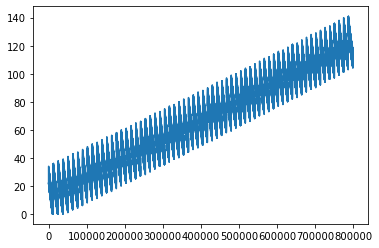

In [4]:
print(df)
df.rows.plot()
df ['candex_case'] = 2

df.to_csv('../temporary/WRF_Medicine_Hat_resample_remapping_manual.csv')


In [5]:
from candex import candex

cndx = candex() # initialize candex object
cndx.name_of_case             = 'WRF_Medicine_Hat_resample'
cndx.temporary_candex_folder  = '../temporary/' # temporary path that the candex generated GIS files and rempped file will be saved
cndx.name_of_target_shp       = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
cndx.name_of_nc_files         = '../data/Source_nc_WRF/WRF*.nc'
cndx.name_of_var_name         = ['T2']
cndx.name_of_var_lon          = 'XLONG'
cndx.name_of_var_lat          = 'XLAT'
cndx.name_of_var_time         = 'time'
cndx.name_of_nc_output_folder = '../output/'
cndx.format_list              = ['f4']
cndx.fill_value_list          = ['-9999.00']
cndx.name_of_remap_file        = '../temporary/WRF_Medicine_Hat_resample_remapping_manual.csv' # if uncommneted candex will use this and skip GIS taskes

# execute candex
cndx.run_candex()
#cndx.get_col_row()



no  author name is provide and the author name is changes to (author name)!
remap file is provided; candex will use this file and skip calculation of remapping
candex case exists in the remap file
candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['time', 'y', 'x']
candex detects that the longitude varibales has dimensions of:
['y', 'x']
candex detects that the latitude varibales has dimensions of:
['y', 'x']
Remapping ../data/Source_nc_WRF/WRF_merged_2000-10-01.nc to ../output/WRF_Medicine_Hat_resample_remapped_2000-10-01-00-00-00.nc
Started at date and time 2021-02-17 14:14:06.599627
Ended   at date and time 2021-02-17 14:14:07.364065


--------------
--------------
# Visualization of the source and the results

<xarray.Dataset>
Dimensions:      (time: 24, x: 199, y: 168)
Coordinates:
  * time         (time) datetime64[ns] 2000-10-01 ... 2000-10-01T23:00:00
    XLONG        (y, x) float64 ...
    XLAT         (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    I_RAINNC     (time, y, x) float64 ...
    LWDNB        (time, y, x) float32 ...
    P            (time, y, x) float32 ...
    PREC_ACC_C   (time, y, x) float32 ...
    PREC_ACC_NC  (time, y, x) float32 ...
    Q2           (time, y, x) float32 ...
    RAINC        (time, y, x) float32 ...
    RAINNC       (time, y, x) float32 ...
    SWDNB        (time, y, x) float32 ...
    T2           (time, y, x) float32 ...
    U10          (time, y, x) float32 ...
    V10          (time, y, x) float32 ...
(33432,)
<xarray.Dataset>
Dimensions:    (ID: 8192, time: 24)
Coordinates:
  * time       (time) datetime64[ns] 2000-10-01 ... 2000-10-01T23:00:00
  * ID         (ID) float64 1.0 2.0 3.0 4.0 ... 8.19e+03 8.191e+03 8.192e+03

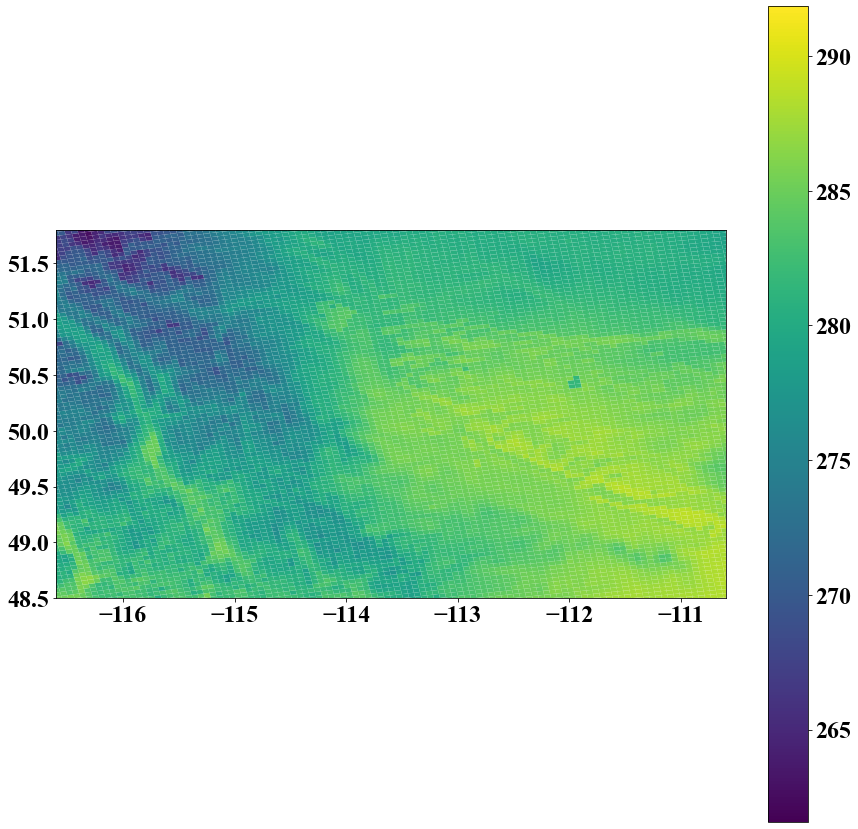

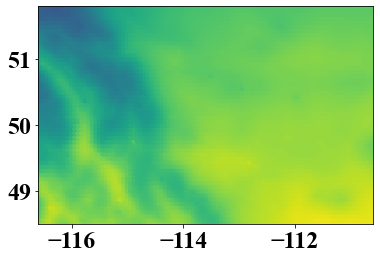

In [6]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)



# visualize the original netCDF for the first file, first time step
shp_source = gpd.read_file('../temporary/WRF_Medicine_Hat_source_shapefile.shp') # load the target shapefile
# load the infromation on the
nc_names = sorted(glob.glob ('../data/Source_nc_WRF/WRF*.nc'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
print(ds)
T2       = np.array(ds.T2 [3,:,:]).flatten() # the first time frame of the first 
print(T2.shape)
lat      = np.array(ds.XLAT).flatten()  # the first time frame of the first 
lon      = np.array(ds.XLONG).flatten()  # the first time frame of the first 

lat_shp = shp_source ['lat_s']
lon_shp = shp_source ['lon_s']
idx = np.zeros(len(lat_shp))
value = np.zeros(len(lat_shp))

for i in np.arange(len(lat_shp)):
    # find the row of the shapefile that is closes to the point
    diff = abs(lat-lat_shp[i])+ abs(lon-lon_shp[i])
    temp = np.where(diff == np.min(diff))
    idx[i] = temp[0].astype(int)
    a = idx[i]
    value[i] = T2 [a.astype(int)]


shp_source ['value'] = value

max_T2 = max(value)
min_T2 = min(value)


f, axes = plt.subplots(1,1,figsize=(15,15))
shp_source.plot(column='value', ax = axes, legend=True)
plt.xlim([-116.6 , -110.6 ])
plt.ylim([48.5 , 51.8 ])


# 

f, axes = plt.subplots(1,1 )
plt.xlim([-116.6 , -110.6 ])
plt.ylim([48.5 , 51.8 ])

ds = xr.open_dataset('../output/WRF_Medicine_Hat_resample_remapped_2000-10-01-00-00-00.nc')
print(ds)

lat = ds.latitude
lon = ds.longitude
T2  = ds.T2.isel(time=23) # the last time step

plt.scatter(lon, lat, s=25, c=np.array(T2), vmin=min_T2, vmax=max_T2)


